# Preliminaries

In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import plot_model

from sklearn.utils.class_weight import compute_sample_weight

pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude').sort_index(ascending=False)[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

# Data

In [4]:
train = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/training_sets_withrealtom.csv')
val = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/validation_sets_withrealtom.csv')
test = pd.read_csv('/Users/paolo/Documents/TC_old/data/NewData_csv/test_sets_withrealtom.csv')
test = test.loc[test.time>='2016-04-01']

train['shear'] = train.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
val['shear'] = val.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)
test['shear'] = test.apply(lambda x: np.sqrt((x.u_200-x.u_850)**2 + (x.v_200-x.v_850)**2),axis=1)


In [5]:
test.longitude.unique()

array([20. , 22.5, 25. , 27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. ,
       47.5, 50. , 52.5, 55. , 57.5, 60. , 62.5, 65. , 67.5, 70. , 72.5,
       75. , 77.5, 80. , 82.5, 85. , 87.5, 90. ])

In [5]:
### 
# 0_lag: "newlsm" 01-01 --> 01-01/02-01
# 1_lag: "Real_tom_target" 01-01 --> 02-01/03-01
# 2_lag: "Real_tom_target" 01-01 --> 03-01/04-01
#...
# 13_lag: "Real_tom_target" 01-01 --> 14-01/15-01

In [5]:
pd.set_option('display.max_rows', 300)
train.loc[(train.new_target>0) & (train.latitude==-17.5) & (train.longitude==52.5)]

Unnamed: 0        time  latitude  longitude            vo          r  \
5871           5871  1980-01-16     -17.5       52.5 -1.356086e-05  60.351845   
6248           6248  1980-01-17     -17.5       52.5 -5.138546e-05  72.263336   
6625           6625  1980-01-18     -17.5       52.5 -9.055705e-05  78.416700   
7002           7002  1980-01-19     -17.5       52.5 -5.380878e-05  77.551414   
7379           7379  1980-01-20     -17.5       52.5 -9.266964e-05  82.781840   
7756           7756  1980-01-21     -17.5       52.5 -7.247100e-05  80.568900   
8133           8133  1980-01-22     -17.5       52.5 -4.587846e-05  84.924446   
8510           8510  1980-01-23     -17.5       52.5 -2.930684e-05  76.797200   
8887           8887  1980-01-24     -17.5       52.5 -2.359327e-05  81.574730   
9264           9264  1980-01-25     -17.5       52.5 -3.047816e-05  81.444350   
9641           9641  1980-01-26     -17.5       52.5 -1.995084e-05  81.127550   
26229         26229  1980-03-10     -17.5       52.5 -1.124376e-05  73.693670   
26606         26606  1980-03-11     -17.5       52.5 -1.647712e-05  69.441925   
26983         26983  1980-03-12     -17.5       52.5 -1.174986e-05  47.369240   
28868         28868  1980-03-17     -17.5       52.5  2.022891e-06  67.985756   
29245         29245  1980-03-18     -17.5       52.5 -2.108180e-06  64.440610   
29622         29622  1980-03-19     -17.5       52.5 -4.078247e-06  65.913820   
161572        23590  1981-03-04     -17.5       52.5 -9.646676e-05  76.953610   
161949        23967  1981-03-05     -17.5       52.5 -4.467326e-05  70.819800   
171751        33769  1981-03-31     -17.5       52.5 -1.168720e-05  51.873894   
172128        34146  1981-04-01     -17.5       52.5 -7.632775e-05  80.551636   
172505        34523  1981-04-02     -17.5       52.5 -2.029856e-04  83.582985   
172882        34900  1981-04-03     -17.5       52.5 -6.426504e-06  63.816590   
174767        36785  1981-04-08     -17.5       52.5  4.414935e-06  71.667780   
175144        37162  1981-04-09     -17.5       52.5 -1.305853e-05  48.344795   
175521        37539  1981-04-10     -17.5       52.5  8.924544e-07  46.327217   
287113        11526  1982-01-31     -17.5       52.5 -3.752444e-06  66.824200   
287490        11903  1982-02-01     -17.5       52.5 -1.347256e-05  64.026535   
287867        12280  1982-02-02     -17.5       52.5 -2.569208e-05  76.179610   
288244        12657  1982-02-03     -17.5       52.5 -2.210260e-05  77.992370   
289375        13788  1982-02-06     -17.5       52.5 -1.207170e-05  64.186940   
304078        28491  1982-03-17     -17.5       52.5 -3.219015e-06  67.483440   
304455        28868  1982-03-18     -17.5       52.5  4.188594e-06  68.722660   
547620       134428  1983-12-23     -17.5       52.5  6.750925e-07  61.741596   
547997       134805  1983-12-24     -17.5       52.5 -4.682632e-06  62.354385   
548374       135182  1983-12-25     -17.5       52.5  6.975475e-06  57.033240   
553652         2855  1984-01-08     -17.5       52.5 -1.071414e-05  81.544750   
554029         3232  1984-01-09     -17.5       52.5 -9.040290e-06  72.645676   
554406         3609  1984-01-10     -17.5       52.5 -1.856626e-05  66.366780   
557045         6248  1984-01-17     -17.5       52.5  6.397910e-06  44.057034   
557422         6625  1984-01-18     -17.5       52.5 -2.256653e-06  44.482450   
557799         7002  1984-01-19     -17.5       52.5 -4.695391e-05  76.440470   
558176         7379  1984-01-20     -17.5       52.5 -1.186650e-04  82.713180   
558553         7756  1984-01-21     -17.5       52.5 -9.028638e-05  84.051080   
558930         8133  1984-01-22     -17.5       52.5 -1.453748e-05  84.259270   
561569        10772  1984-01-29     -17.5       52.5 -3.345063e-06  26.832200   
561946        11149  1984-01-30     -17.5       52.5  1.584704e-08  41.202927   
562323        11526  1984-01-31     -17.5       52.5 -2.818881e-06  71.058900   
562700        11903  1984-02-01     -17.

In [6]:
train

Unnamed: 0        time  latitude  longitude        vo          r  \
0                 0  1980-01-01       0.0       20.0  0.000007  80.761185   
1                 1  1980-01-01       0.0       22.5  0.000004  80.703650   
2                 2  1980-01-01       0.0       25.0  0.000007  78.231514   
3                 3  1980-01-01       0.0       27.5  0.000010  79.631010   
4                 4  1980-01-01       0.0       30.0  0.000010  71.573875   
...             ...         ...       ...        ...       ...        ...   
4268766      137600  2010-12-31     -30.0       80.0  0.000015  26.797535   
4268767      137601  2010-12-31     -30.0       82.5 -0.000006  27.766910   
4268768      137602  2010-12-31     -30.0       85.0  0.000010  29.111805   
4268769      137603  2010-12-31     -30.0       87.5  0.000006  27.833050   
4268770      137604  2010-12-31     -30.0       90.0  0.000007  15.843884   

             u_200     u_850      v_200     v_850        ttr        sst  lsm  \
0         1.909660 -3.323872   1.687164 -1.823624 -247.54074    0.00000  0.0   
1         1.165733 -2.844494   1.060593 -1.991425 -240.00592    0.00000  0.0   
2        -1.311676 -2.125244   3.280617 -1.931789 -223.76889    0.00000  0.0   
3        -3.777573 -1.122395   5.743889 -1.243538 -235.55556    0.00000  0.0   
4        -5.734505 -1.362953   6.514030 -0.954163 -254.03260    0.00000  0.0   
...            ...       ...        ...       ...        ...        ...  ...   
4268766  25.075424 -3.653679  -1.221291  1.515594 -273.34204  296.89227  0.0   
4268767  24.175919 -2.866638  -6.724304  0.861771 -280.37018  296.03314  0.0   
4268768  24.655510 -2.809170 -10.138817  0.051220 -281.05167  295.36078  0.0   
4268769  25.088104 -2.730087 -11.036507  0.666927 -280.05610  295.10638  0.0   
4268770  24.510345 -3.213837 -10.213325 -0.098499 -279.40427  294.44766  0.0   

         newlsm  new_target  Real_tom_target      shear  
0           0.0         0.0              0.0   6.302023  
1           0.0         0.0              0.0   5.039517  
2           0.0         0.0              0.0   5.275516  
3           0.0         0.0              0.0   7.474898  
4           0.0         0.0              0.0   8.653576  
...         ...         ...              ...        ...  
4268766     0.0         0.0              0.0  28.859174  
4268767     0.0         0.0              0.0  28.086446  
4268768     0.0         0.0              0.0  29.294120  
4268769     0.0         0.0              0.0  30.179830  
4268770     0.0         0.0              0.0  29.511692  

[4268771 rows x 17 columns]

## Features

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_std,val_std,test_std = train,val,test

# apply standardization on numerical features
train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])
test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']])


In [7]:
#training set has 11323 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst','shear']
train_img_std = extract_images(train_std, variables, verbose=True)
print(train_img_std.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
(11323, 13, 29, 9)


In [8]:
val_img_std = extract_images(val_std, variables, verbose=False)
print(val_img_std.shape)

(1826, 13, 29, 9)


In [9]:
test_img_std = extract_images(test_std, variables, verbose=False)
print(test_img_std.shape)

(2466, 13, 29, 9)


## Target of the current day: TC in the next 48 hours, with and without land

In [5]:
train['target'] = train.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
test['target'] = test.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)
val['target'] = val.apply(lambda x: 1 if x.new_target>=50 else 0,axis=1)

y_train = train.loc[:,['target','latitude','longitude','time']]
y_val = val.loc[:,['target','latitude','longitude','time']]
y_test = test.loc[:,['target','latitude','longitude','time']]

In [6]:
variables = ['target']
y_train_img = extract_images(y_train, variables, verbose=True)
print(y_train_img.shape)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
(11323, 13, 29, 1)


In [7]:
variables = [ 'target']
y_val_img = extract_images(y_val, variables, verbose=False)
print(y_val_img.shape)


(1826, 13, 29, 1)


In [8]:
variables = [ 'target']
y_test_img = extract_images(y_test, variables, verbose=False)
print(y_test_img.shape)


(2466, 13, 29, 1)


In [10]:
import pickle
with open('/Users/paolo/Desktop/TC_world/train_target_img.pkl', 'wb') as f:  
        pickle.dump(y_train_img, f)

In [11]:
with open('/Users/paolo/Desktop/TC_world/val_target_img.pkl', 'wb') as f:  
        pickle.dump(y_val_img, f)

In [12]:
with open('/Users/paolo/Desktop/TC_world/test_target_img.pkl', 'wb') as f:  
        pickle.dump(y_test_img, f)

# Models

## Same of old target

### Model training

In [14]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 15, 8)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 30, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d (Cropping2D)  

2023-03-28 10:55:23.598744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-28 10:55:23.600195: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

Epoch 1/100


2023-03-28 10:55:24.050658: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/354 [..............................] - ETA: 2:35 - loss: 1.5771

2023-03-28 10:55:24.329571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.1023

2023-03-28 10:55:27.079770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.1023 - val_loss: 0.0223
Epoch 2/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0217 - val_loss: 0.0150
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0150 - val_loss: 0.0106
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0128 - val_loss: 0.0102
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0120 - val_loss: 0.0093
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0115 - val_loss: 0.0092
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0110 - val_loss: 0.0090
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0107 - val_loss: 0.0086
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0104 - val_loss: 0.0086
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0103 - val_loss: 0.0083
E

### Full test evaluation

68/78 [=========================>....] - ETA: 0s

2023-03-28 10:58:49.465689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 0s 2ms/step


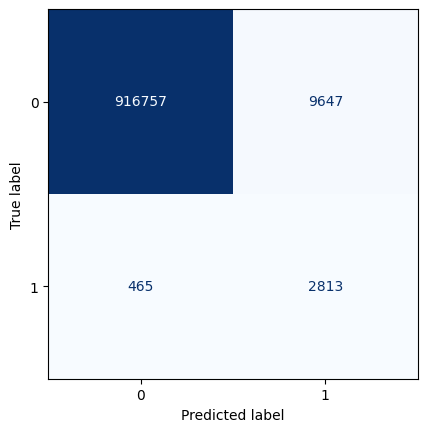

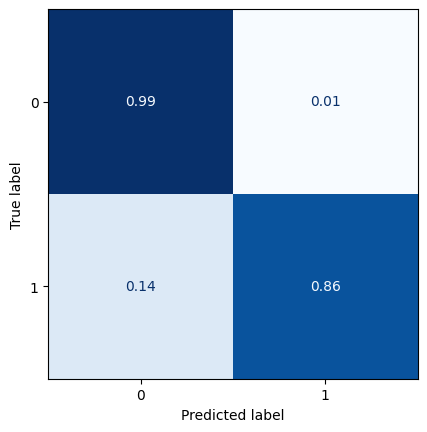

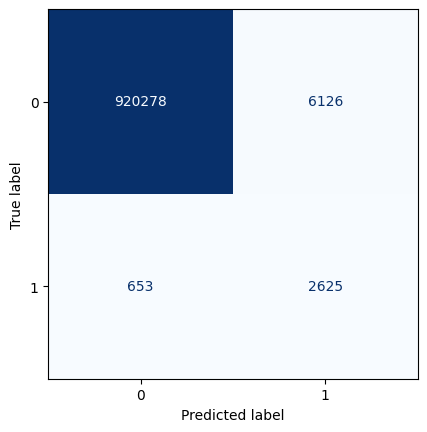

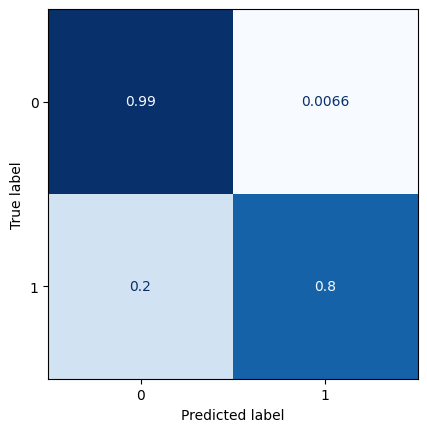

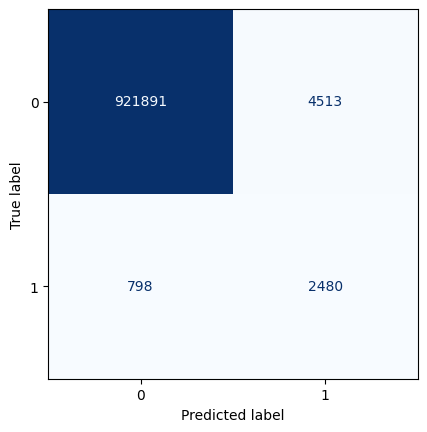

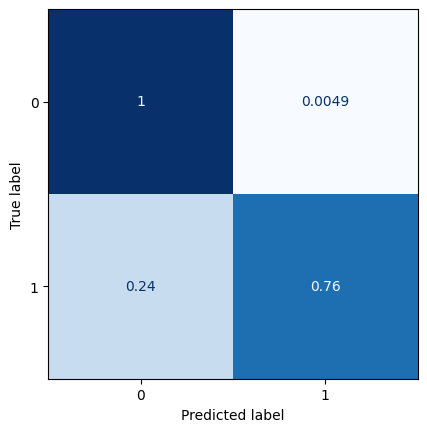

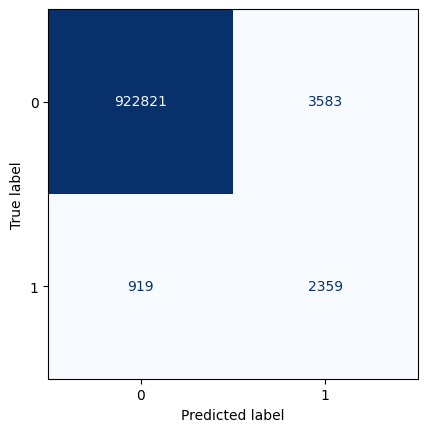

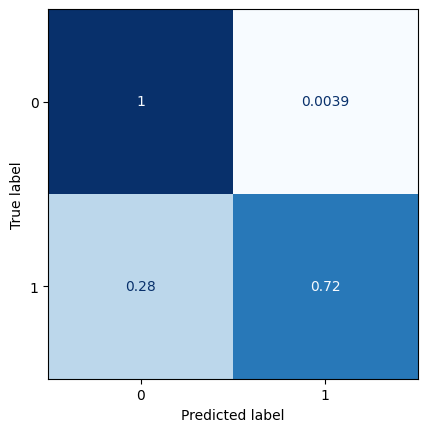

In [16]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

In [7]:
922821+3583+919+2359

929682

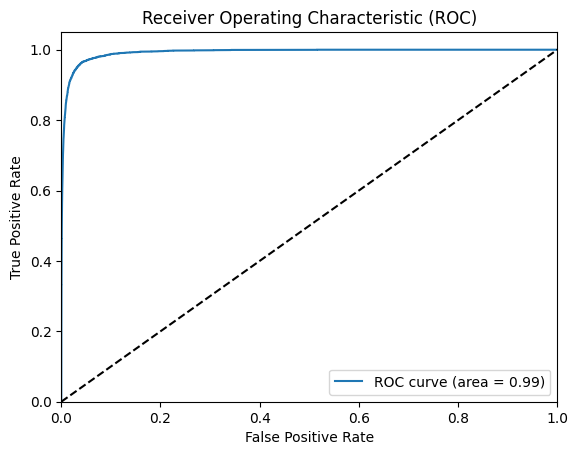

In [17]:
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

9


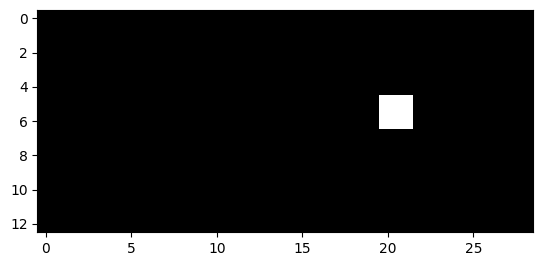

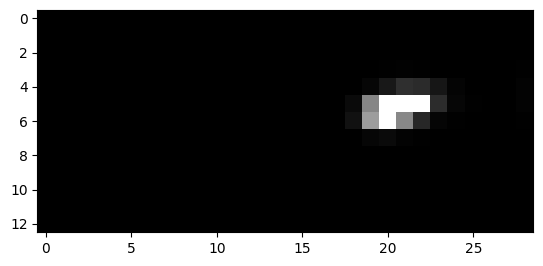

10


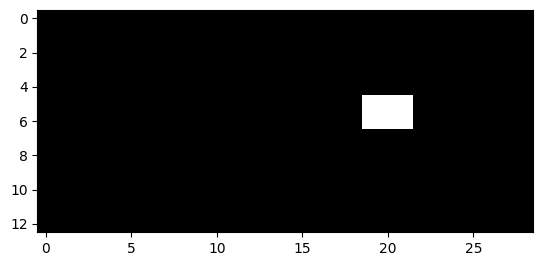

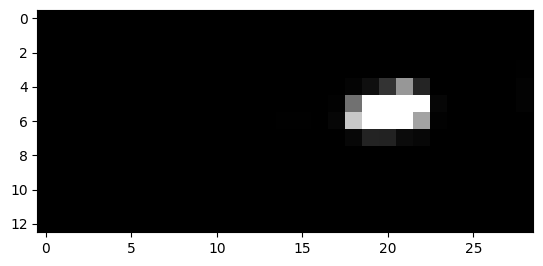

11


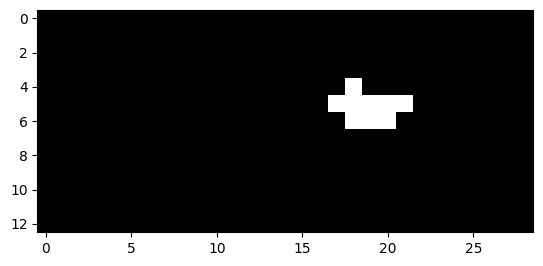

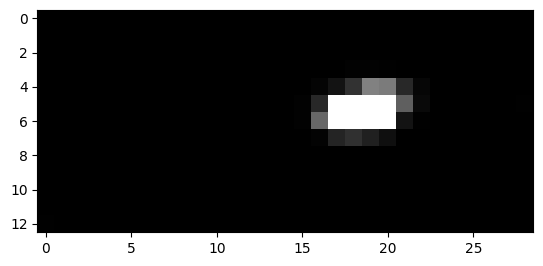

12


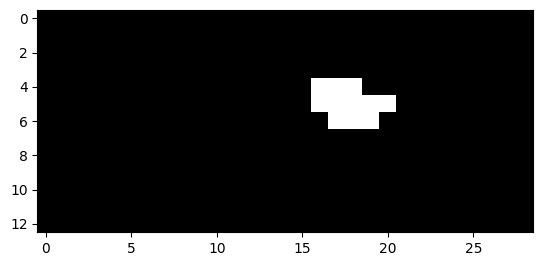

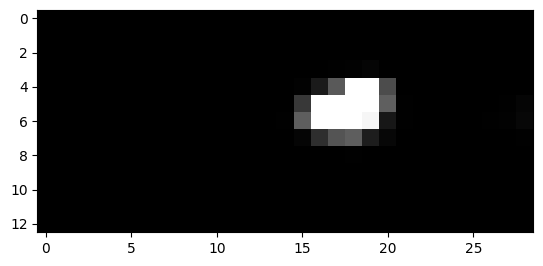

13


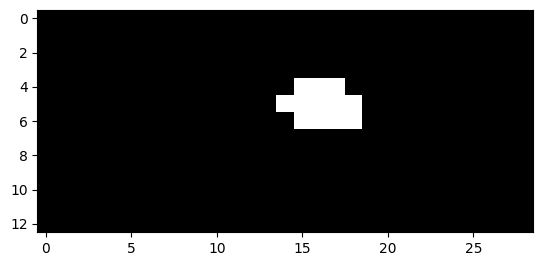

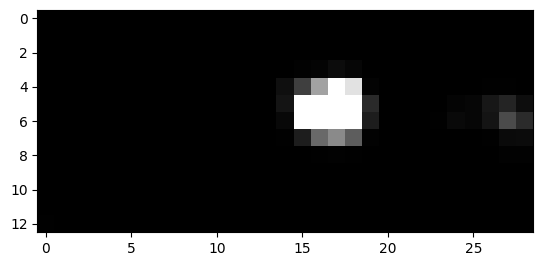

14


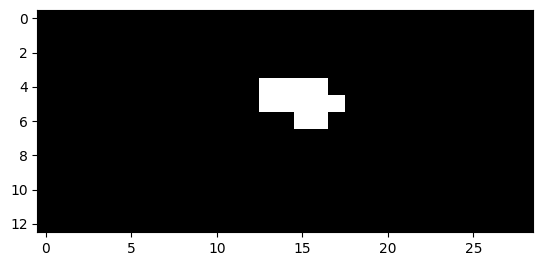

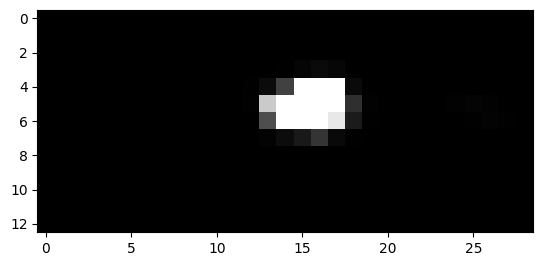

15


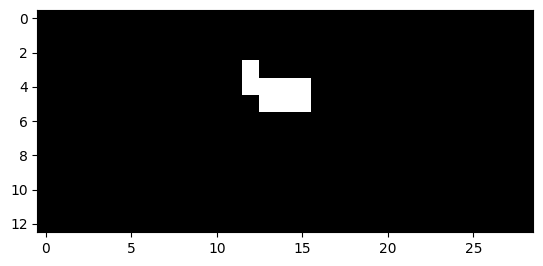

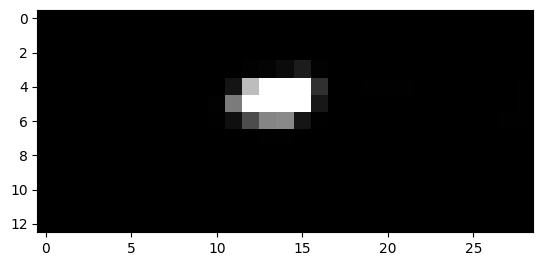

16


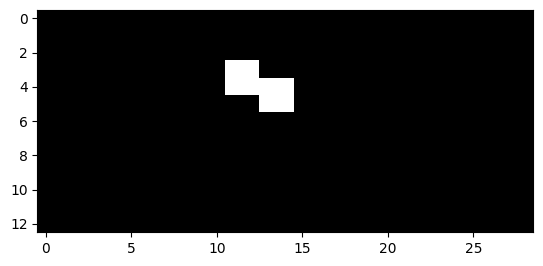

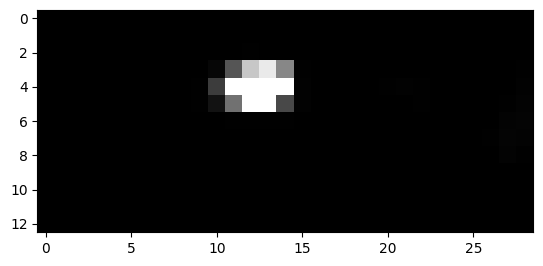

17


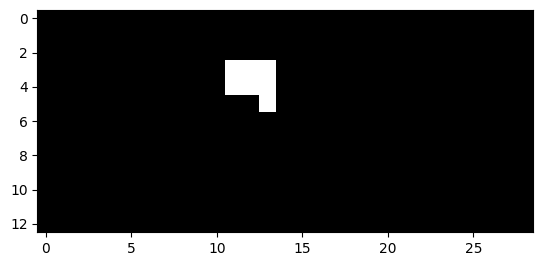

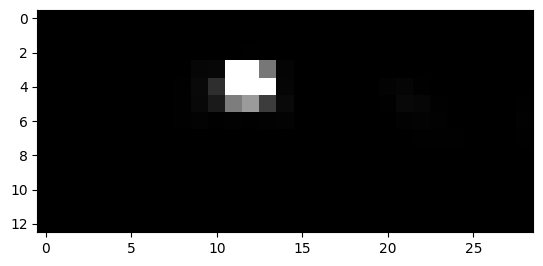

18


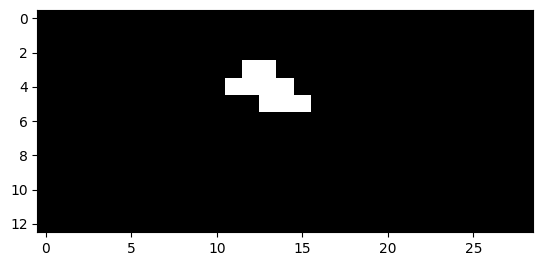

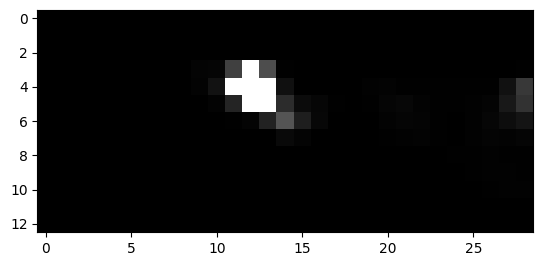

19


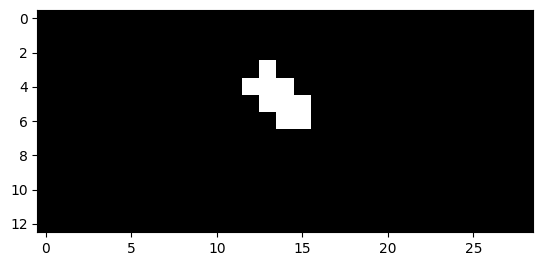

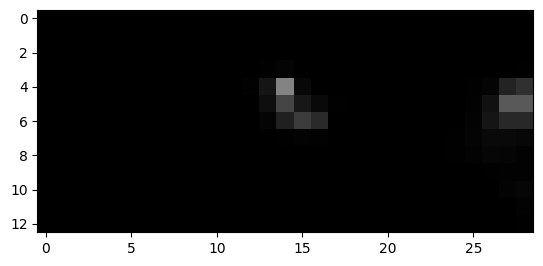

20


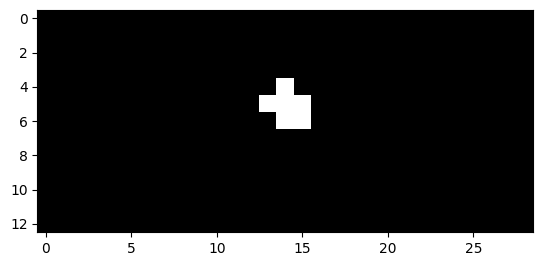

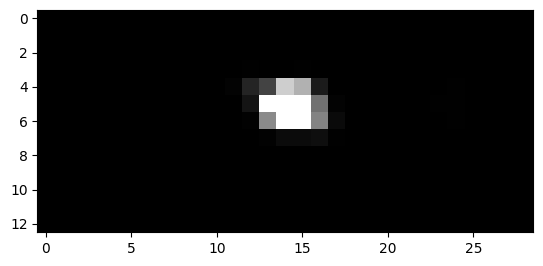

21


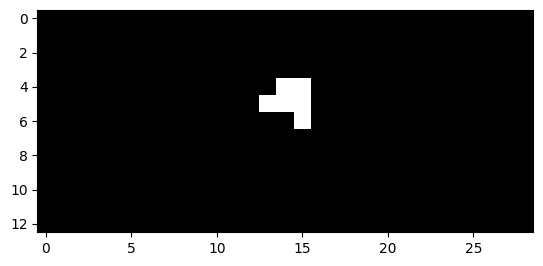

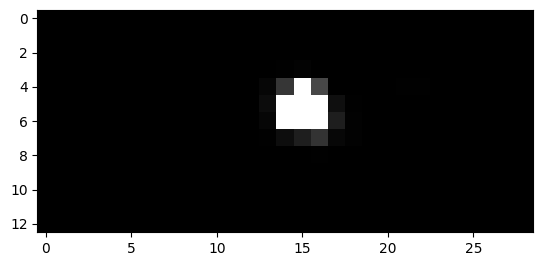

22


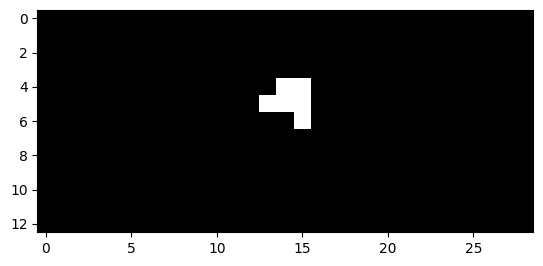

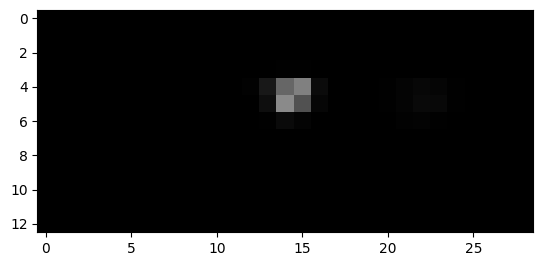

105


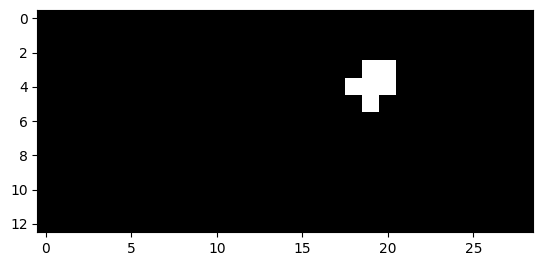

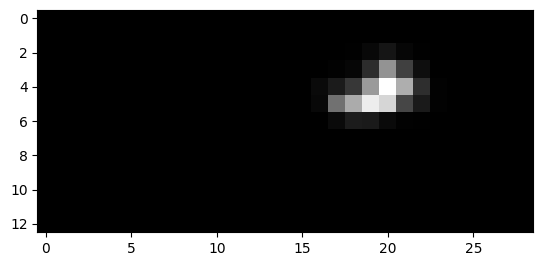

106


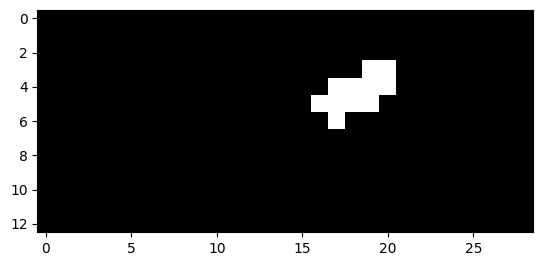

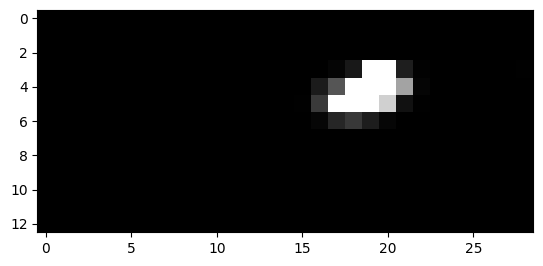

107


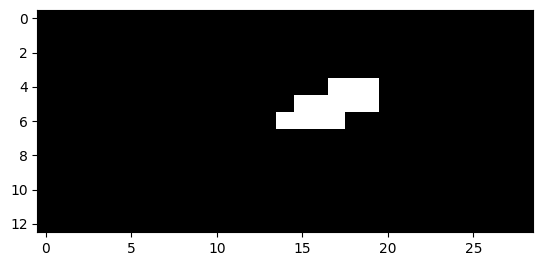

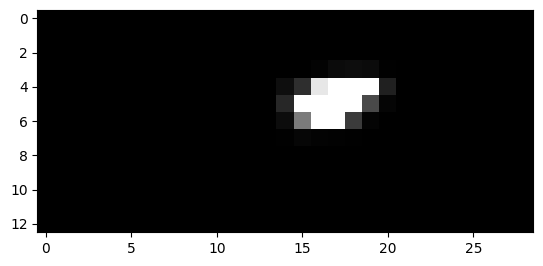

108


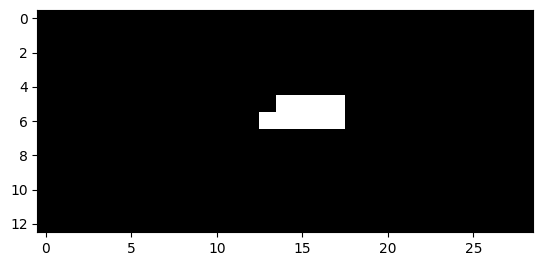

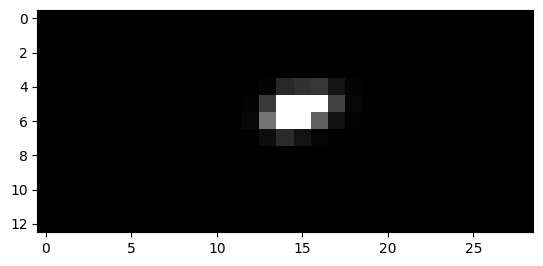

109


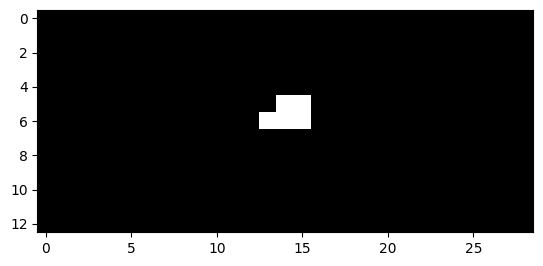

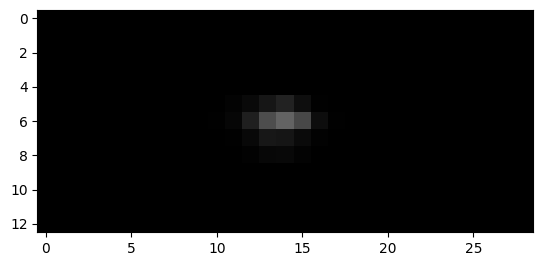

184


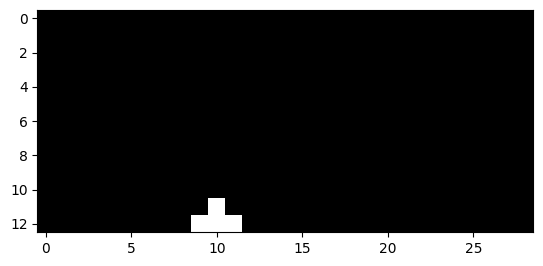

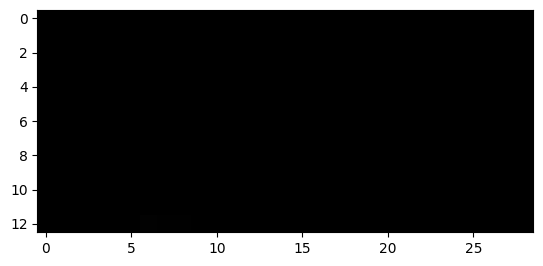

185


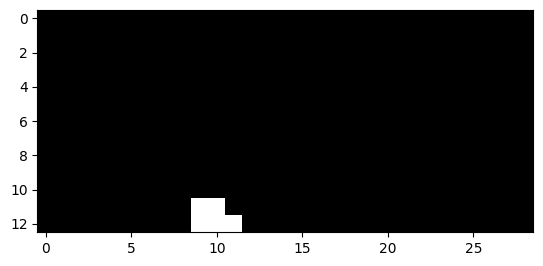

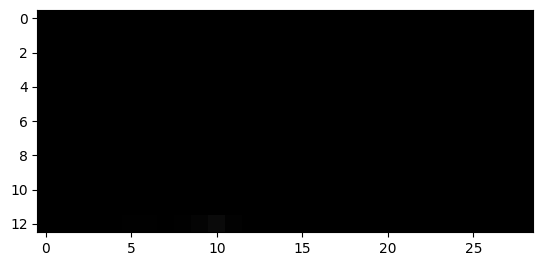

186


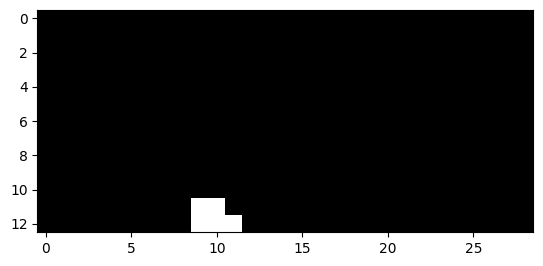

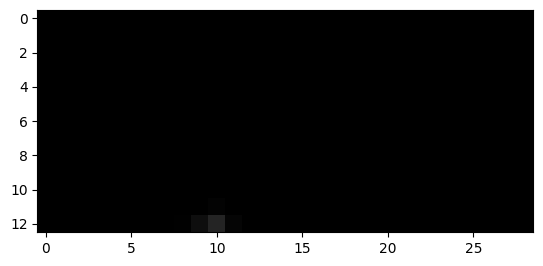

187


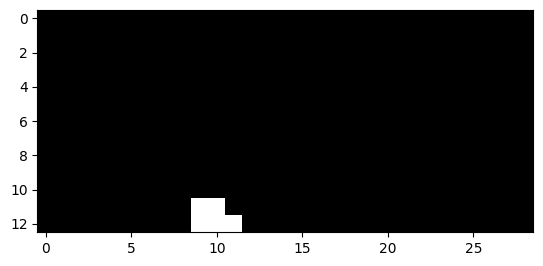

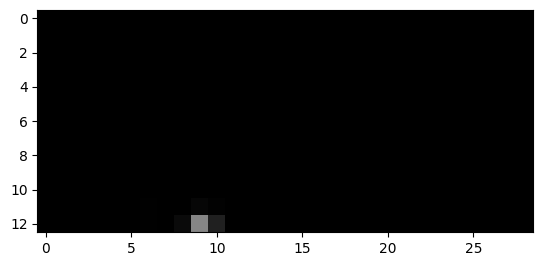

188


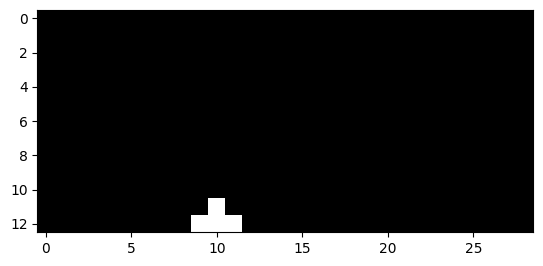

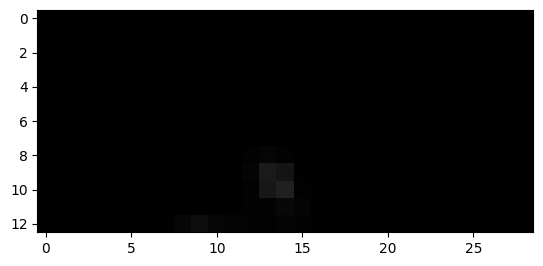

308


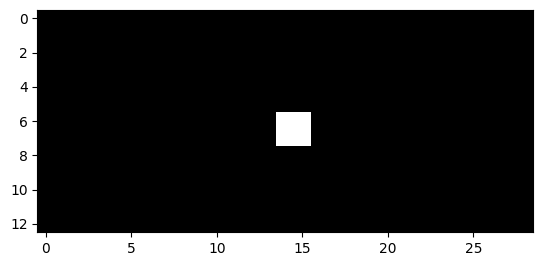

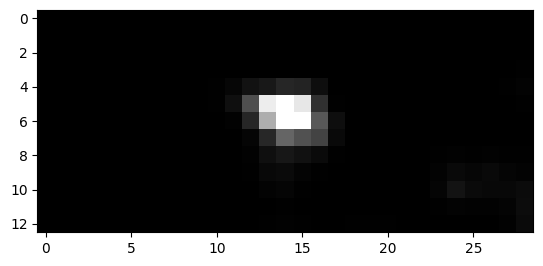

309


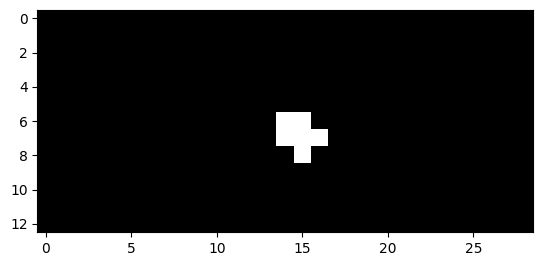

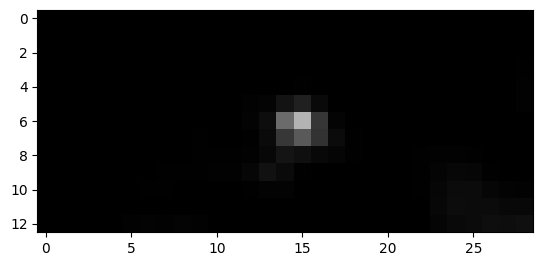

310


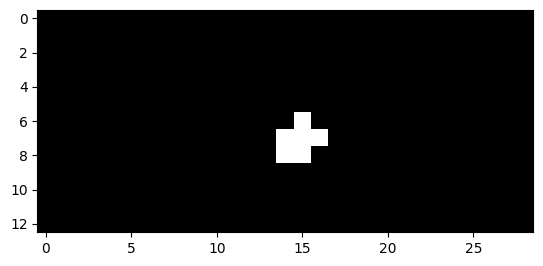

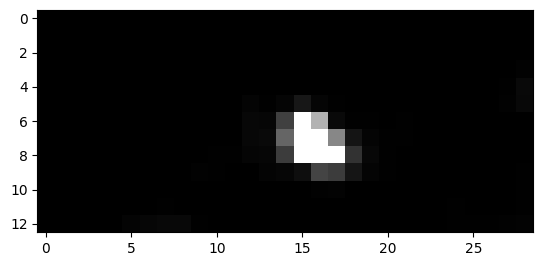

311


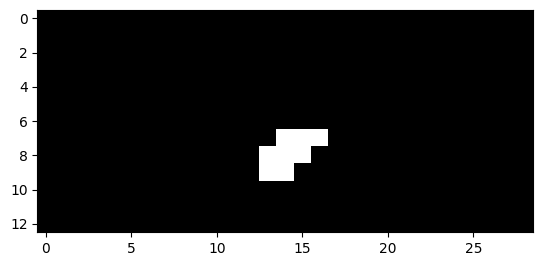

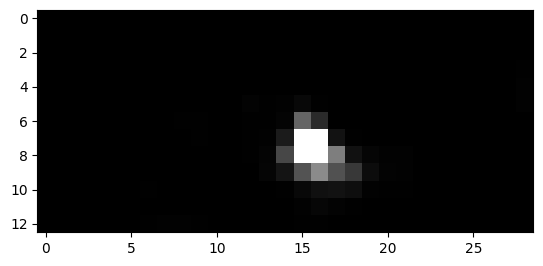

312


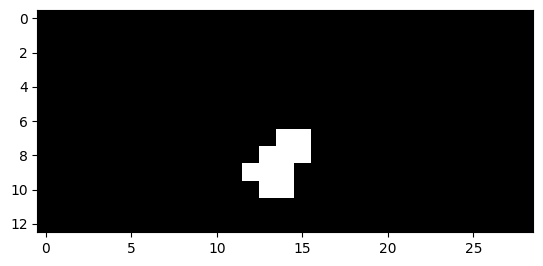

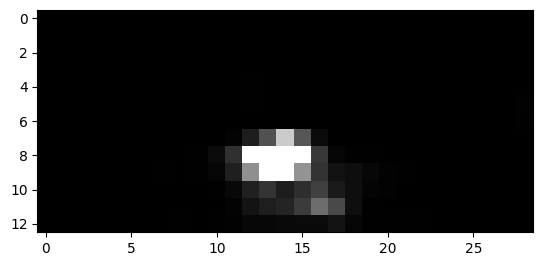

313


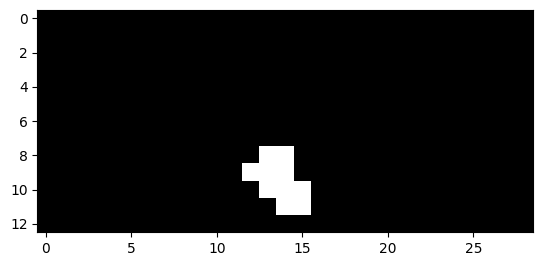

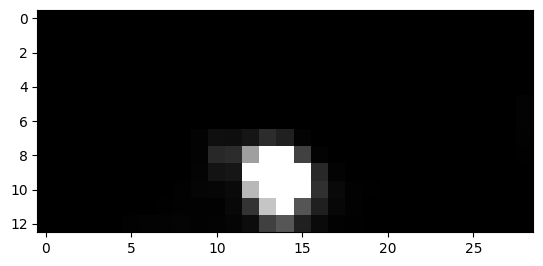

314


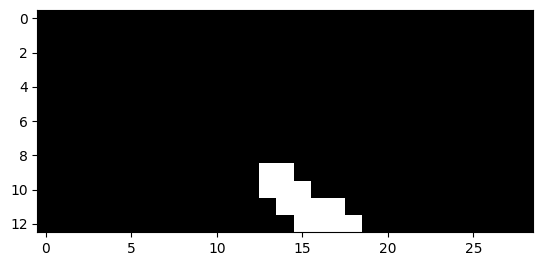

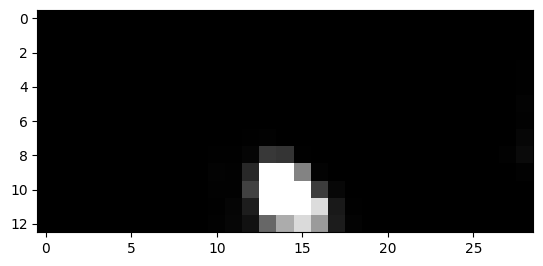

315


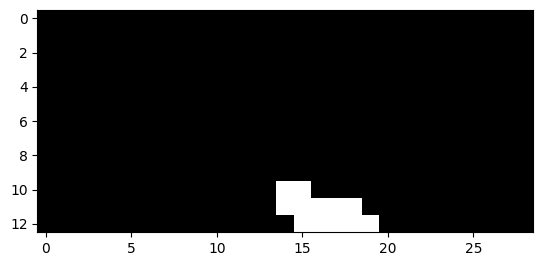

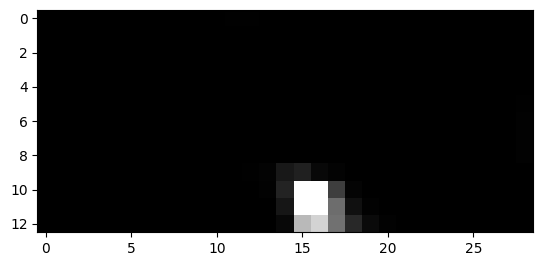

316


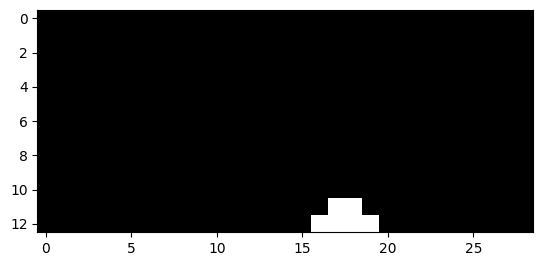

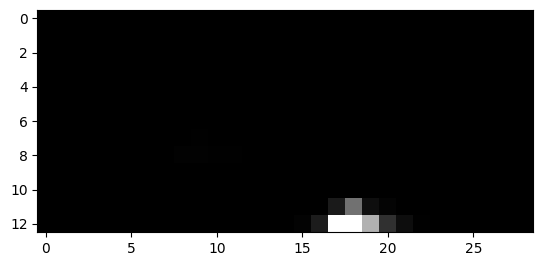

317


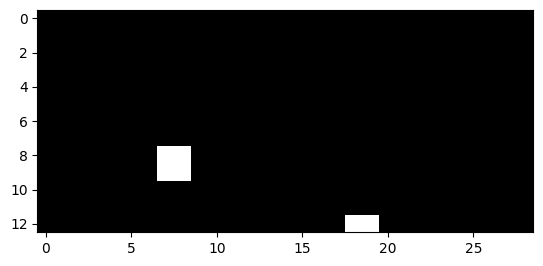

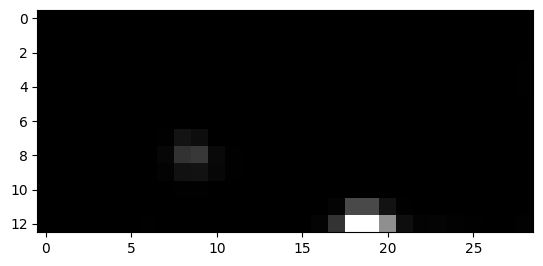

318


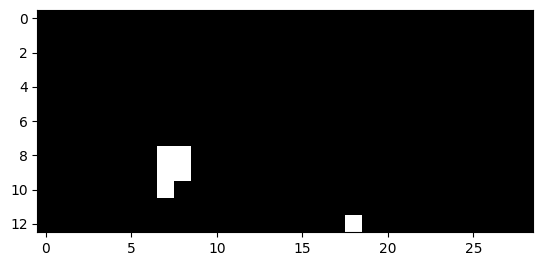

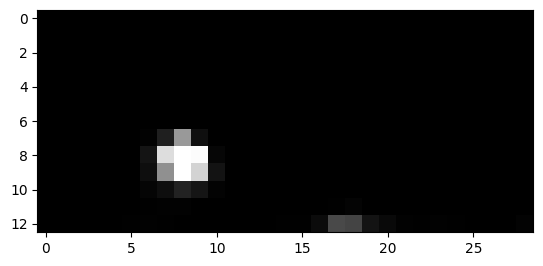

319


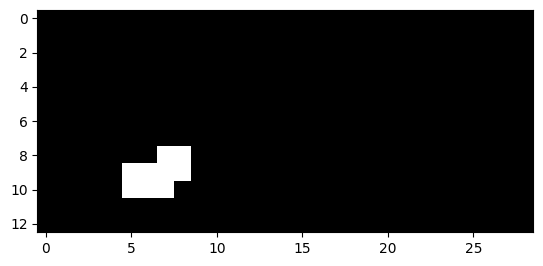

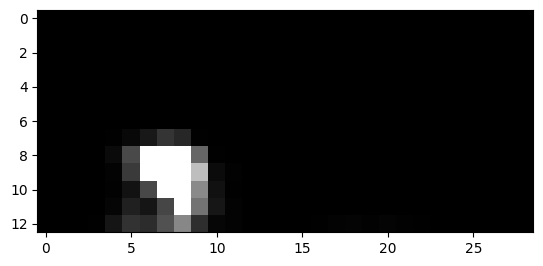

320


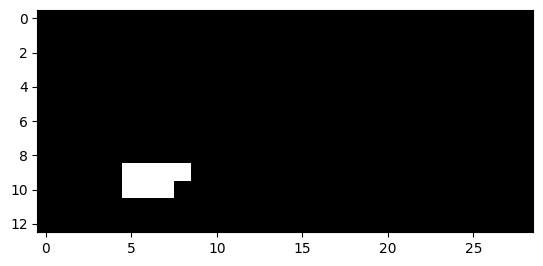

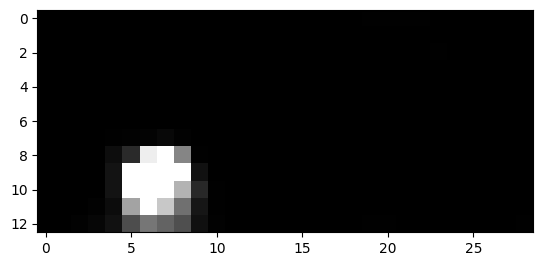

321


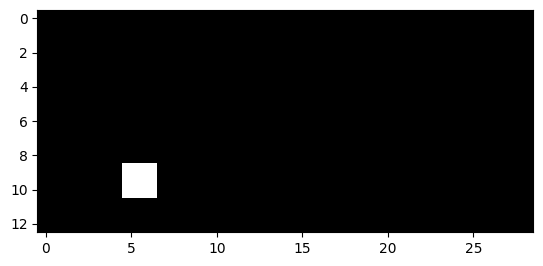

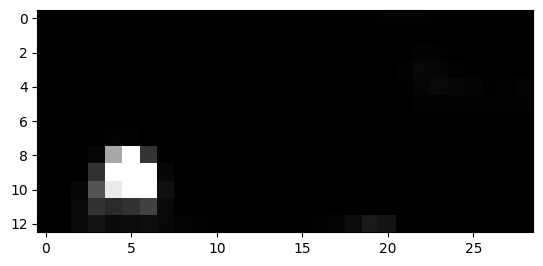

335


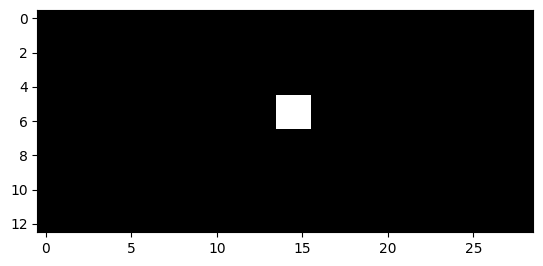

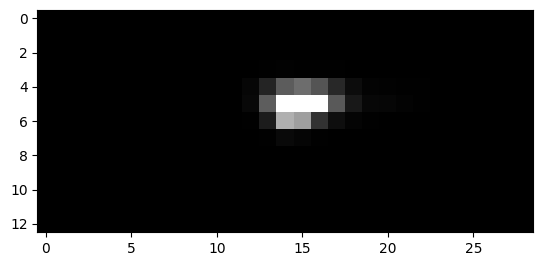

336


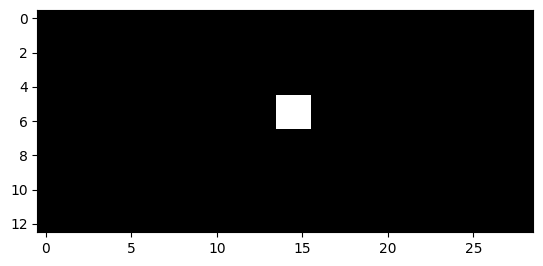

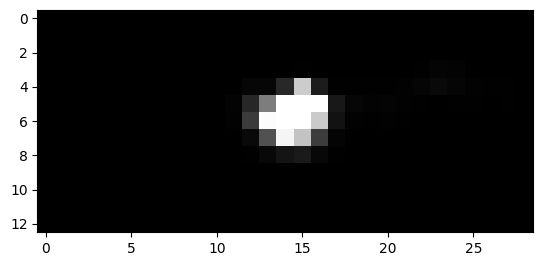

337


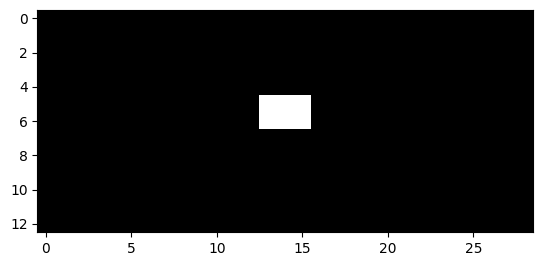

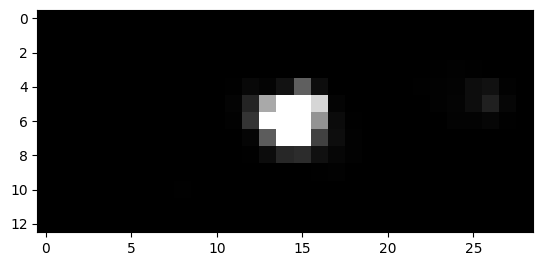

338


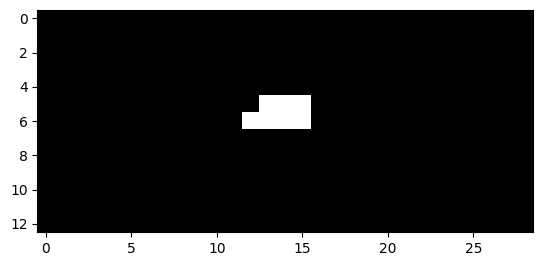

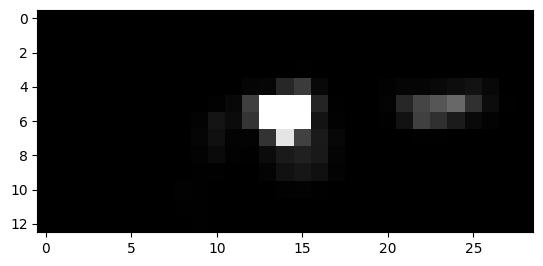

339


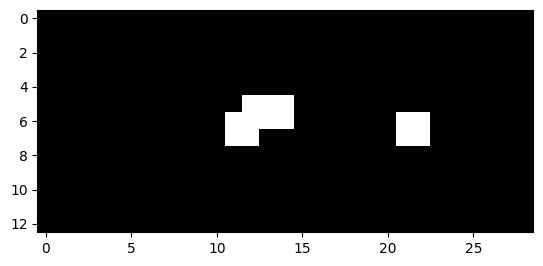

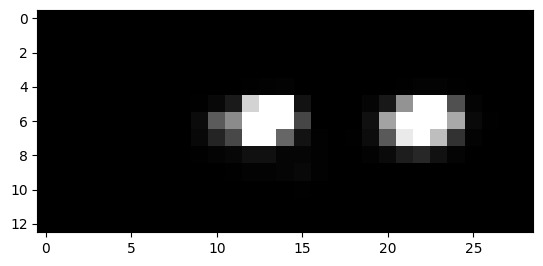

340


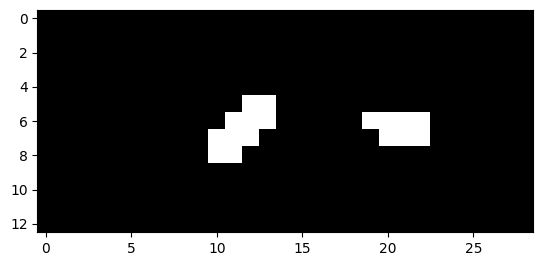

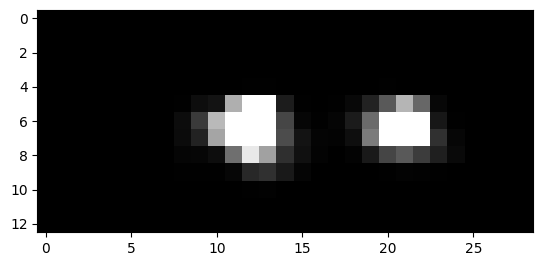

341


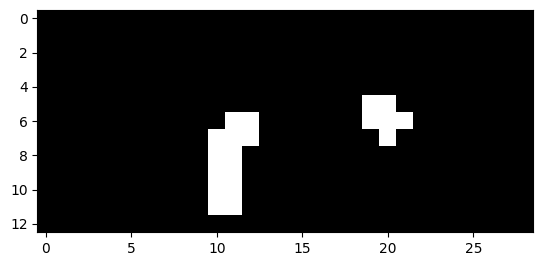

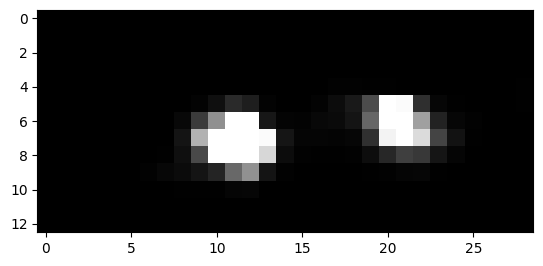

342


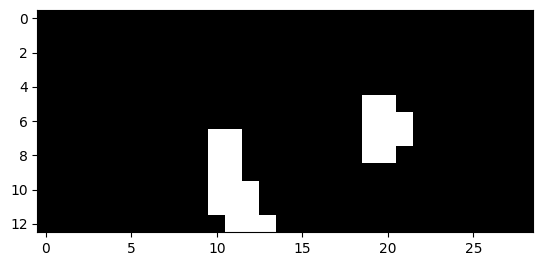

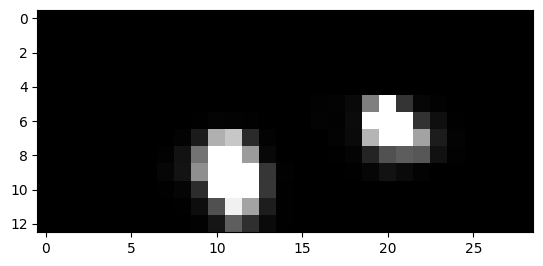

343


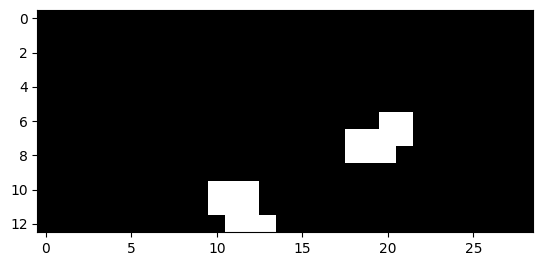

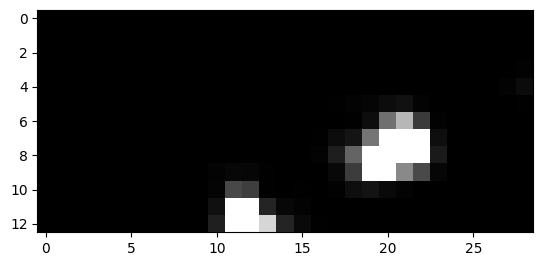

344


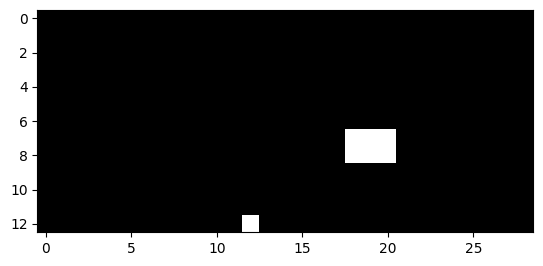

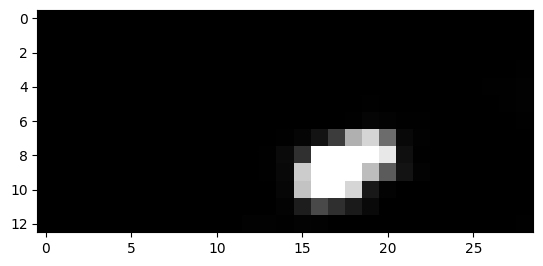

346


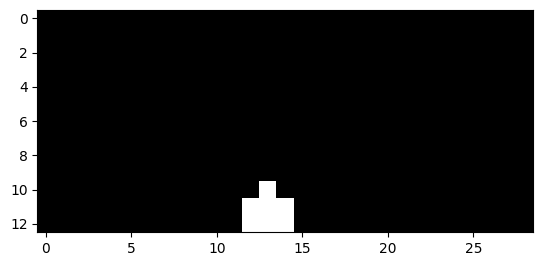

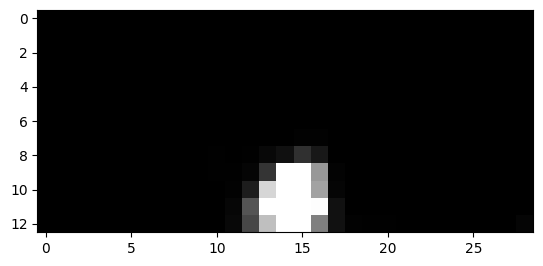

347


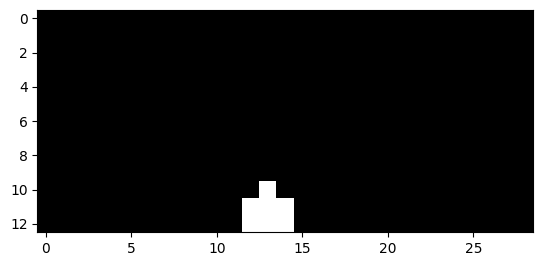

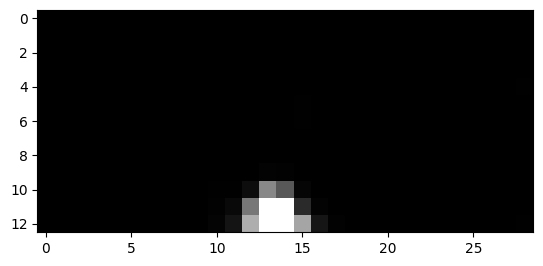

348


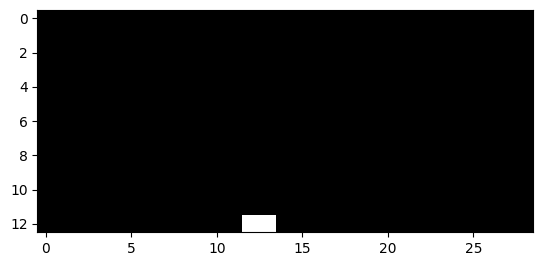

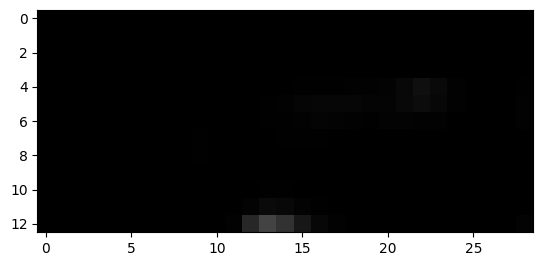

640


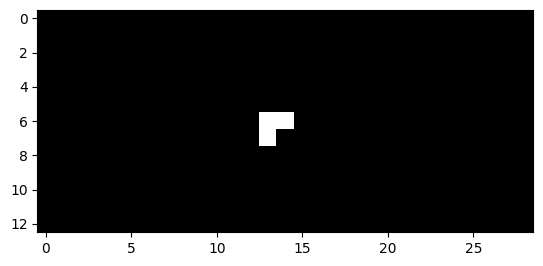

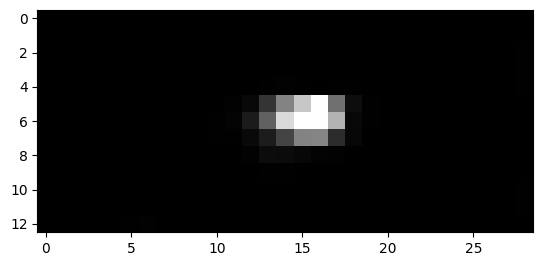

641


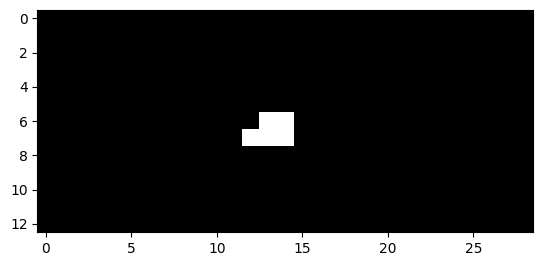

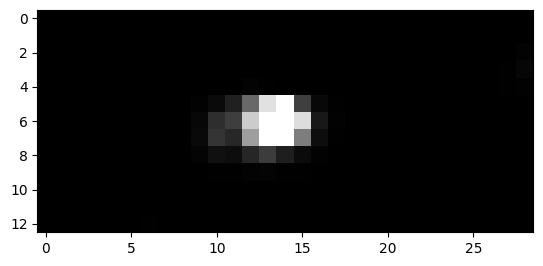

642


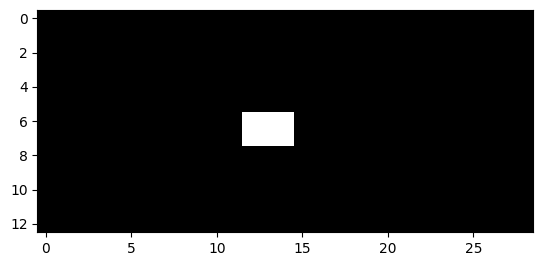

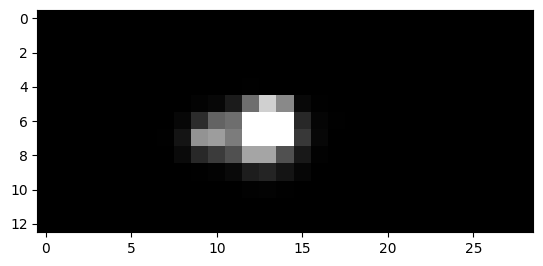

643


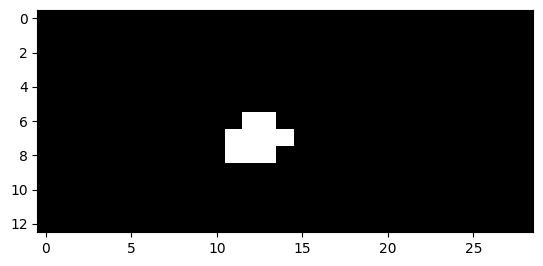

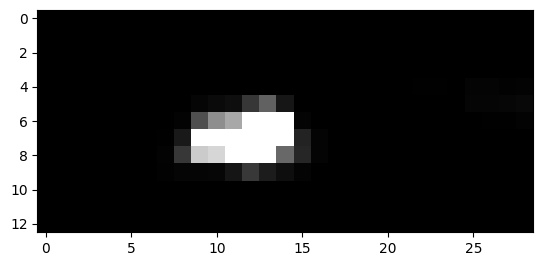

644


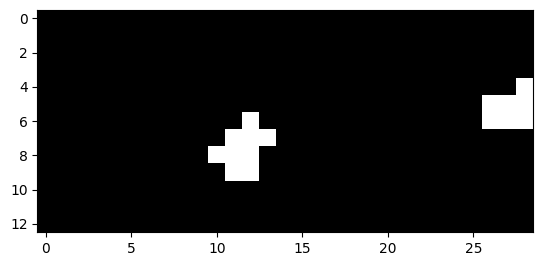

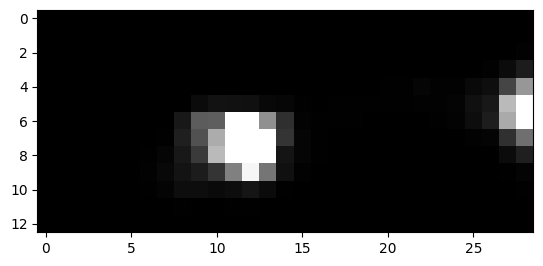

645


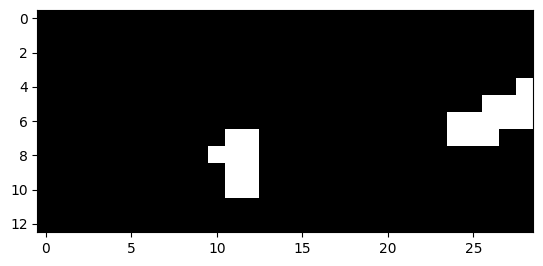

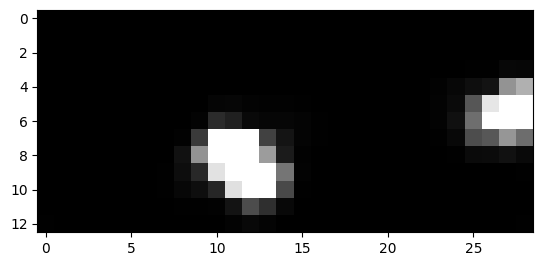

646


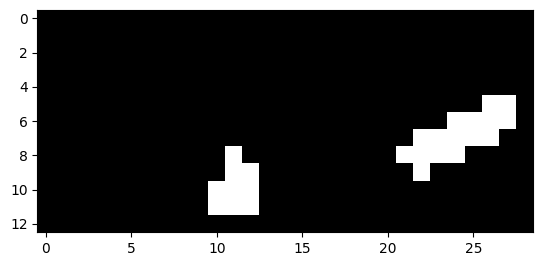

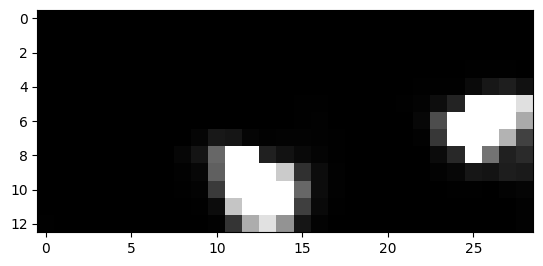

647


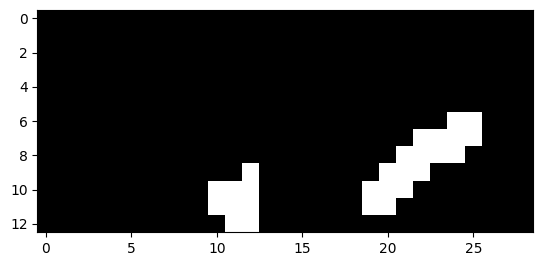

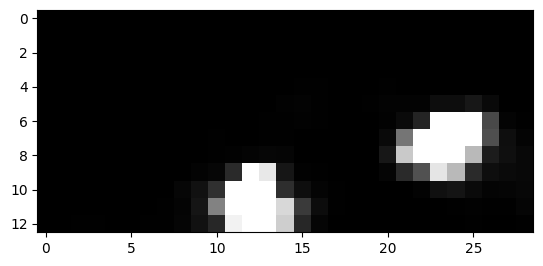

648


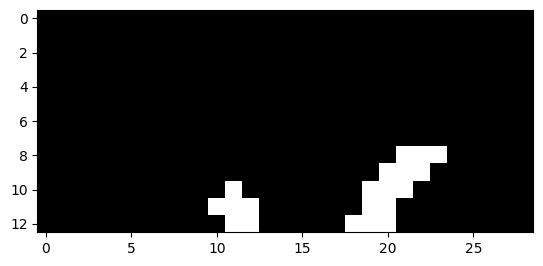

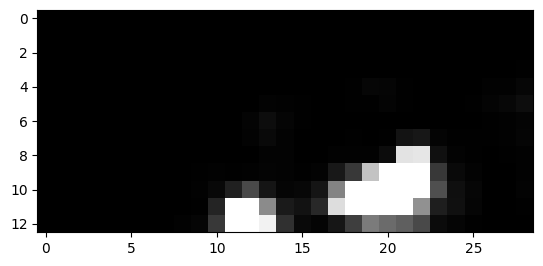

649


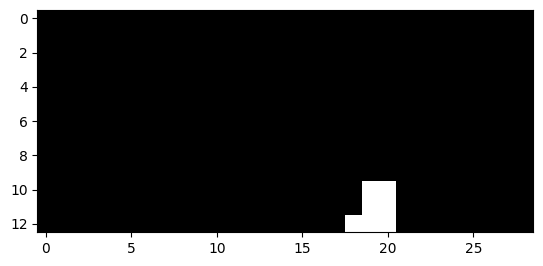

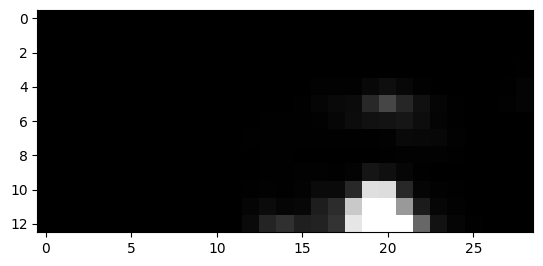

651


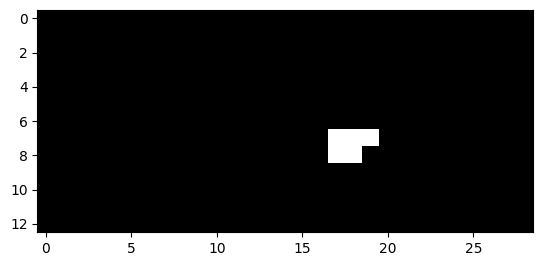

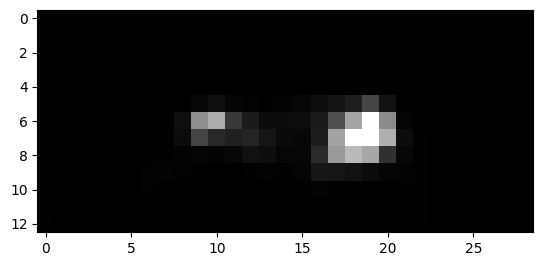

652


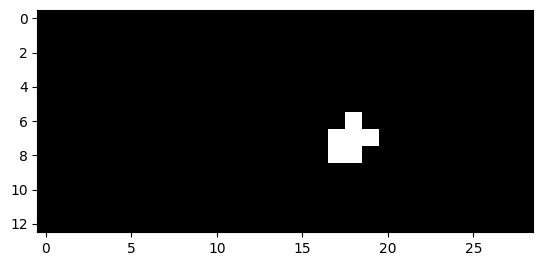

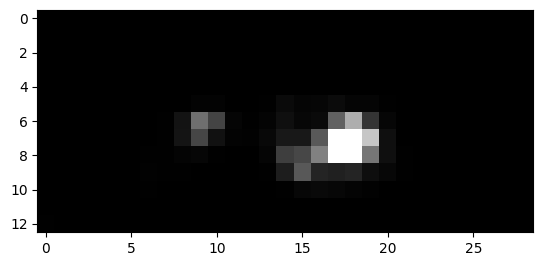

653


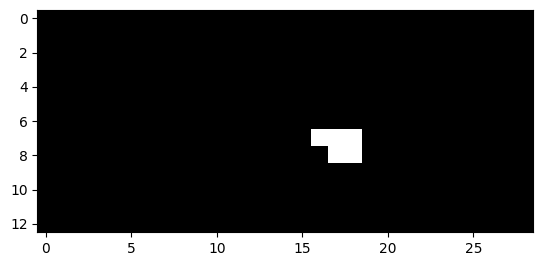

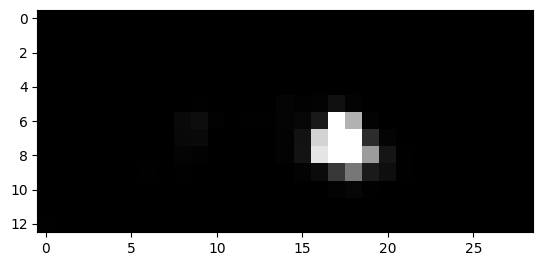

654


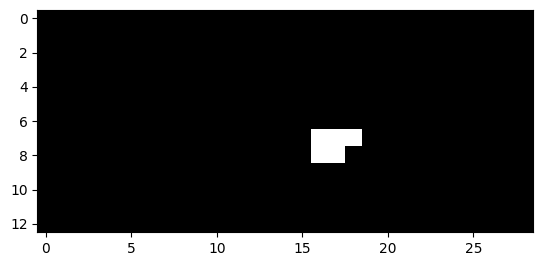

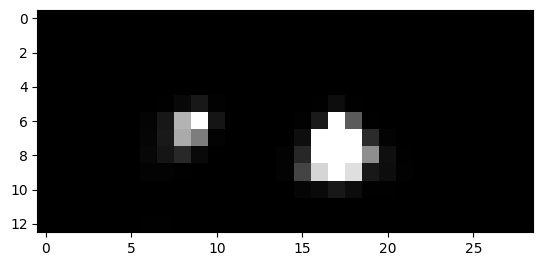

655


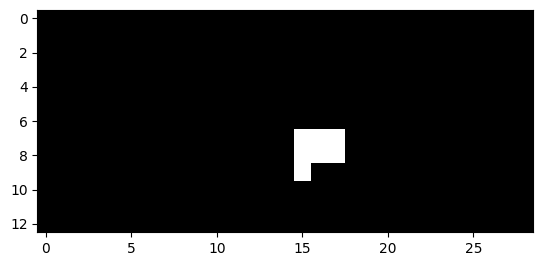

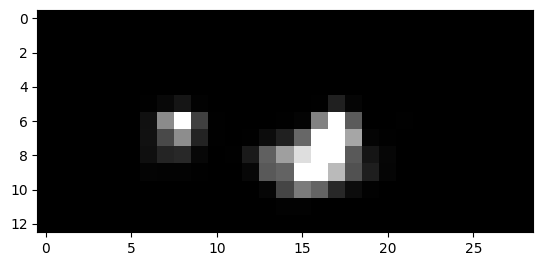

656


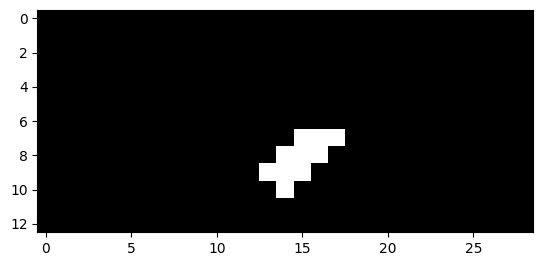

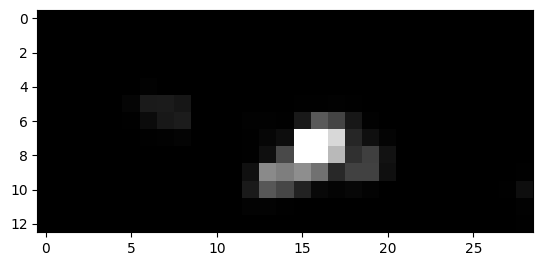

657


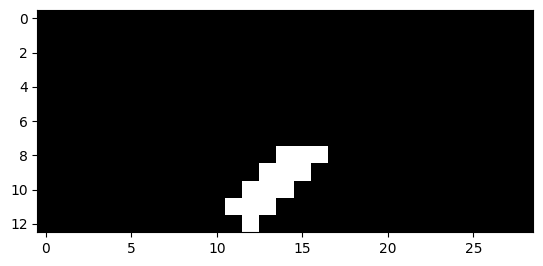

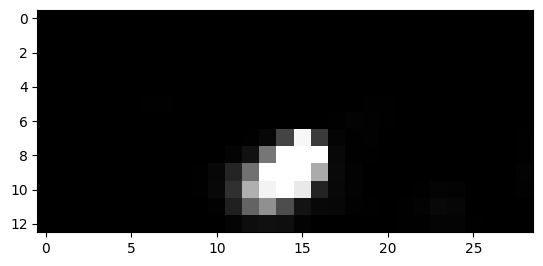

658


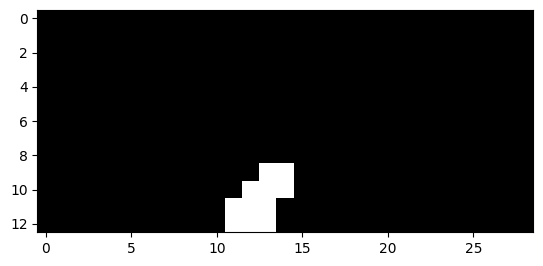

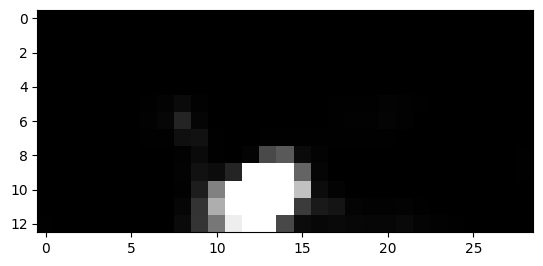

659


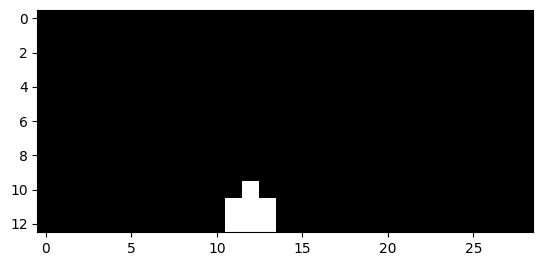

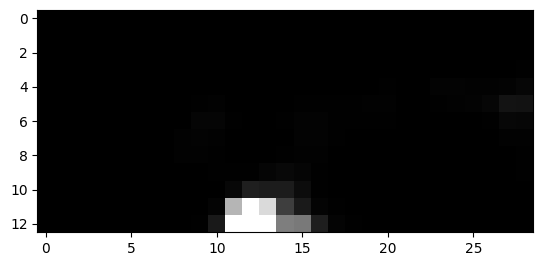

665


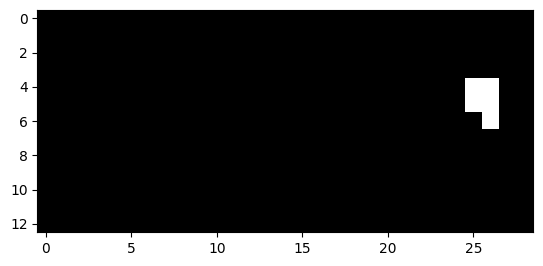

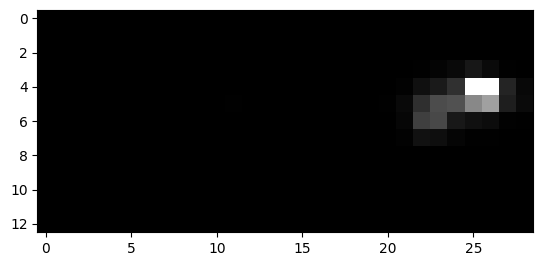

666


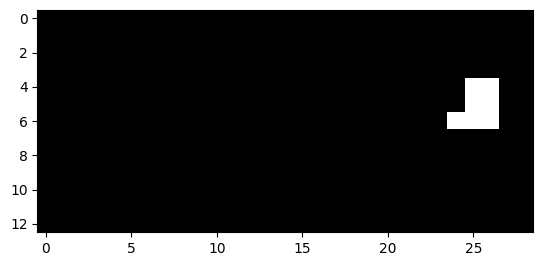

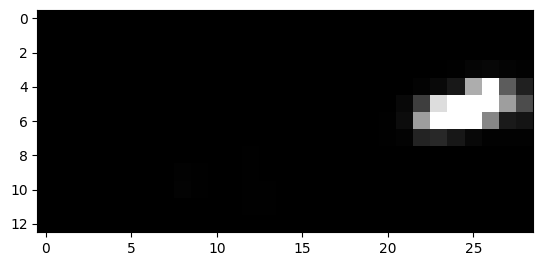

667


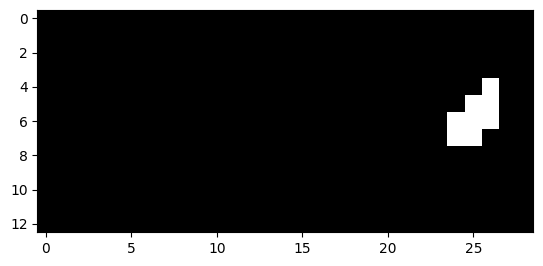

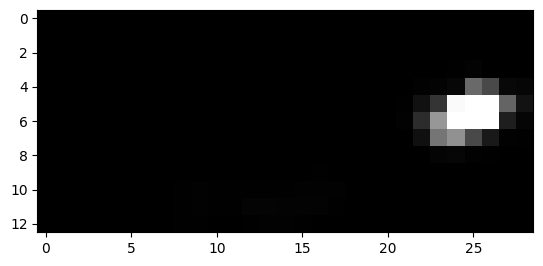

668


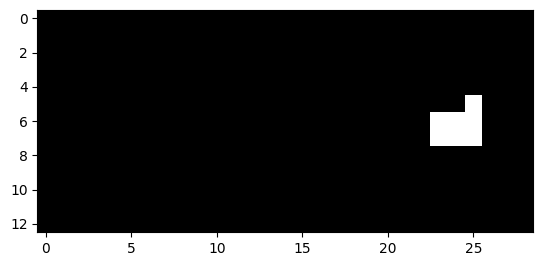

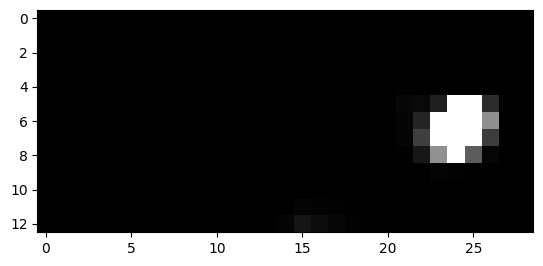

669


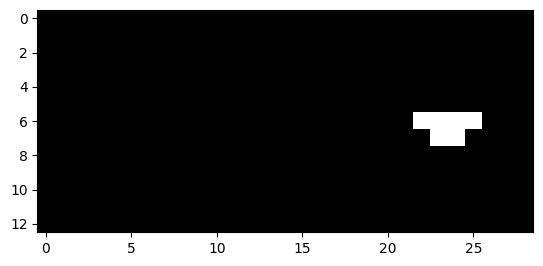

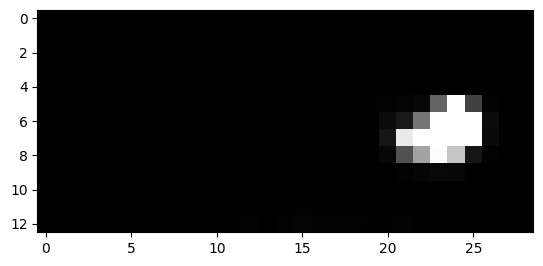

670


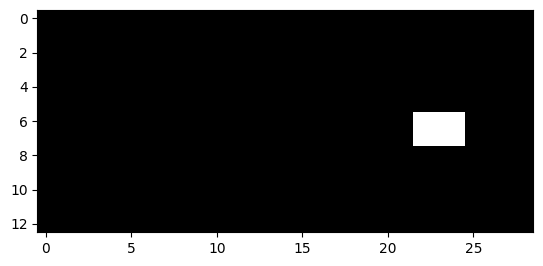

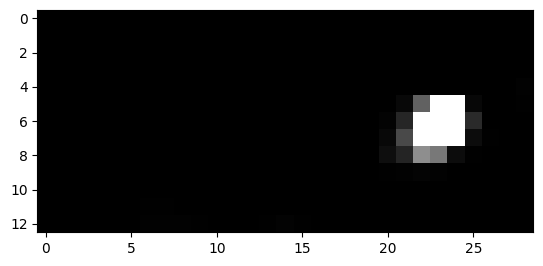

671


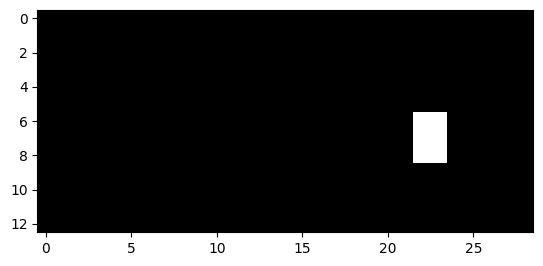

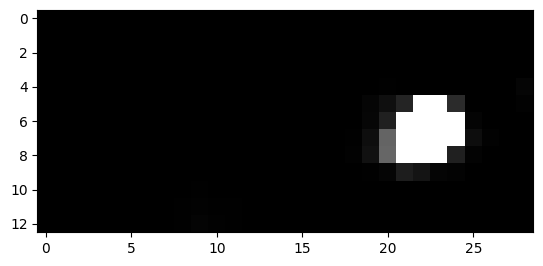

672


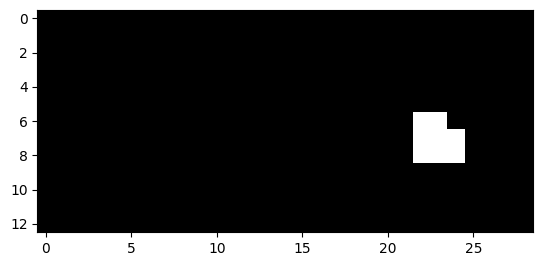

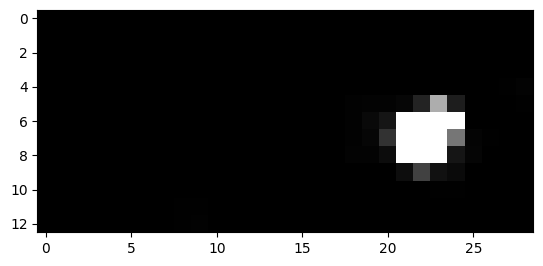

673


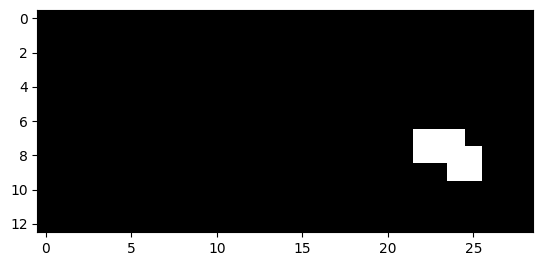

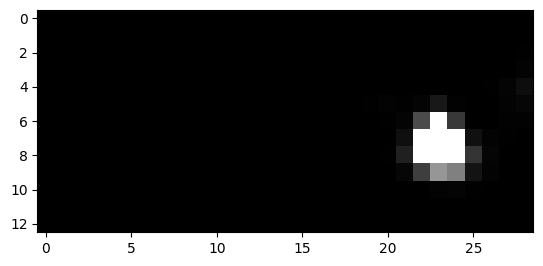

674


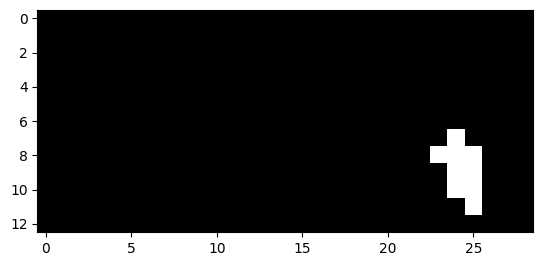

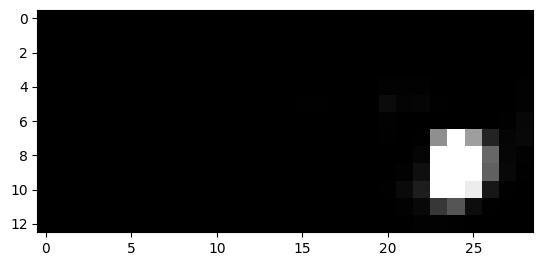

675


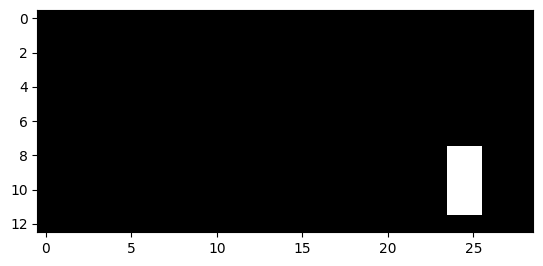

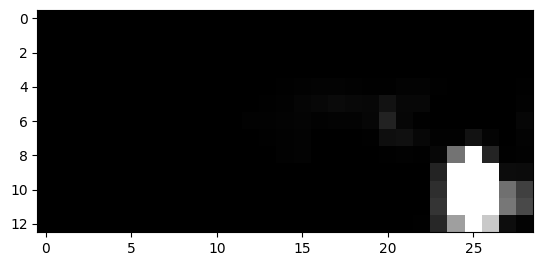

676


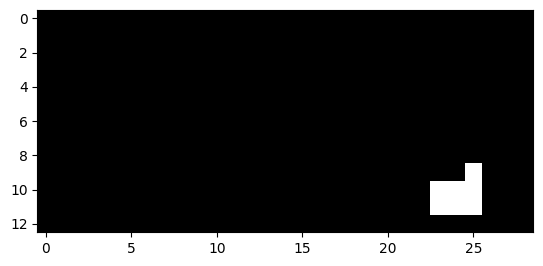

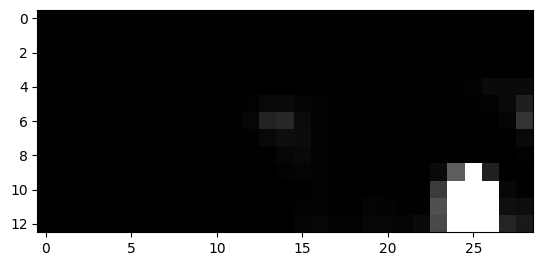

677


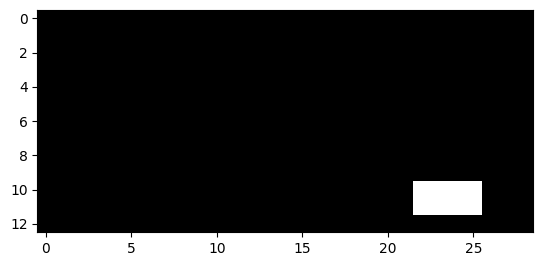

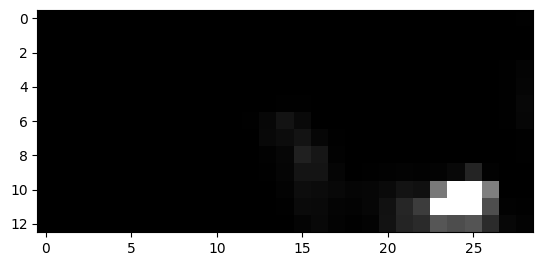

678


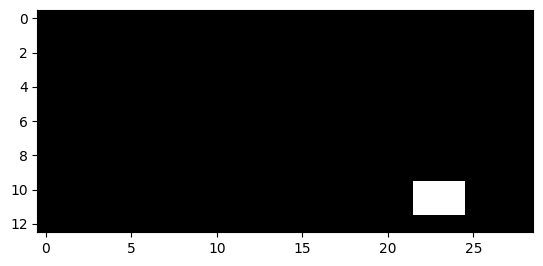

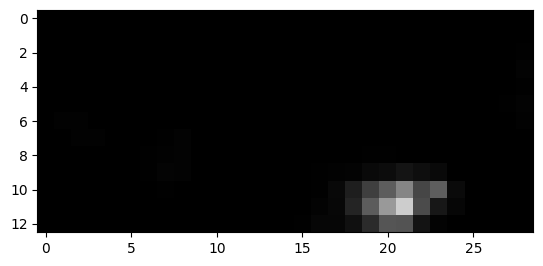

699


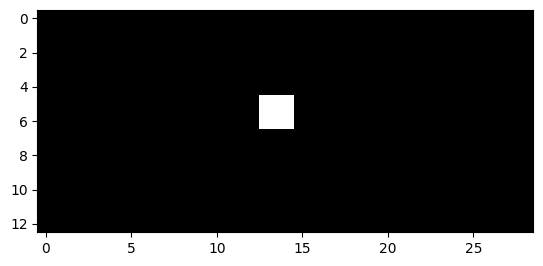

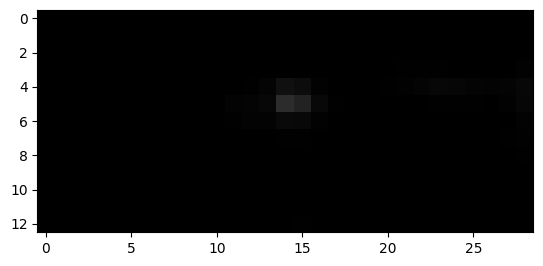

700


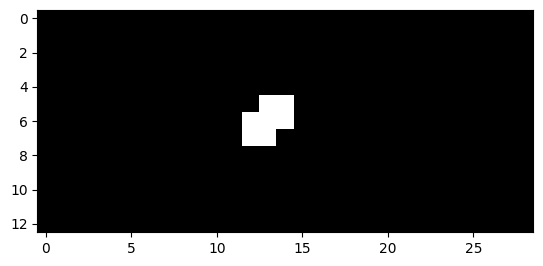

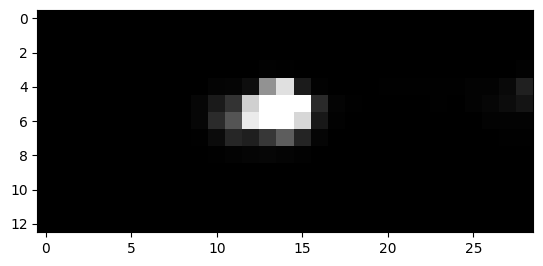

701


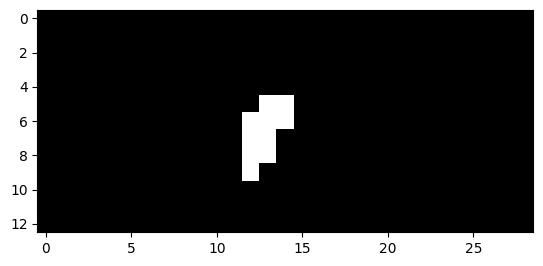

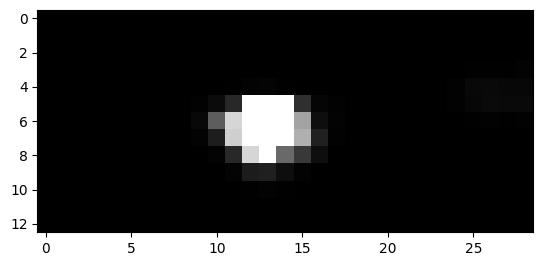

702


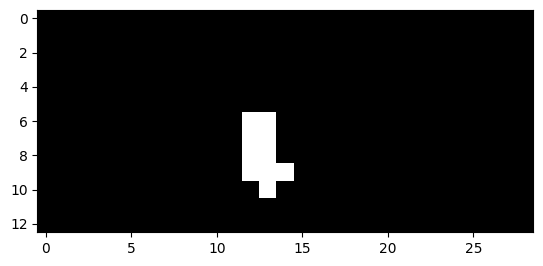

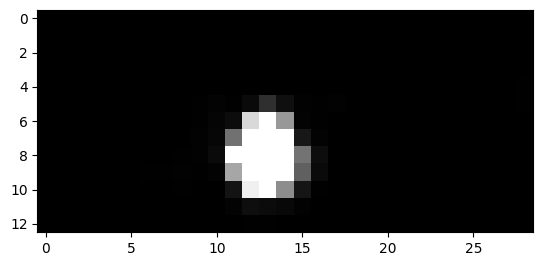

703


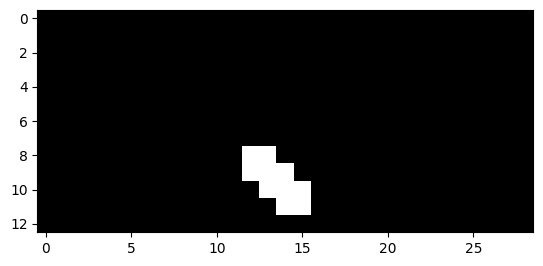

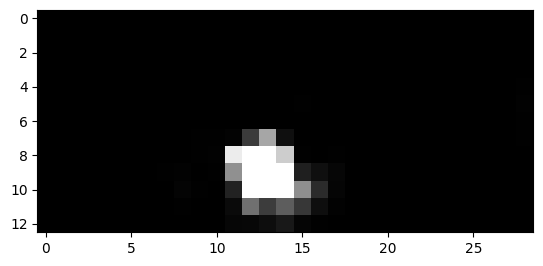

704


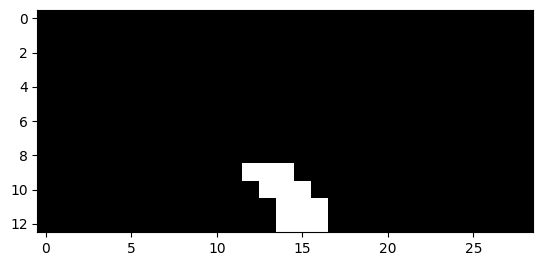

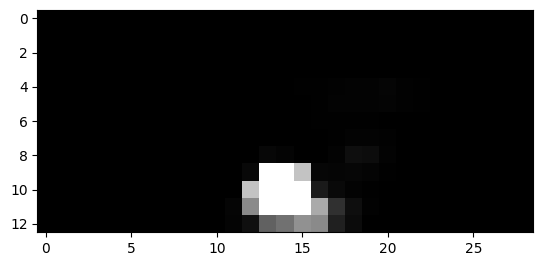

705


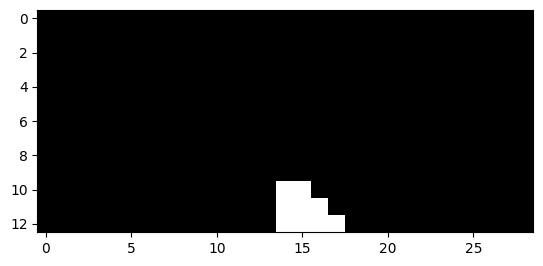

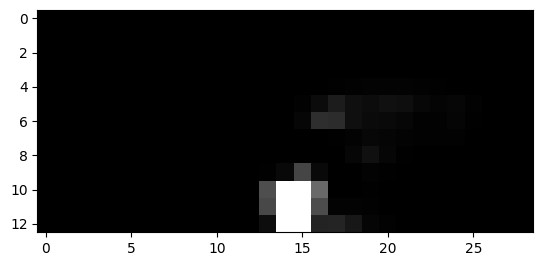

706


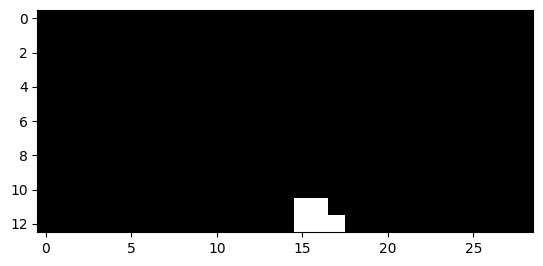

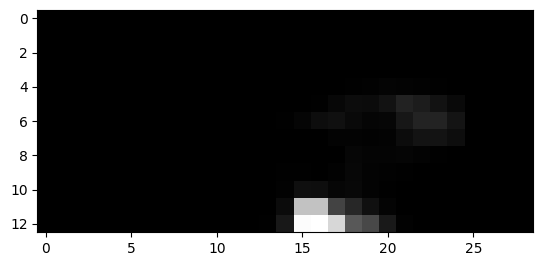

711


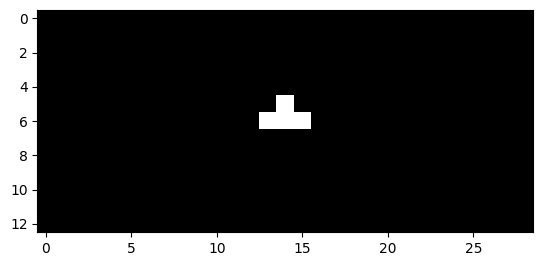

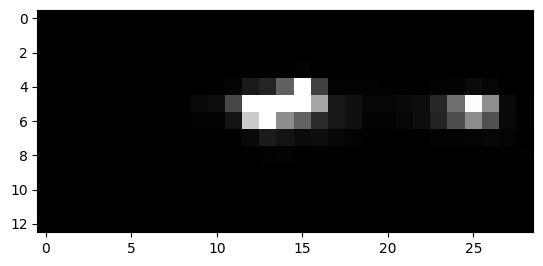

712


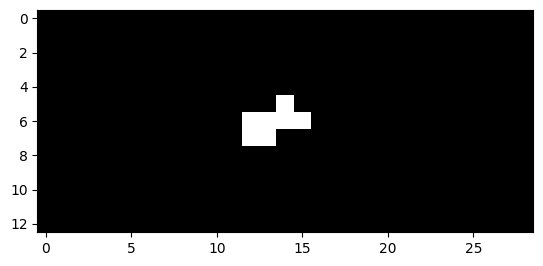

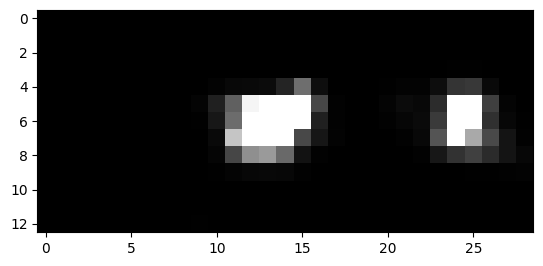

713


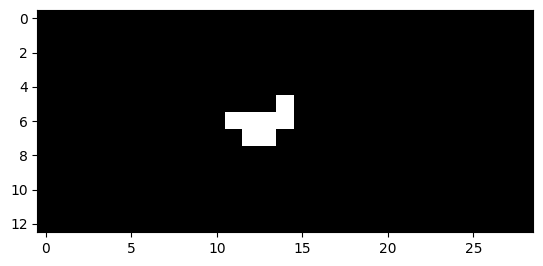

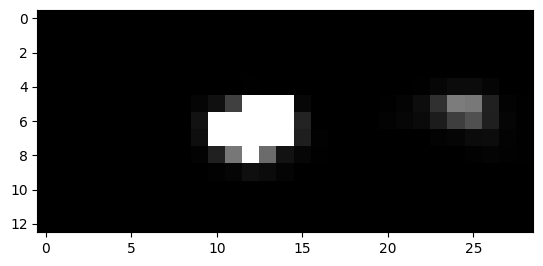

714


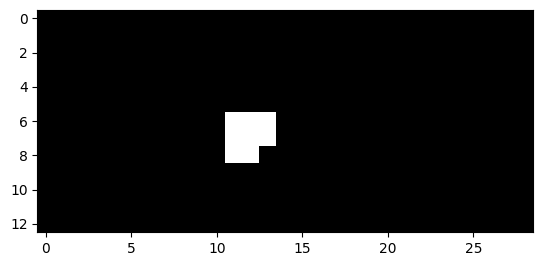

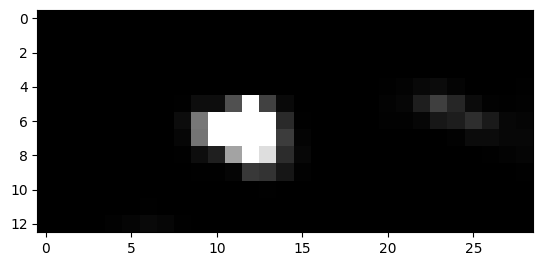

715


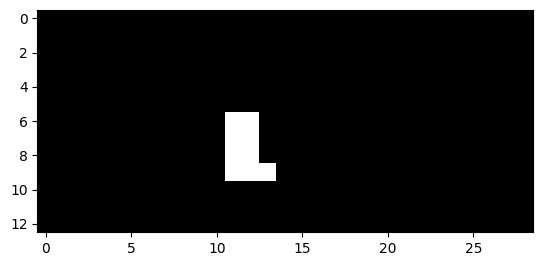

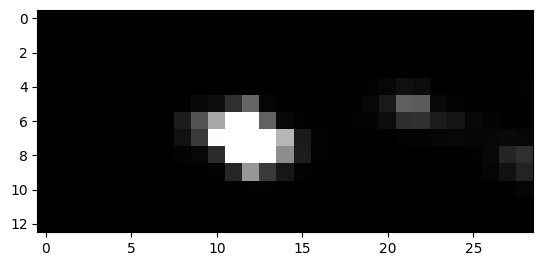

716


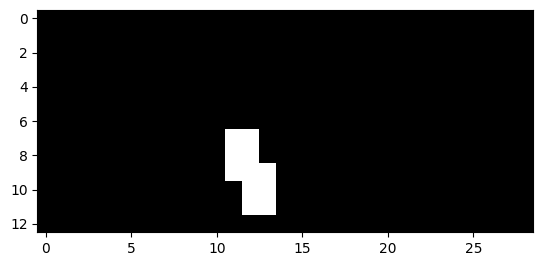

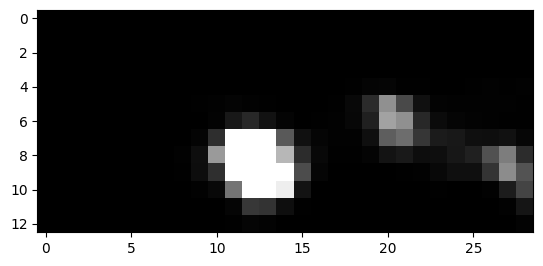

717


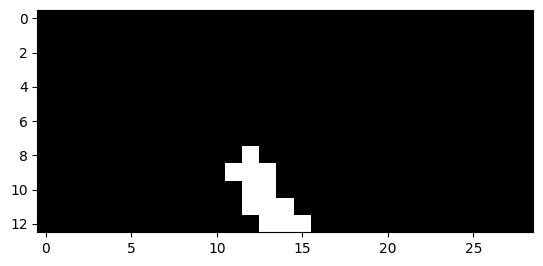

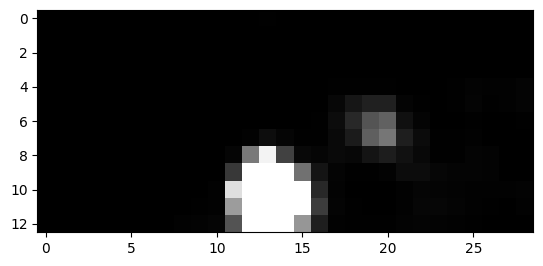

718


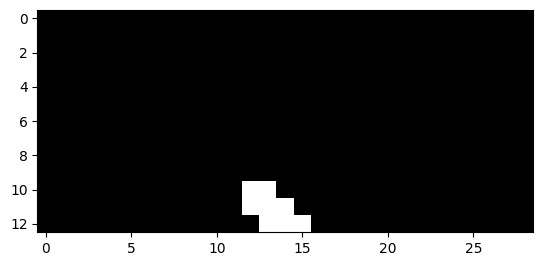

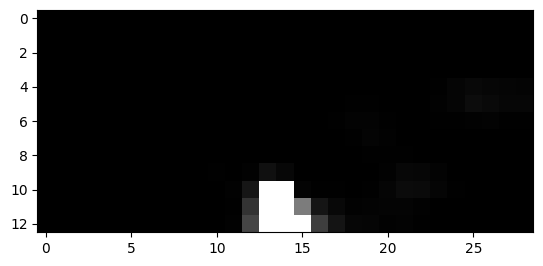

719


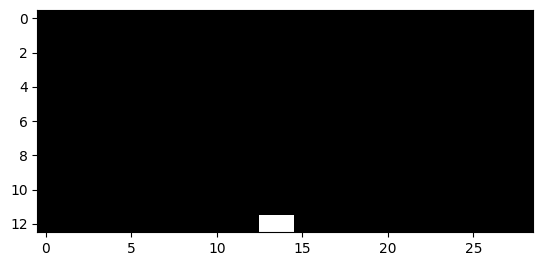

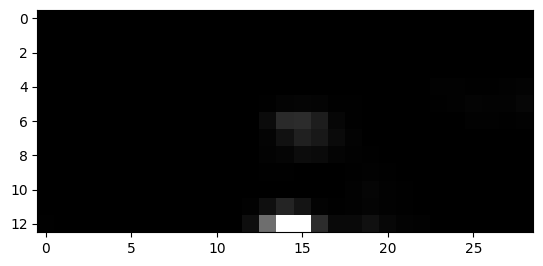

751


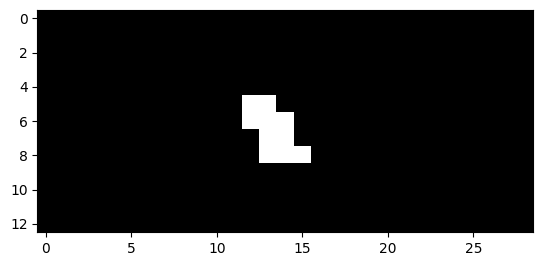

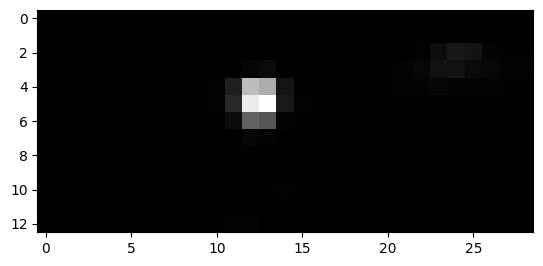

752


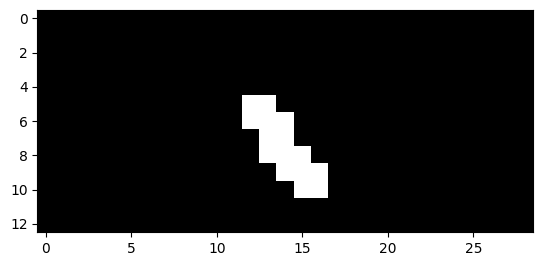

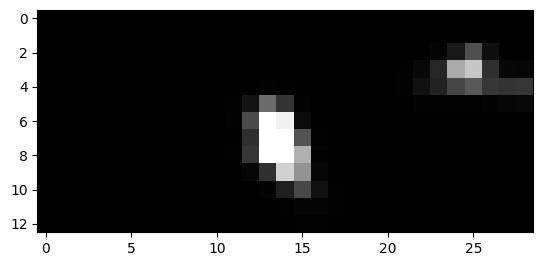

753


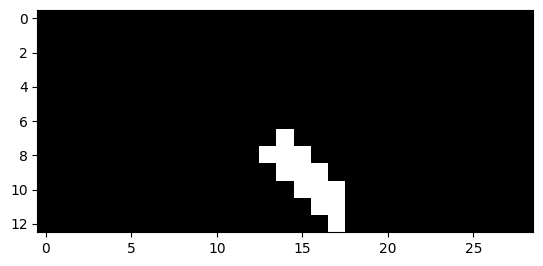

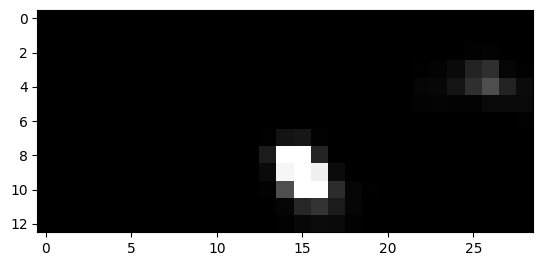

754


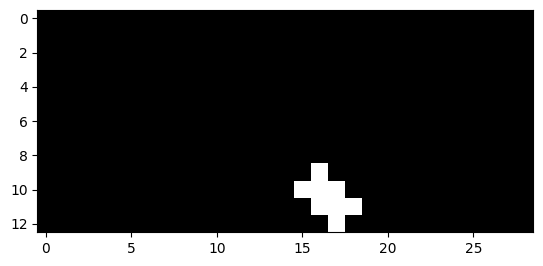

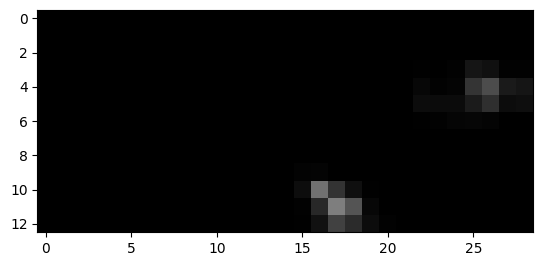

755


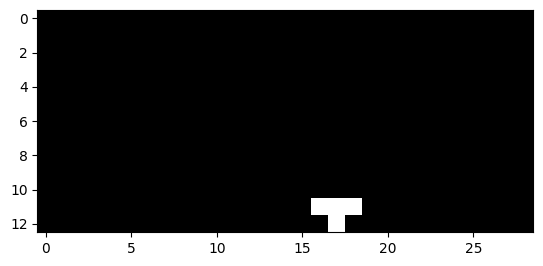

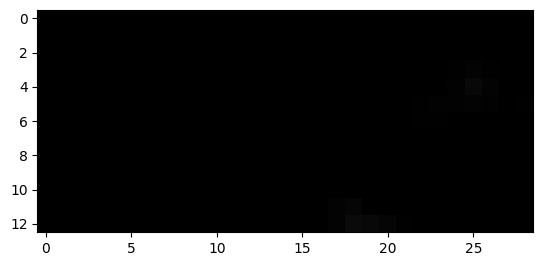

756


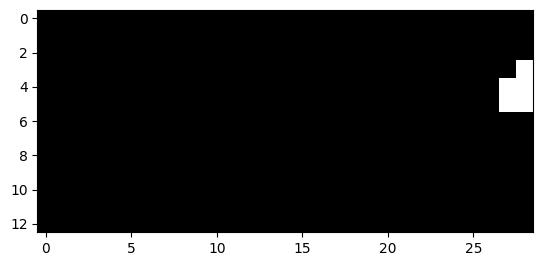

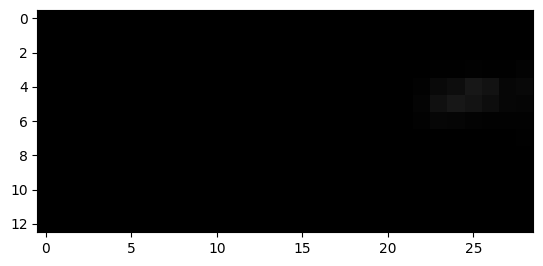

757


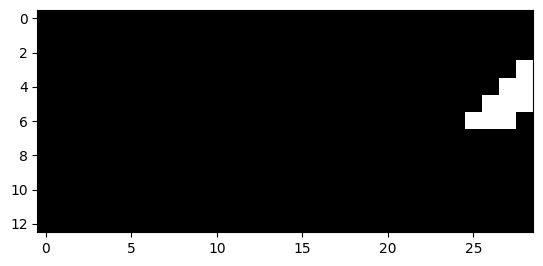

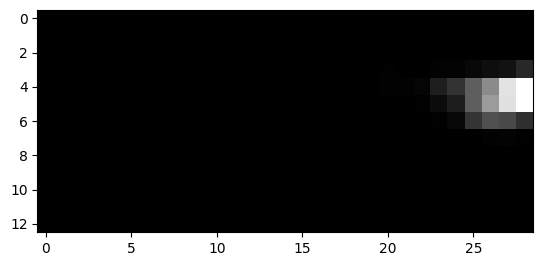

758


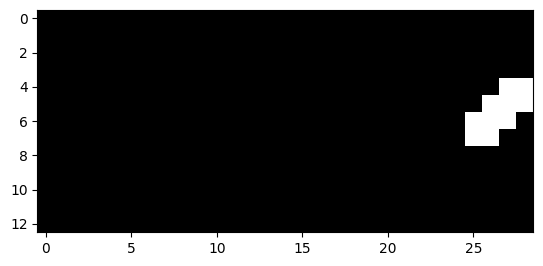

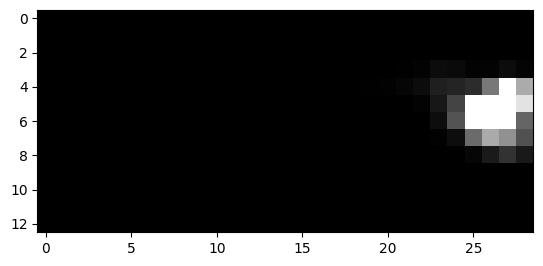

759


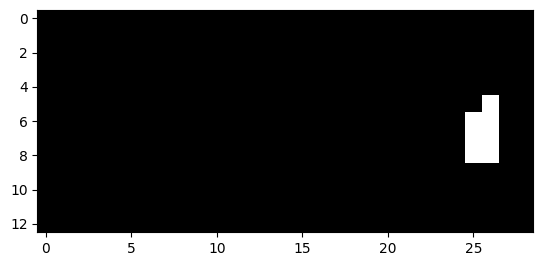

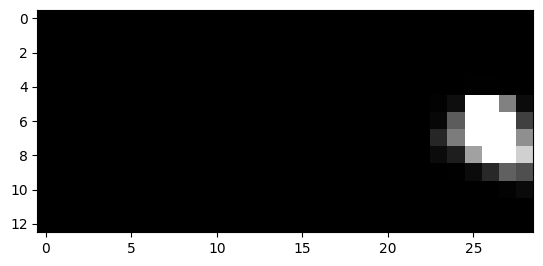

760


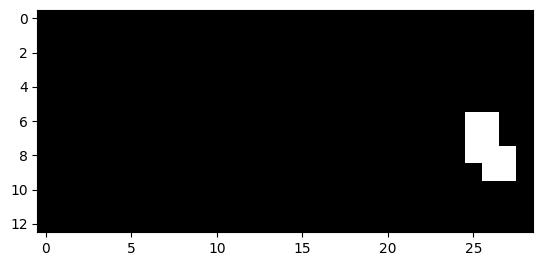

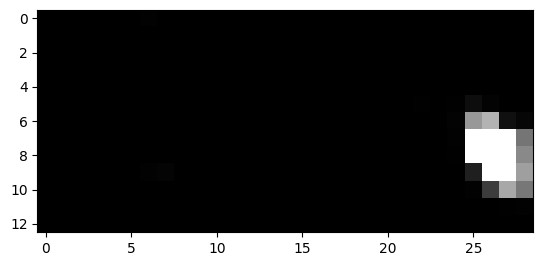

761


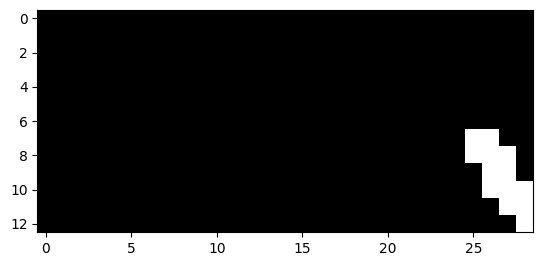

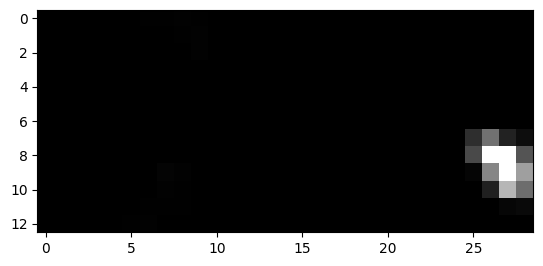

762


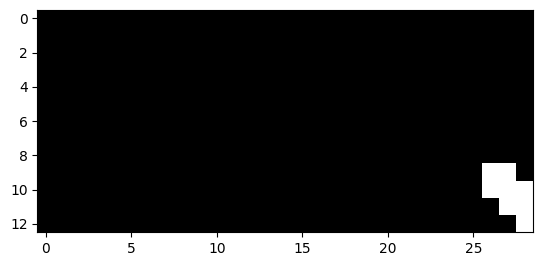

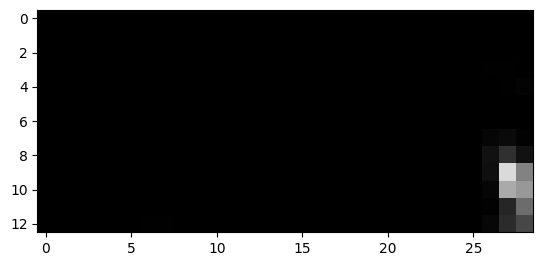

763


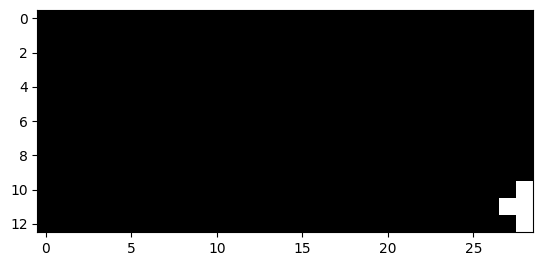

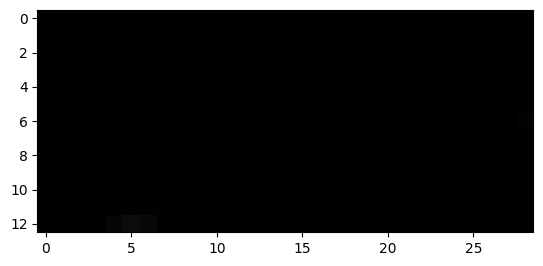

896


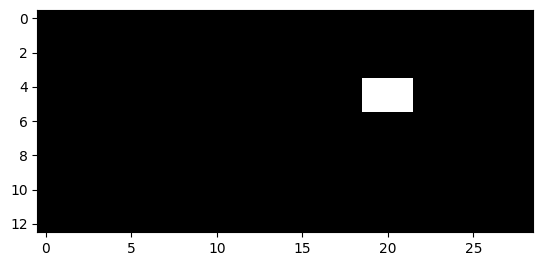

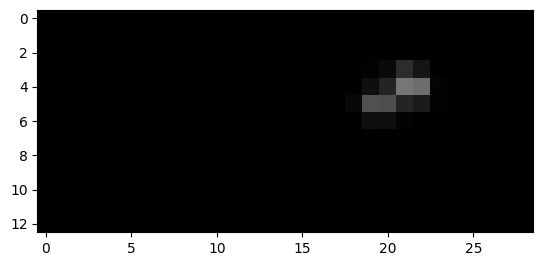

897


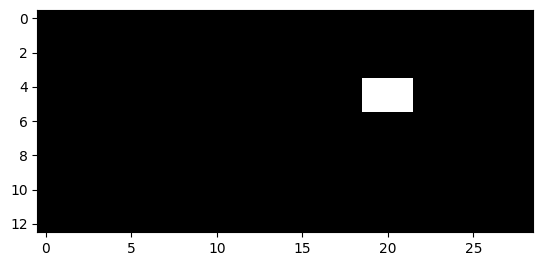

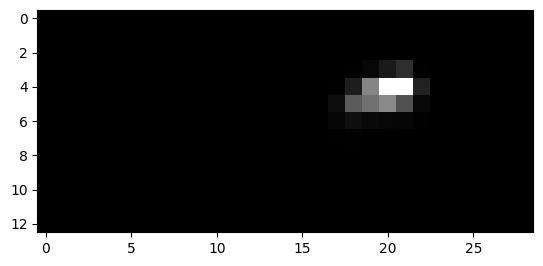

948


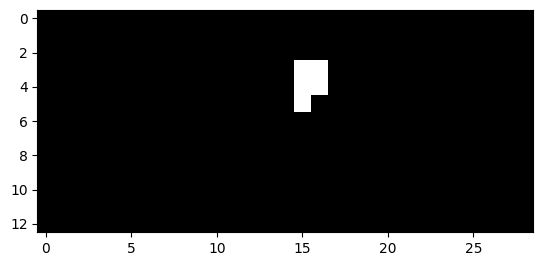

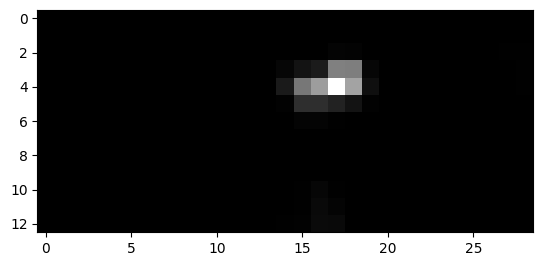

949


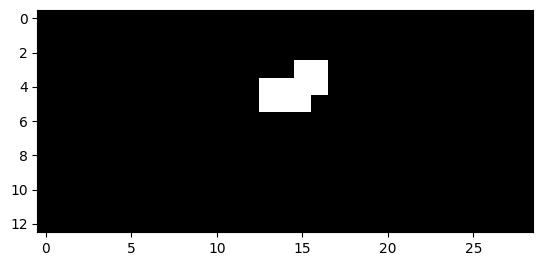

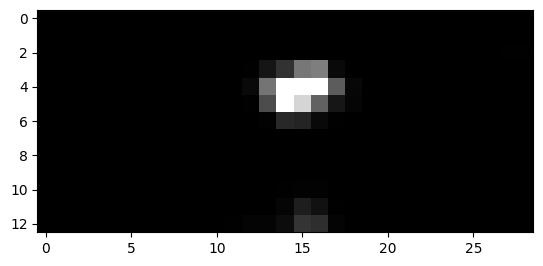

950


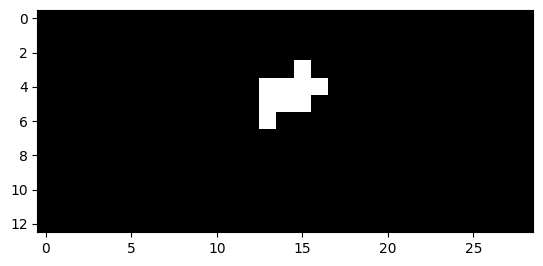

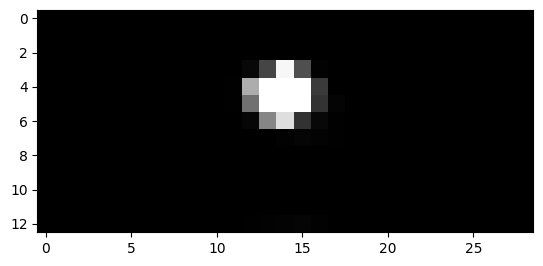

951


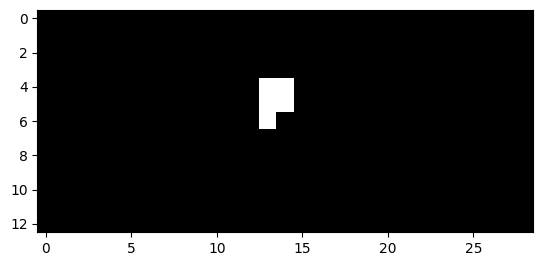

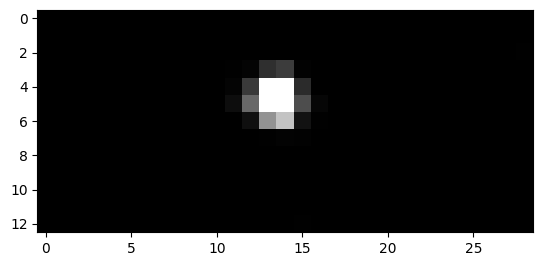

952


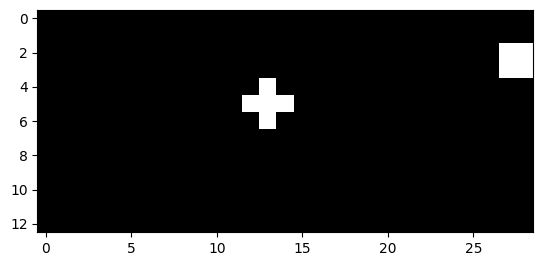

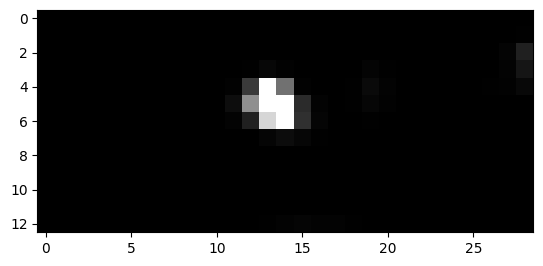

953


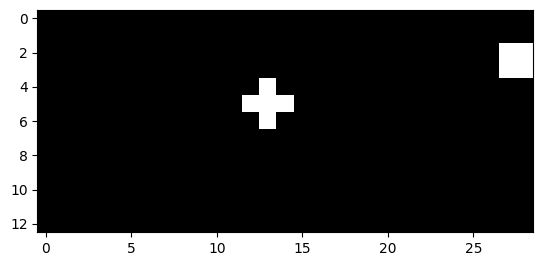

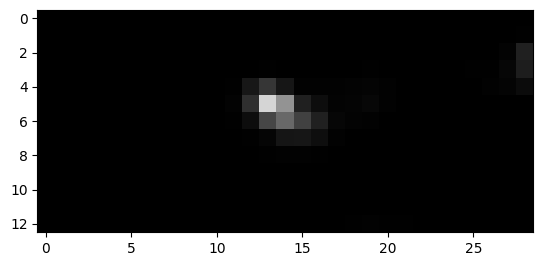

954


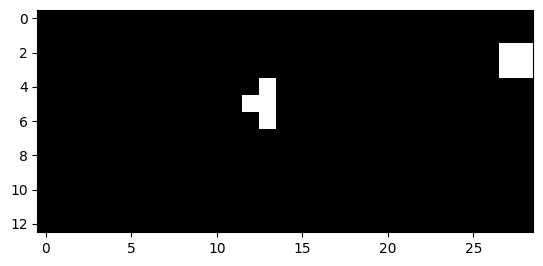

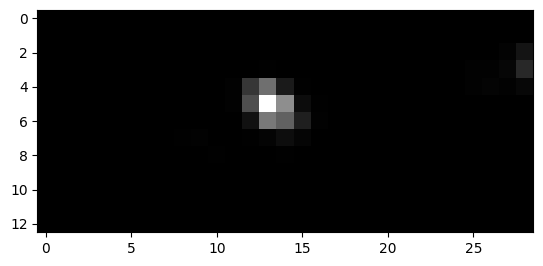

955


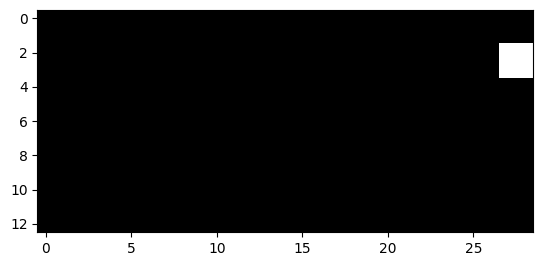

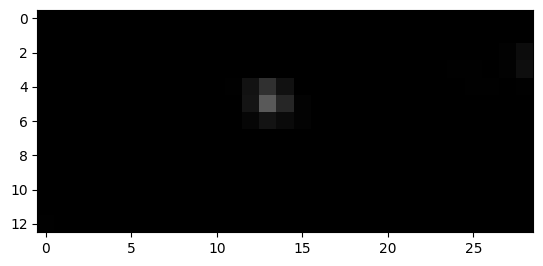

959


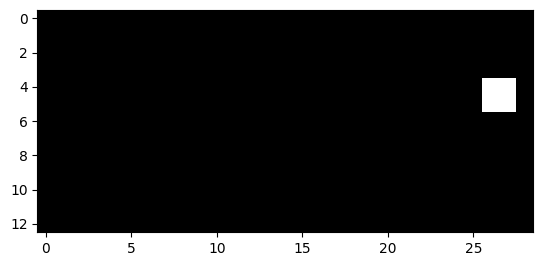

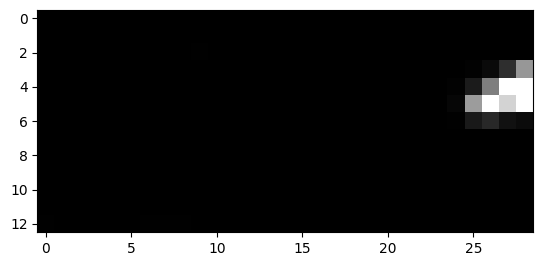

960


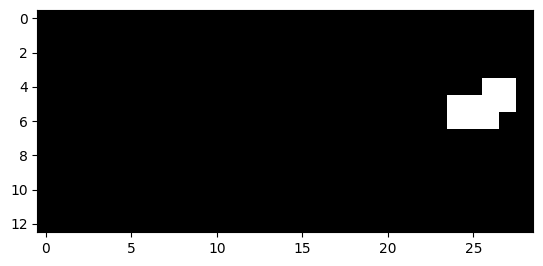

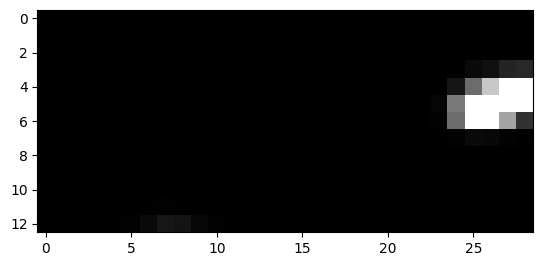

961


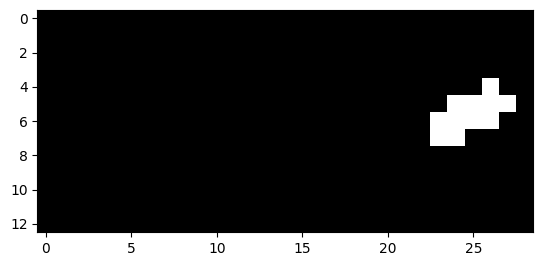

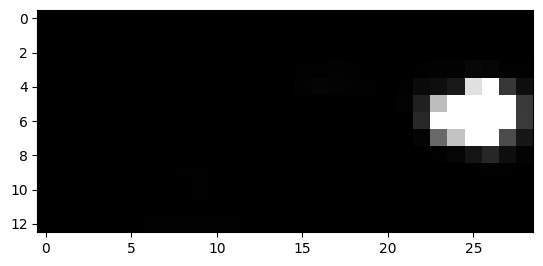

962


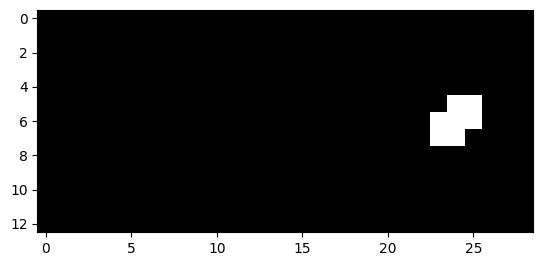

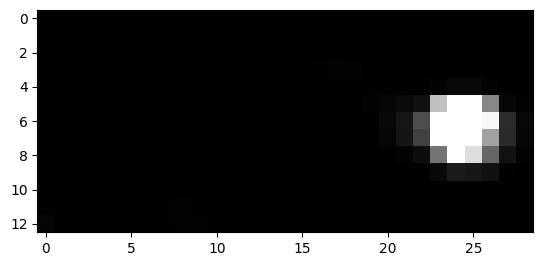

987


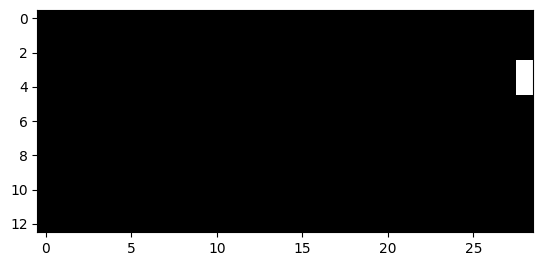

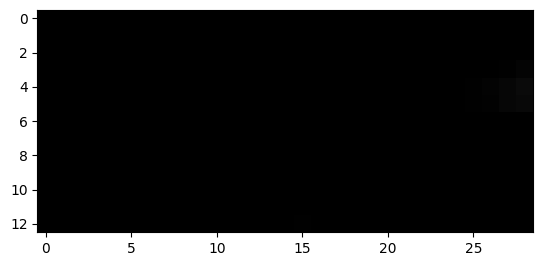

988


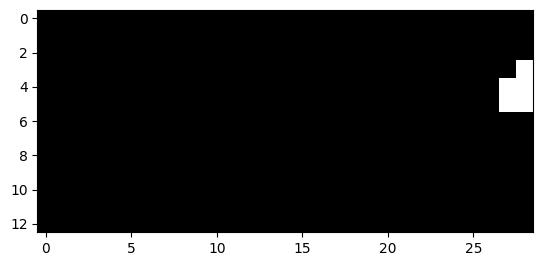

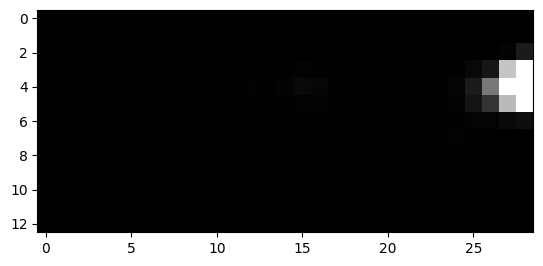

989


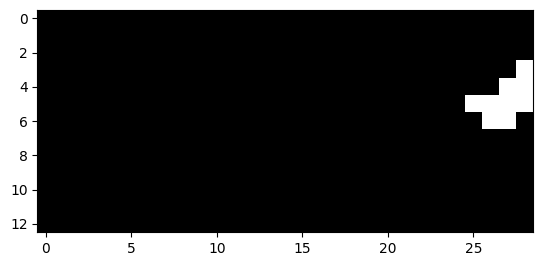

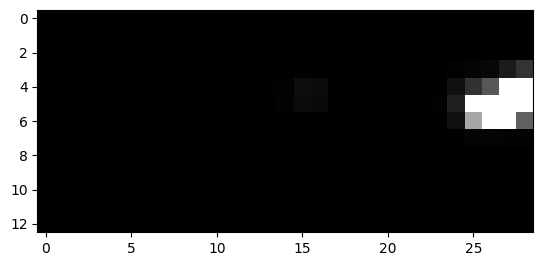

990


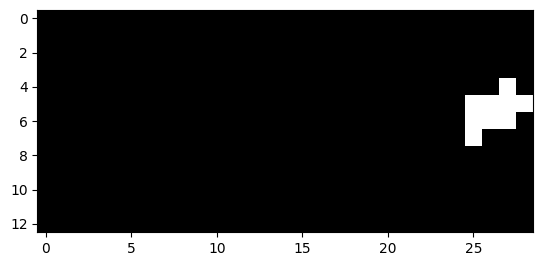

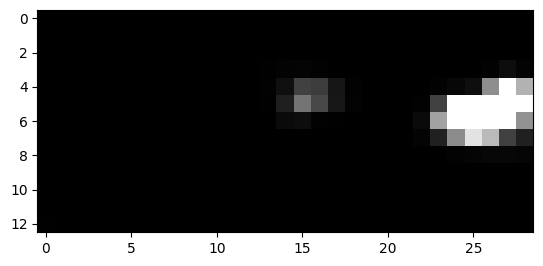

991


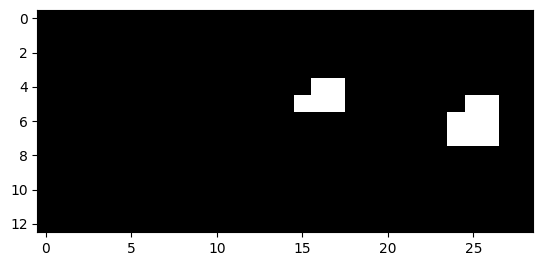

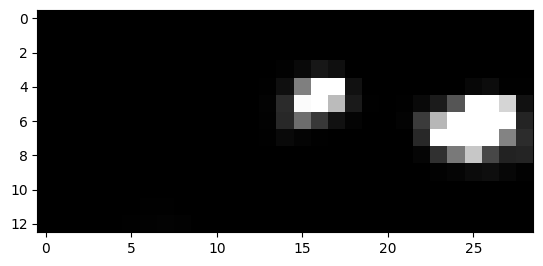

992


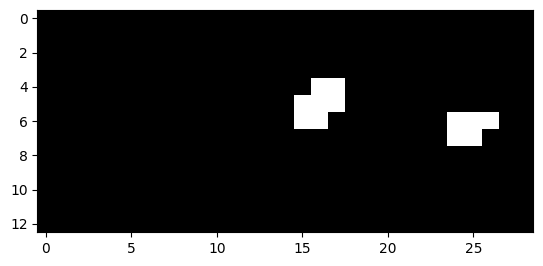

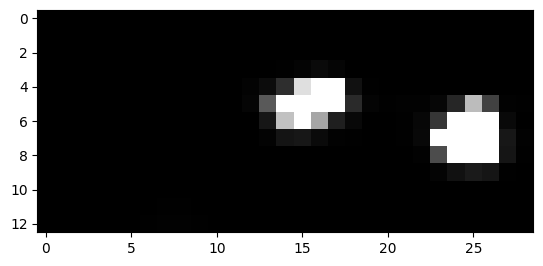

993


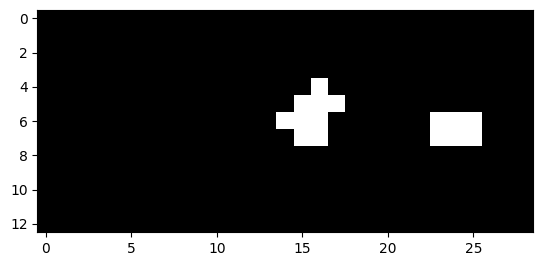

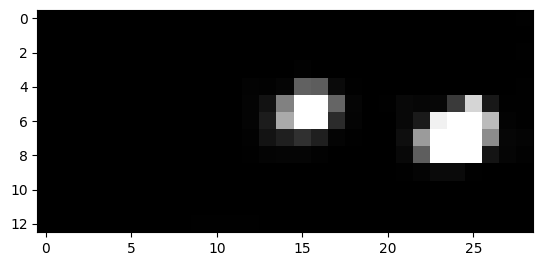

994


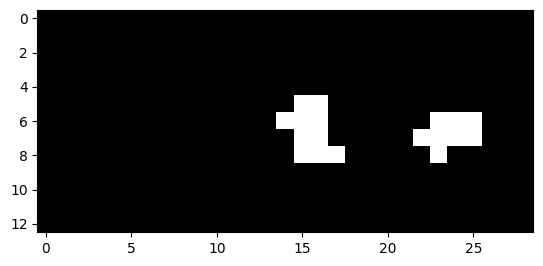

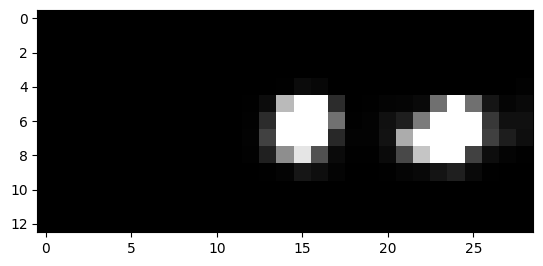

995


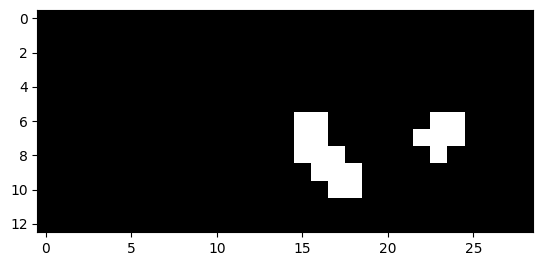

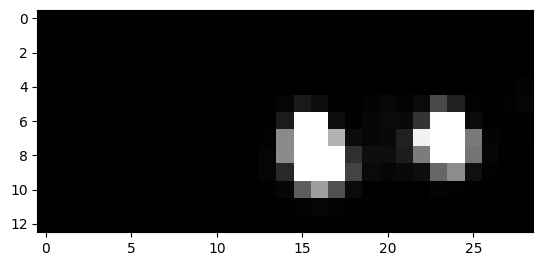

996


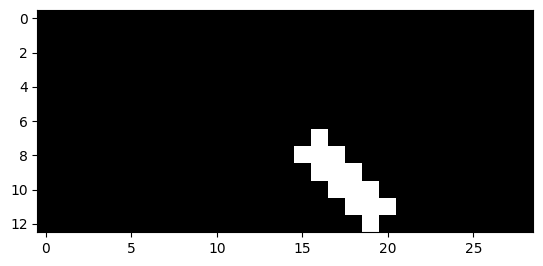

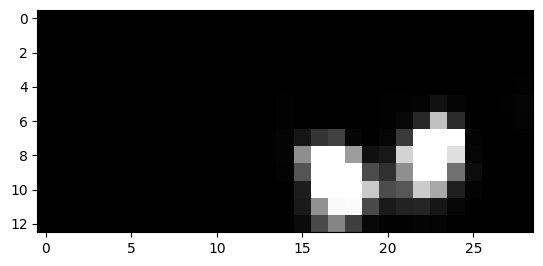

997


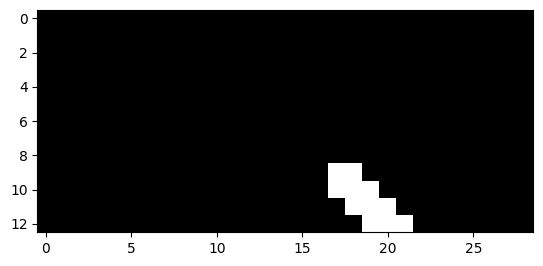

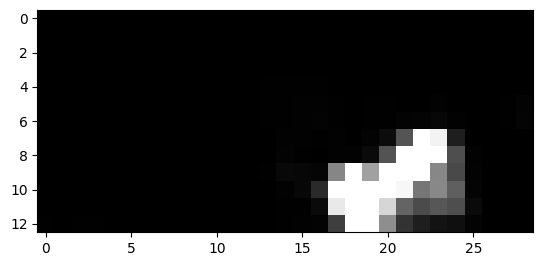

998


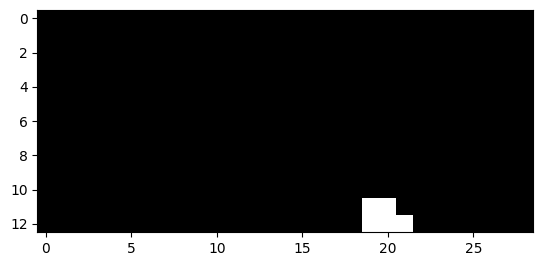

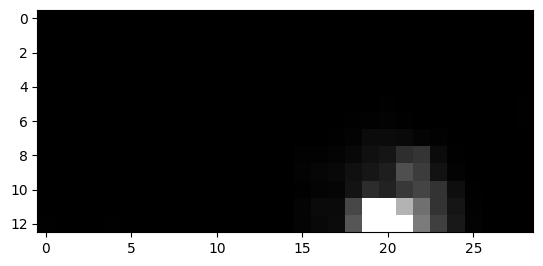

1023


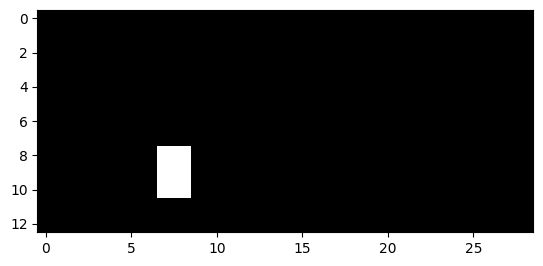

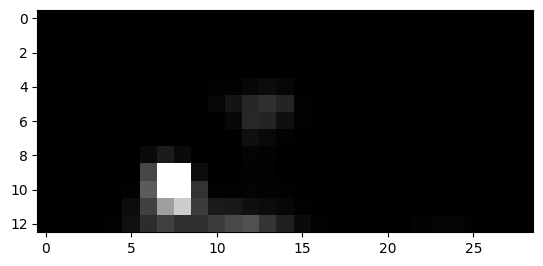

1024


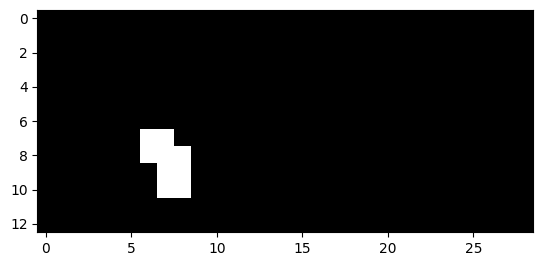

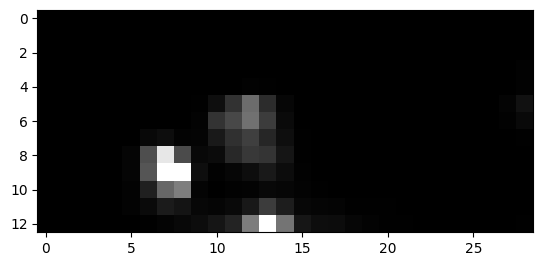

1025


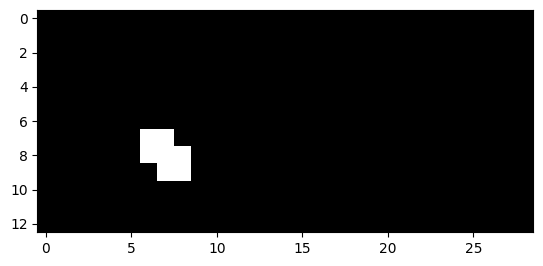

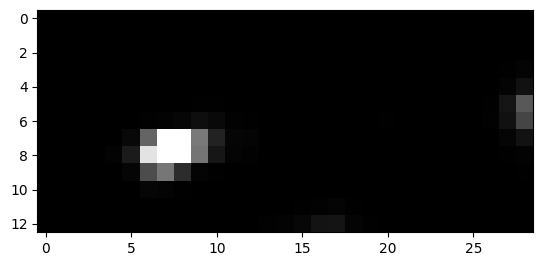

1027


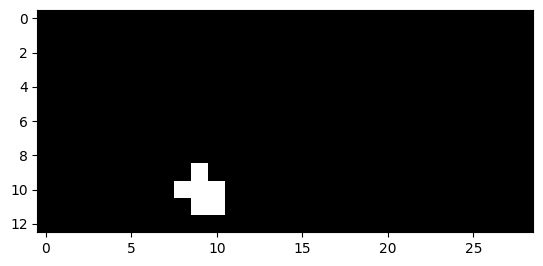

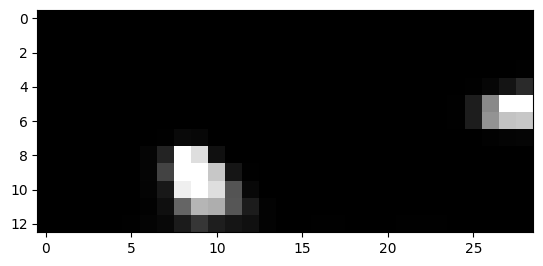

1028


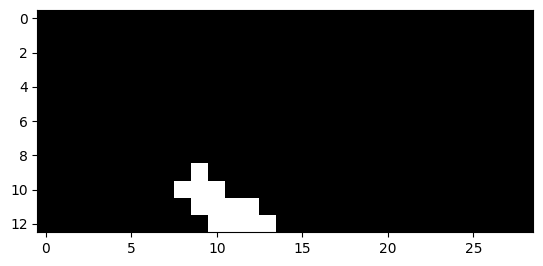

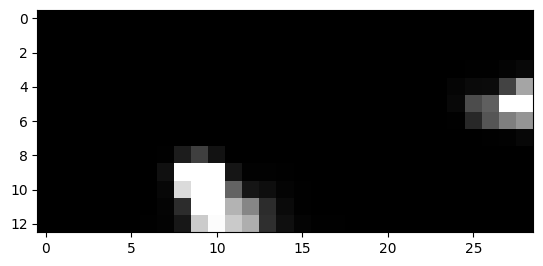

1029


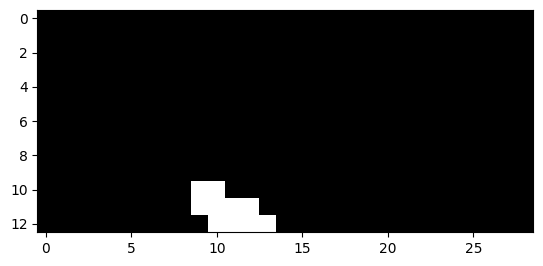

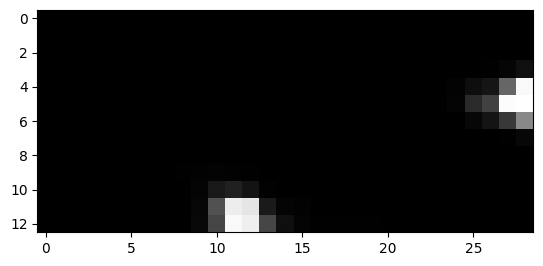

1039


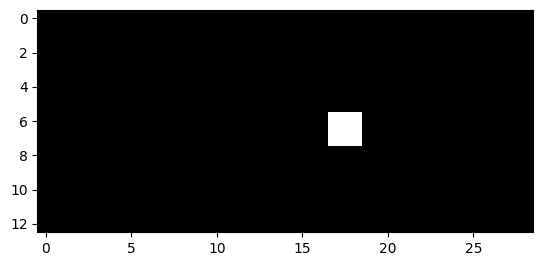

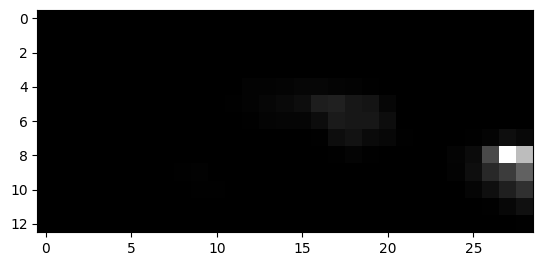

1040


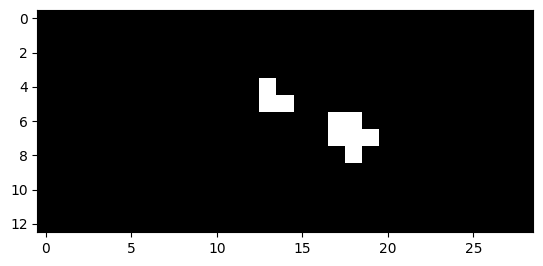

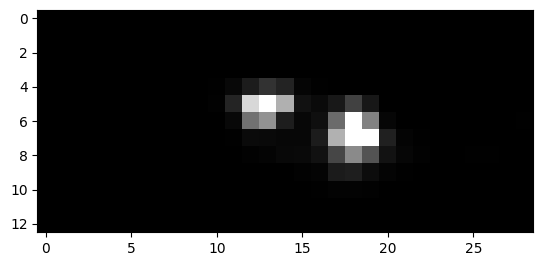

1041


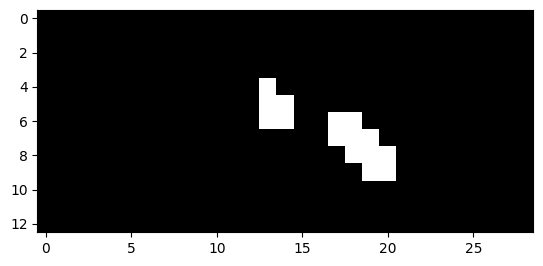

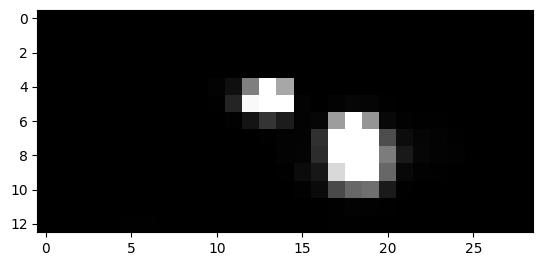

1042


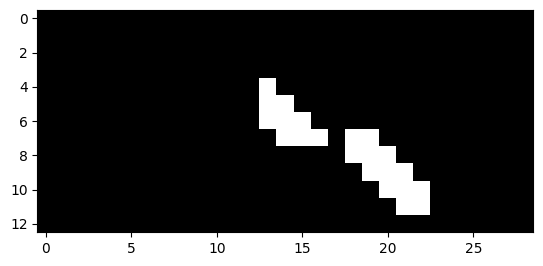

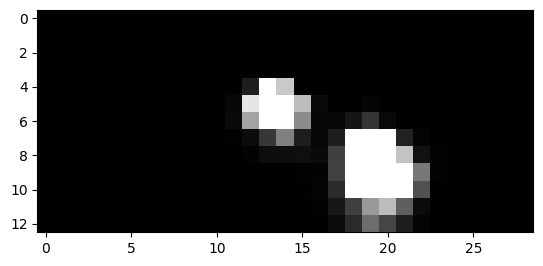

1043


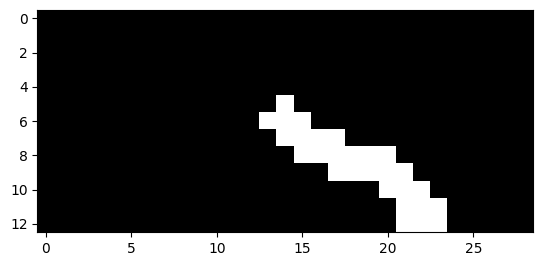

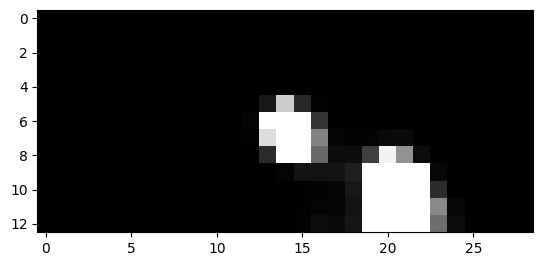

1044


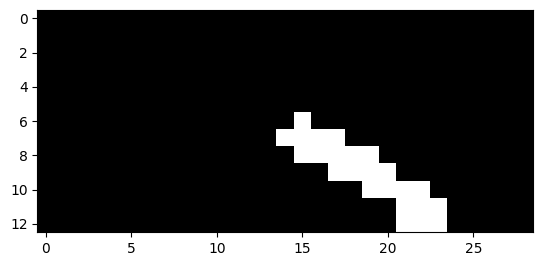

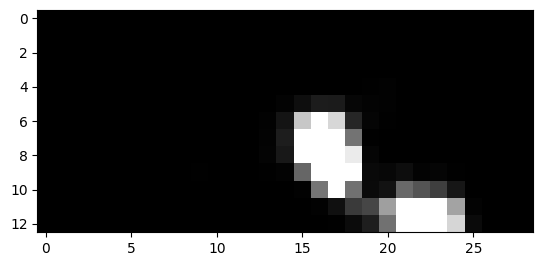

1045


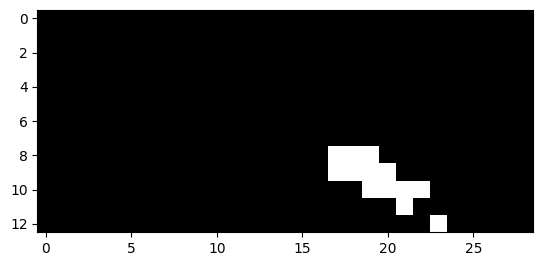

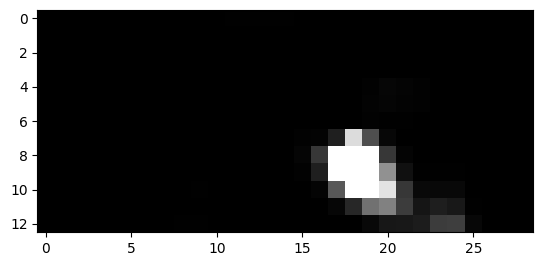

1046


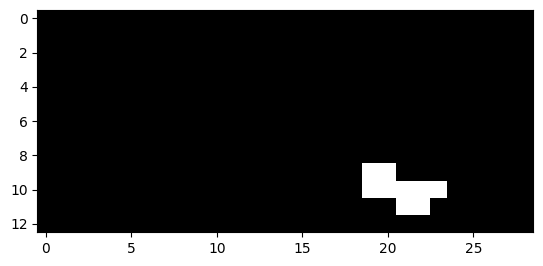

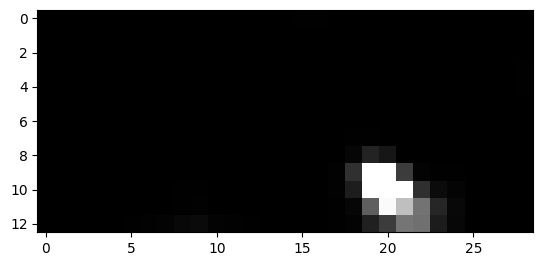

1047


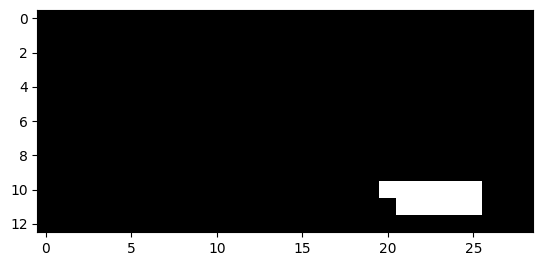

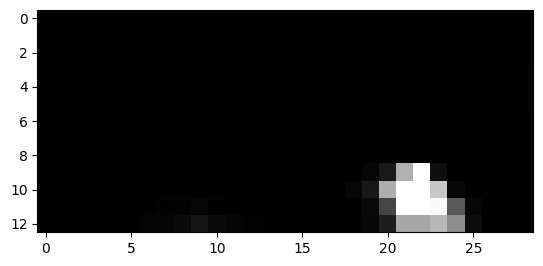

1048


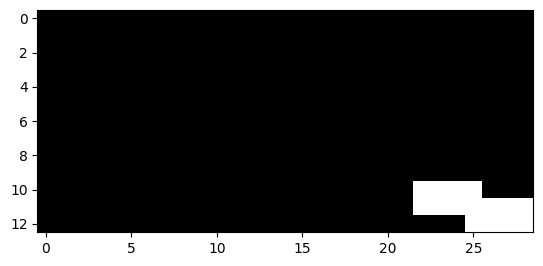

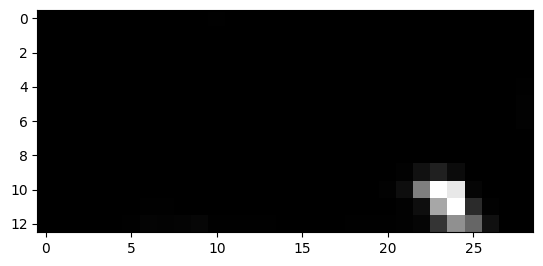

1049


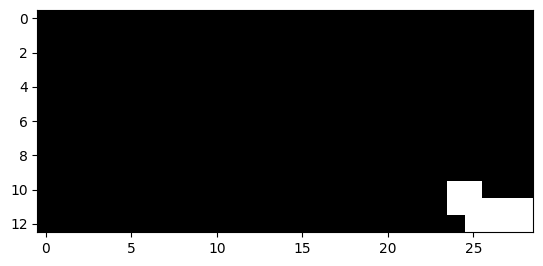

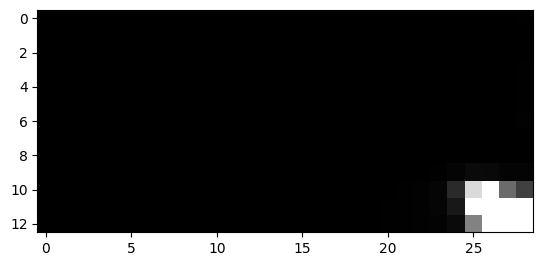

1050


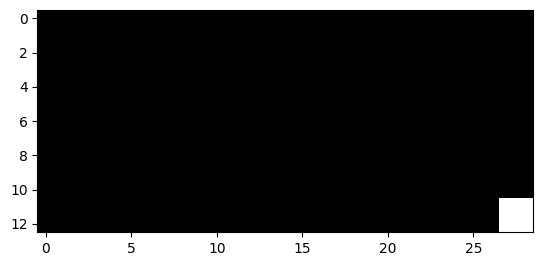

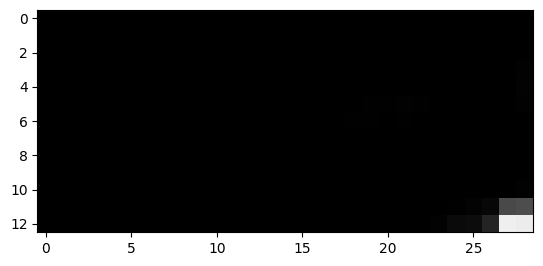

1064


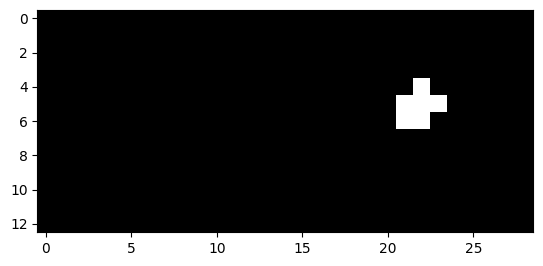

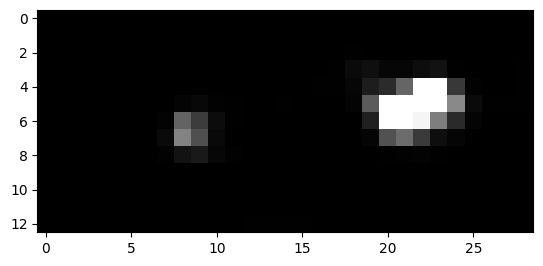

1065


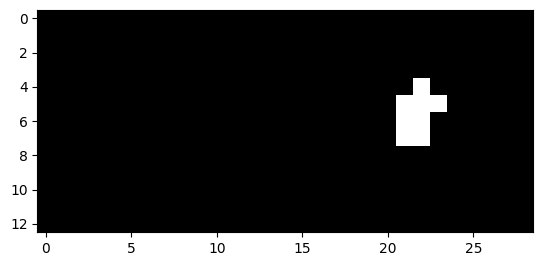

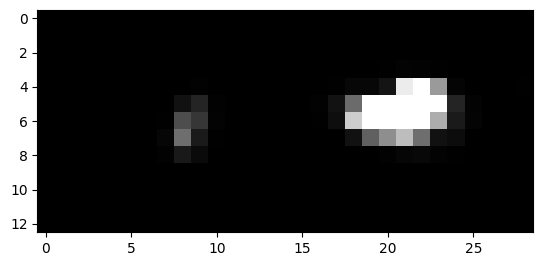

1066


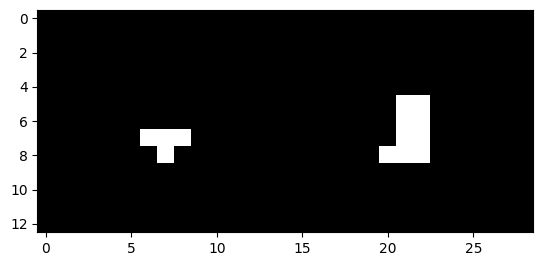

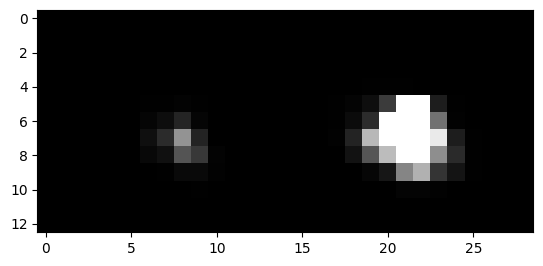

1067


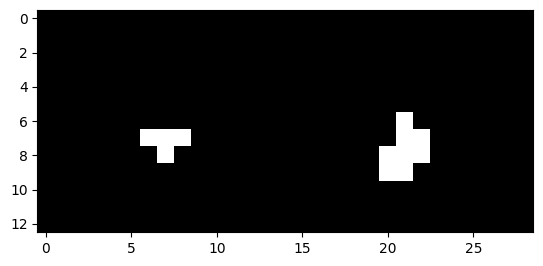

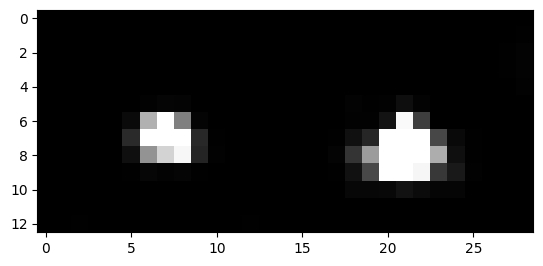

1068


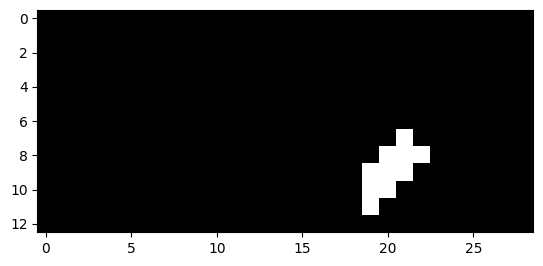

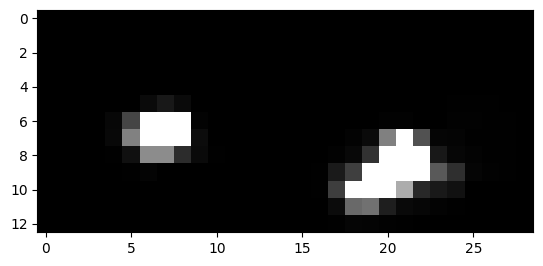

1069


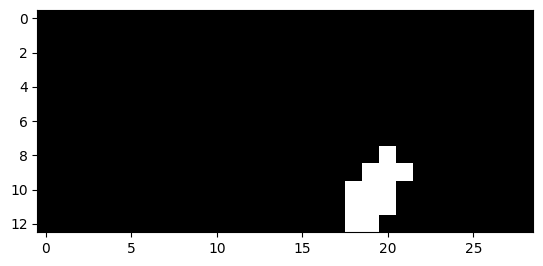

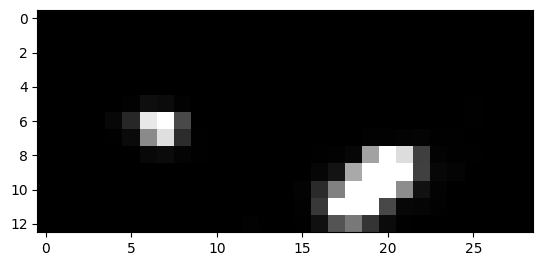

1070


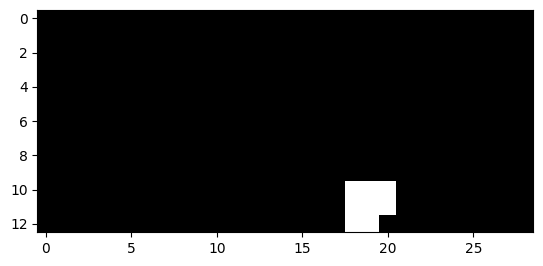

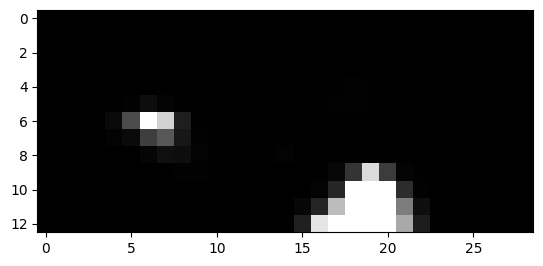

1071


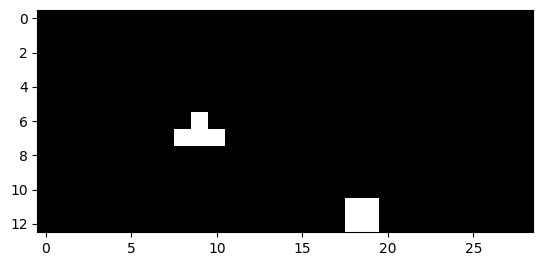

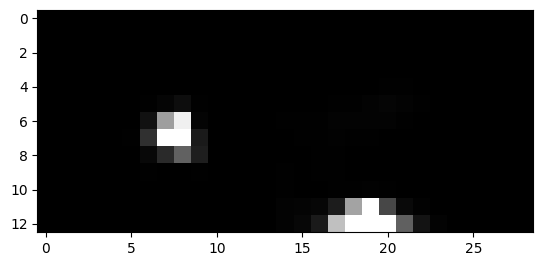

1072


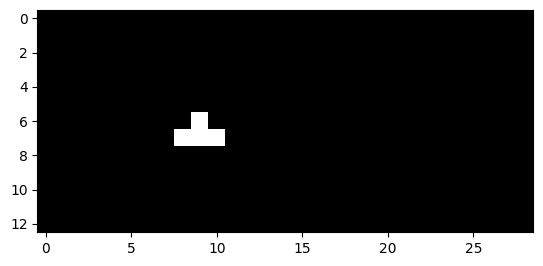

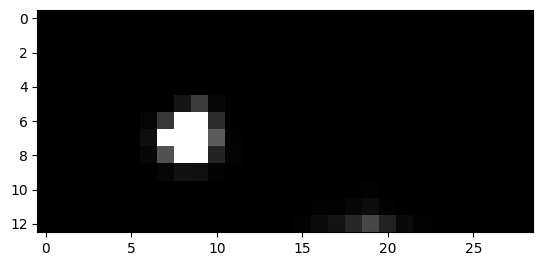

1073


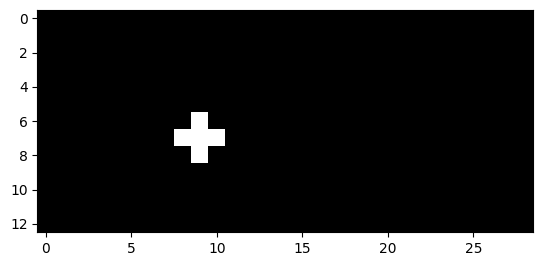

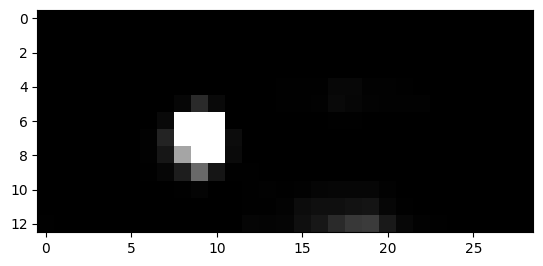

1074


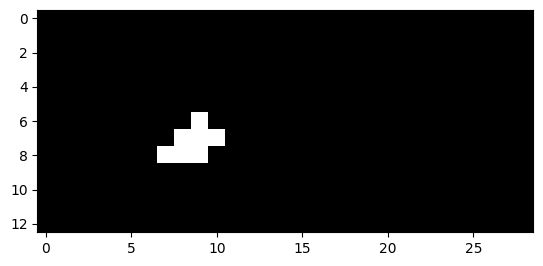

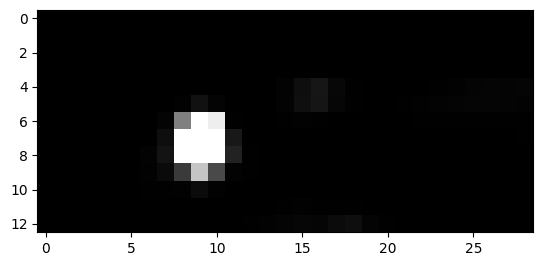

1075


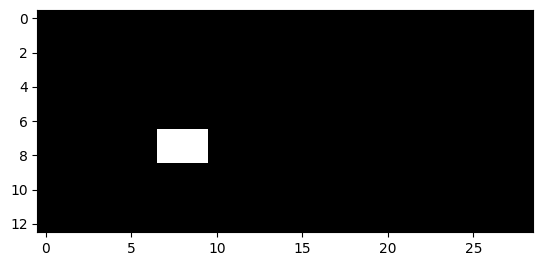

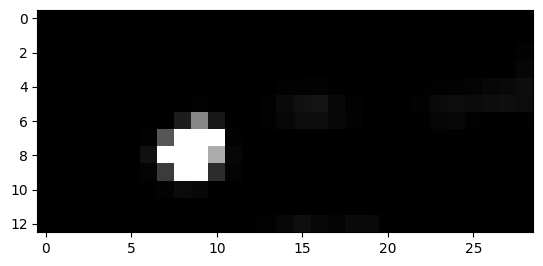

1076


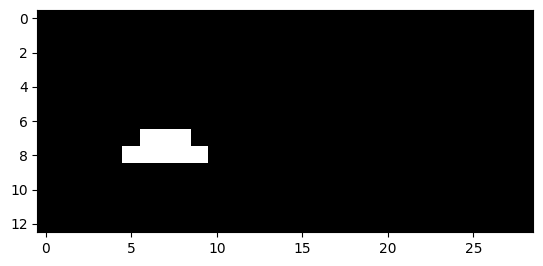

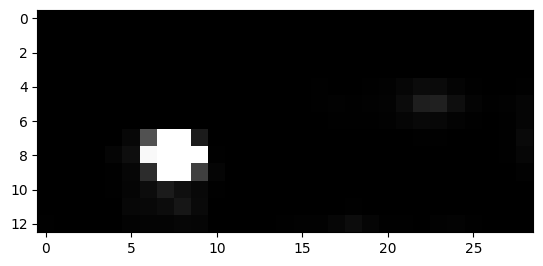

1077


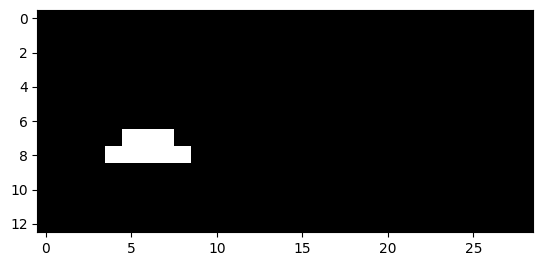

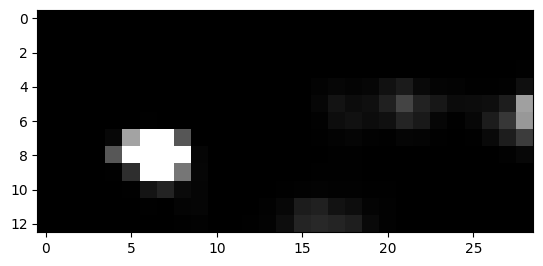

1078


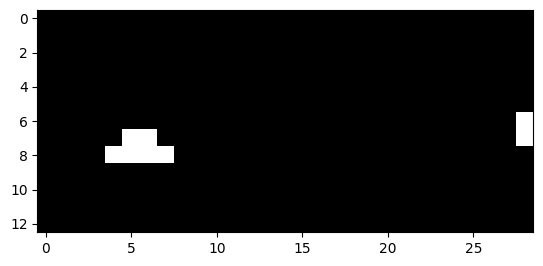

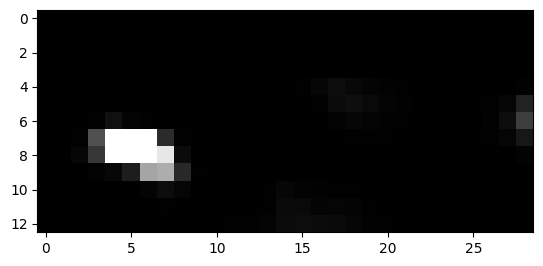

1079


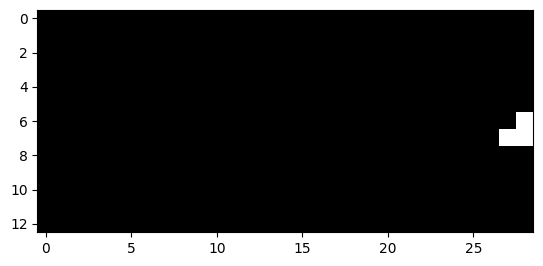

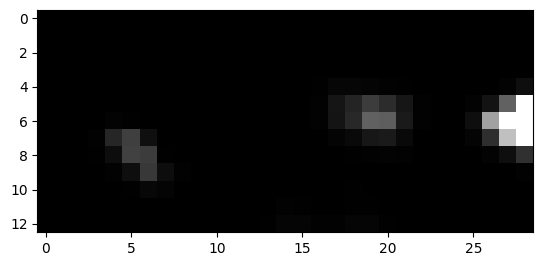

1080


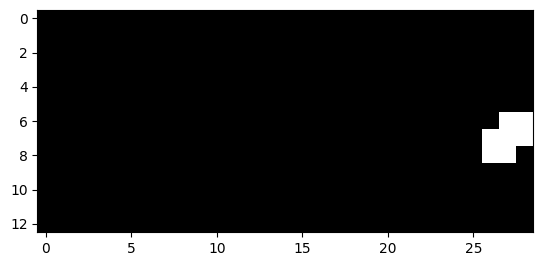

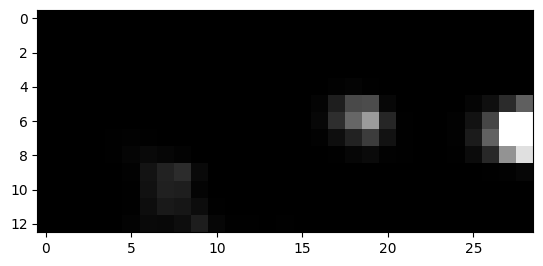

1081


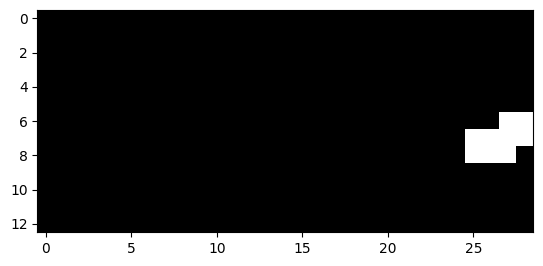

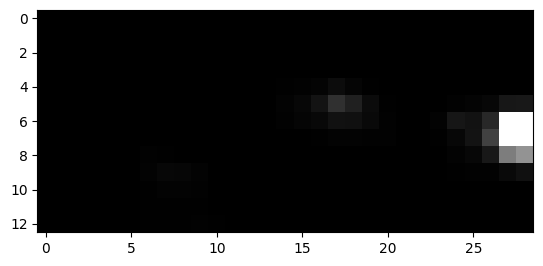

1082


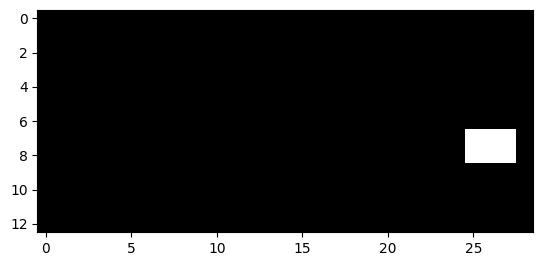

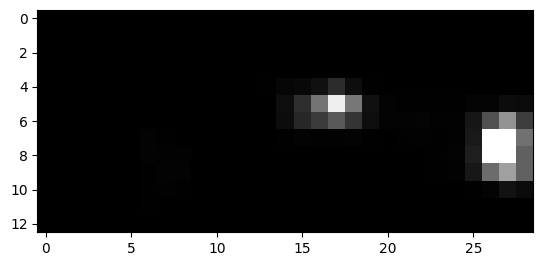

1083


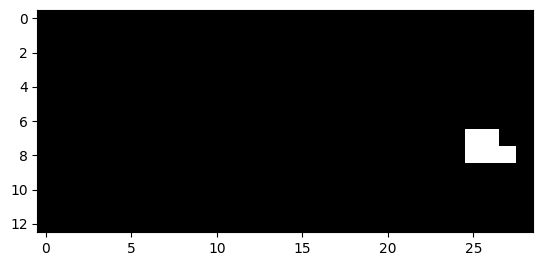

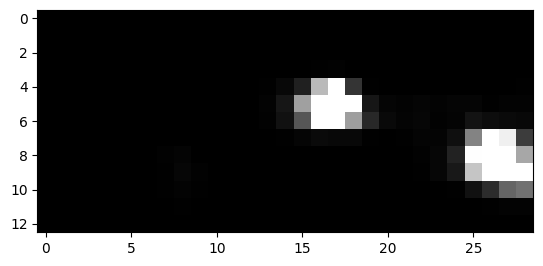

1084


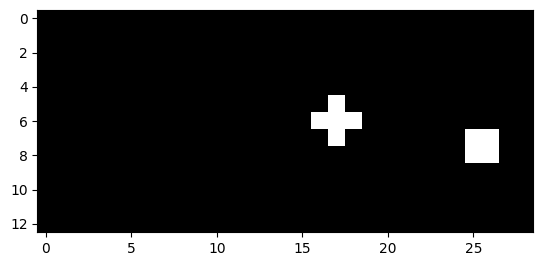

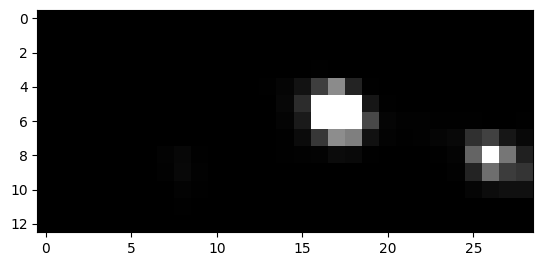

1085


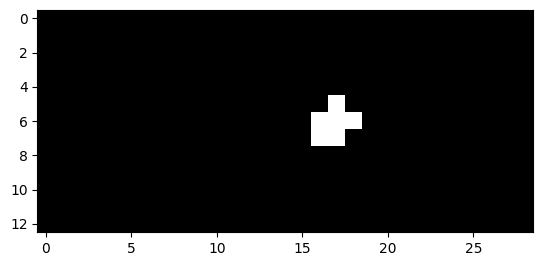

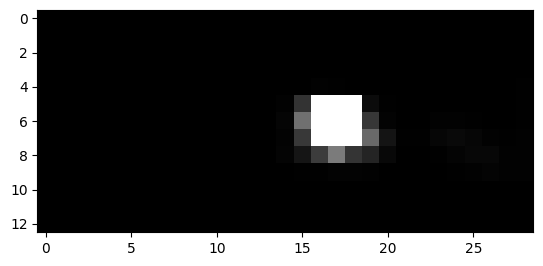

1086


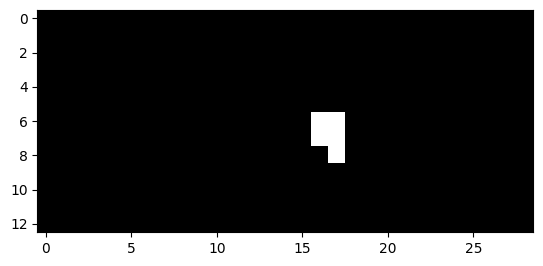

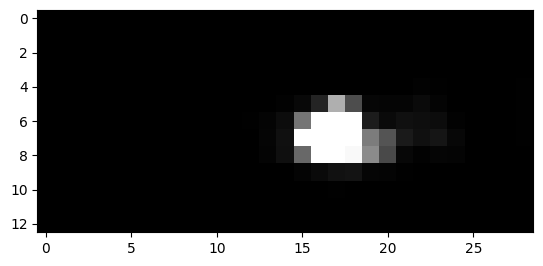

1087


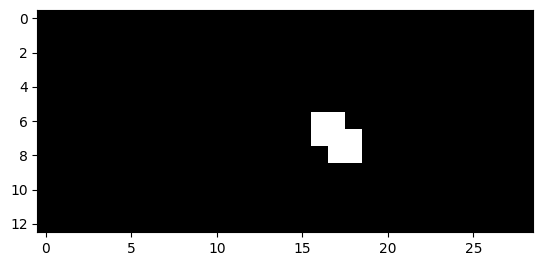

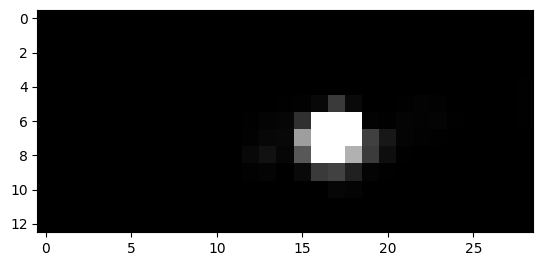

1088


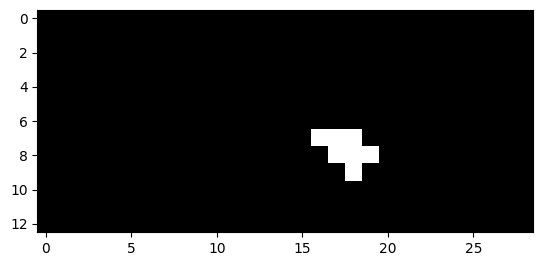

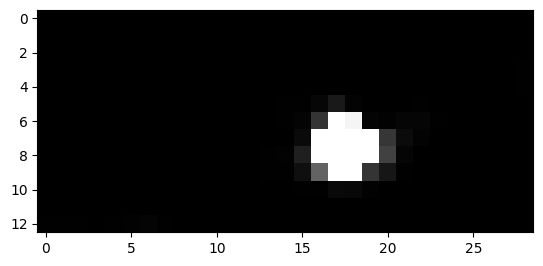

1089


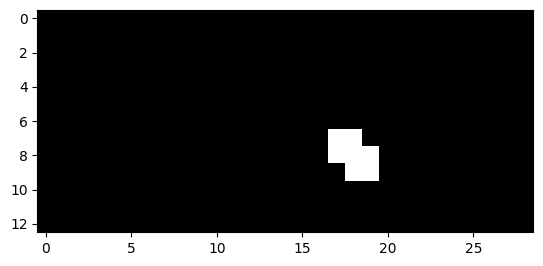

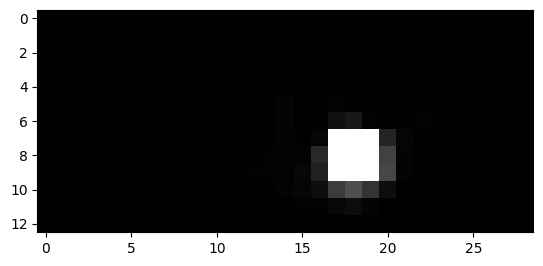

1090


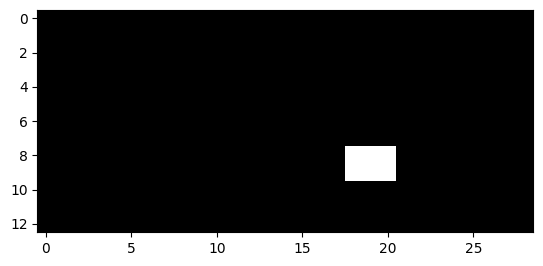

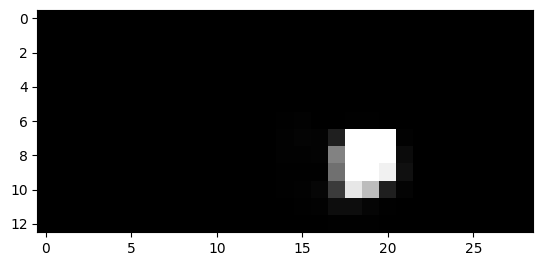

1091


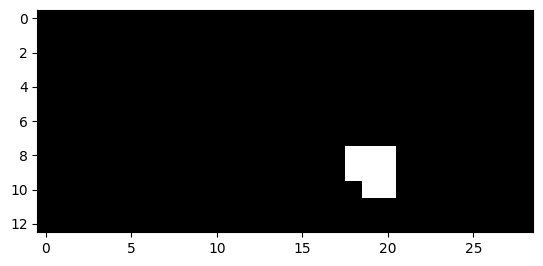

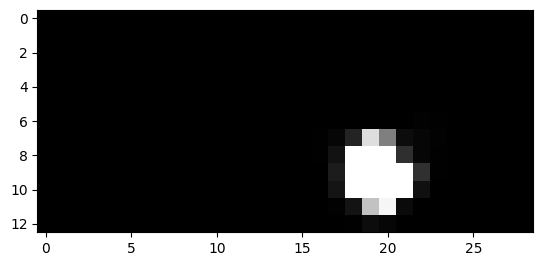

1092


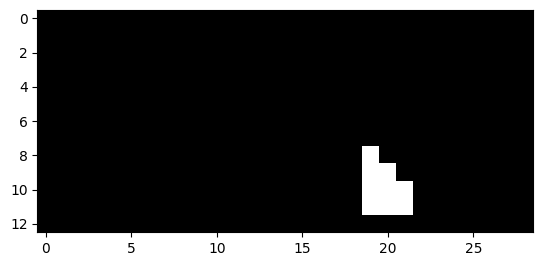

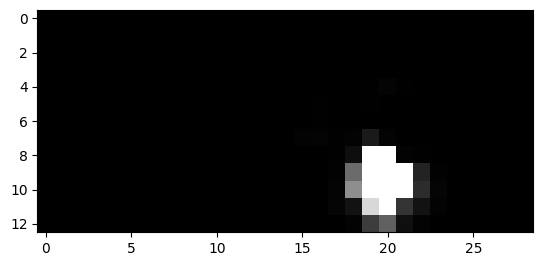

1093


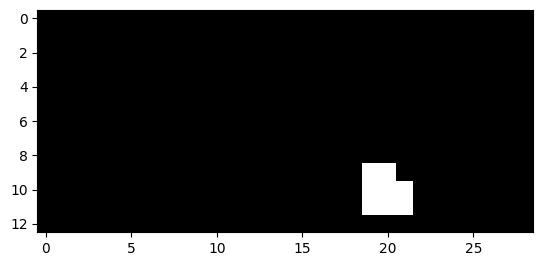

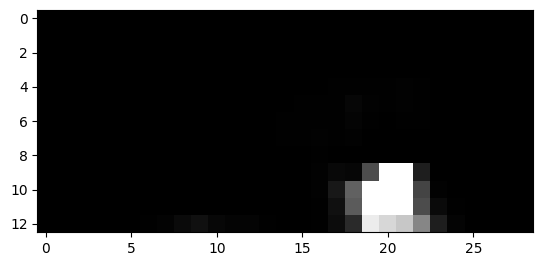

1094


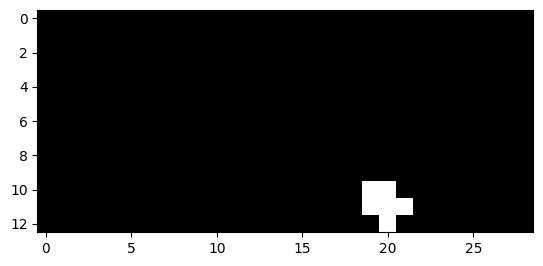

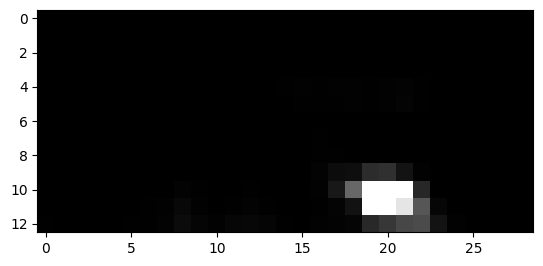

1095


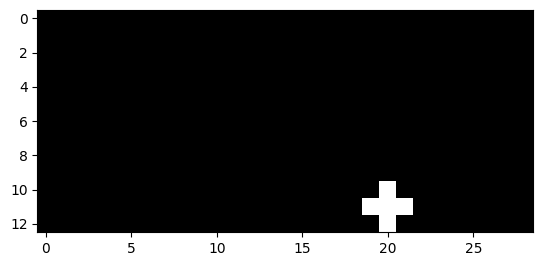

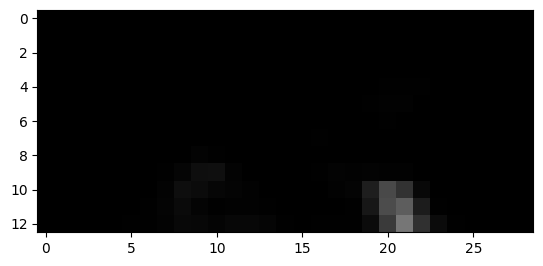

1116


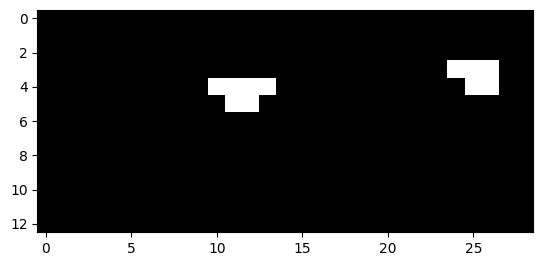

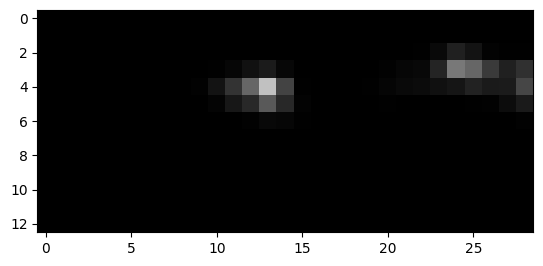

1117


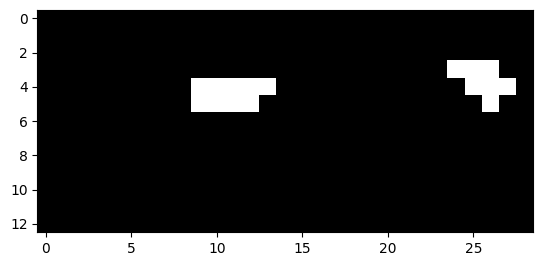

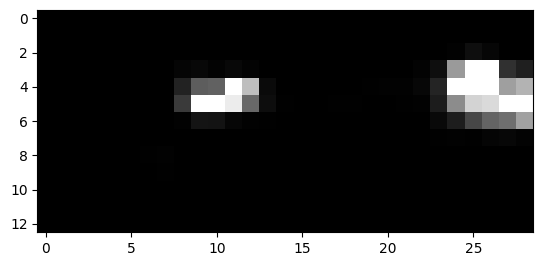

1118


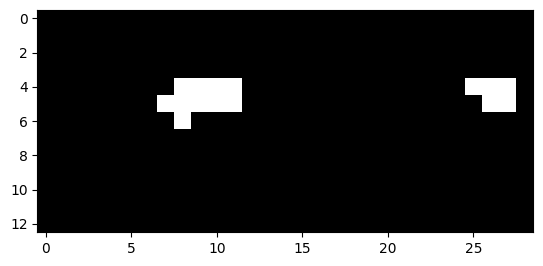

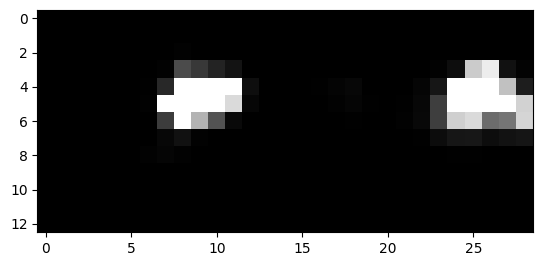

1119


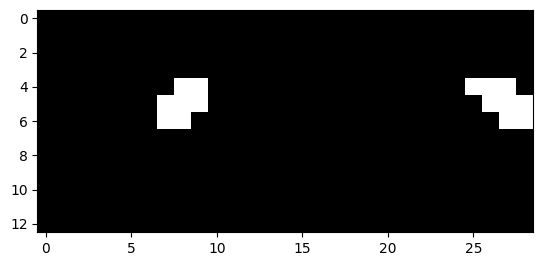

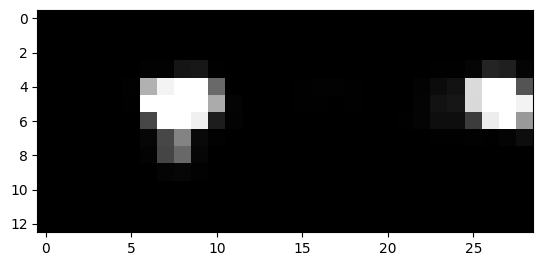

1120


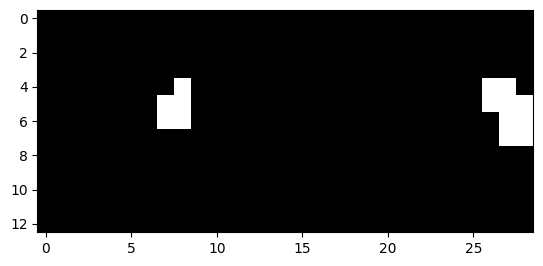

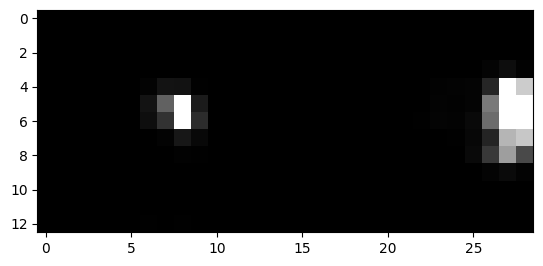

1121


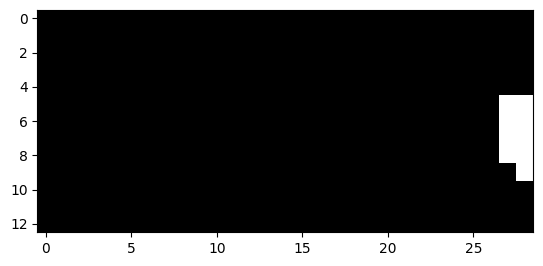

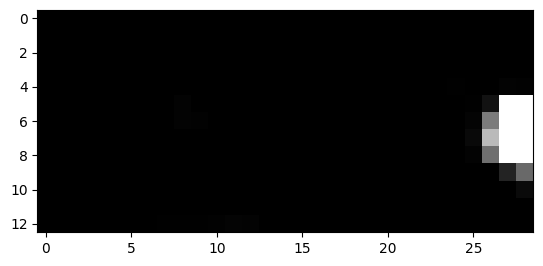

1122


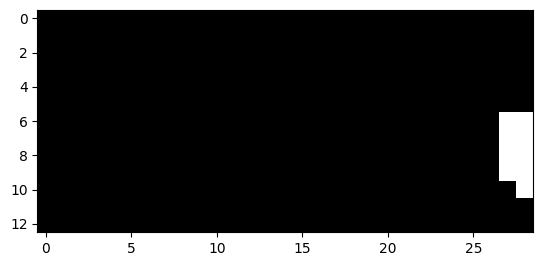

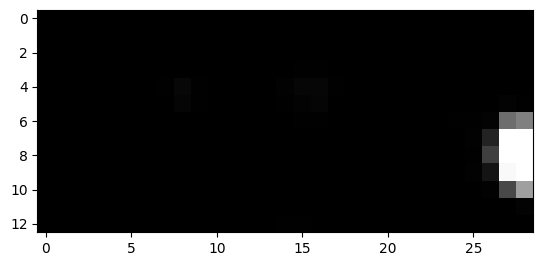

1123


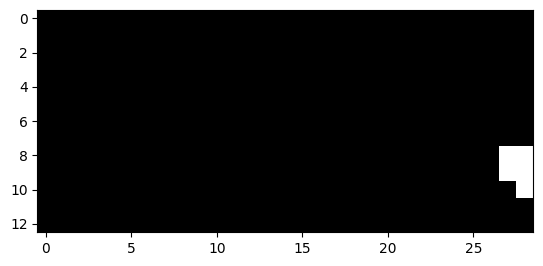

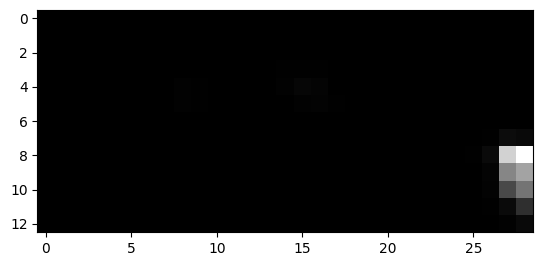

1341


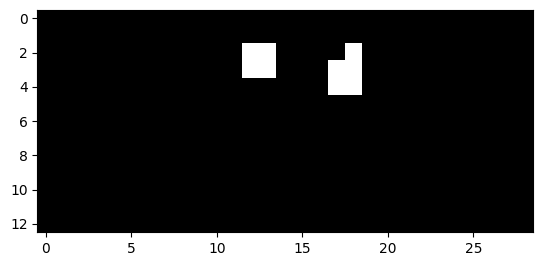

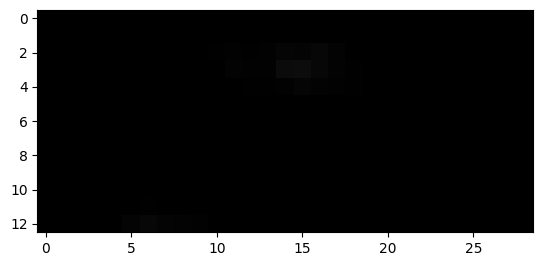

1342


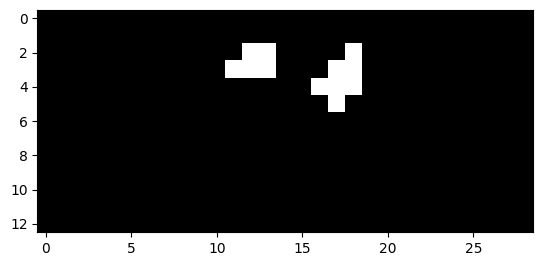

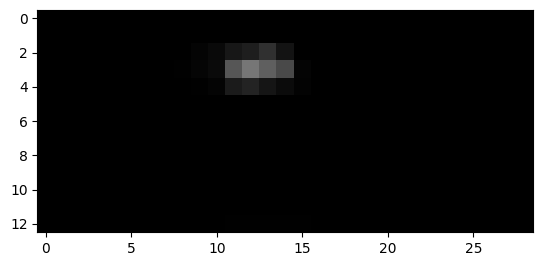

1343


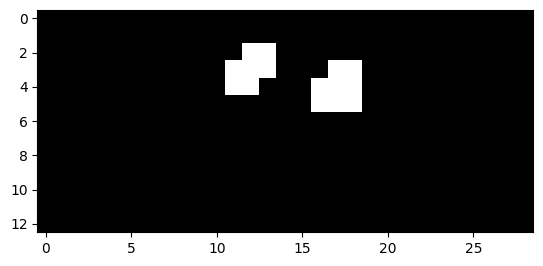

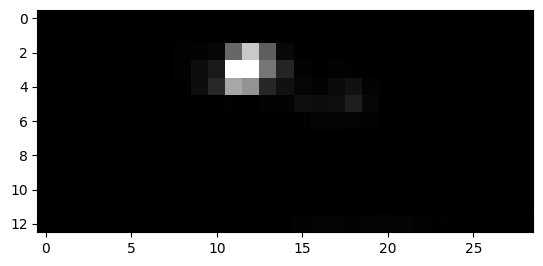

1344


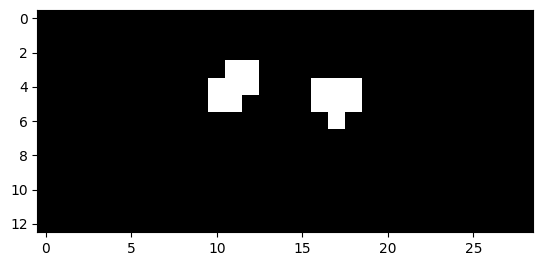

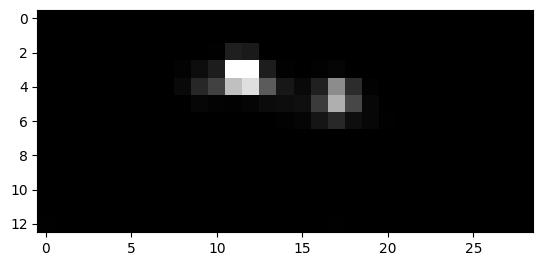

1345


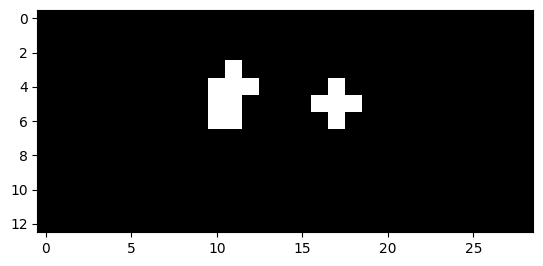

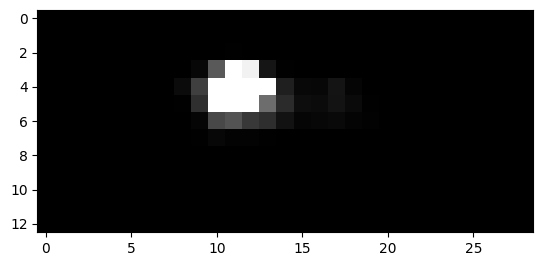

1346


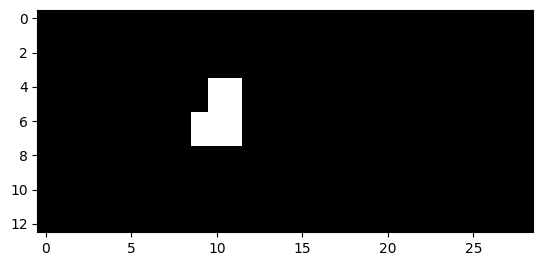

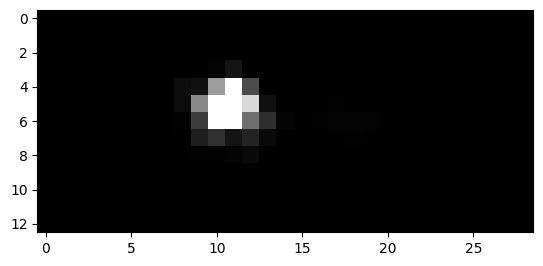

1347


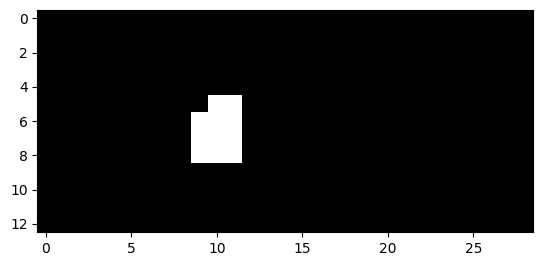

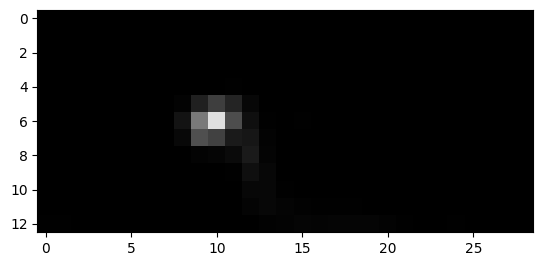

1348


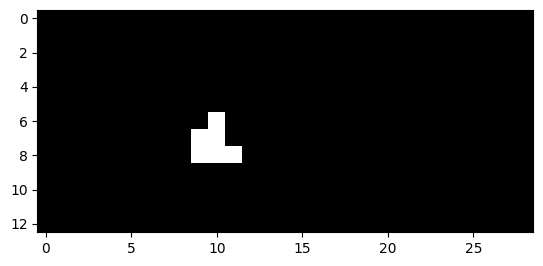

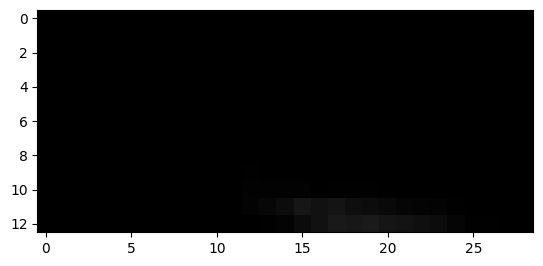

1366


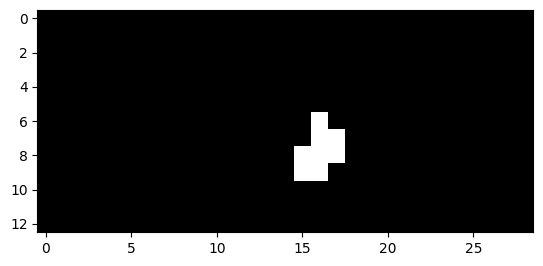

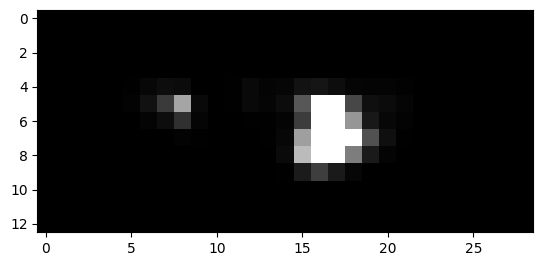

1367


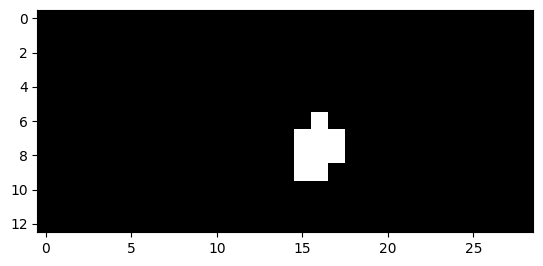

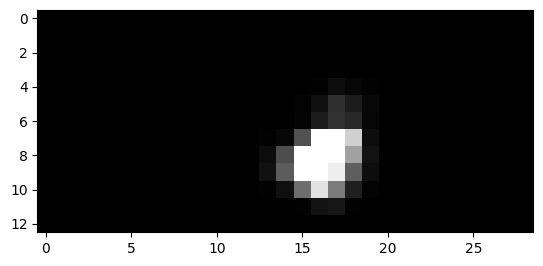

1368


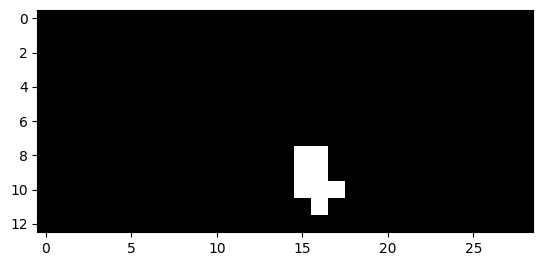

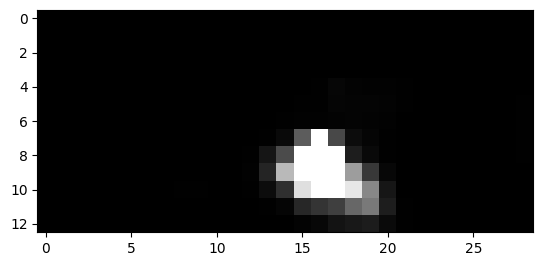

1369


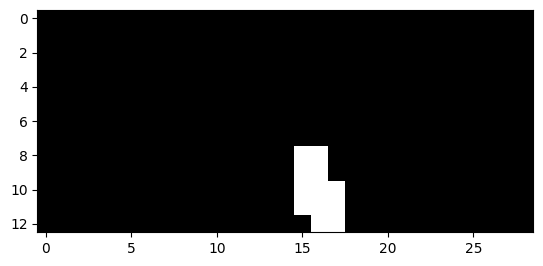

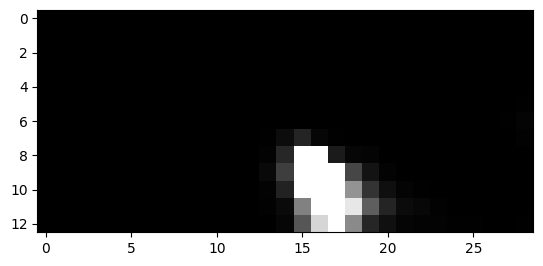

1370


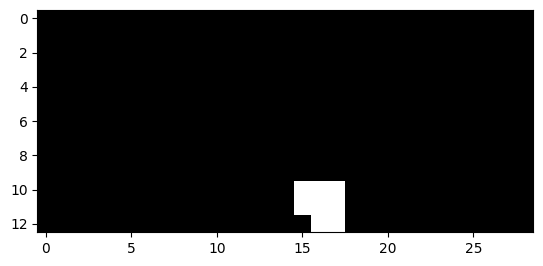

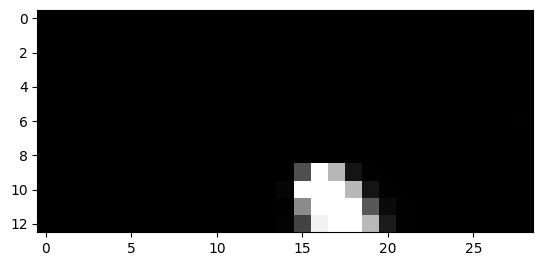

1371


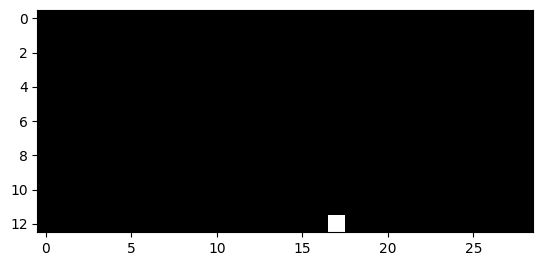

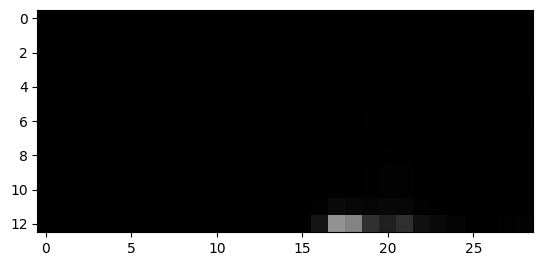

1389


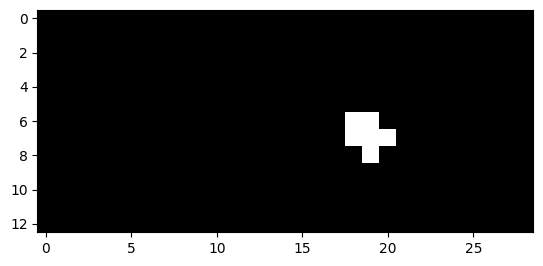

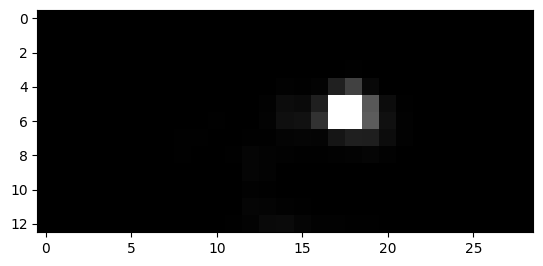

1390


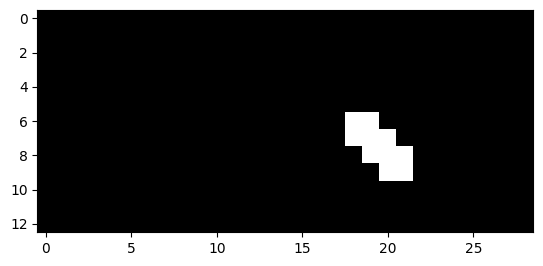

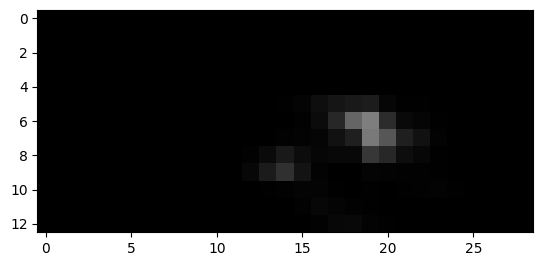

1391


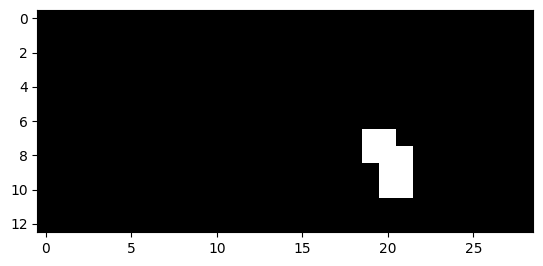

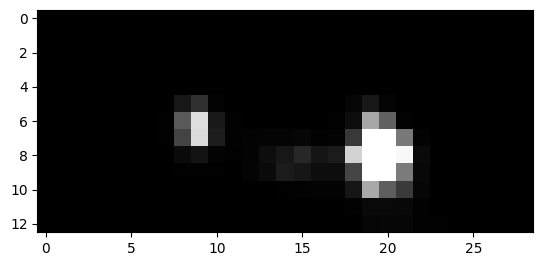

1392


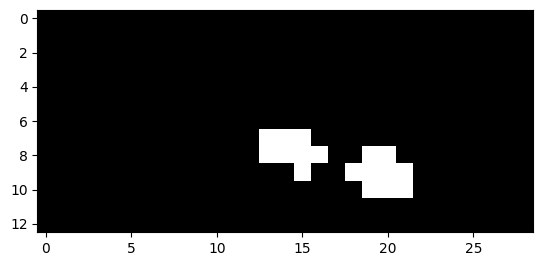

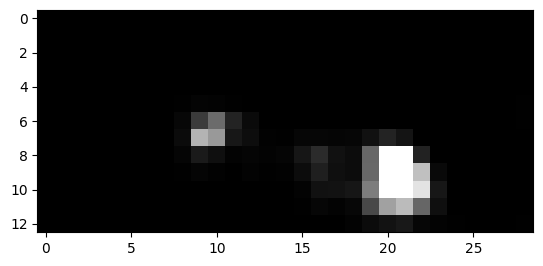

1393


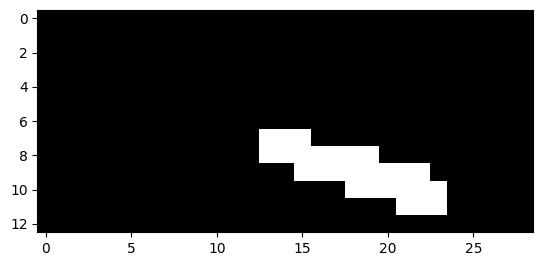

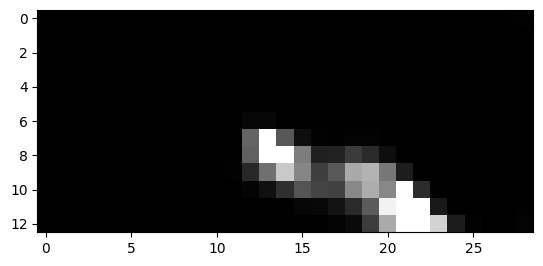

1394


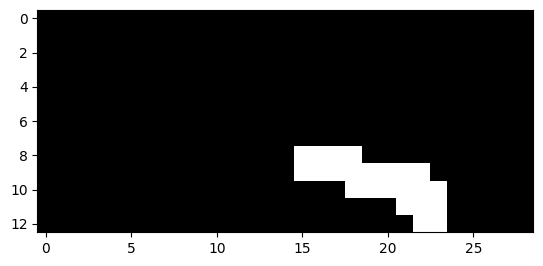

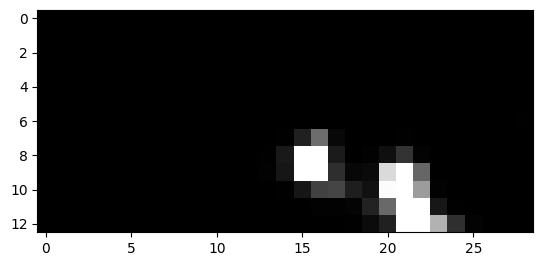

1395


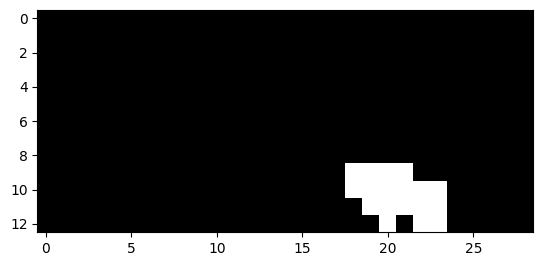

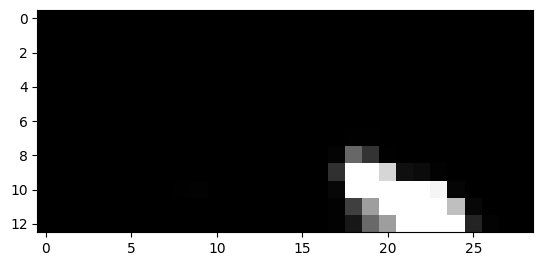

1396


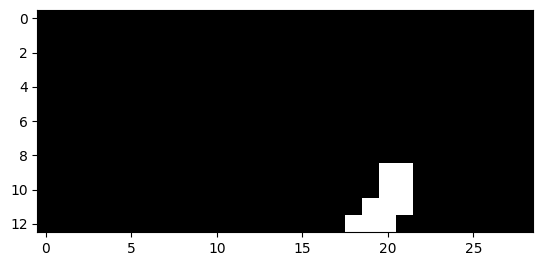

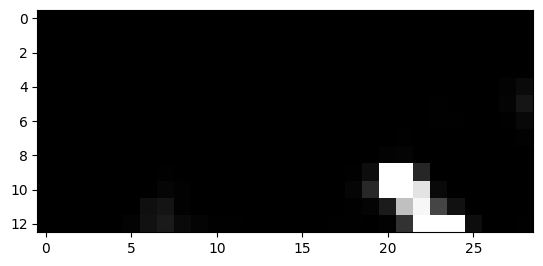

1397


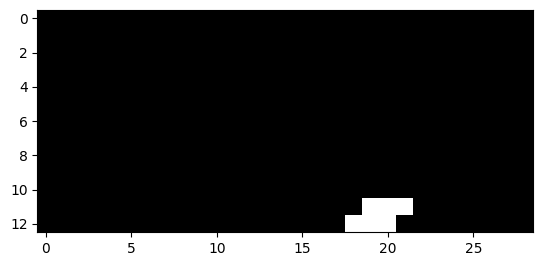

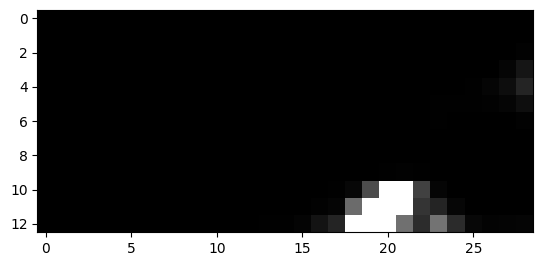

1398


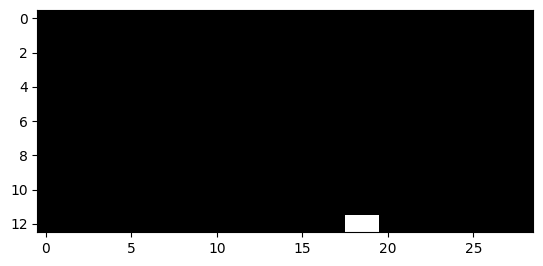

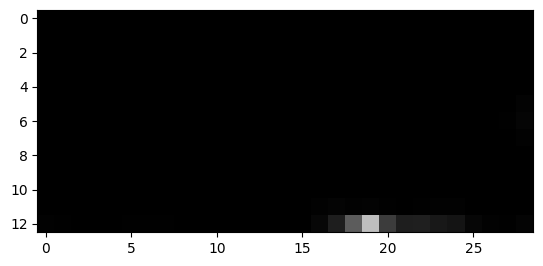

1403


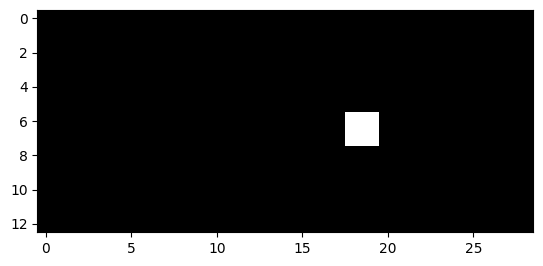

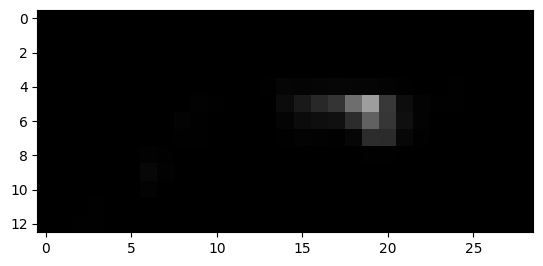

1404


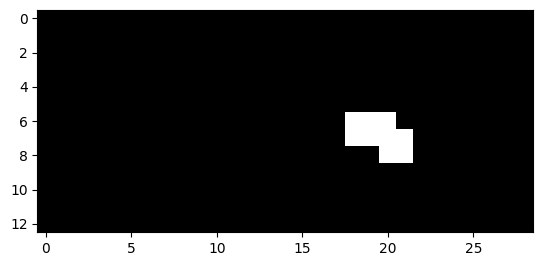

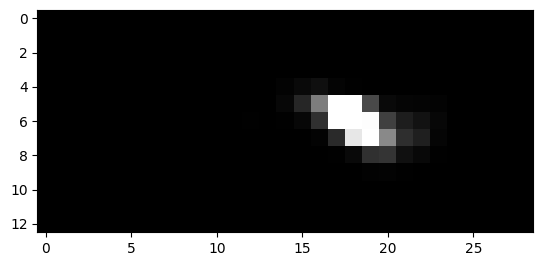

1405


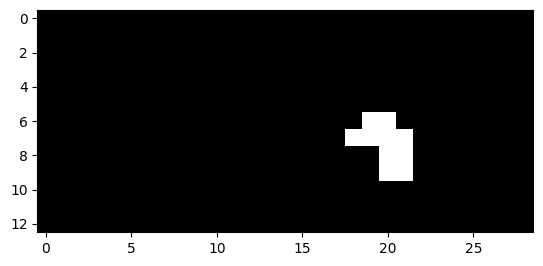

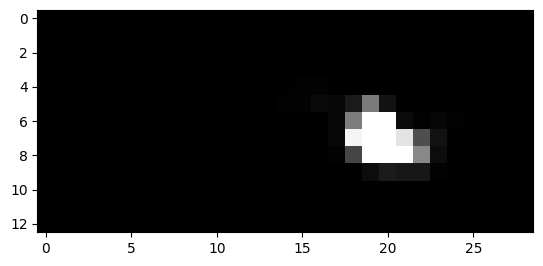

1406


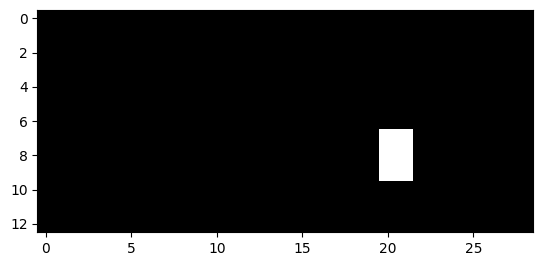

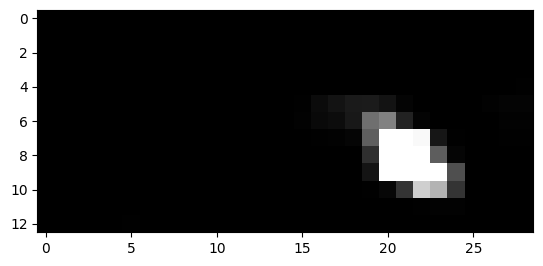

1407


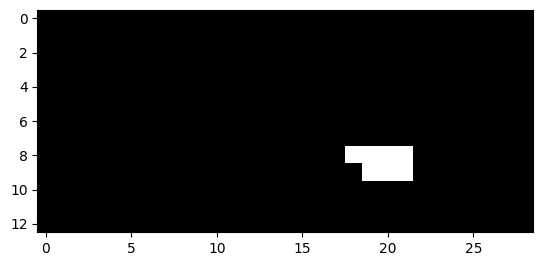

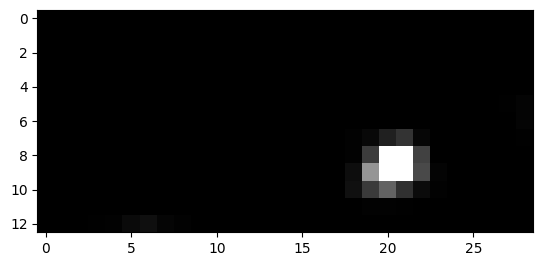

1408


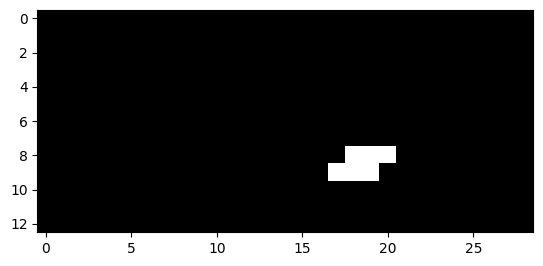

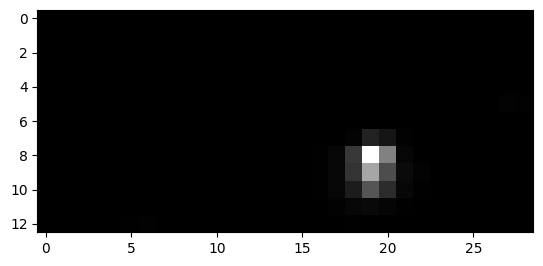

1409


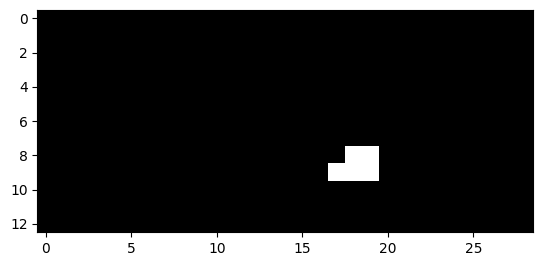

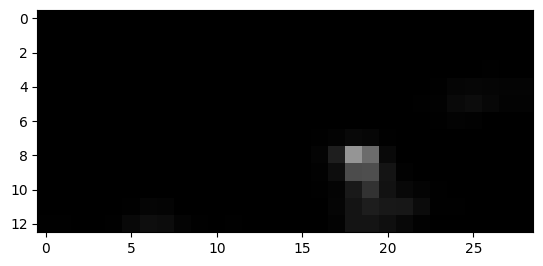

1412


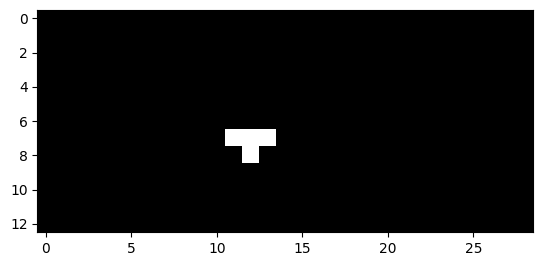

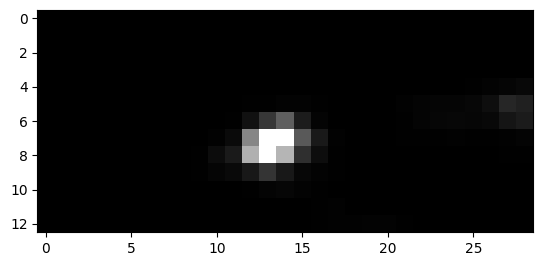

1413


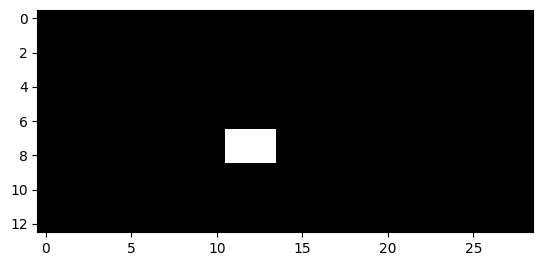

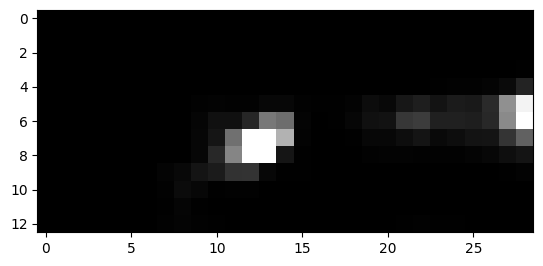

1414


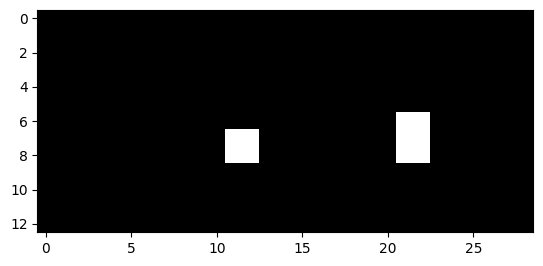

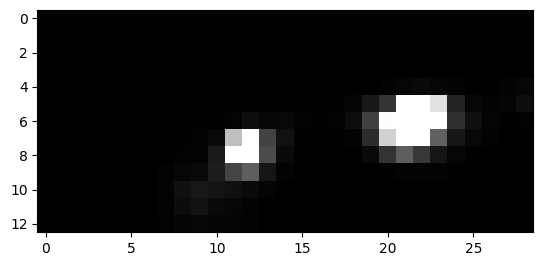

1415


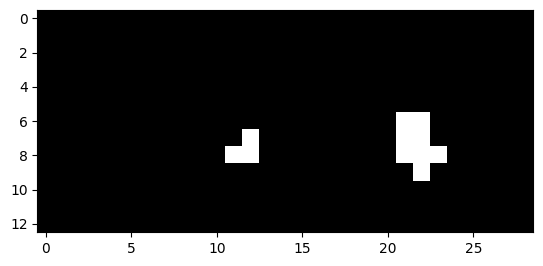

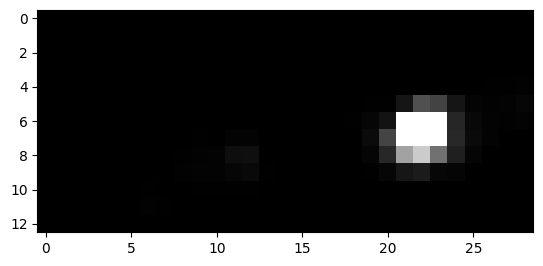

1416


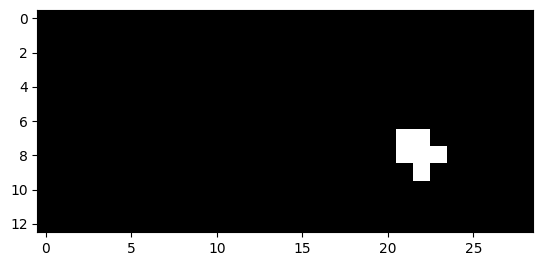

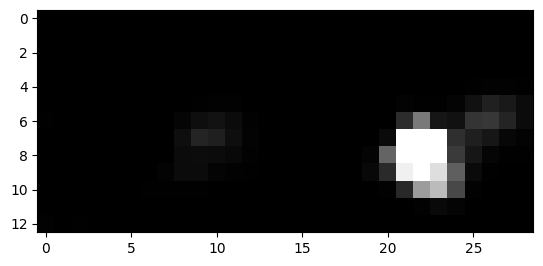

1417


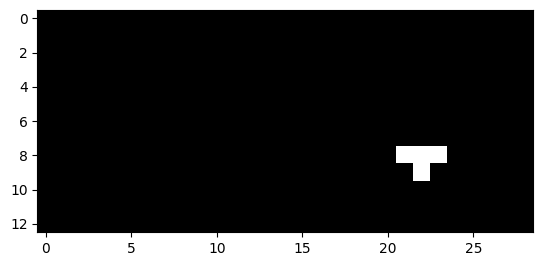

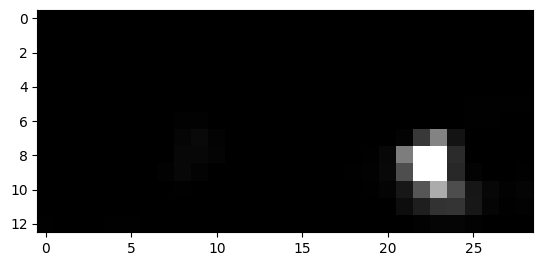

1419


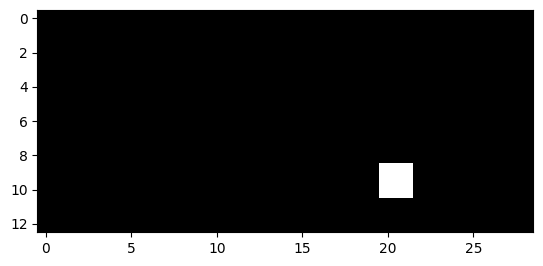

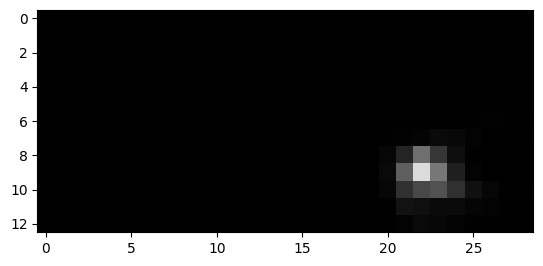

1420


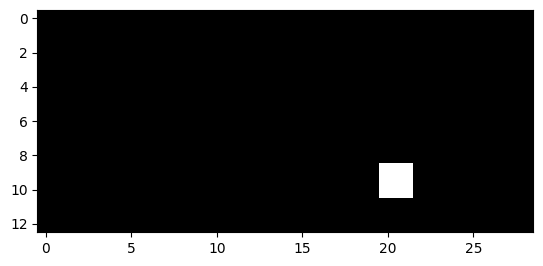

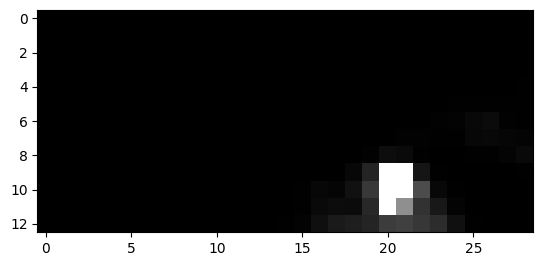

1441


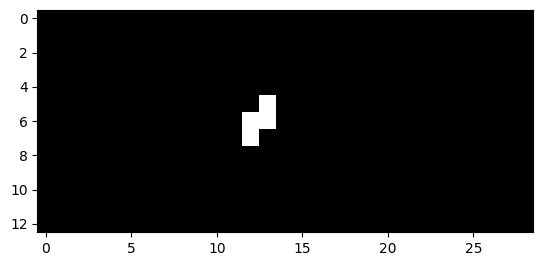

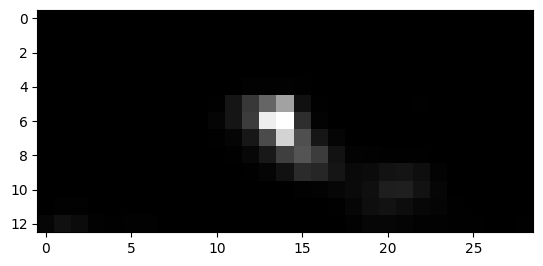

1442


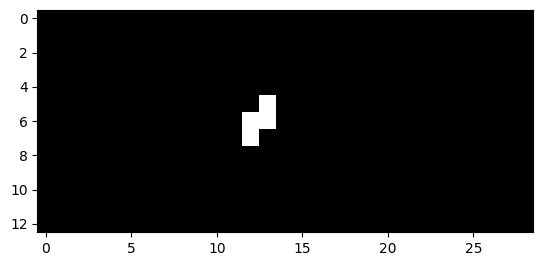

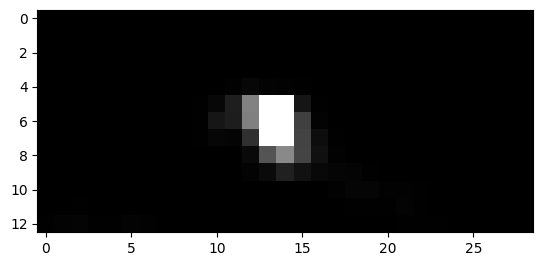

1443


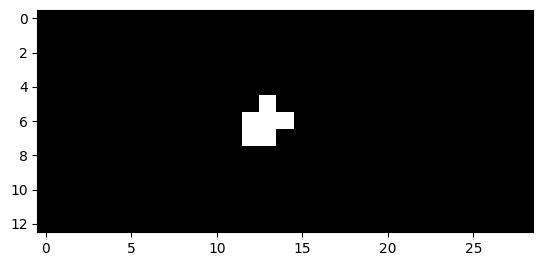

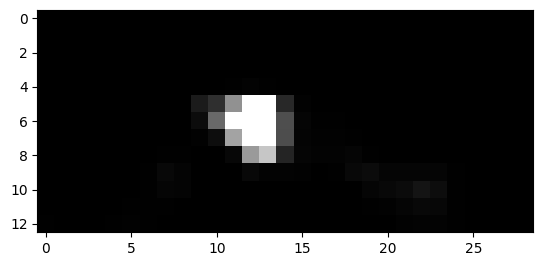

1444


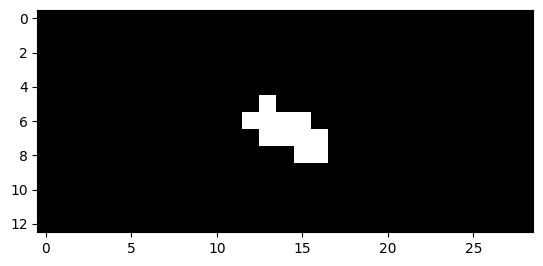

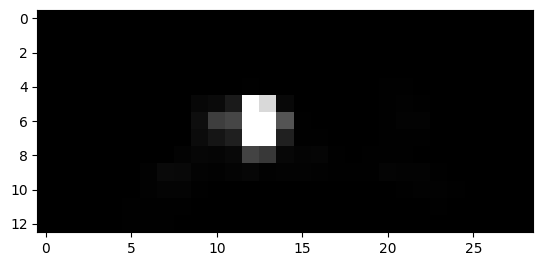

1445


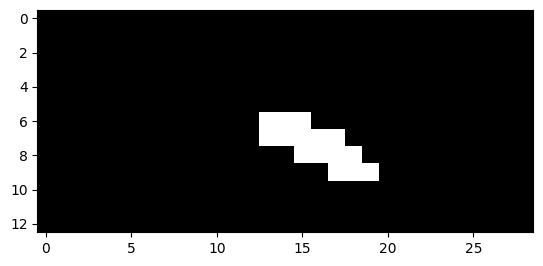

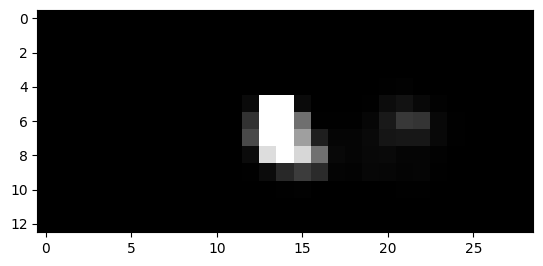

1446


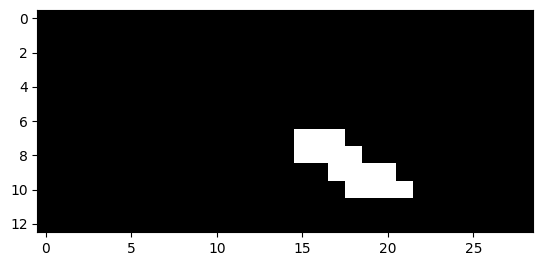

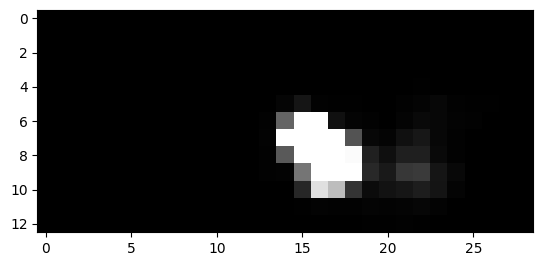

1447


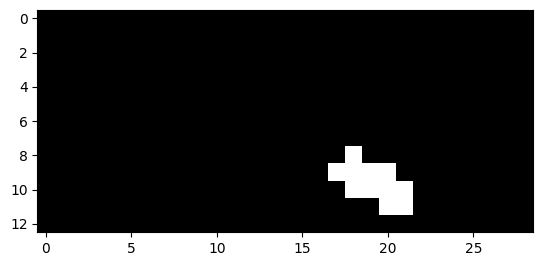

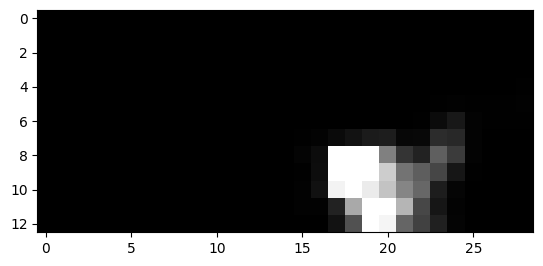

1448


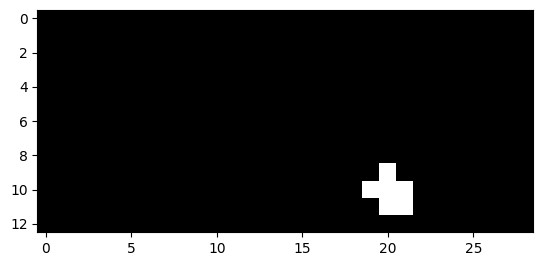

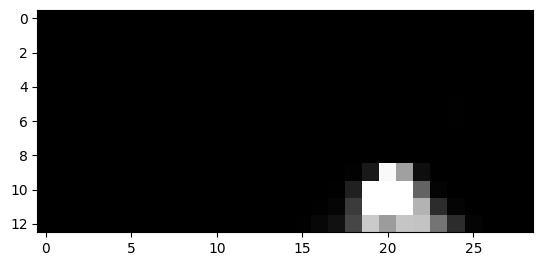

1460


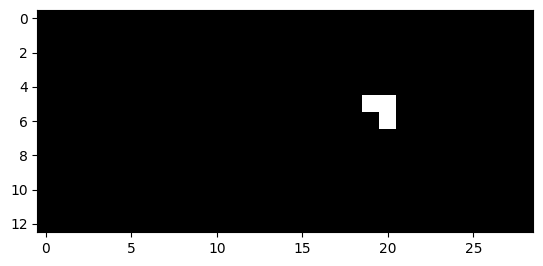

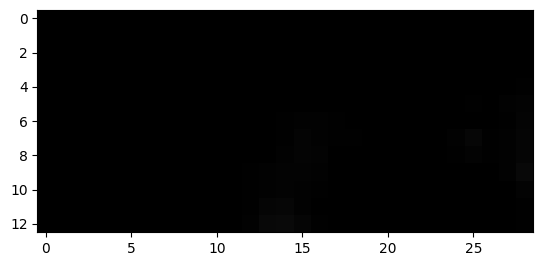

1461


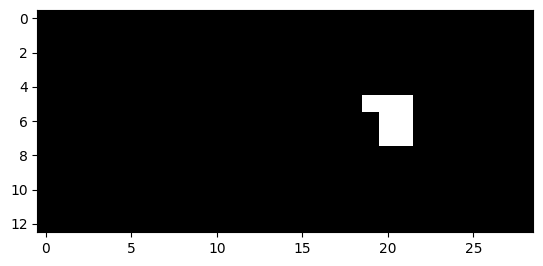

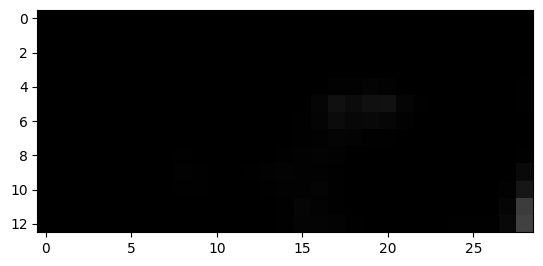

1462


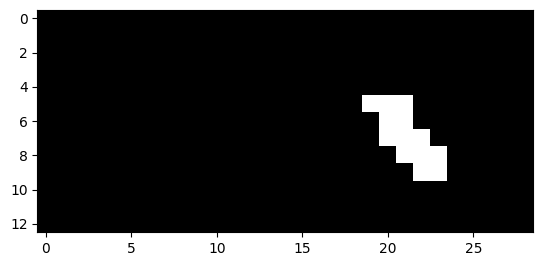

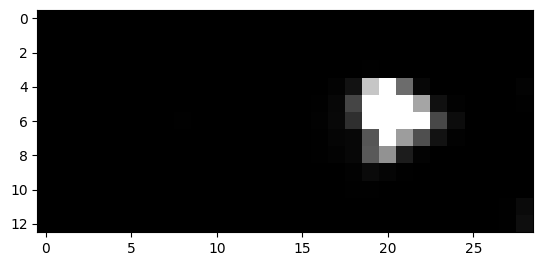

1463


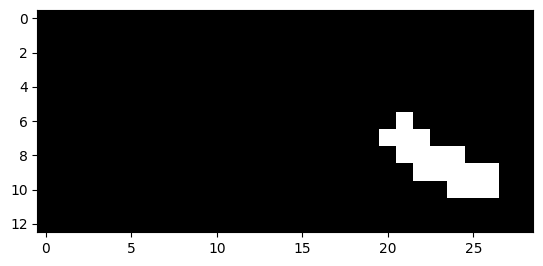

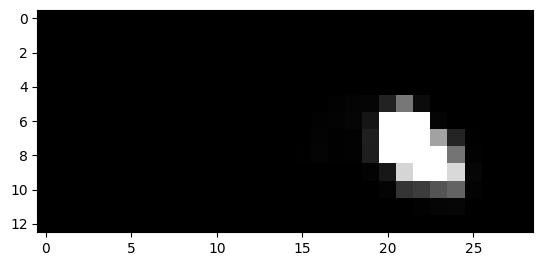

1464


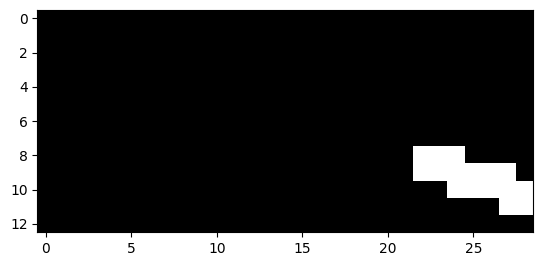

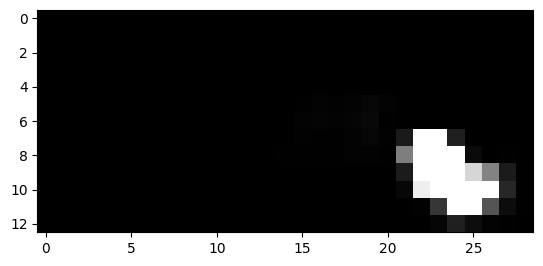

1465


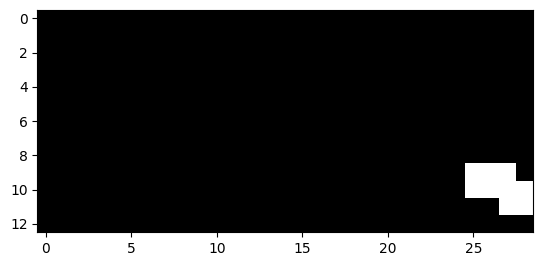

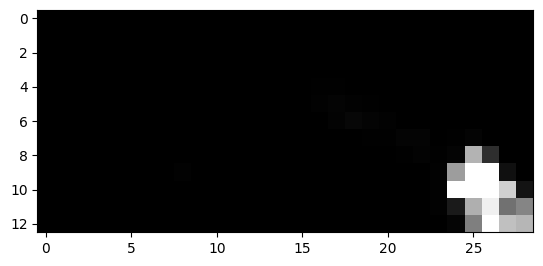

1466


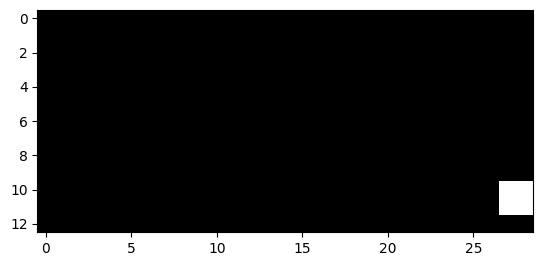

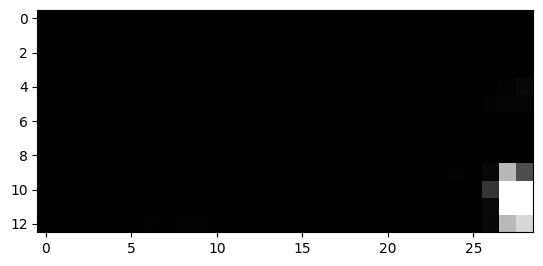

1473


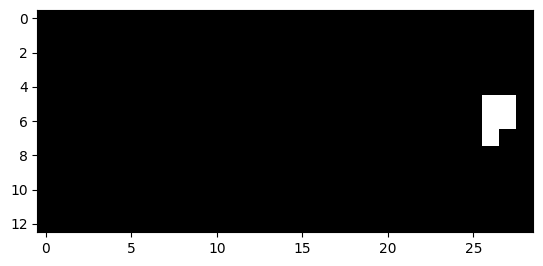

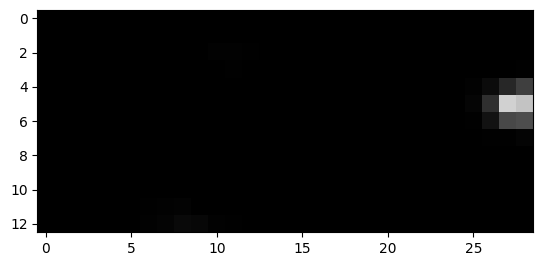

1474


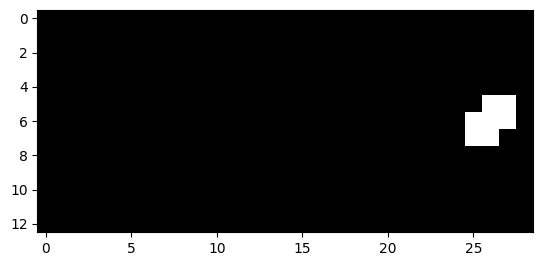

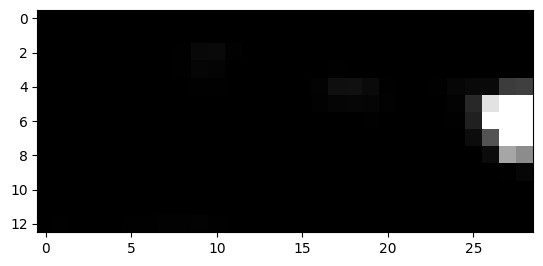

1475


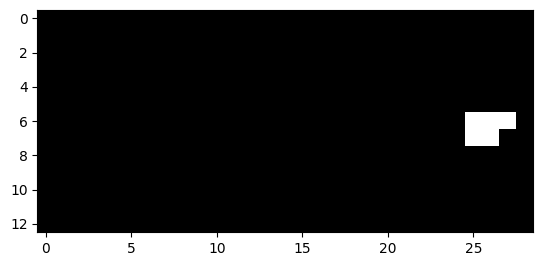

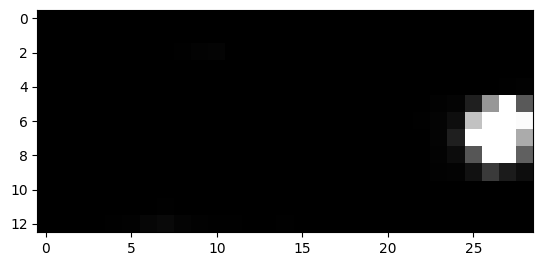

1509


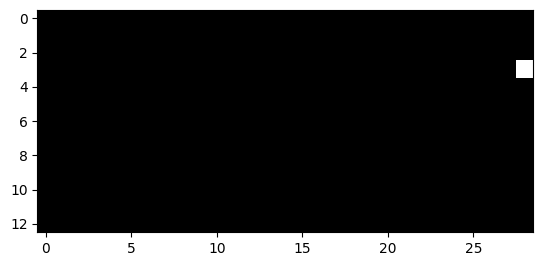

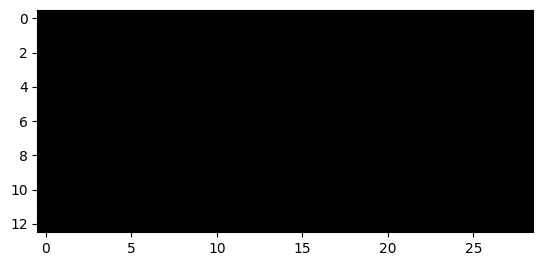

1510


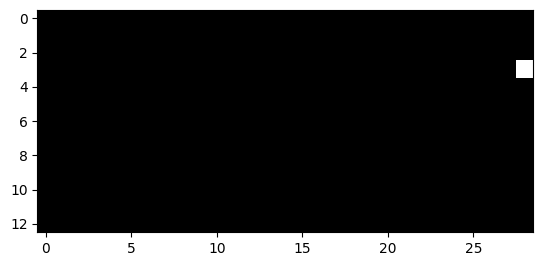

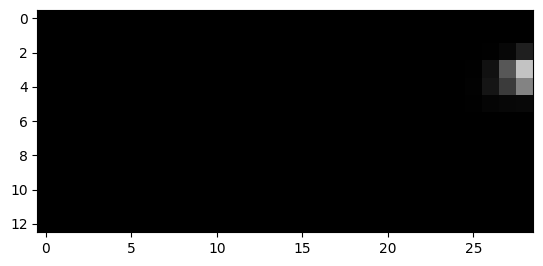

1511


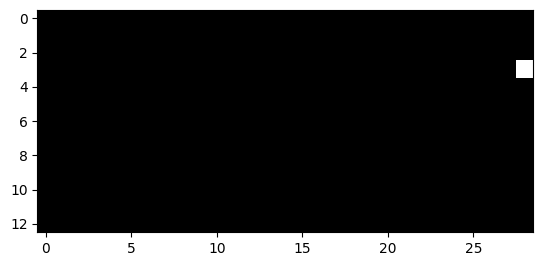

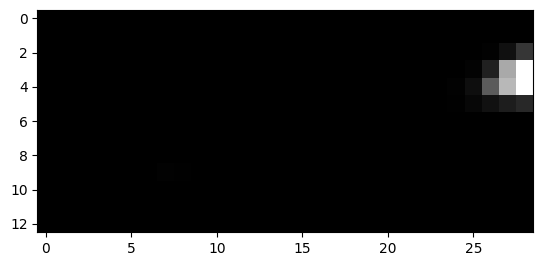

1687


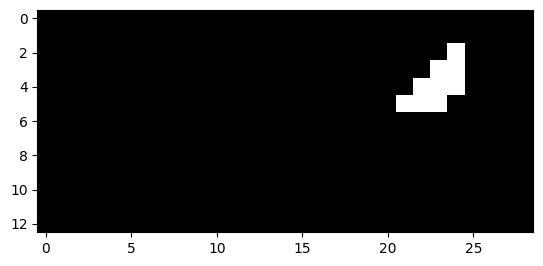

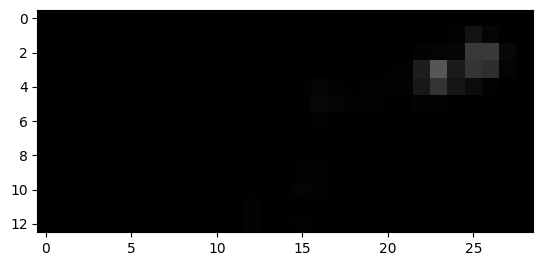

1688


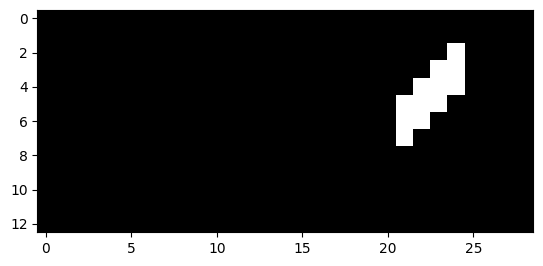

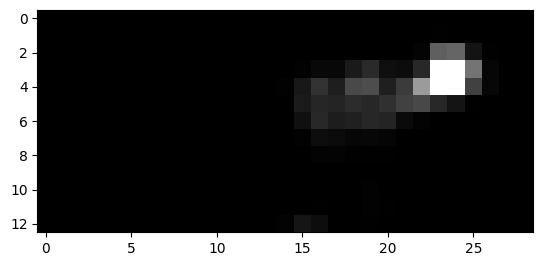

1689


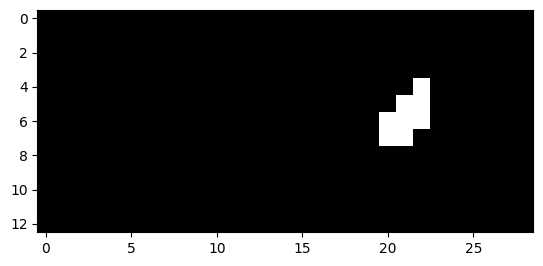

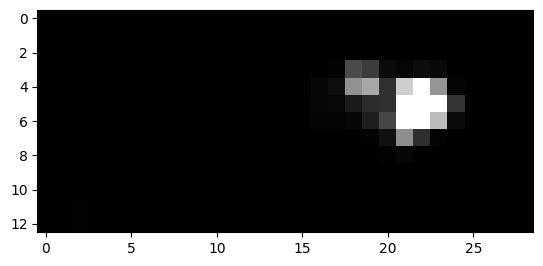

1690


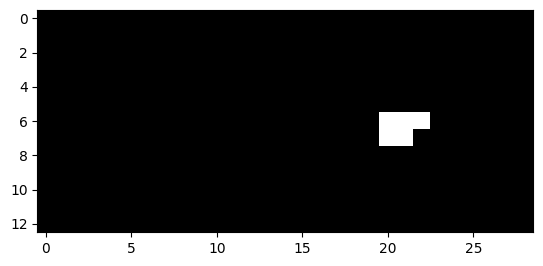

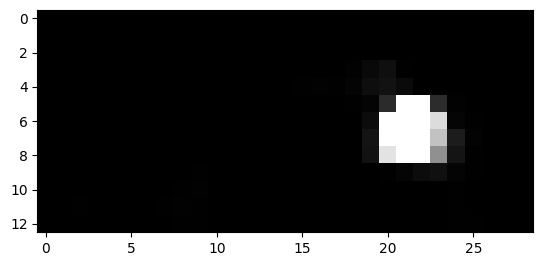

1691


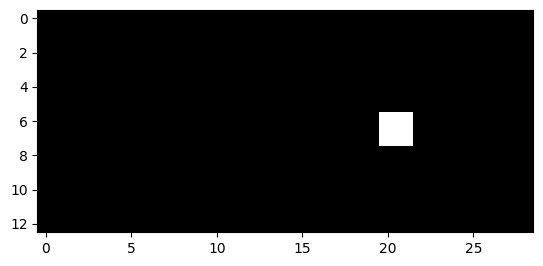

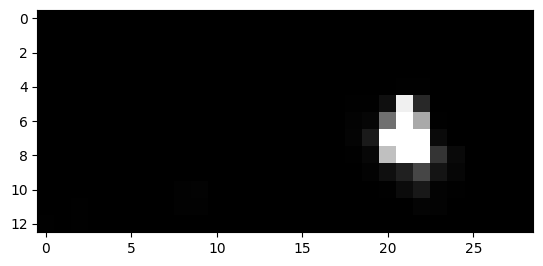

1710


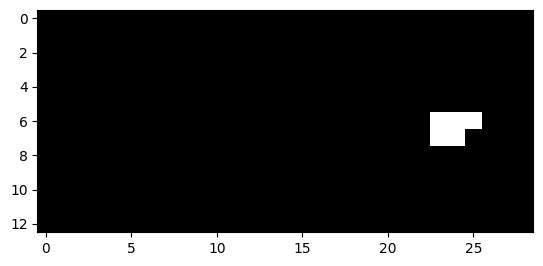

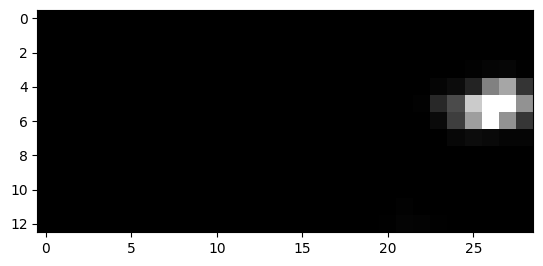

1711


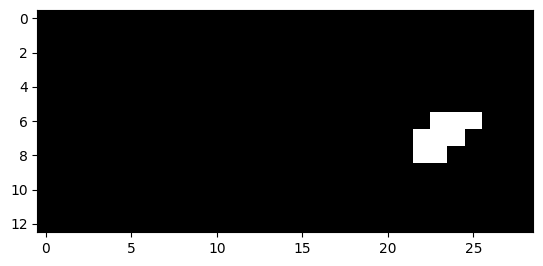

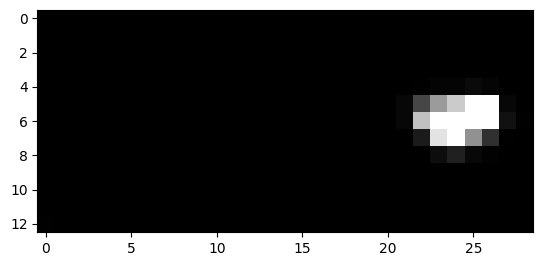

1712


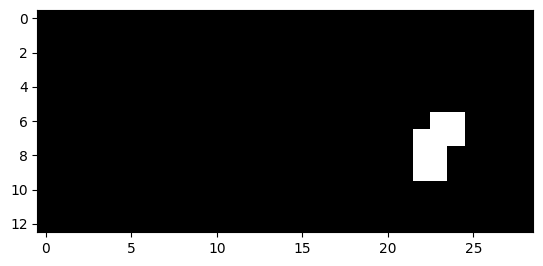

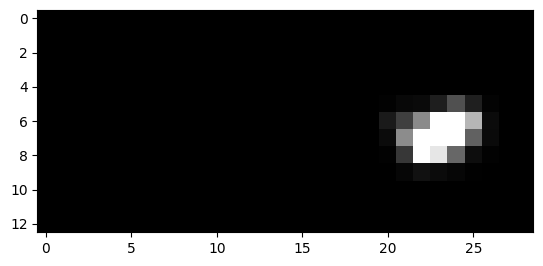

1713


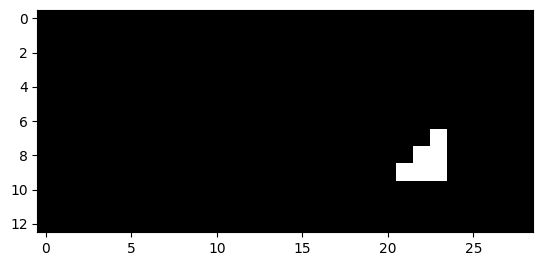

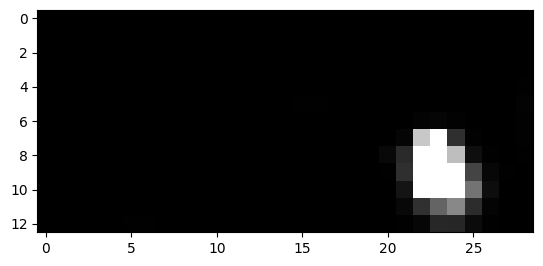

1714


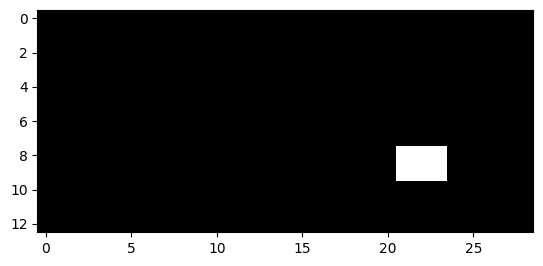

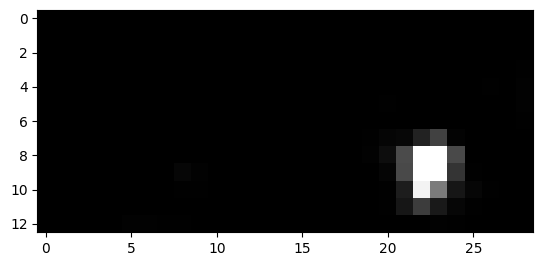

1715


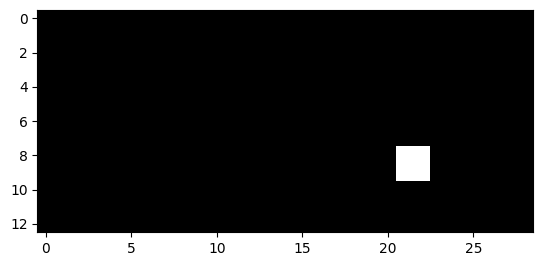

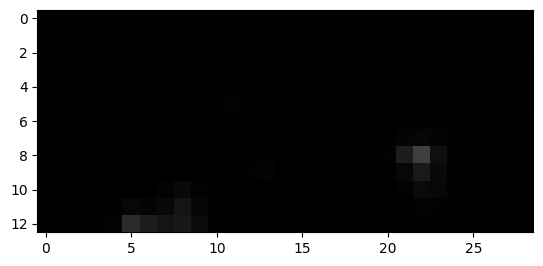

1728


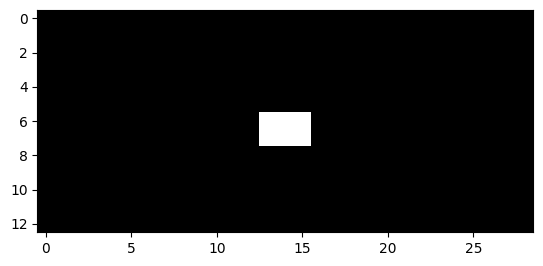

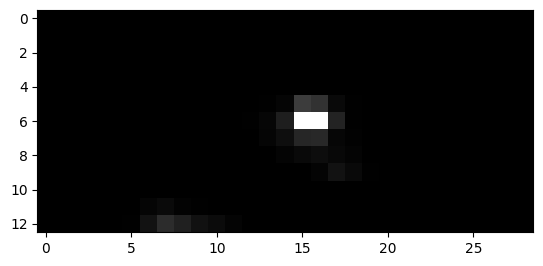

1729


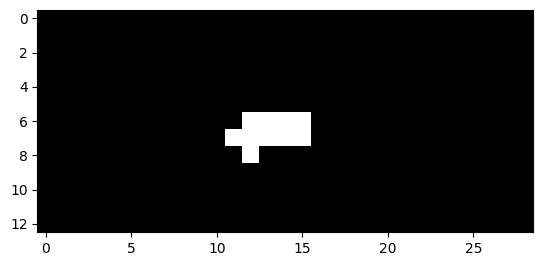

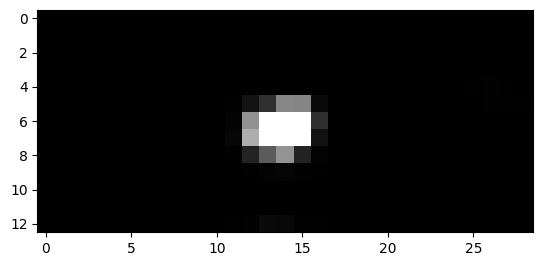

1730


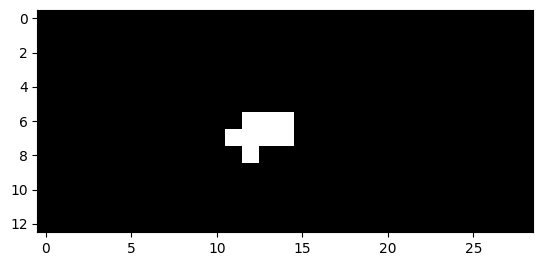

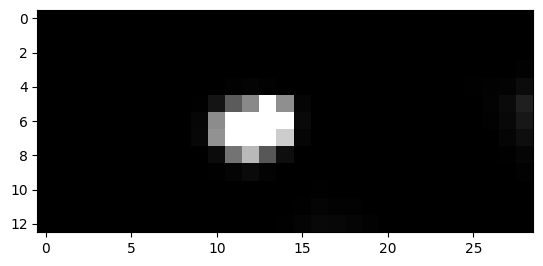

1731


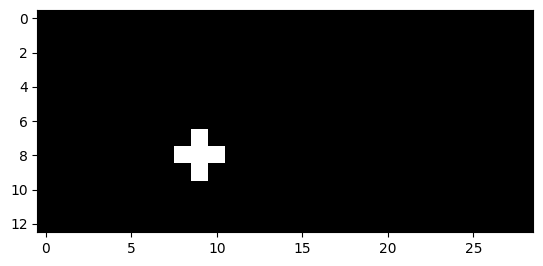

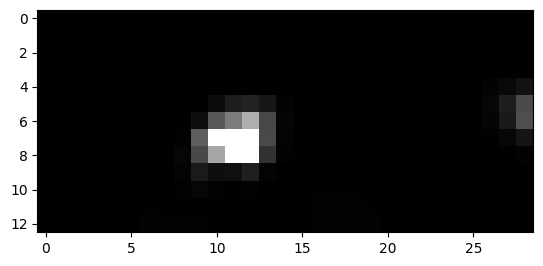

1732


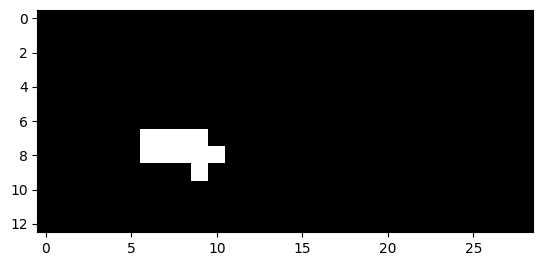

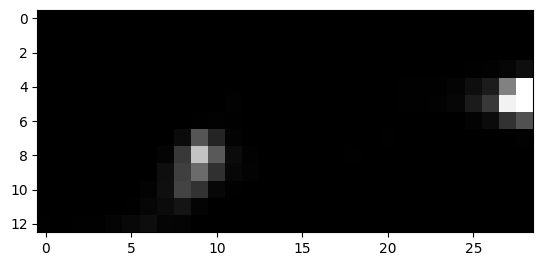

1733


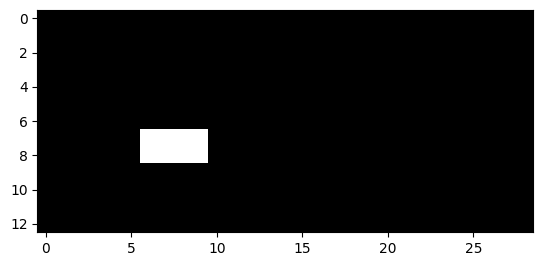

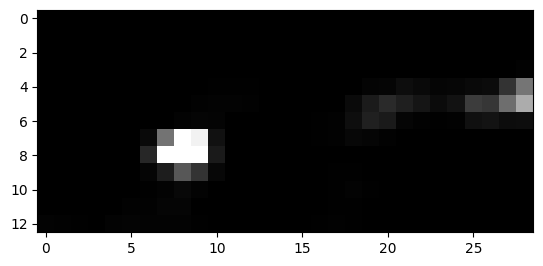

1735


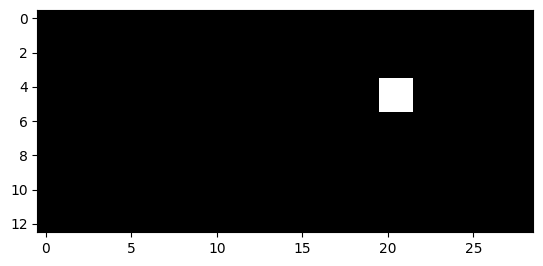

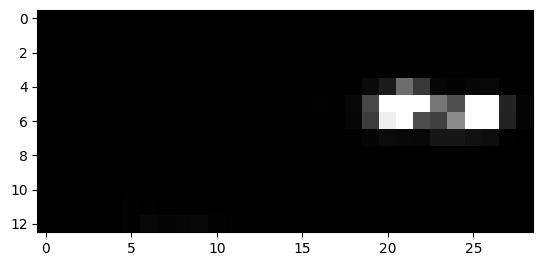

1736


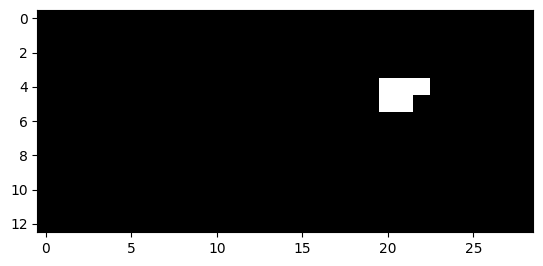

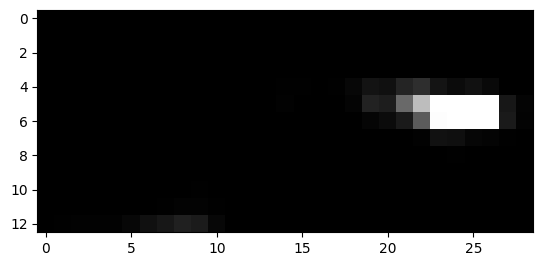

1737


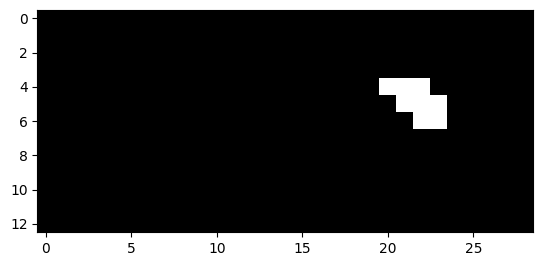

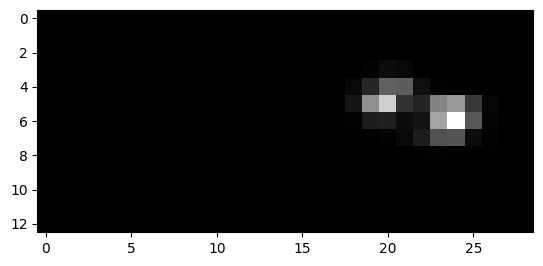

1738


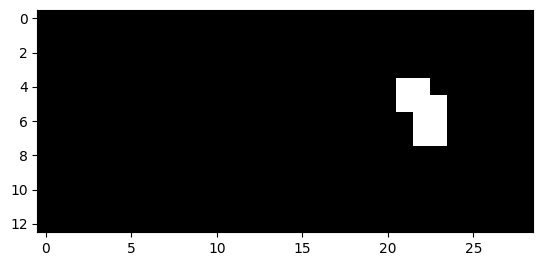

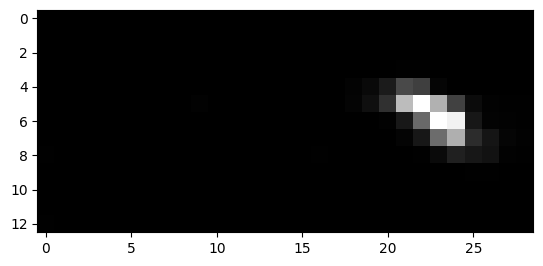

1739


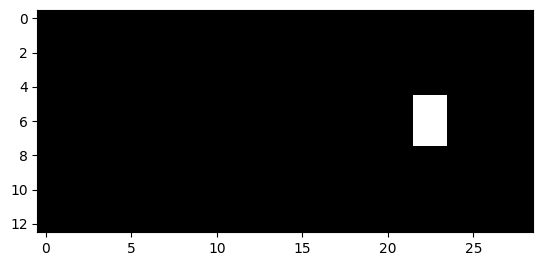

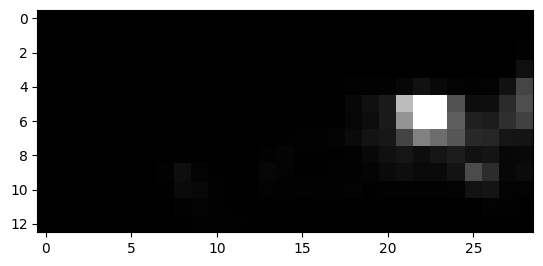

1740


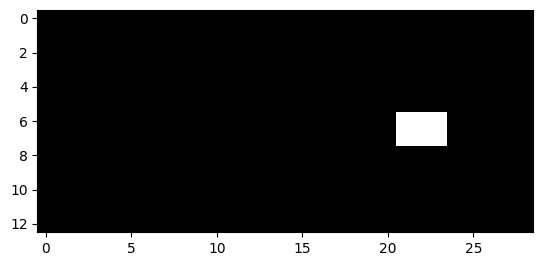

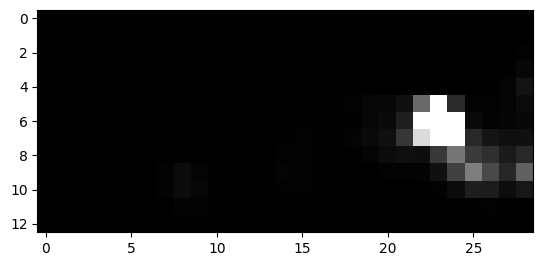

1741


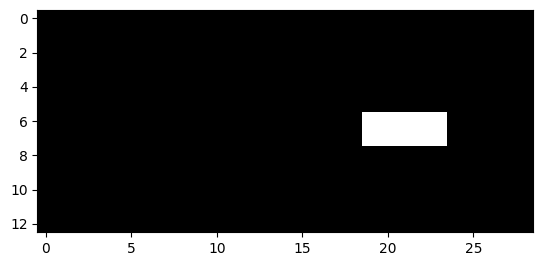

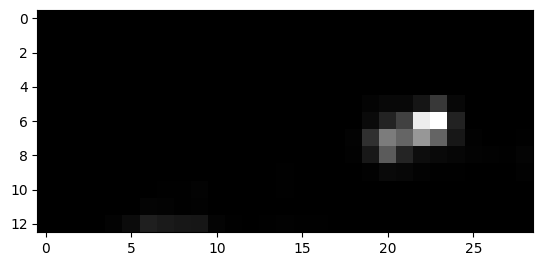

1742


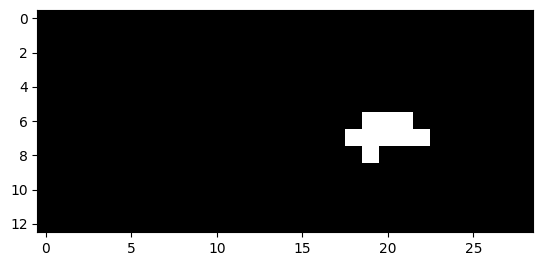

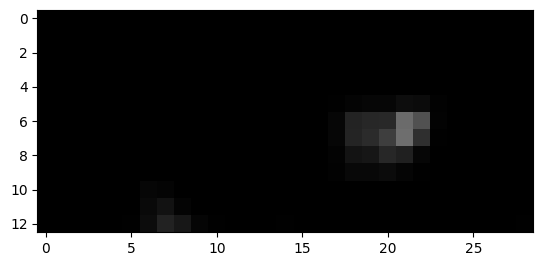

1743


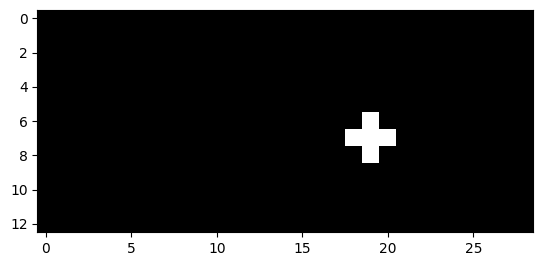

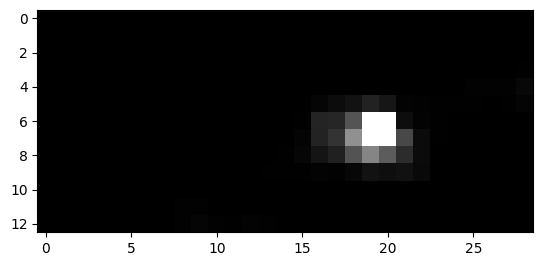

1750


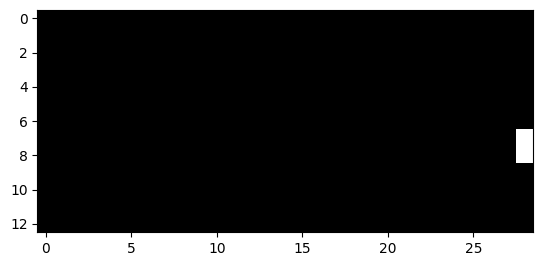

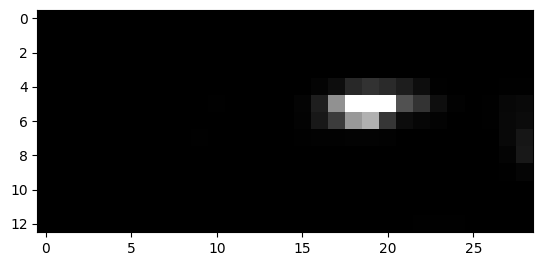

1751


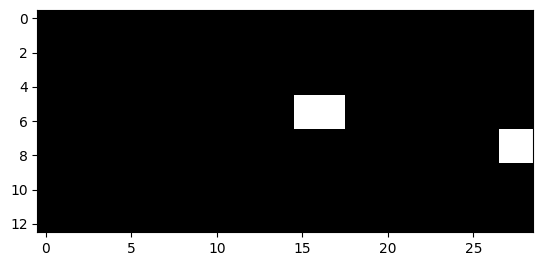

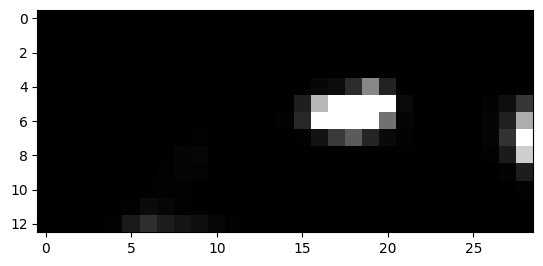

1752


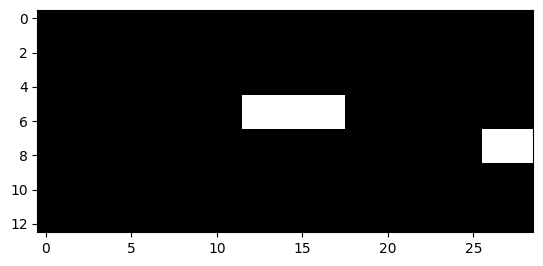

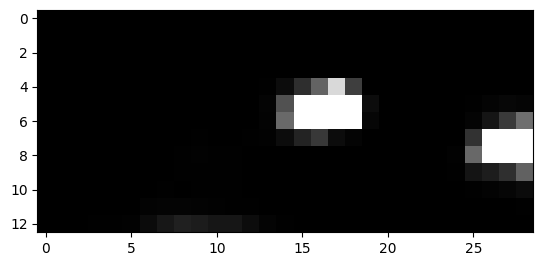

1753


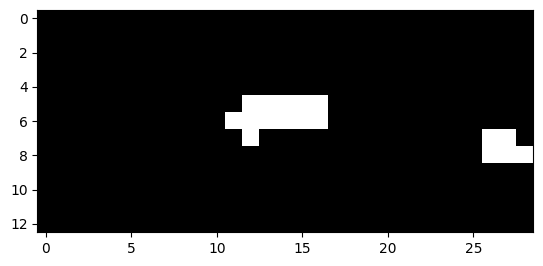

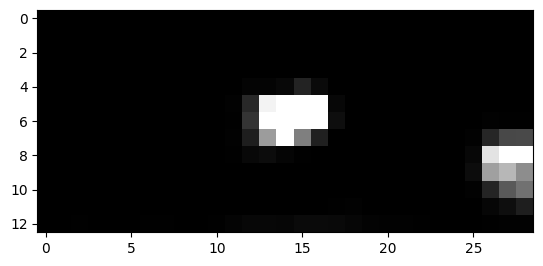

1754


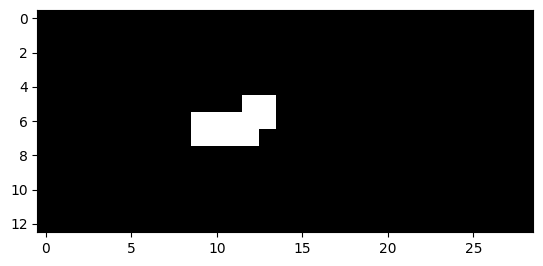

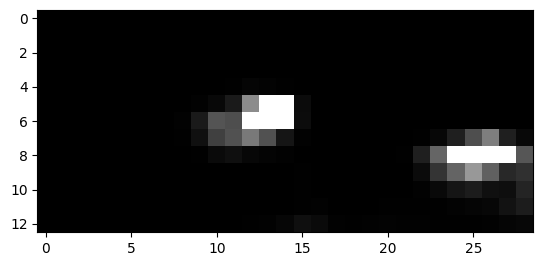

1755


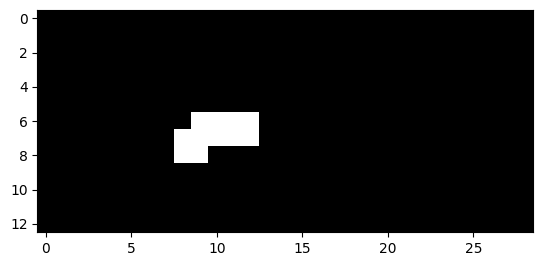

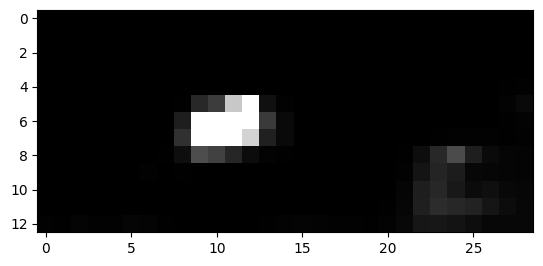

1756


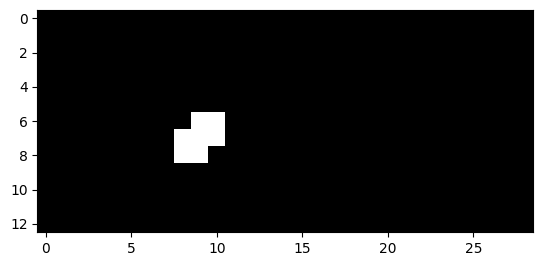

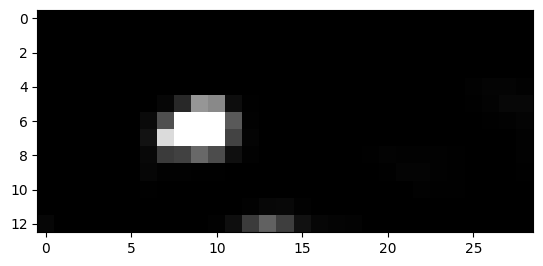

1760


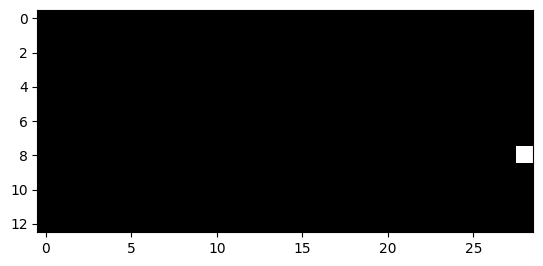

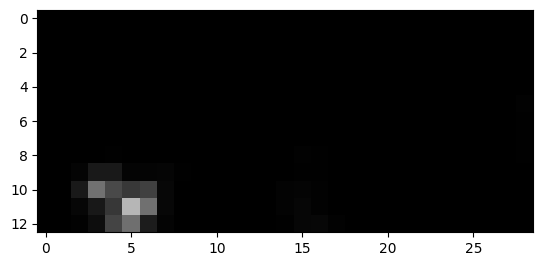

1761


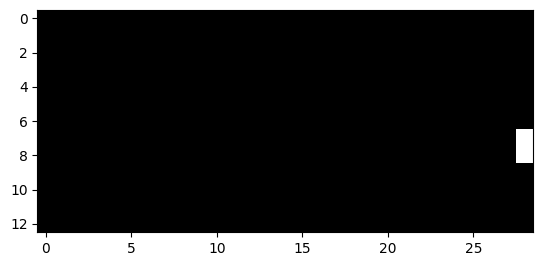

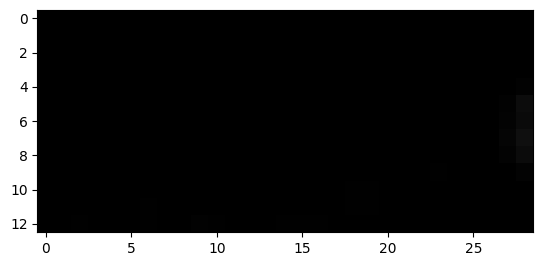

1762


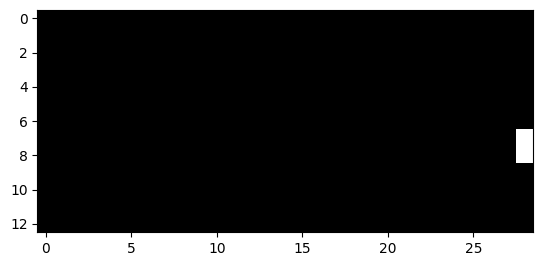

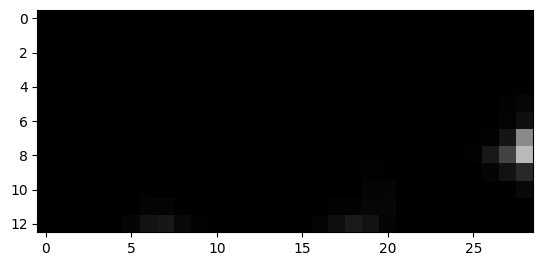

1770


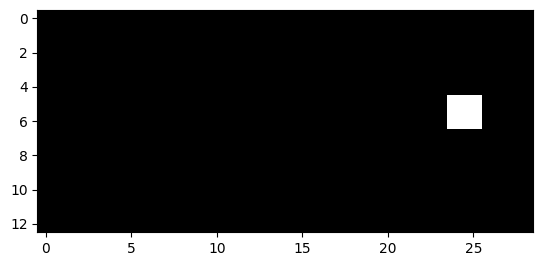

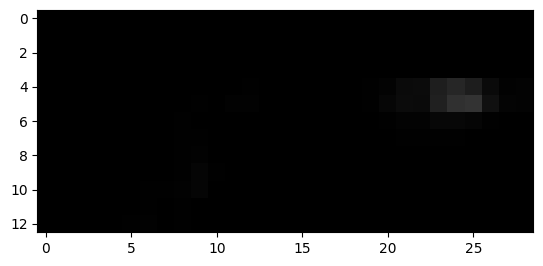

1771


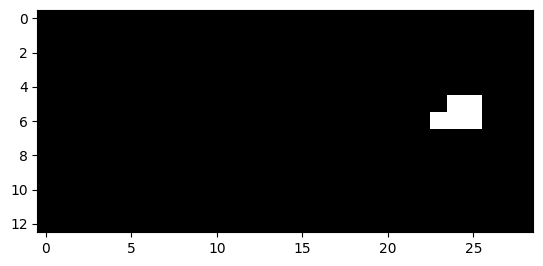

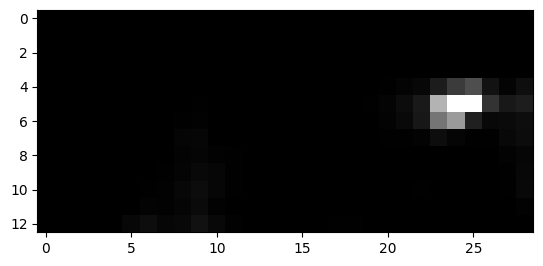

1772


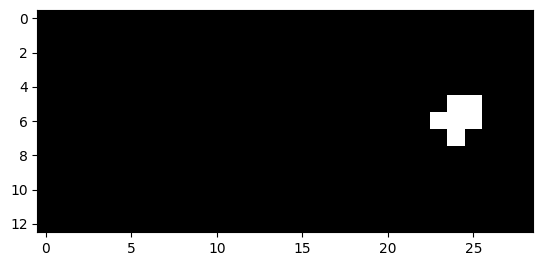

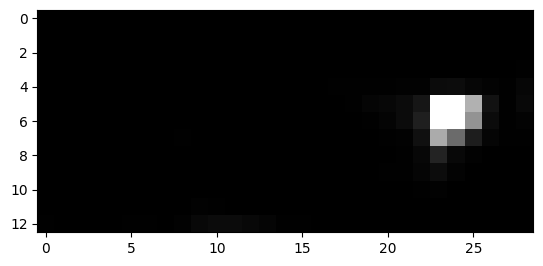

1773


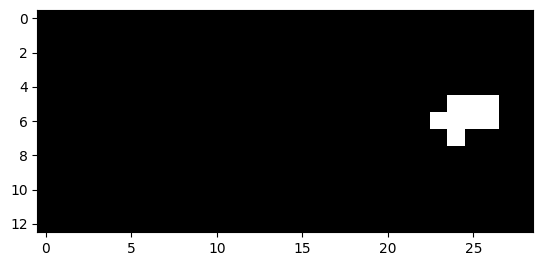

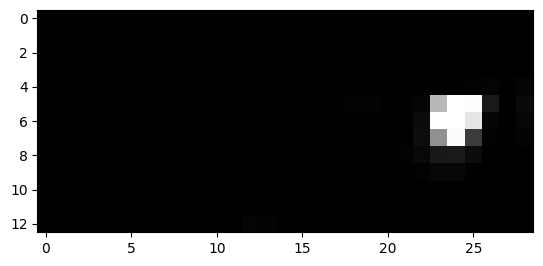

1774


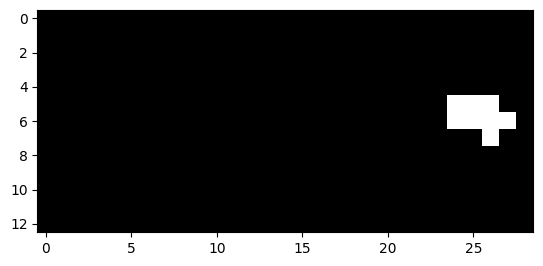

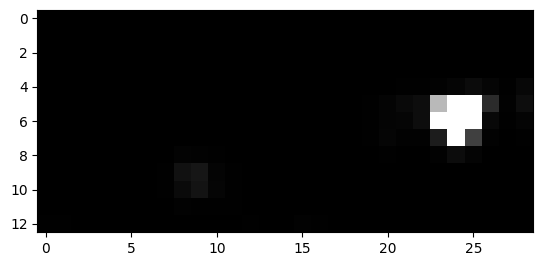

1775


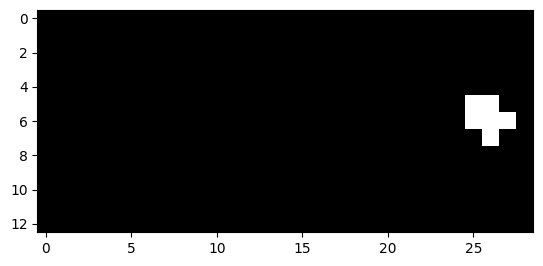

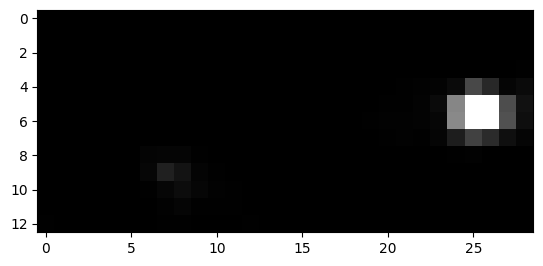

1776


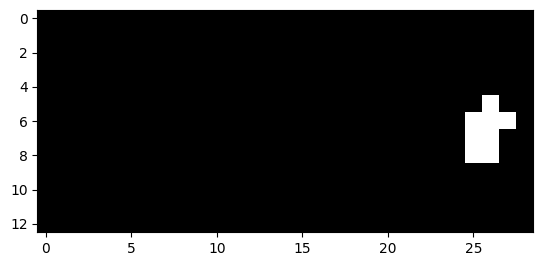

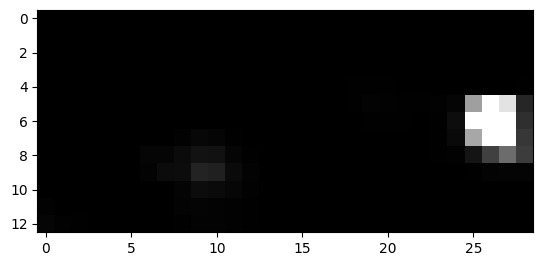

1777


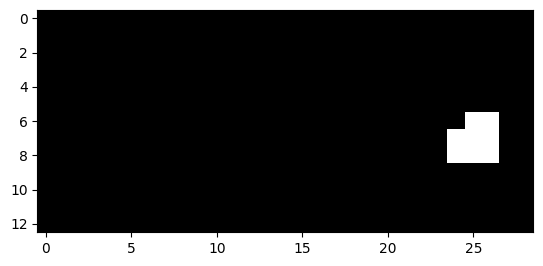

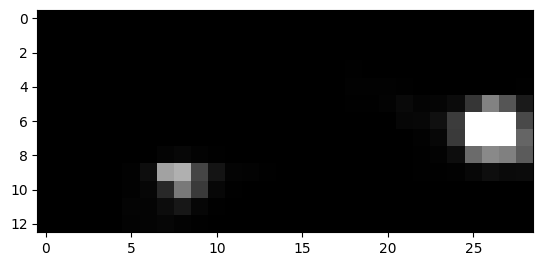

1778


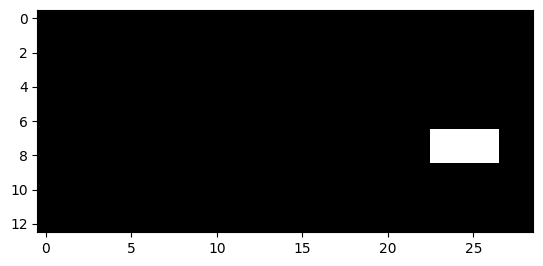

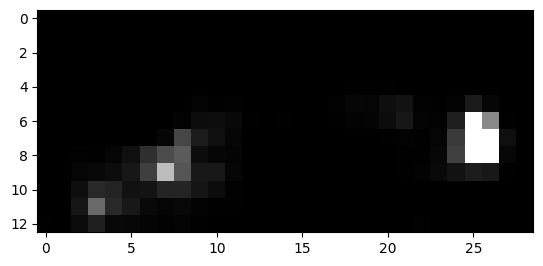

1779


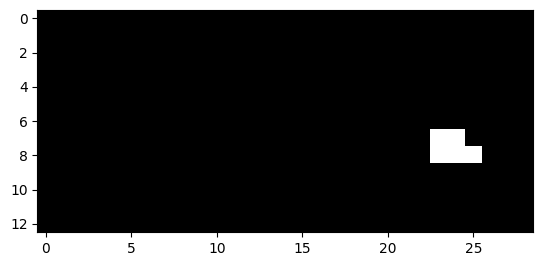

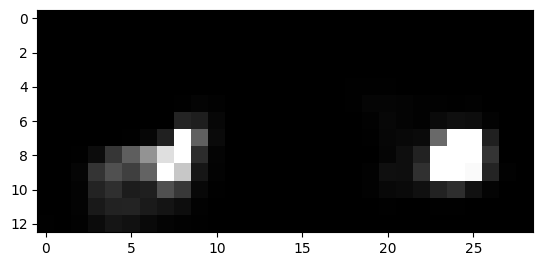

1786


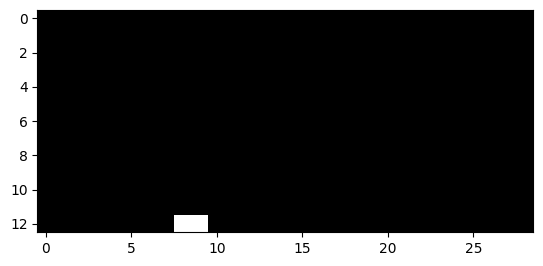

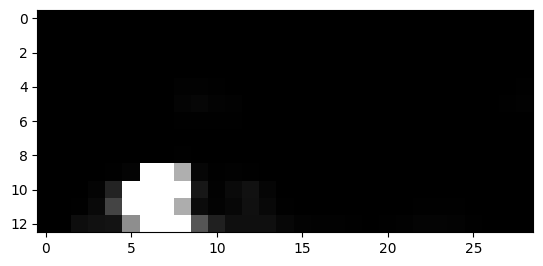

1787


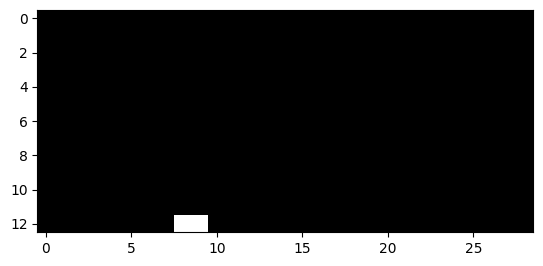

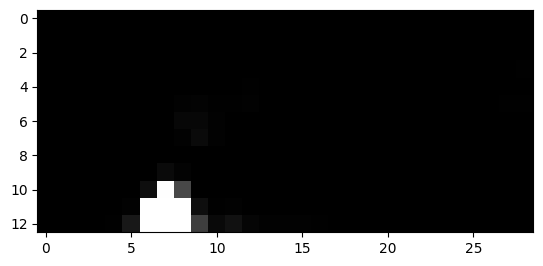

1792


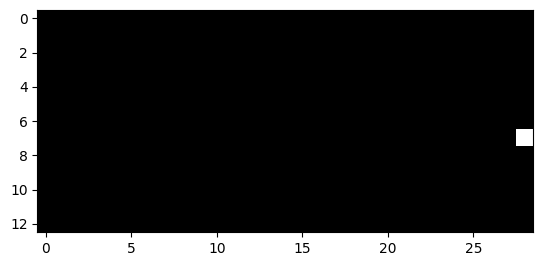

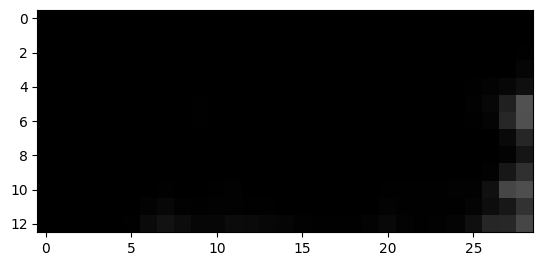

1793


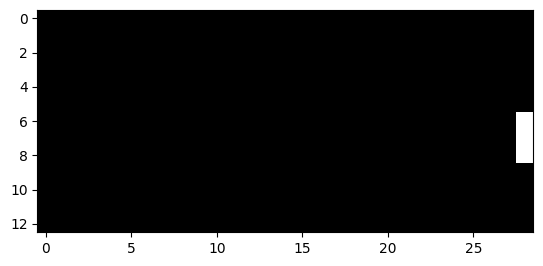

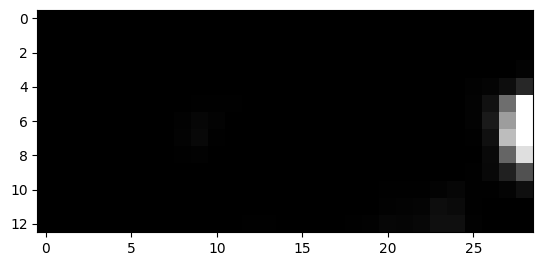

1794


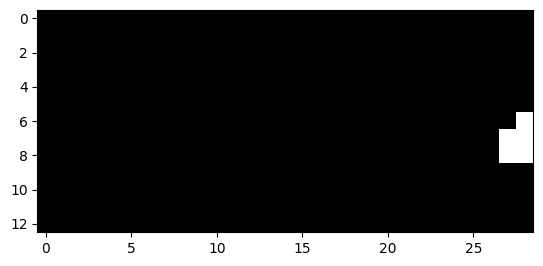

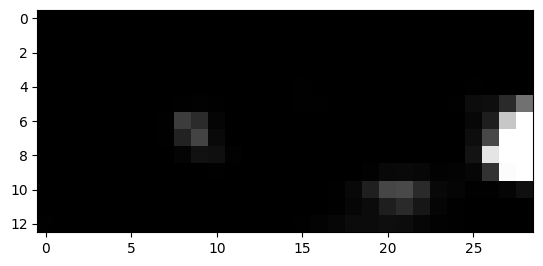

1795


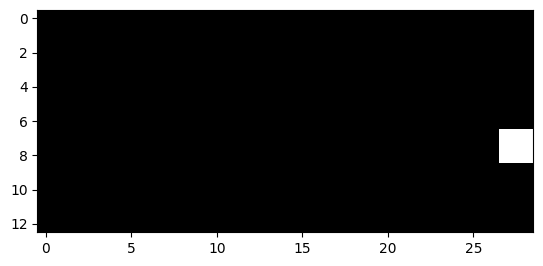

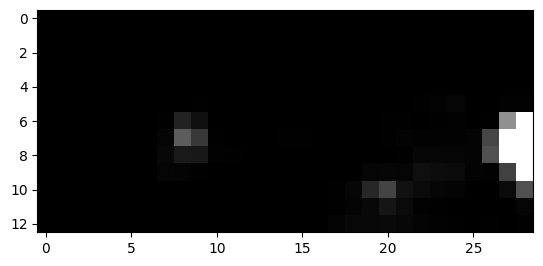

1796


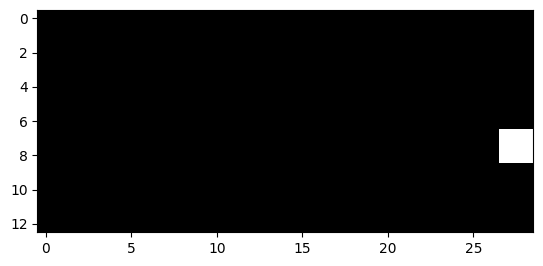

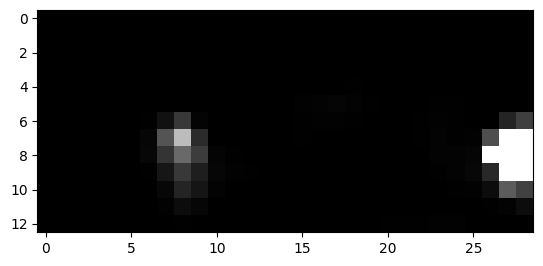

1797


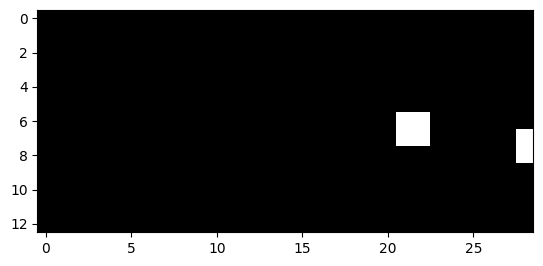

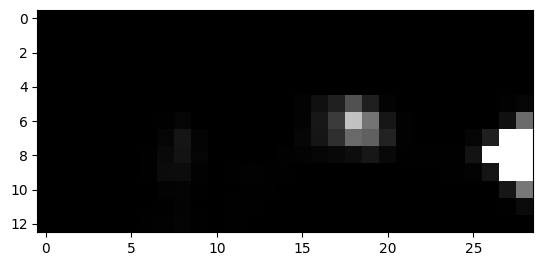

1798


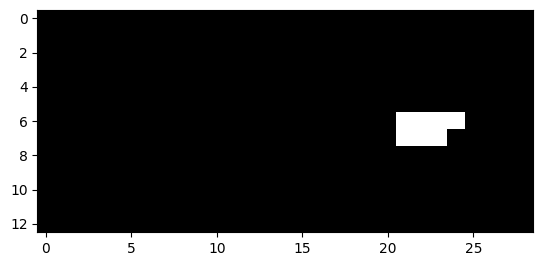

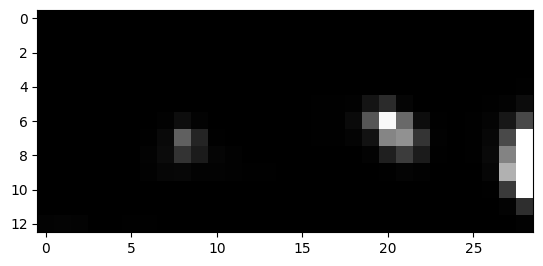

1799


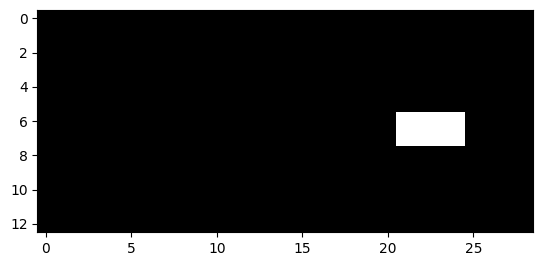

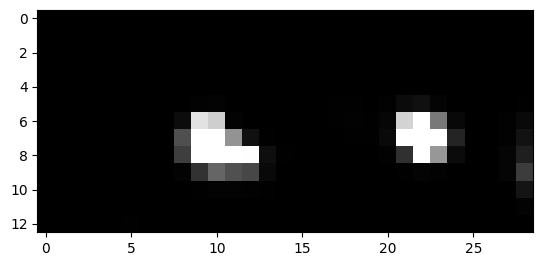

1800


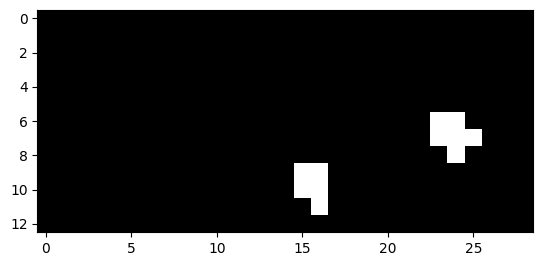

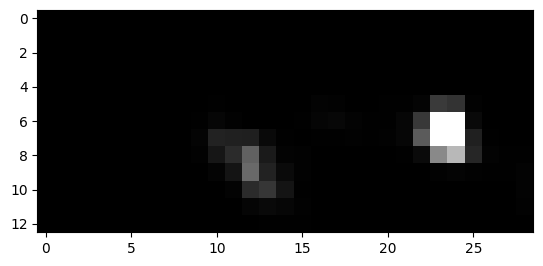

1801


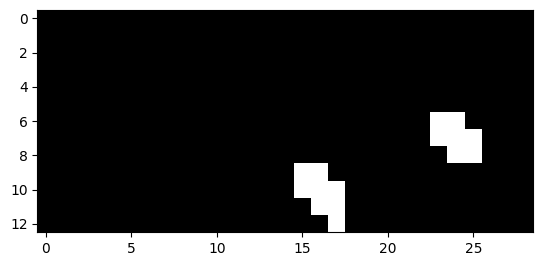

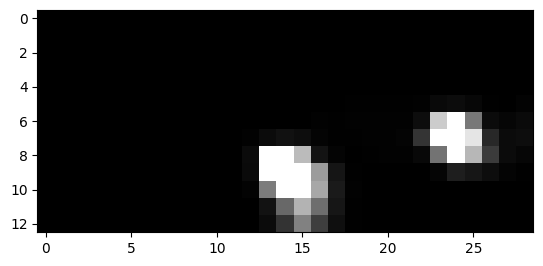

1802


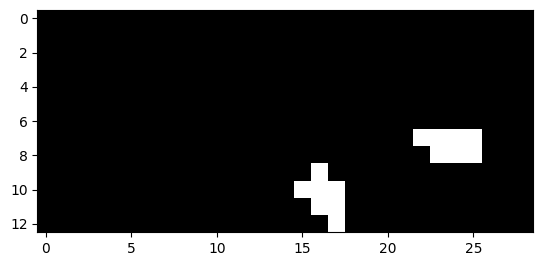

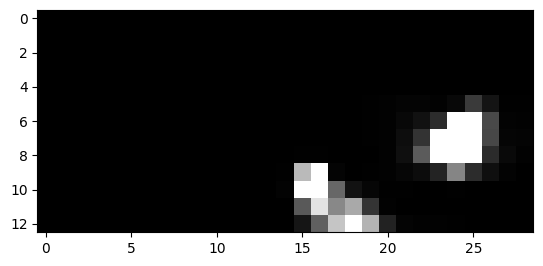

1803


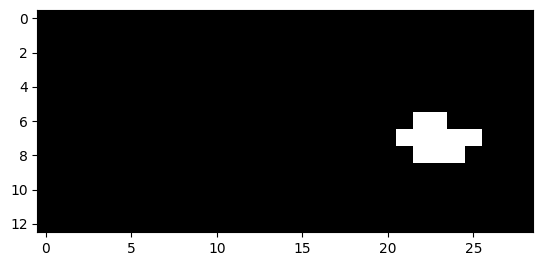

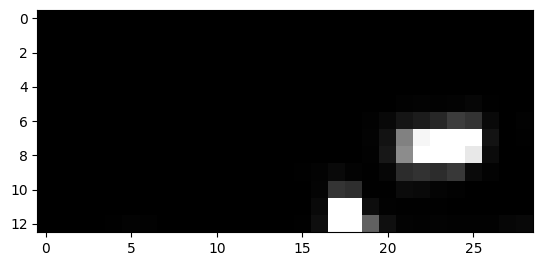

1804


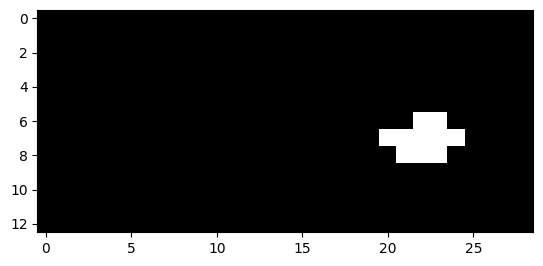

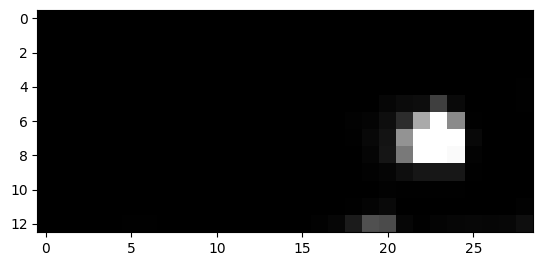

1805


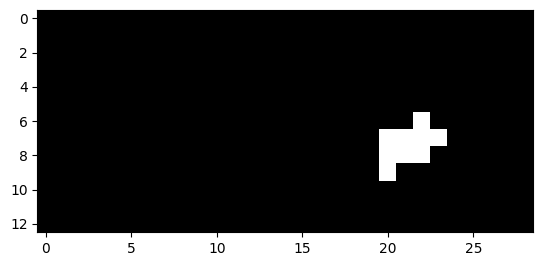

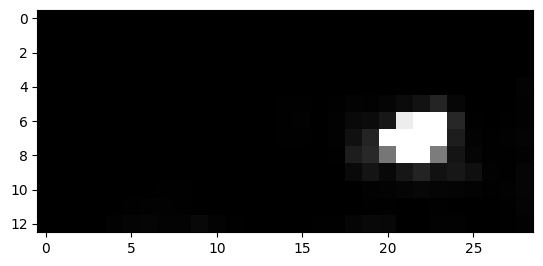

1806


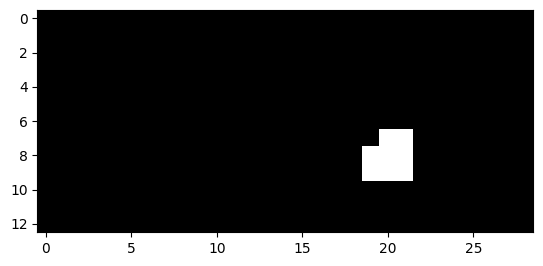

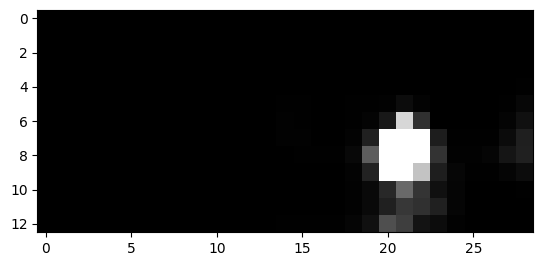

1807


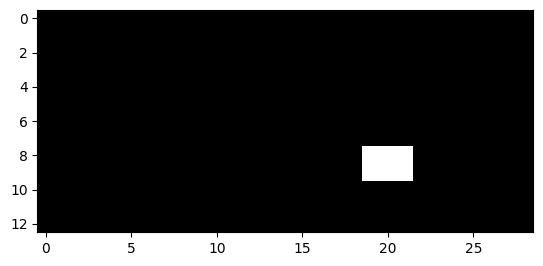

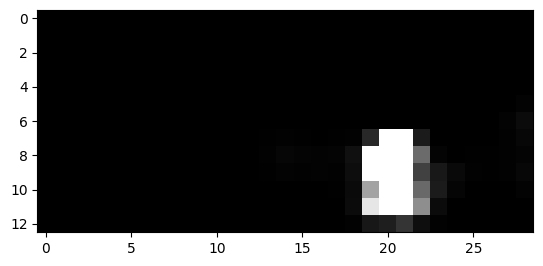

1808


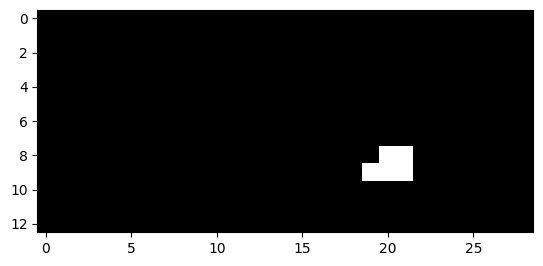

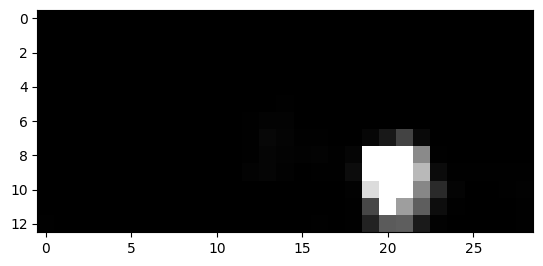

1809


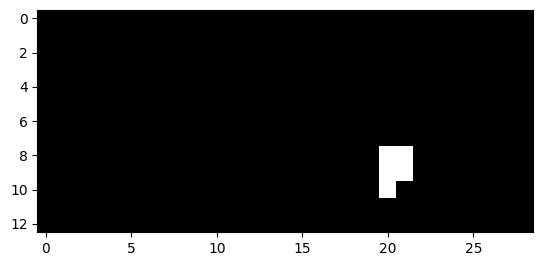

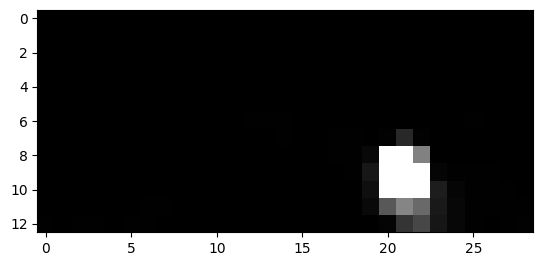

1810


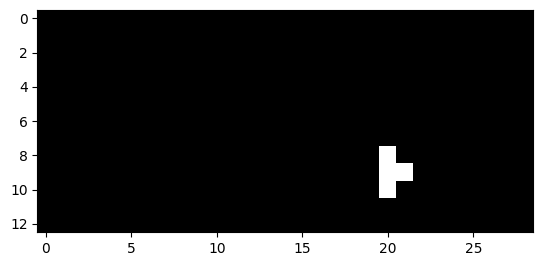

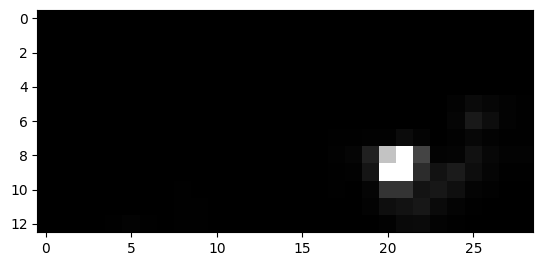

1845


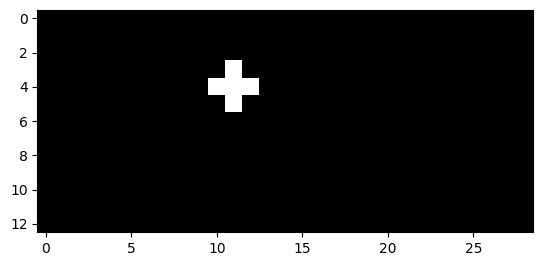

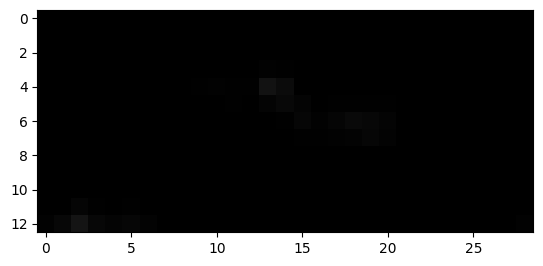

1846


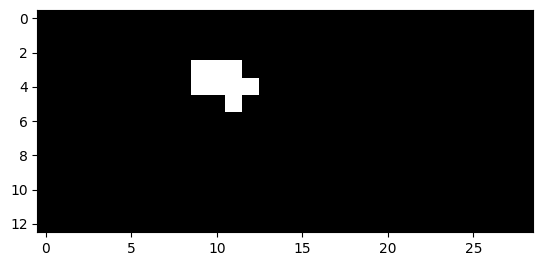

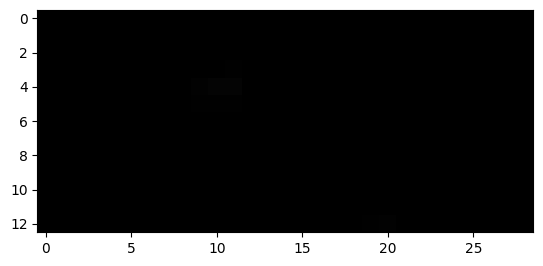

1847


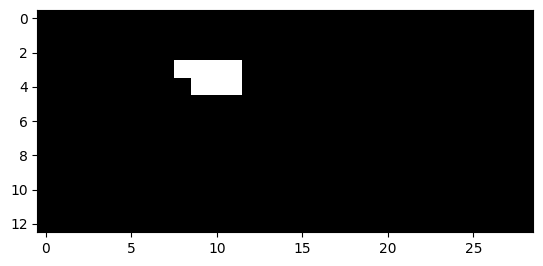

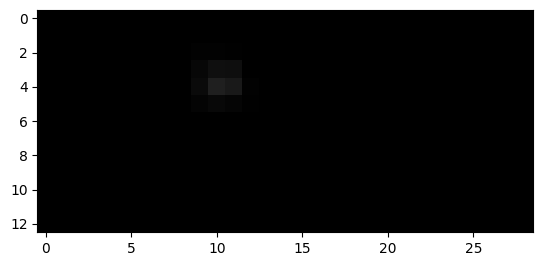

1848


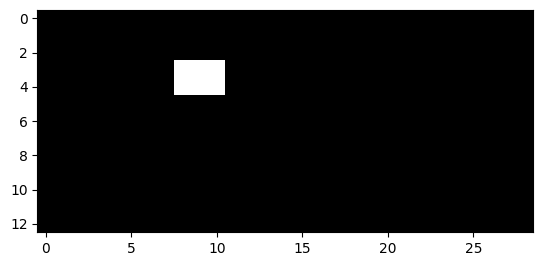

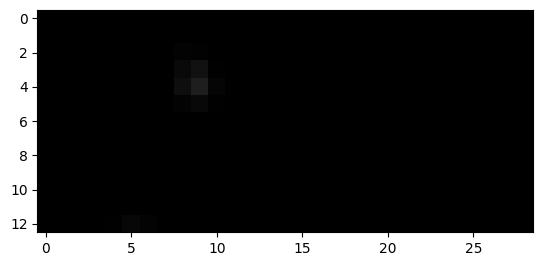

1849


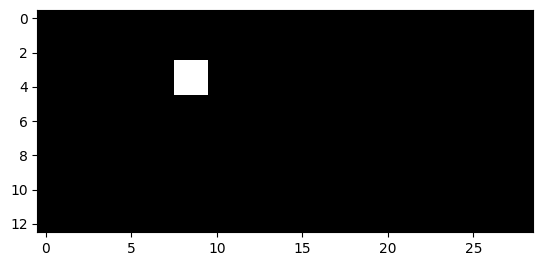

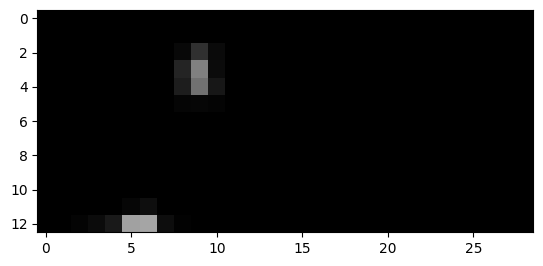

2122


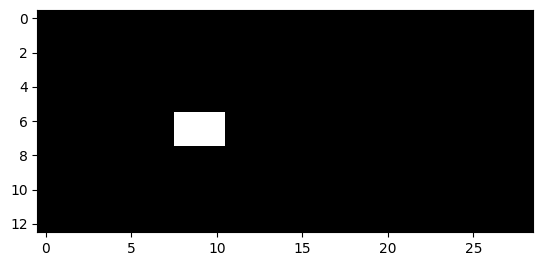

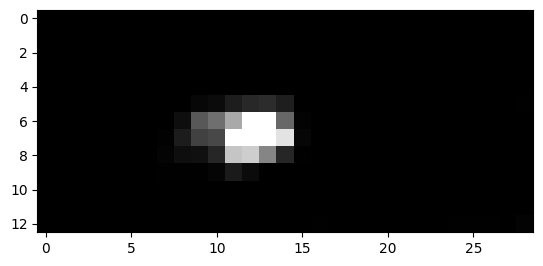

2123


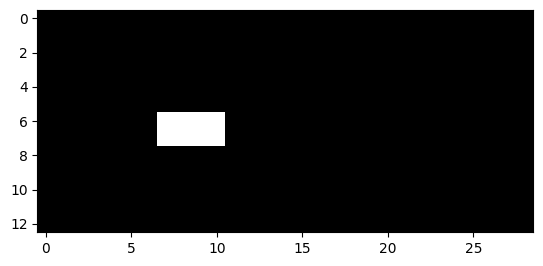

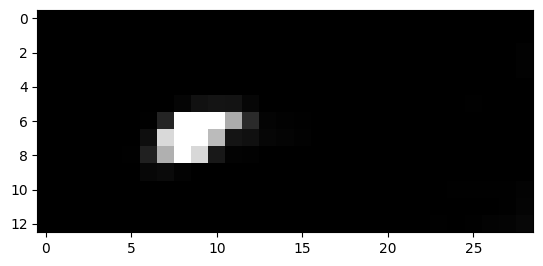

2124


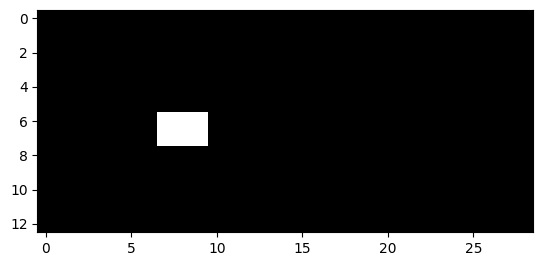

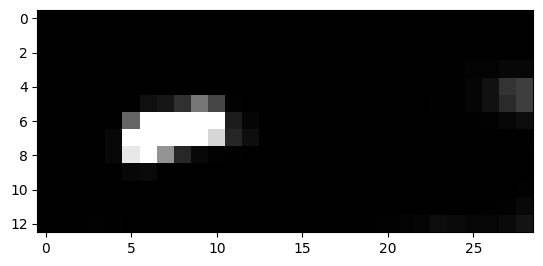

2126


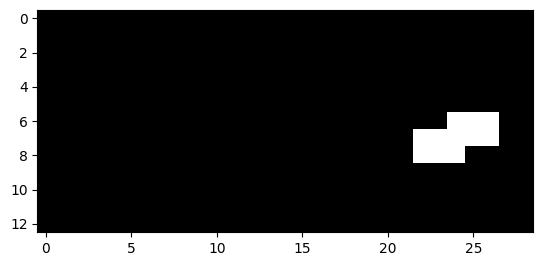

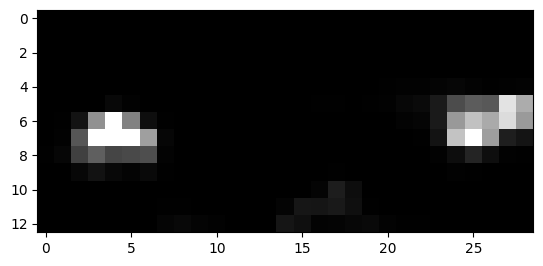

2127


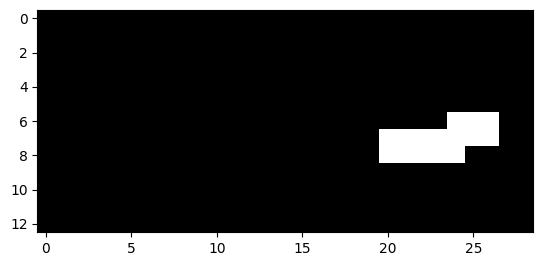

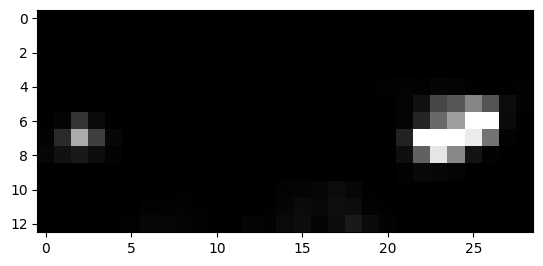

2128


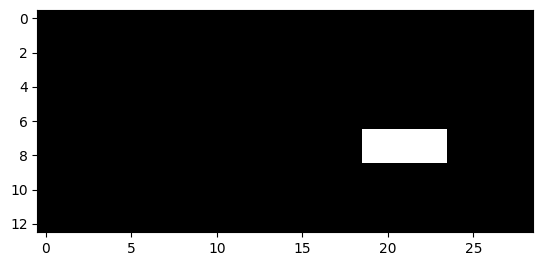

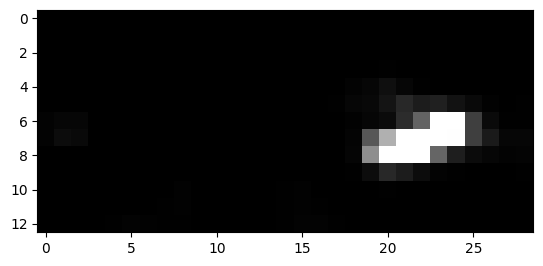

2129


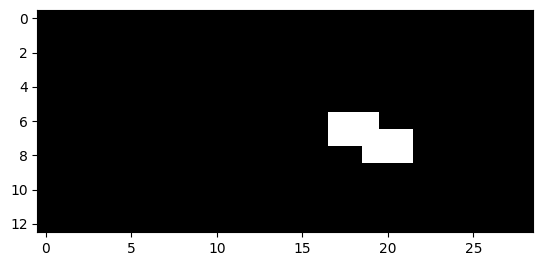

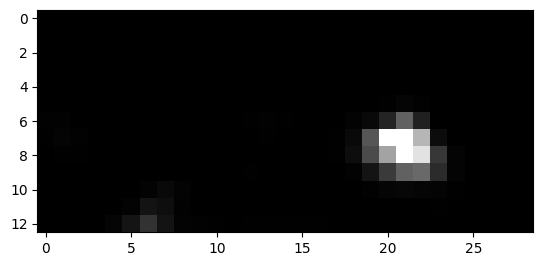

2130


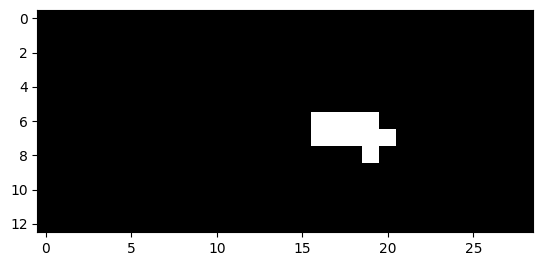

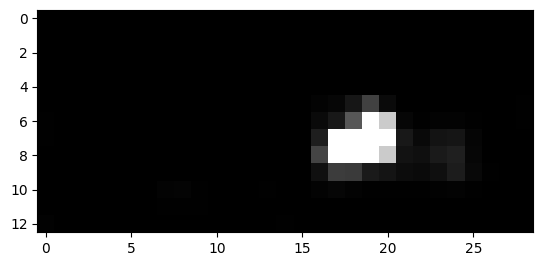

2131


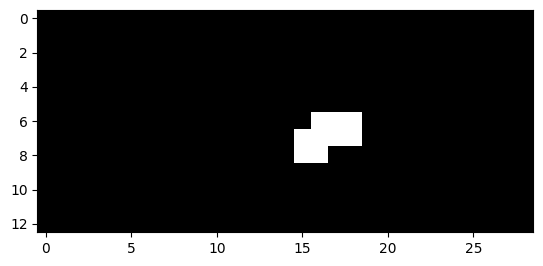

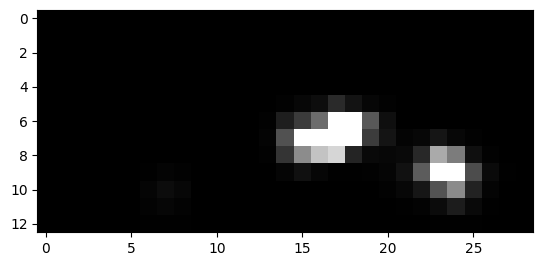

2132


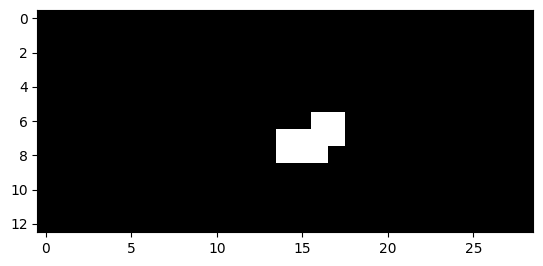

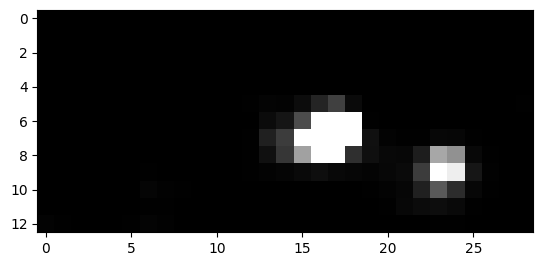

2133


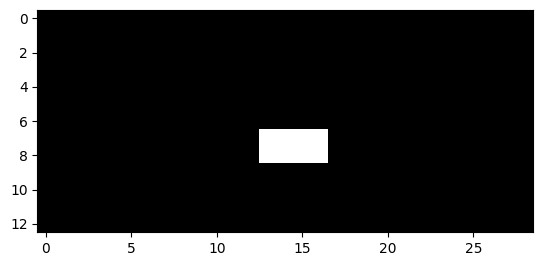

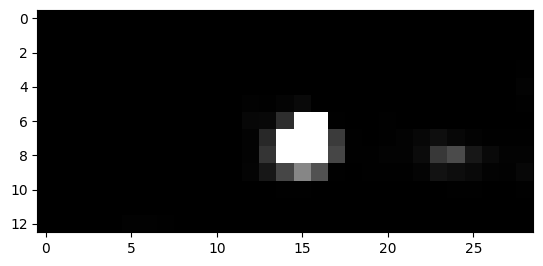

2134


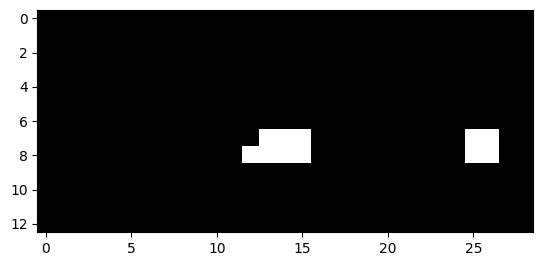

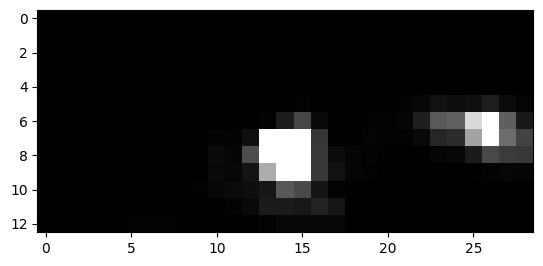

2135


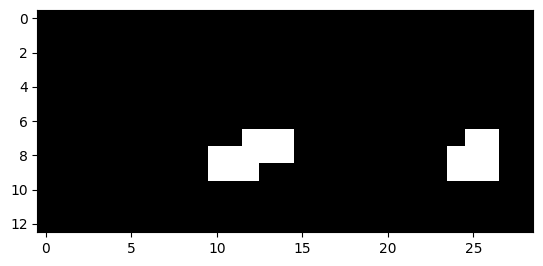

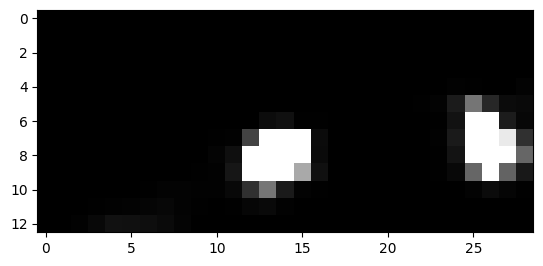

2136


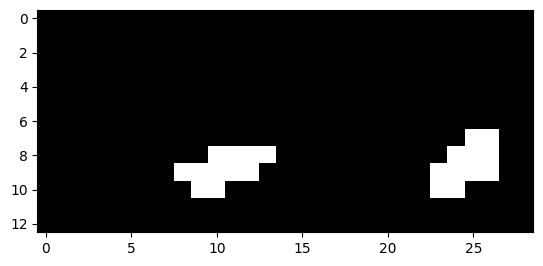

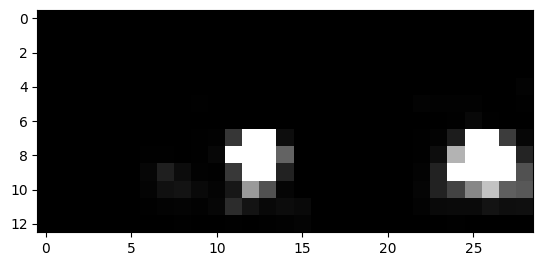

2137


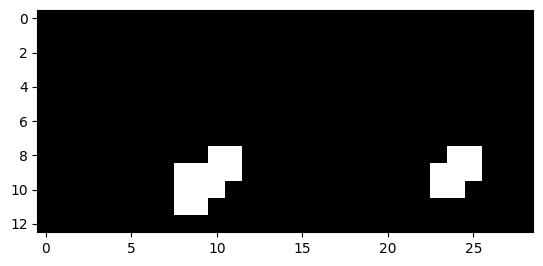

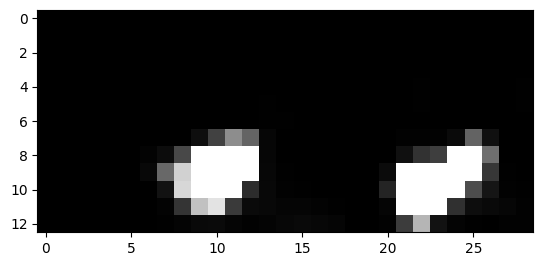

2138


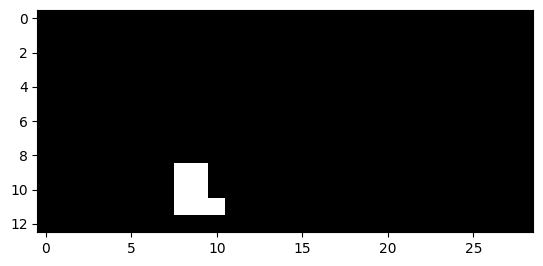

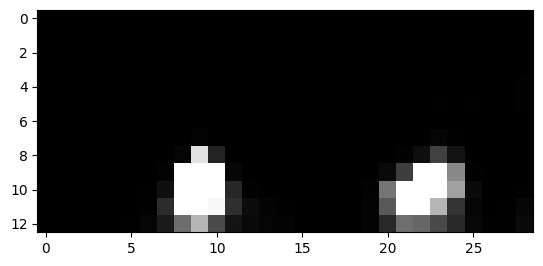

2139


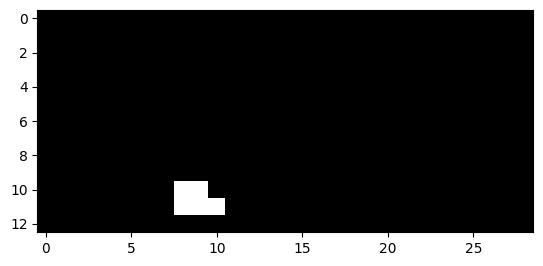

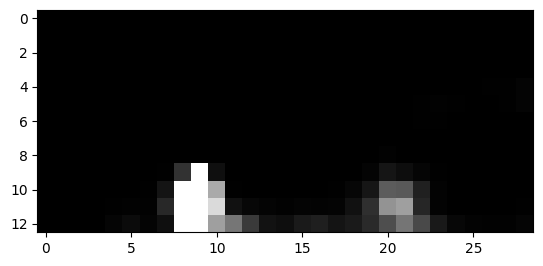

2143


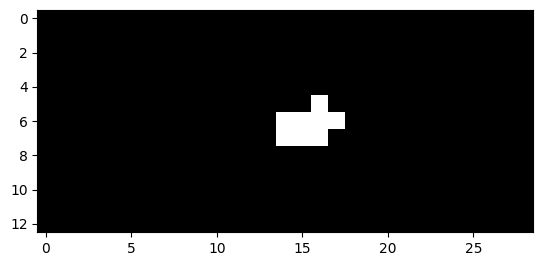

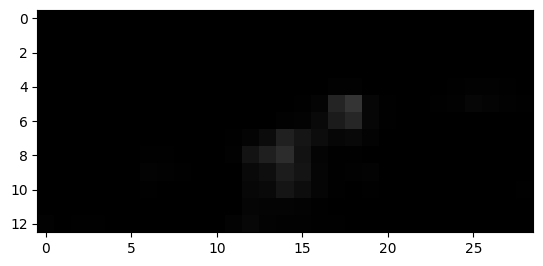

2144


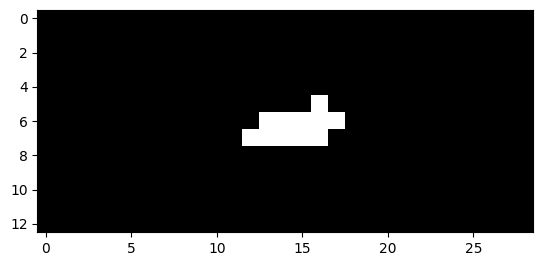

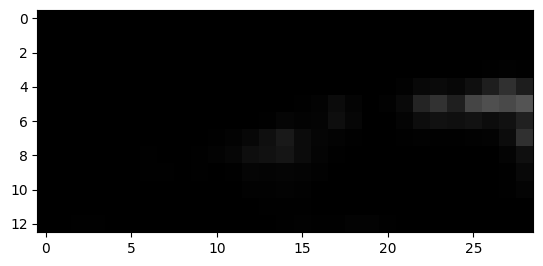

2145


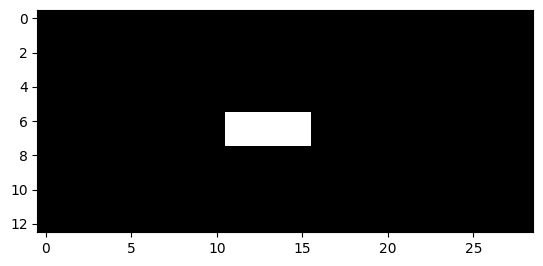

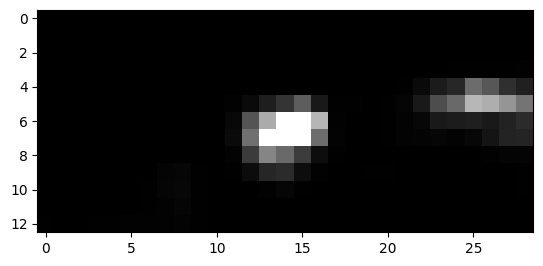

2146


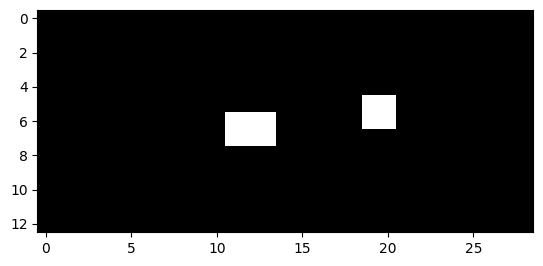

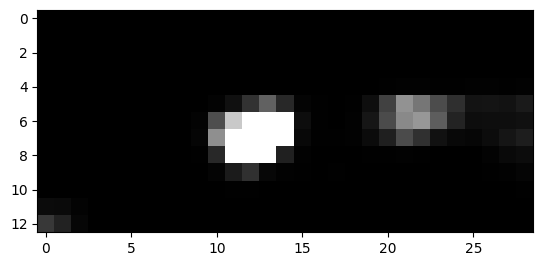

2147


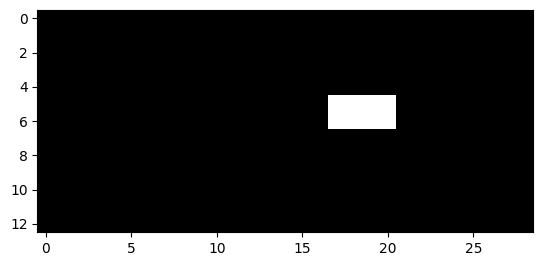

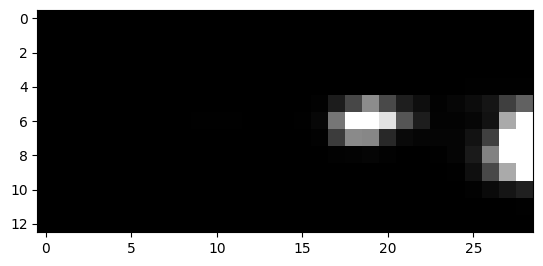

2148


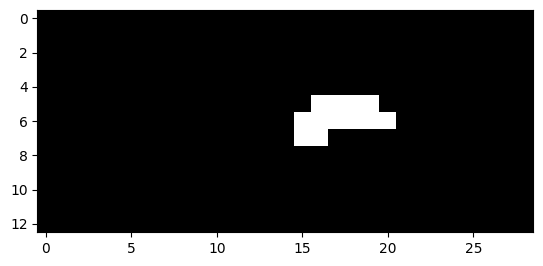

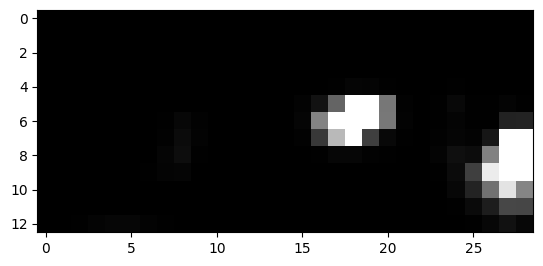

2149


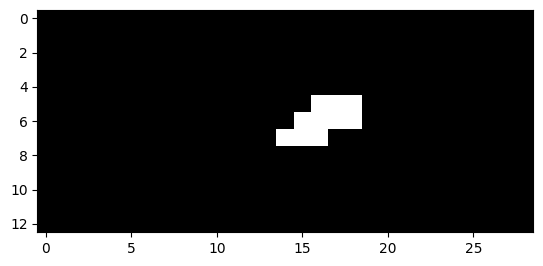

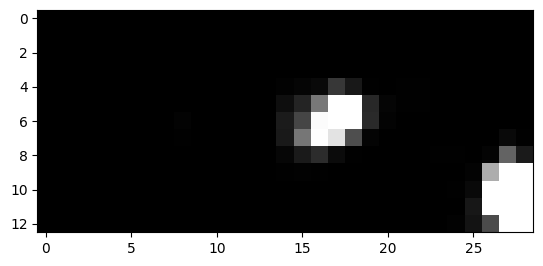

2150


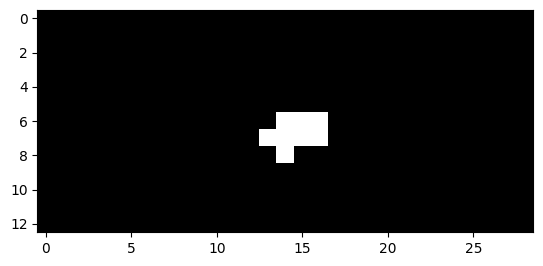

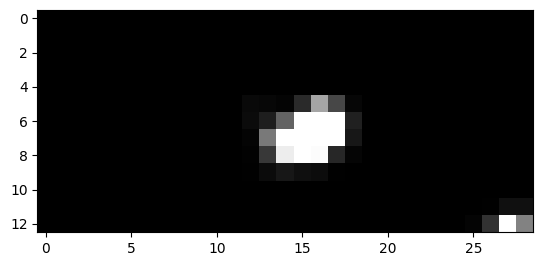

2151


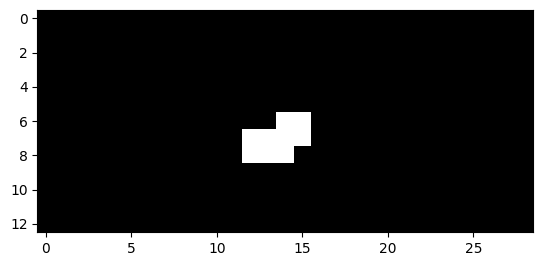

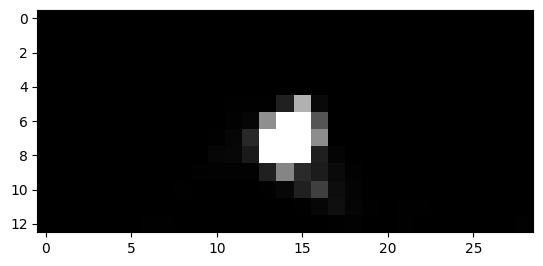

2152


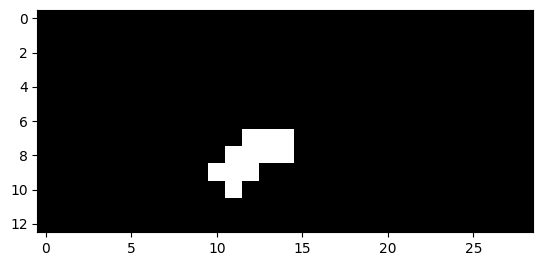

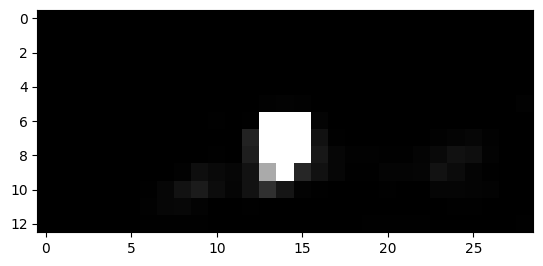

2153


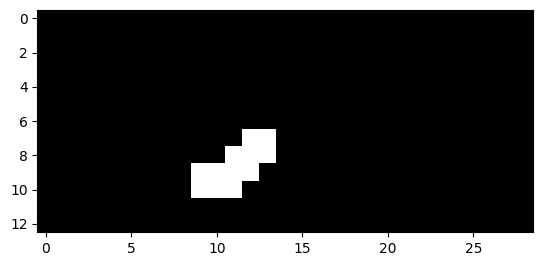

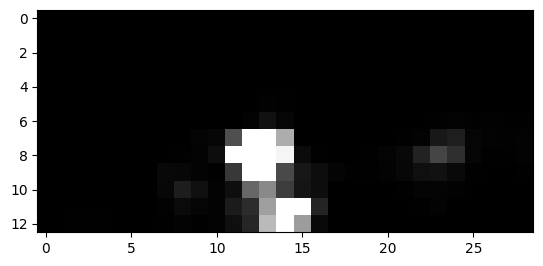

2154


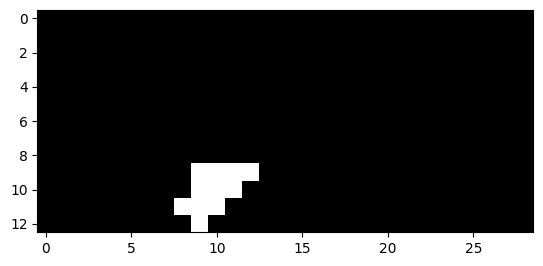

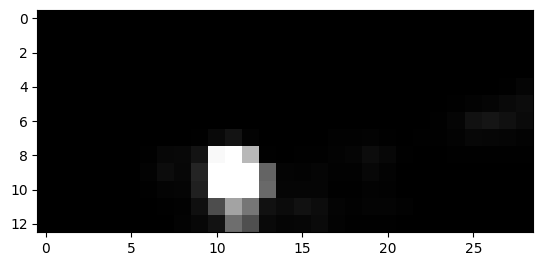

2155


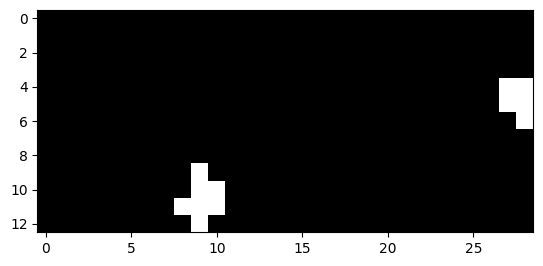

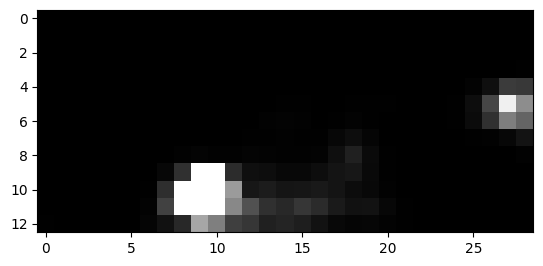

2156


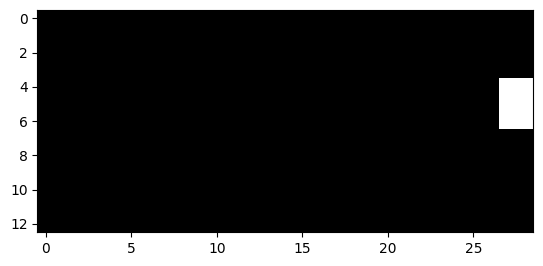

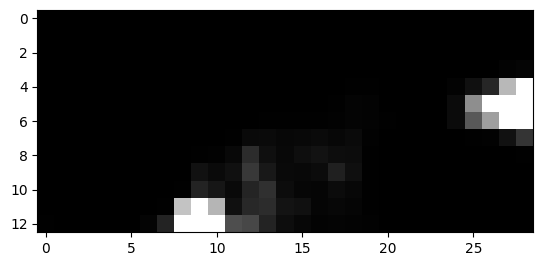

2157


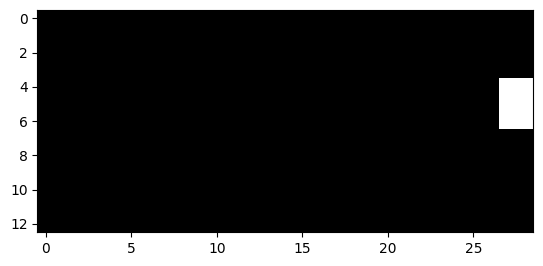

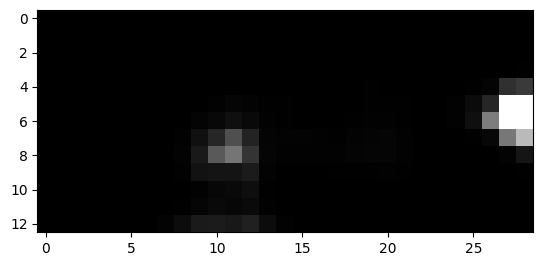

2166


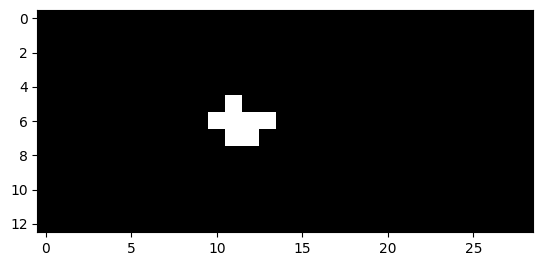

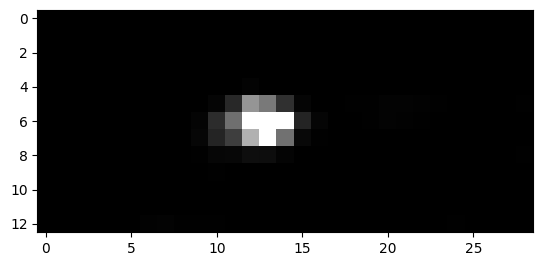

2167


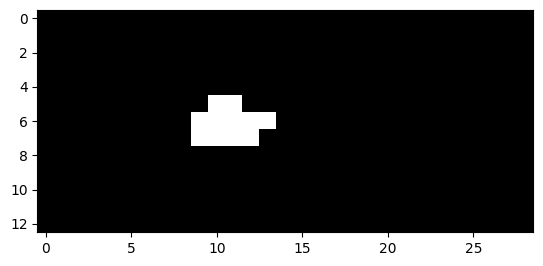

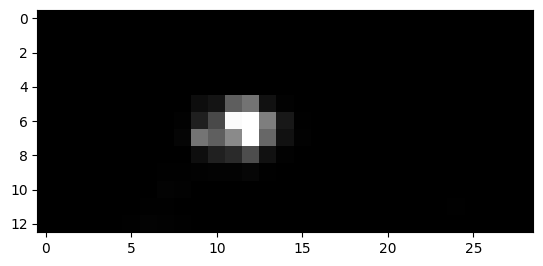

2168


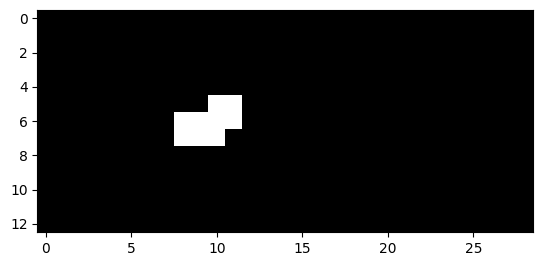

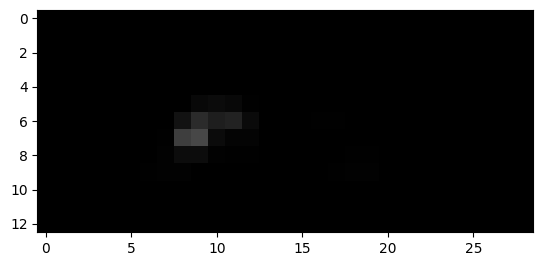

2169


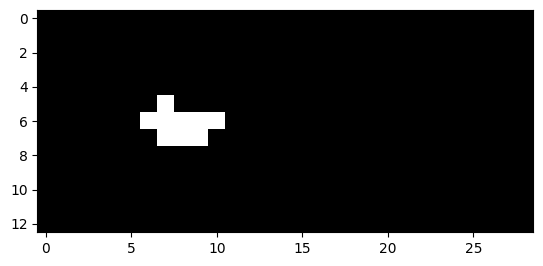

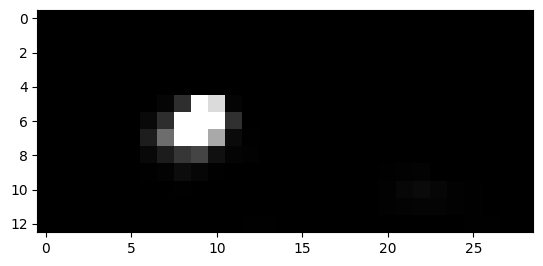

2170


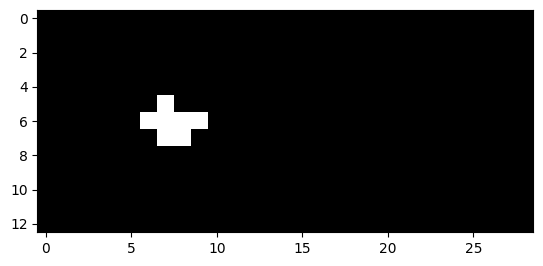

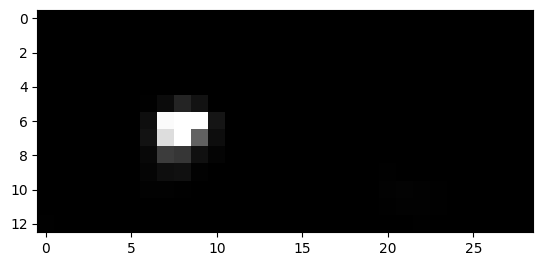

2171


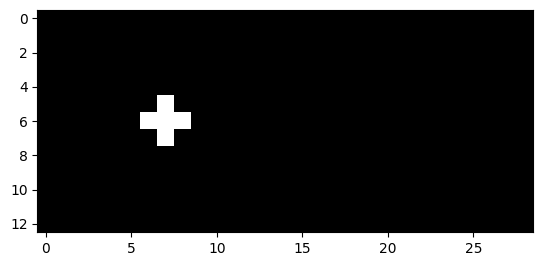

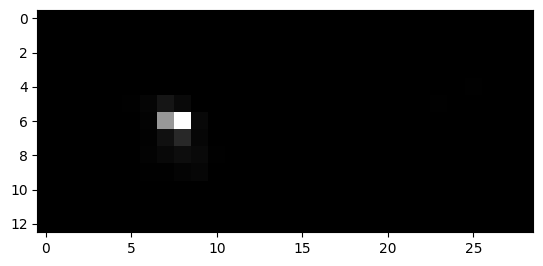

2174


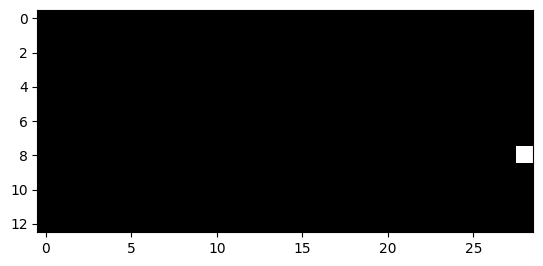

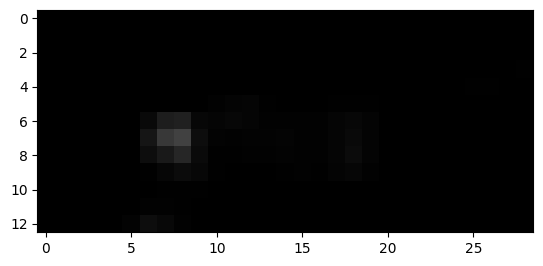

2175


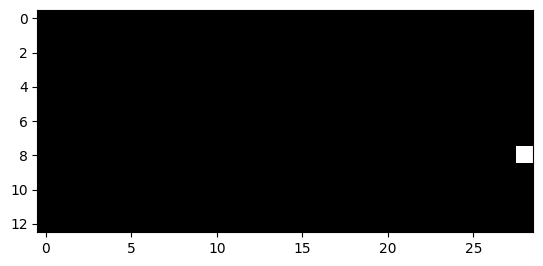

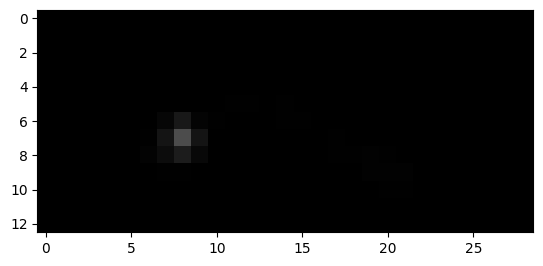

2181


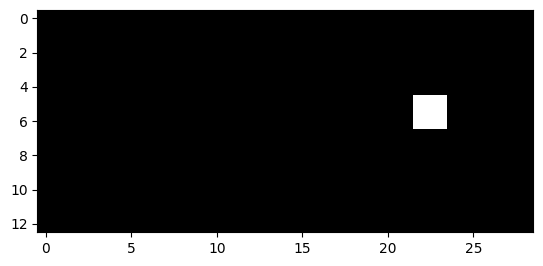

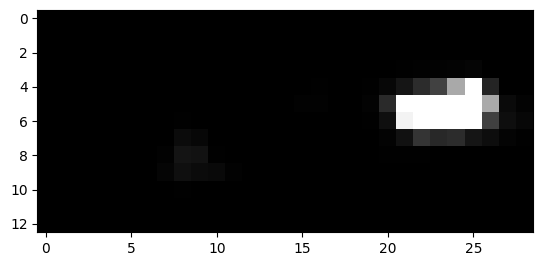

2182


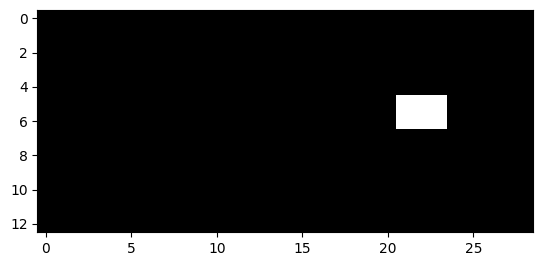

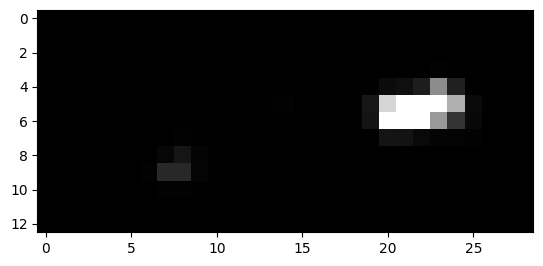

2183


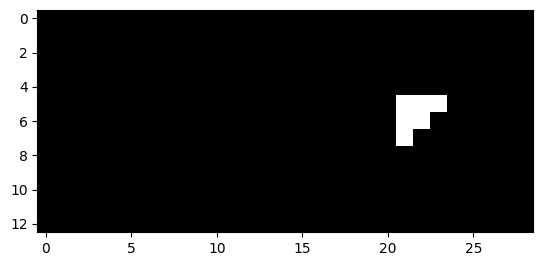

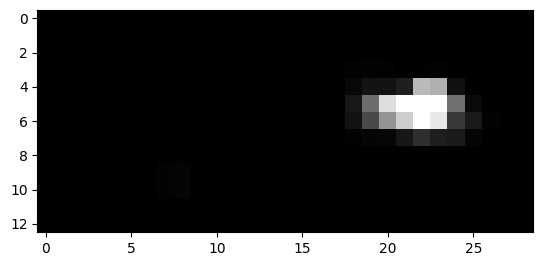

2184


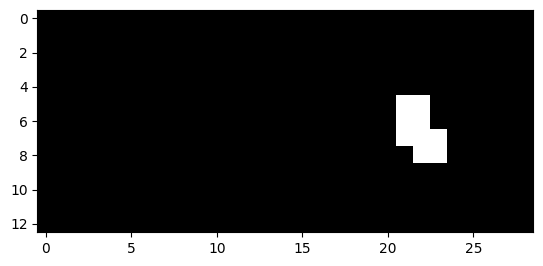

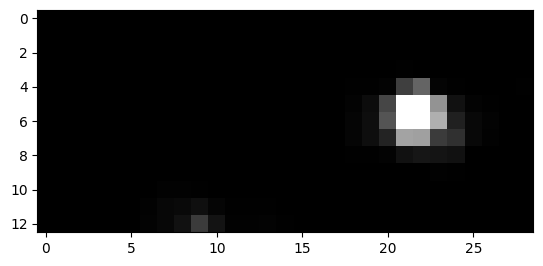

2185


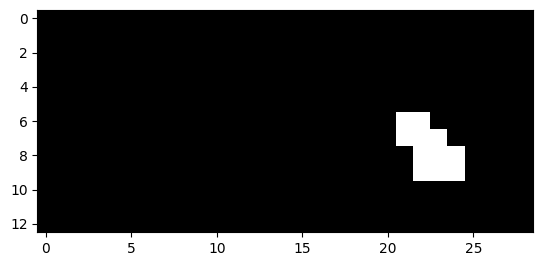

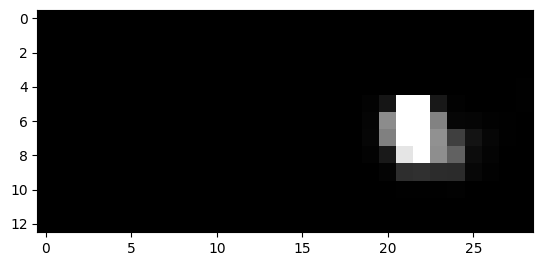

2186


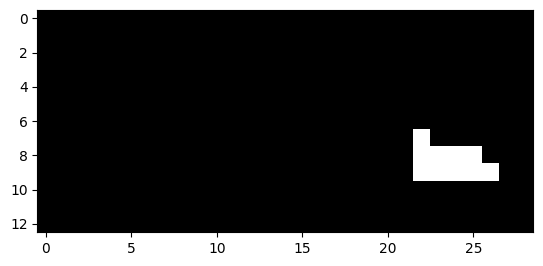

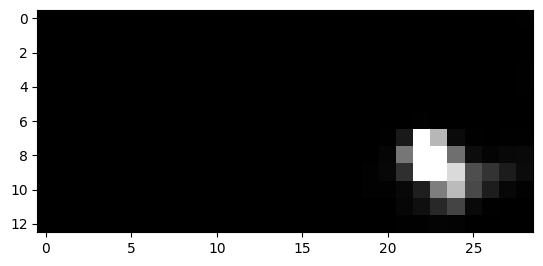

2187


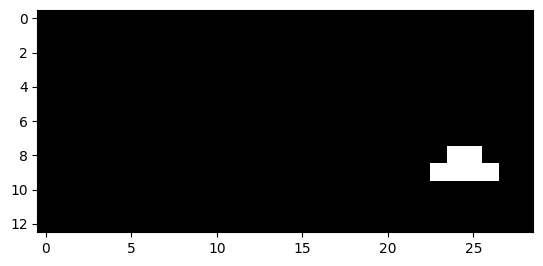

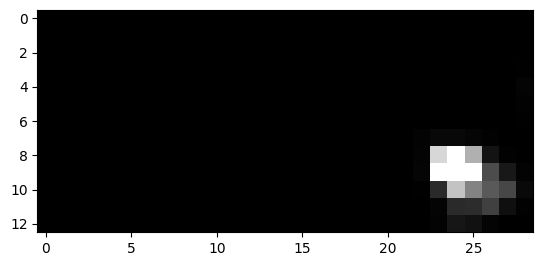

2188


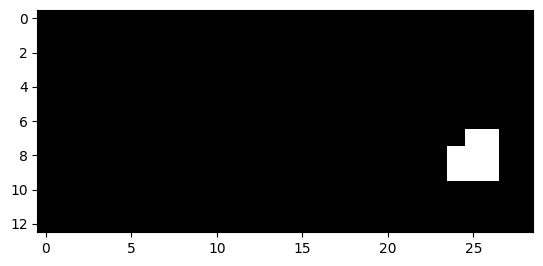

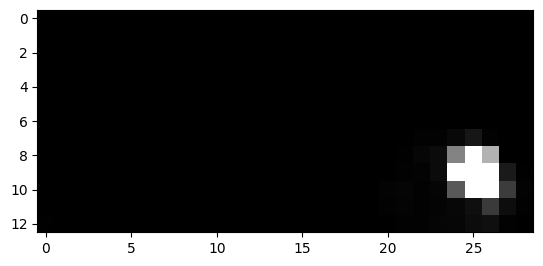

2189


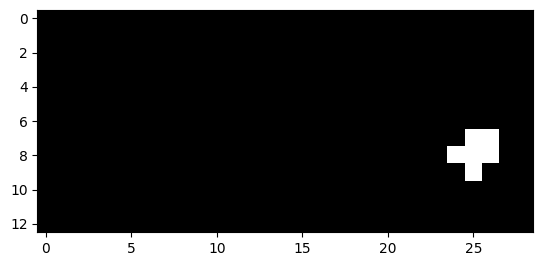

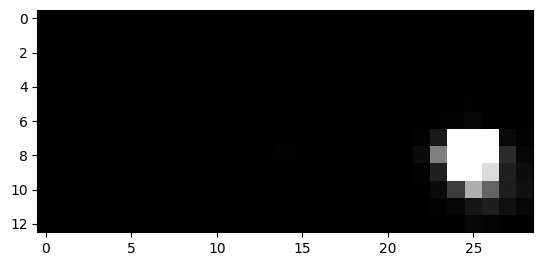

2190


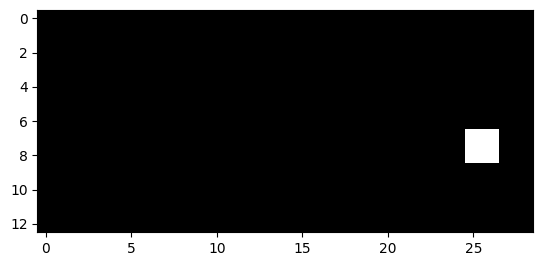

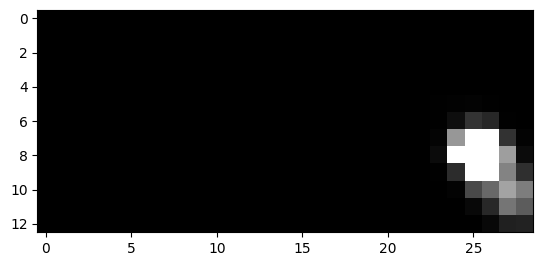

2191


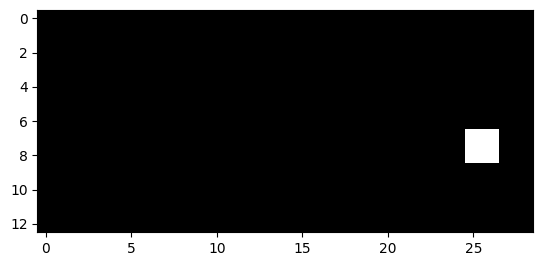

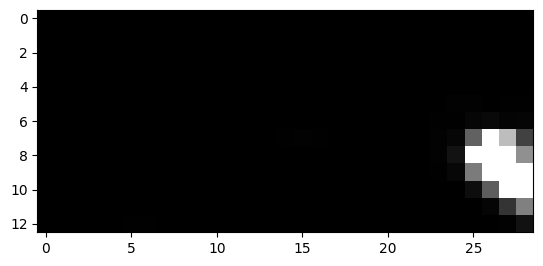

2214


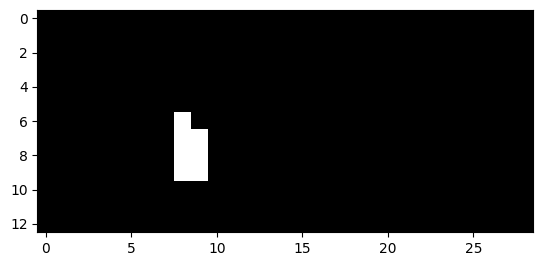

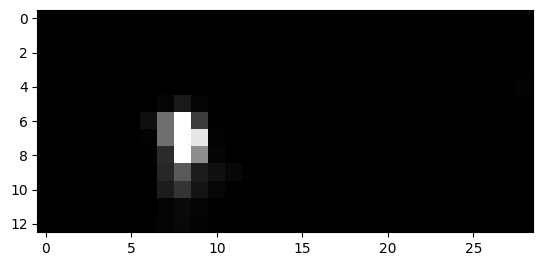

2215


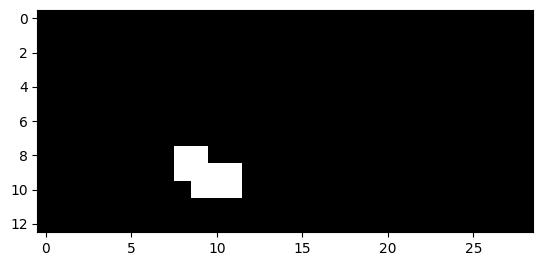

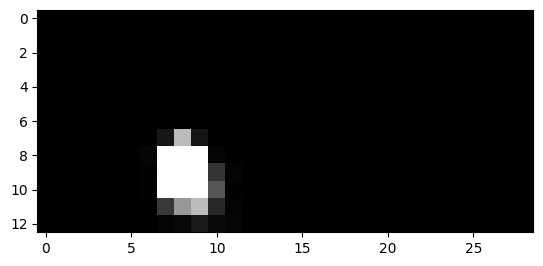

2216


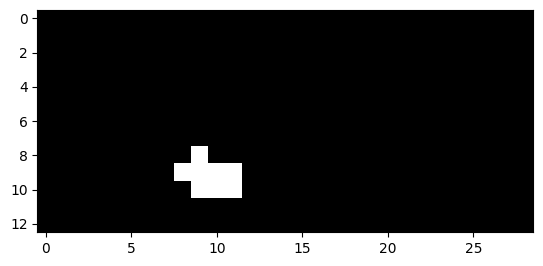

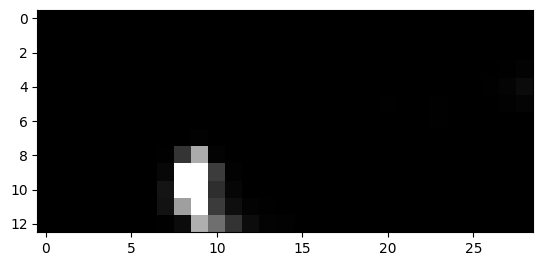

2226


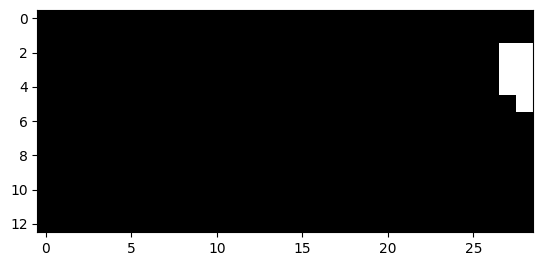

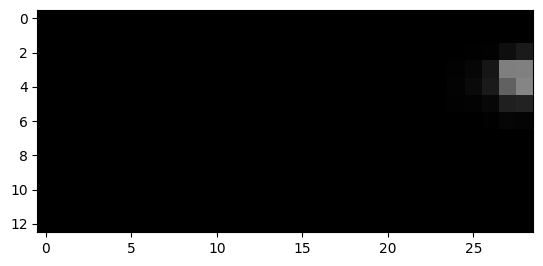

2227


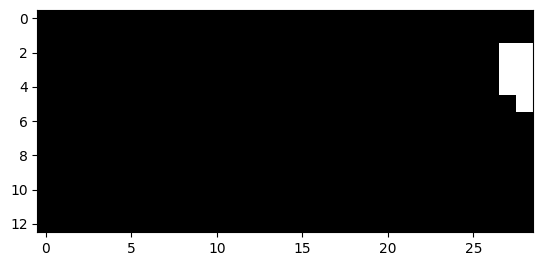

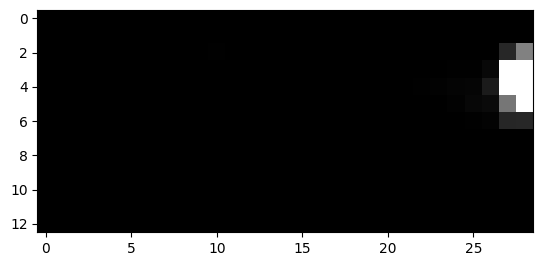

2228


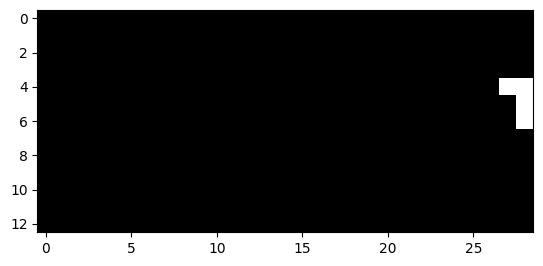

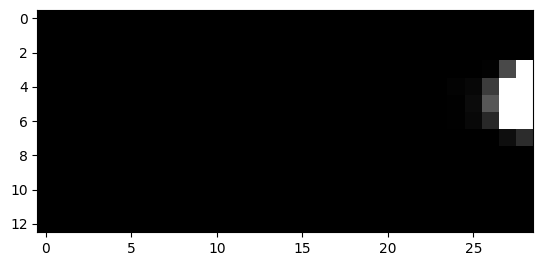

2229


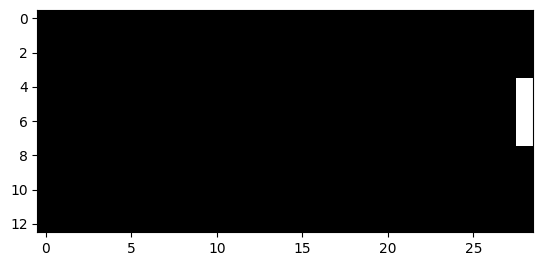

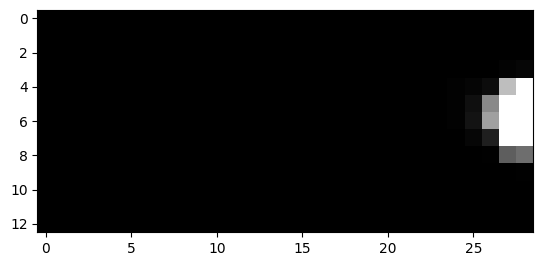

2230


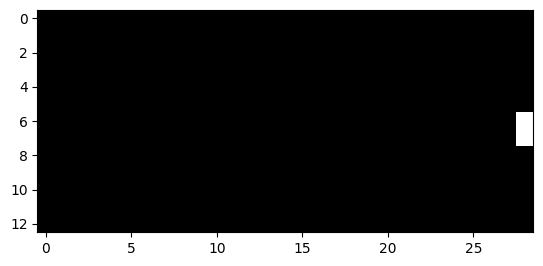

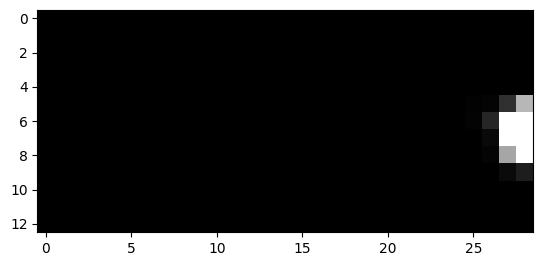

389


In [18]:
k=0
for i in range(len(y_test_img)): 
    if(np.max(y_test_img[i].reshape(-1))>0.1):
        print(i)
        plt.figure()
        plt.imshow(y_test_img[i], cmap = "gray", vmin=0, vmax=1)
        plt.show()
        plt.imshow(t[i], vmin=0, vmax=0.3, cmap = "gray")
        plt.show()
        k+=1
print(k)

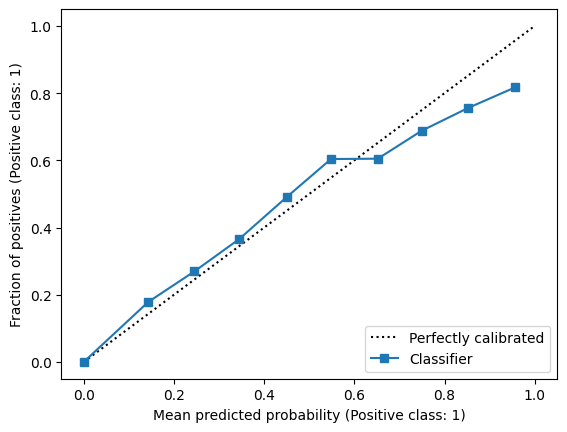

In [19]:
from sklearn.calibration import CalibrationDisplay

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)


In [20]:
from sklearn.metrics import brier_score_loss
### brier score con probabilità predette

print(f'All zeros Brier score: {brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1))))}')
print(f'Model Brier score: {brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1))}')

All zeros Brier score: 0.0035259368257102965
Model Brier score: 0.002172682068754036


In [21]:
test['predictions_lag0'] = t.reshape(-1,1)

In [22]:
test.to_csv("test_with_newTarget_predictions.csv")

## Lags

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 30, 1)         73        
                                                                 
 cropping2d_1 (Cropping2D)   (None, 13, 29, 1)        

2023-03-28 10:59:39.432091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0454

2023-03-28 10:59:42.256314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0454 - val_loss: 0.0165
Epoch 2/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0173 - val_loss: 0.0143
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0154 - val_loss: 0.0126
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0144 - val_loss: 0.0128
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0137 - val_loss: 0.0118
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0134 - val_loss: 0.0118
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0131 - val_loss: 0.0111
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0129 - val_loss: 0.0116
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0127 - val_loss: 0.0111
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0126 - val_loss: 0.0111
E

2023-03-28 11:01:46.261696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 0s 2ms/step


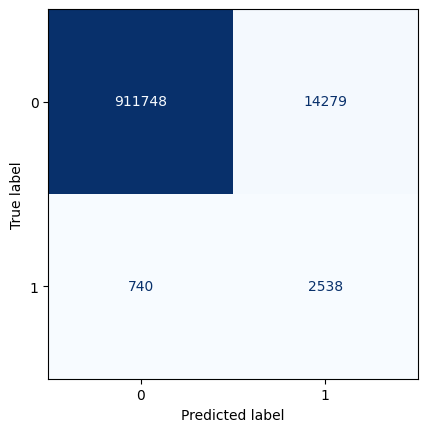

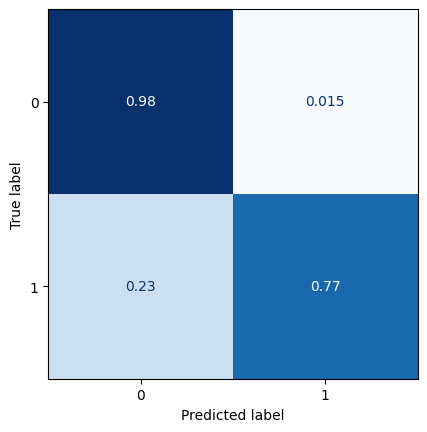

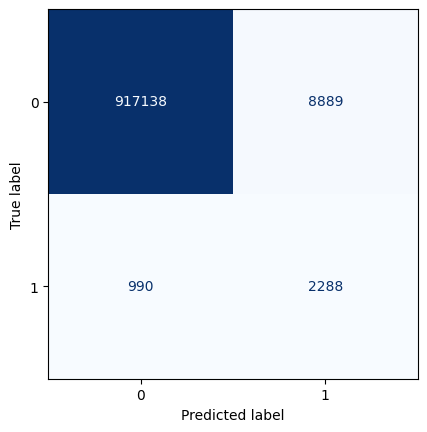

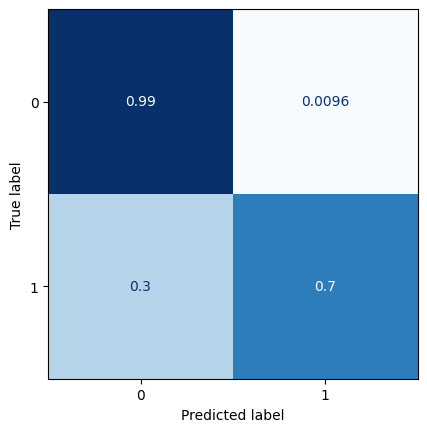

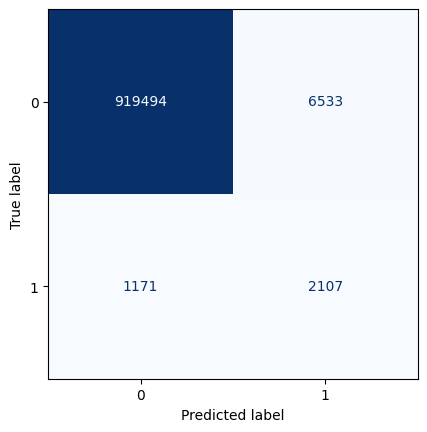

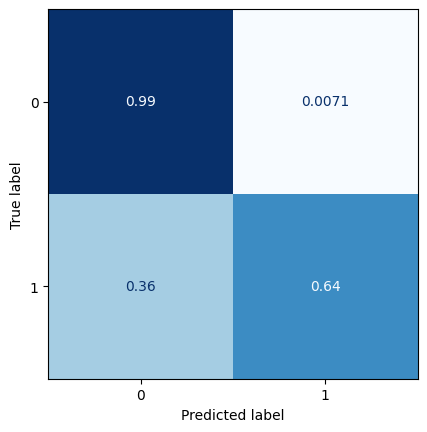

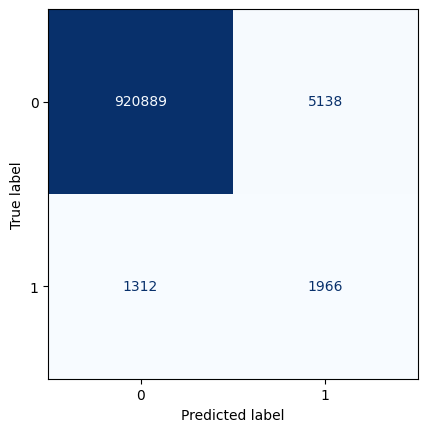

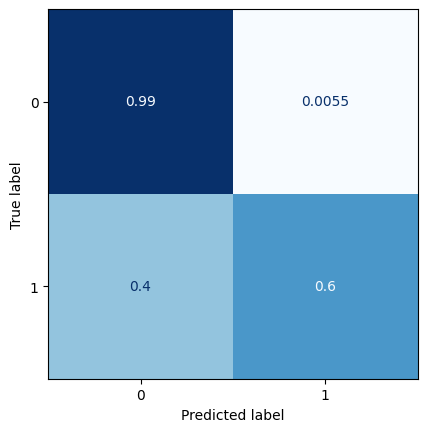

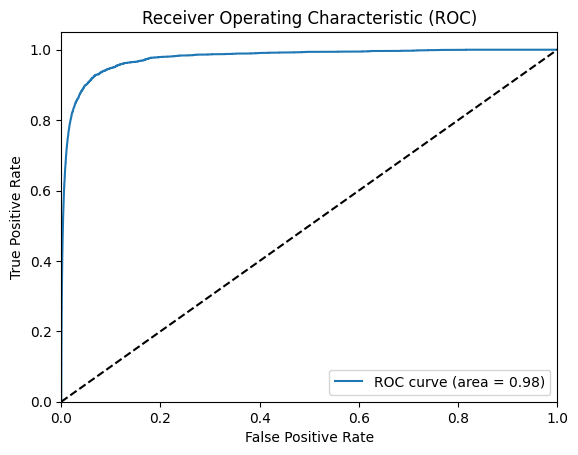

All zeros Brier score: 0.00352736722604527
Model Brier score: 0.002736149079277809
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 30, 1)         73        
                                     

2023-03-28 11:02:02.298032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.1122 - val_loss: 0.0237


2023-03-28 11:02:05.025261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0234 - val_loss: 0.0191
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0206 - val_loss: 0.0176
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0195 - val_loss: 0.0175
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0189 - val_loss: 0.0169
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0185 - val_loss: 0.0165
Epoch 7/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0181 - val_loss: 0.0165
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0177 - val_loss: 0.0157
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0173 - val_loss: 0.0158
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0170 - val_loss: 0.0154
Epoch 11/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0167 - val_l

2023-03-28 11:05:55.954056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


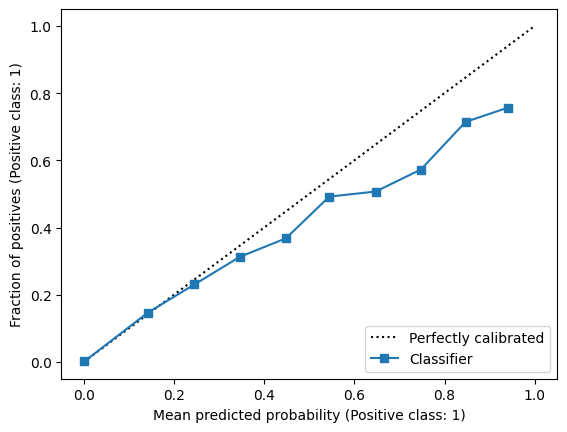

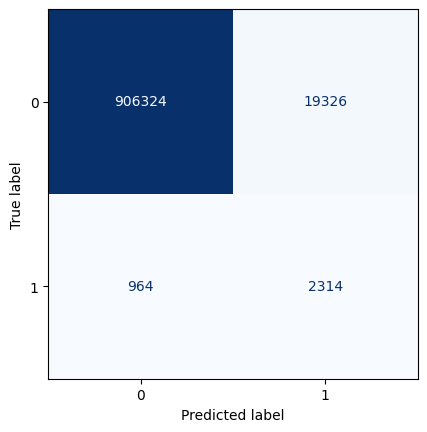

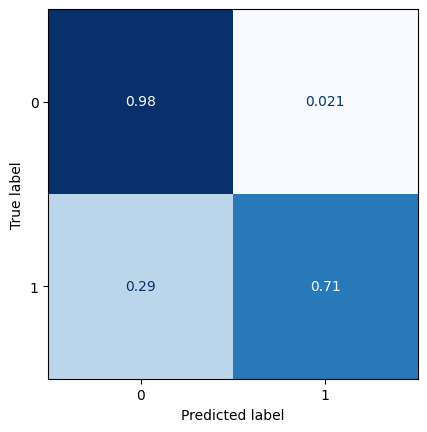

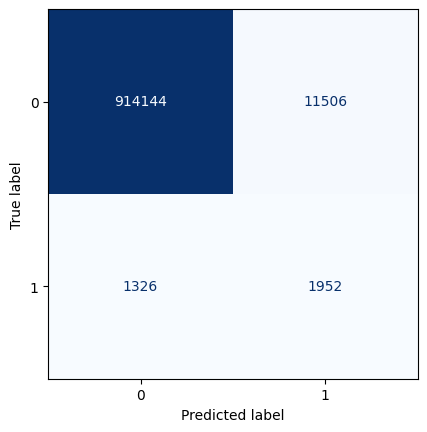

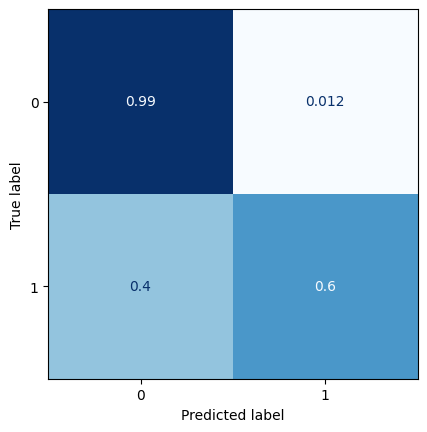

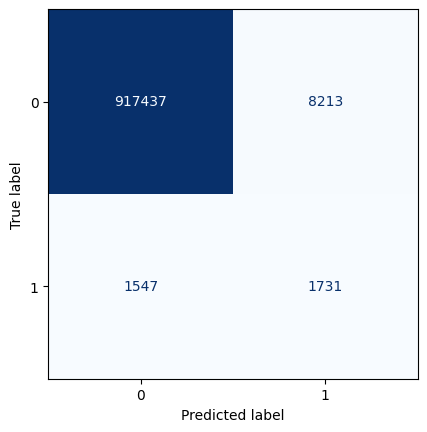

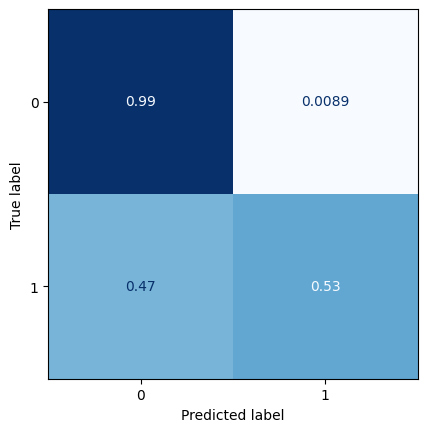

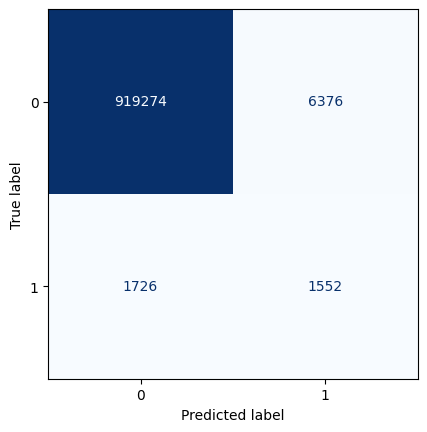

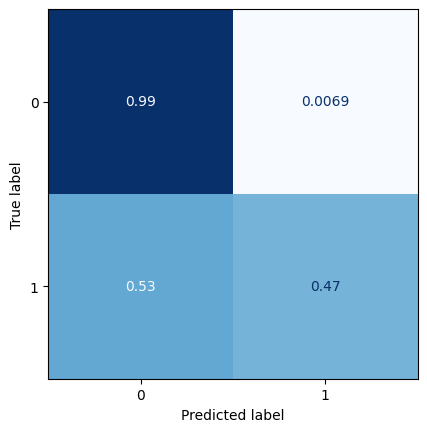

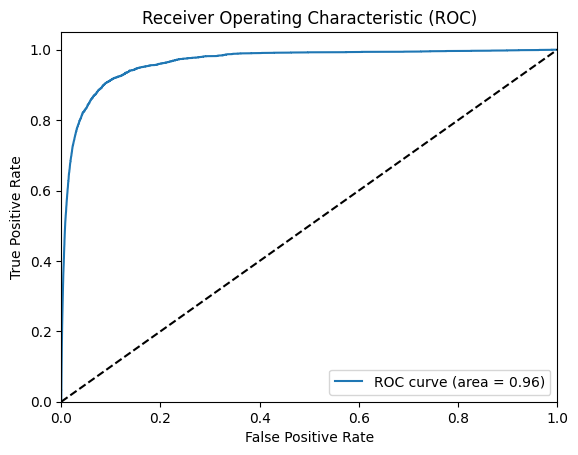

All zeros Brier score: 0.003528798787419477
Model Brier score: 0.0031380999744746304
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 30, 1)         73        
                                   

2023-03-28 11:06:13.081715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0924

2023-03-28 11:06:15.862402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0924 - val_loss: 0.0228
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0242 - val_loss: 0.0203
Epoch 3/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0216 - val_loss: 0.0187
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0203 - val_loss: 0.0183
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0196 - val_loss: 0.0176
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0192 - val_loss: 0.0176
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0188 - val_loss: 0.0172
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0185 - val_loss: 0.0172
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0184 - val_loss: 0.0174
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0182 - val_loss: 0.0168
E

2023-03-28 11:07:55.162788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


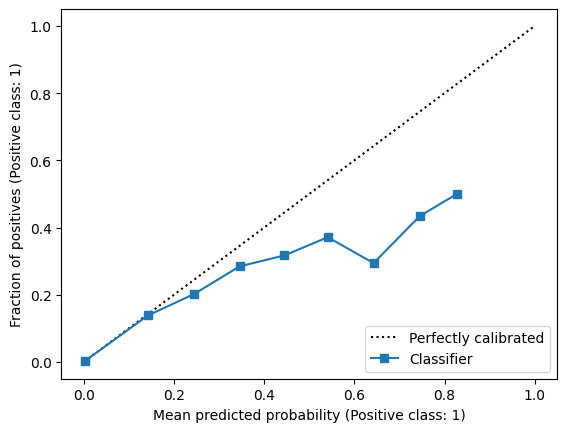

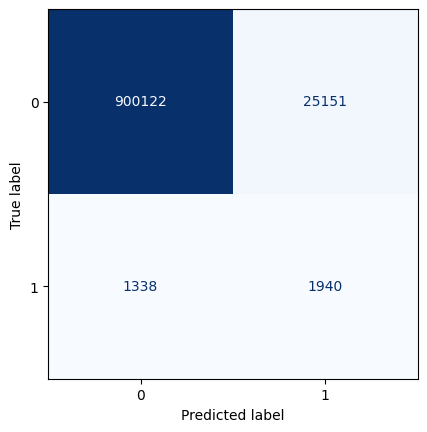

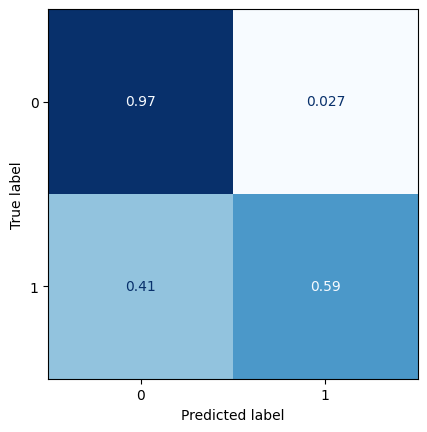

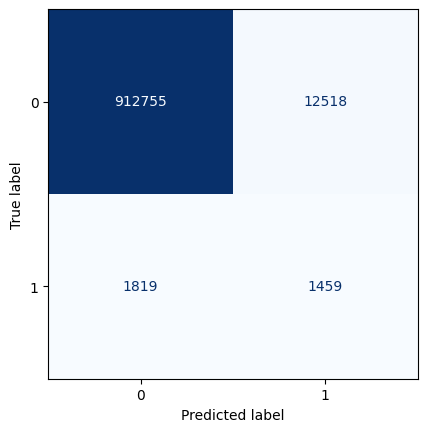

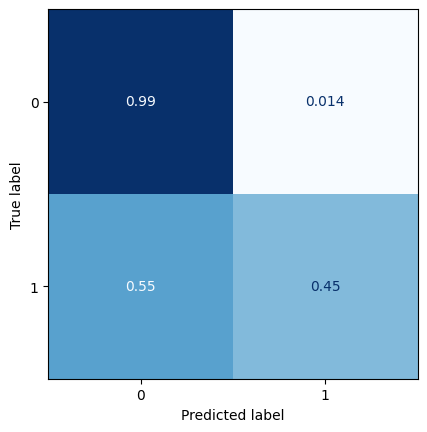

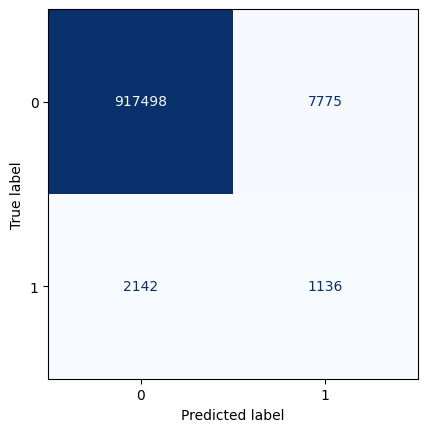

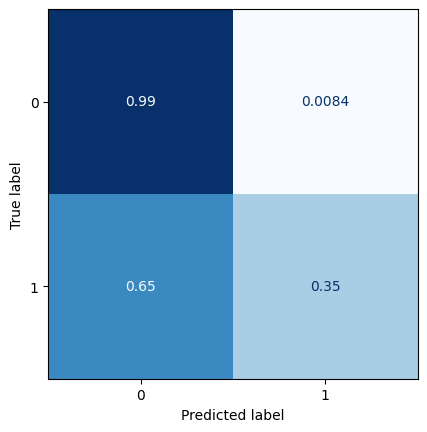

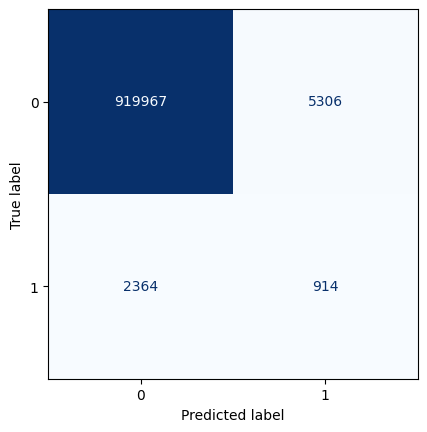

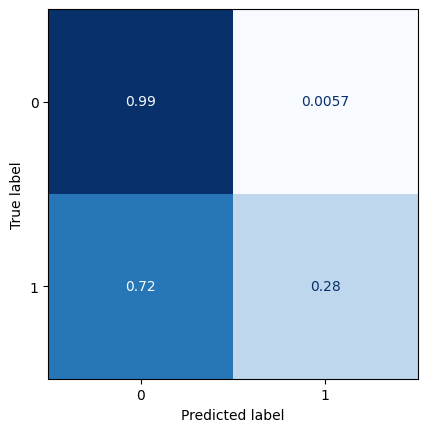

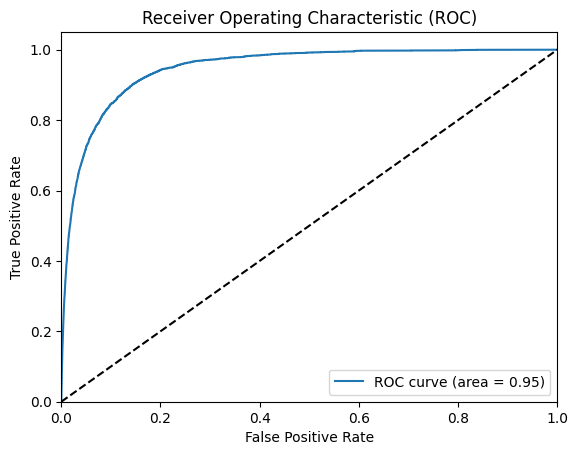

All zeros Brier score: 0.0035302315112470937
Model Brier score: 0.003340098371057907
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 30, 1)         73        
                                   

2023-03-28 11:08:12.666334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0430

2023-03-28 11:08:15.458858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0430 - val_loss: 0.0211
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0223 - val_loss: 0.0198
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0211 - val_loss: 0.0190
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0206 - val_loss: 0.0189
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0202 - val_loss: 0.0185
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0200 - val_loss: 0.0186
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0198 - val_loss: 0.0183
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0196 - val_loss: 0.0179
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0194 - val_loss: 0.0183
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0193 - val_loss: 0.0180
E

2023-03-28 11:10:23.722777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


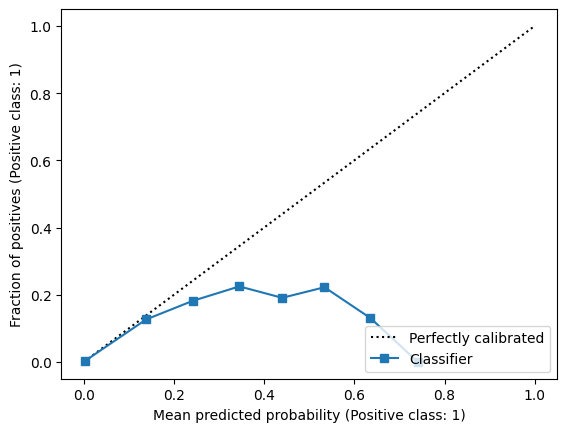

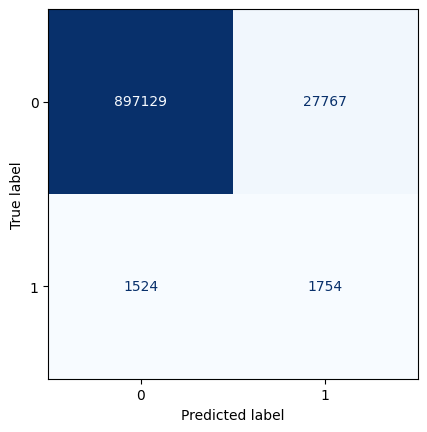

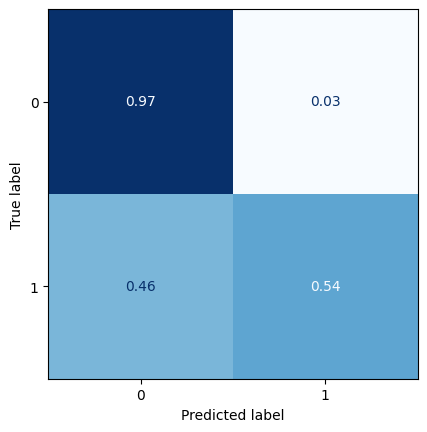

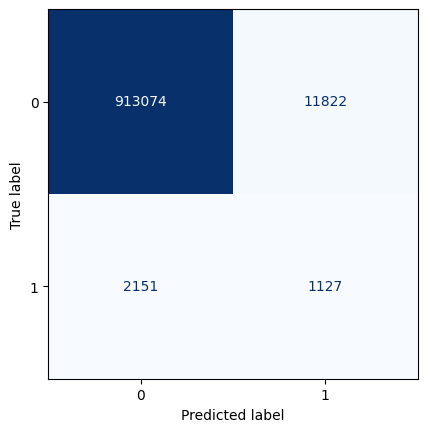

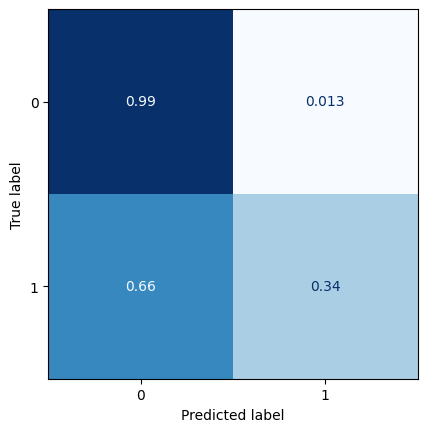

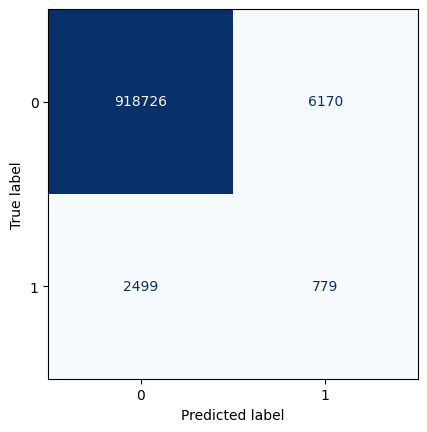

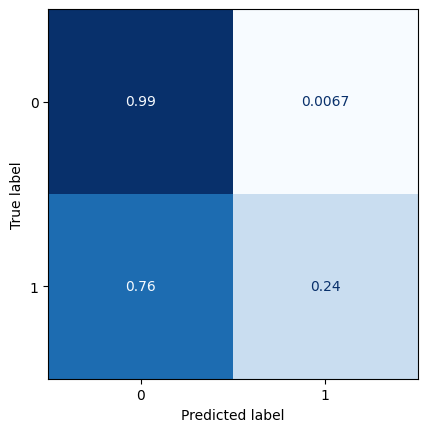

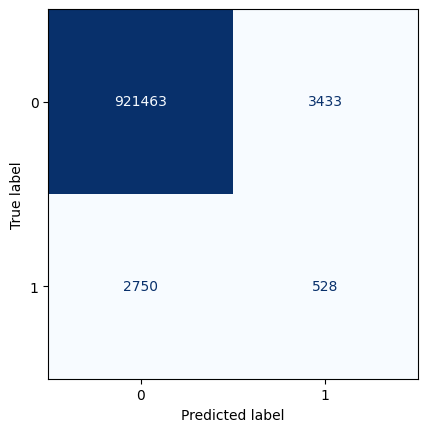

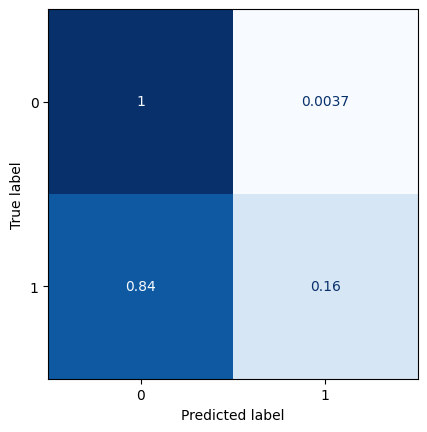

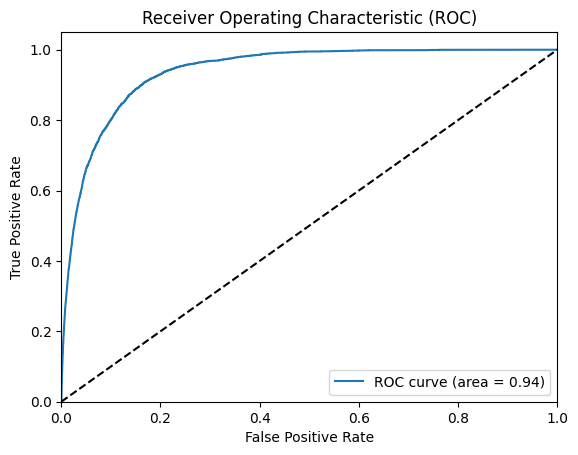

All zeros Brier score: 0.0035316653989445946
Model Brier score: 0.003369550319754776
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_5 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 30, 1)         73        
                                   

2023-03-28 11:10:41.885585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0708

2023-03-28 11:10:44.657780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0708 - val_loss: 0.0229
Epoch 2/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0242 - val_loss: 0.0207
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0225 - val_loss: 0.0200
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0218 - val_loss: 0.0195
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0214 - val_loss: 0.0190
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0211 - val_loss: 0.0192
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0208 - val_loss: 0.0188
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0207 - val_loss: 0.0186
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0205 - val_loss: 0.0190
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0204 - val_loss: 0.0191
E

2023-03-28 11:13:03.427060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


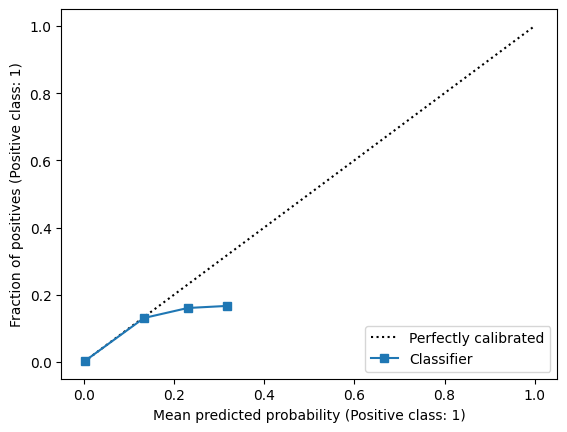

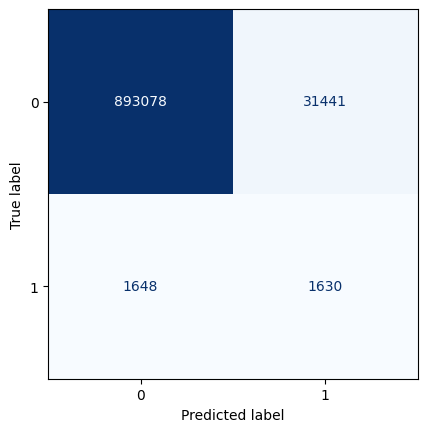

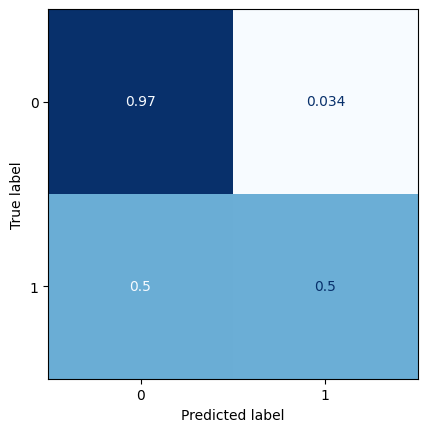

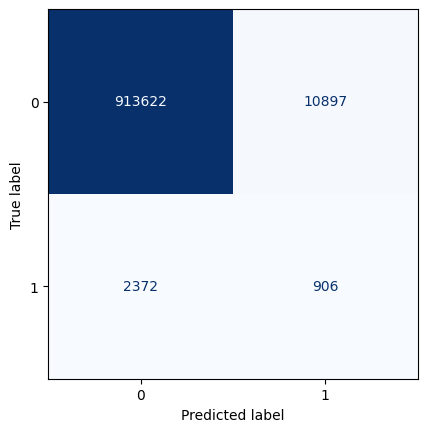

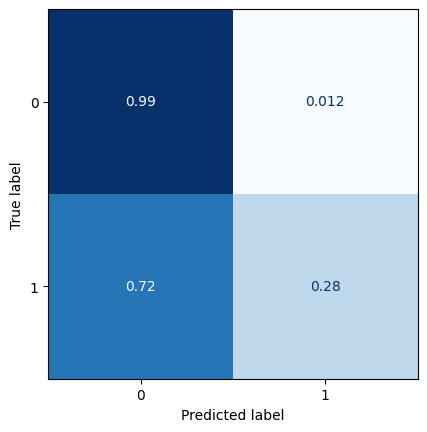

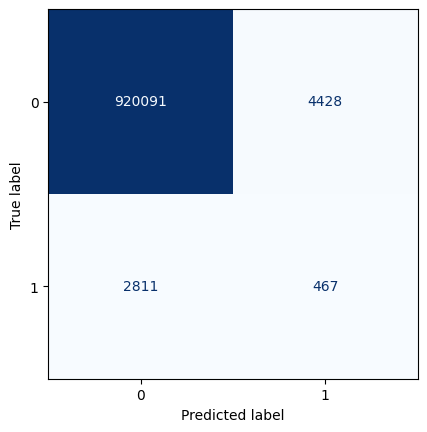

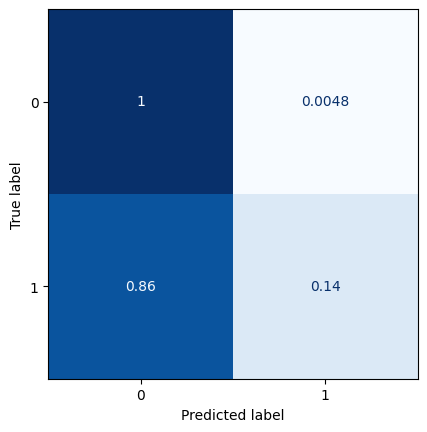

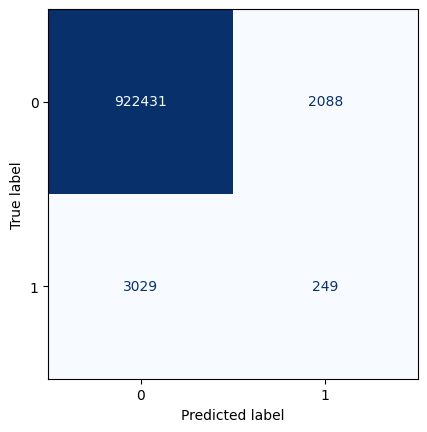

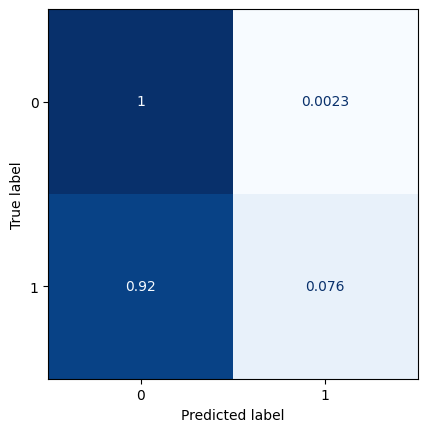

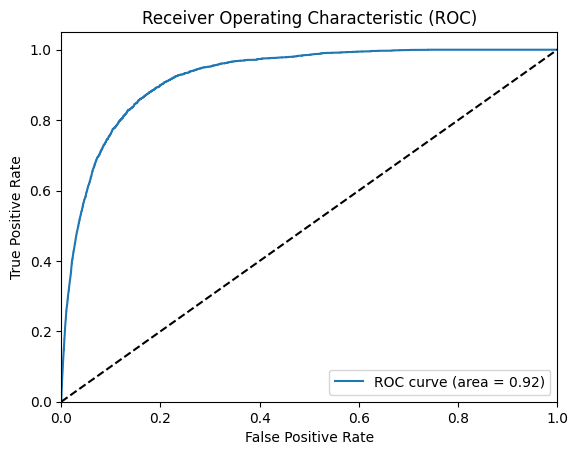

All zeros Brier score: 0.0035331004519307562
Model Brier score: 0.003414690807235763
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_6 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 30, 1)         73        
                                   

2023-03-28 11:13:22.381228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0669

2023-03-28 11:13:25.135576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0669 - val_loss: 0.0231
Epoch 2/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0246 - val_loss: 0.0209
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0230 - val_loss: 0.0203
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0222 - val_loss: 0.0197
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0218 - val_loss: 0.0196
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0215 - val_loss: 0.0192
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0212 - val_loss: 0.0191
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0211 - val_loss: 0.0196
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0209 - val_loss: 0.0196
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0208 - val_loss: 0.0193
E

2023-03-28 11:15:41.788530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


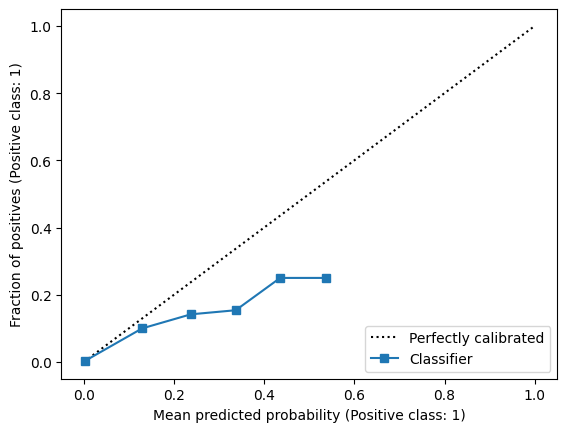

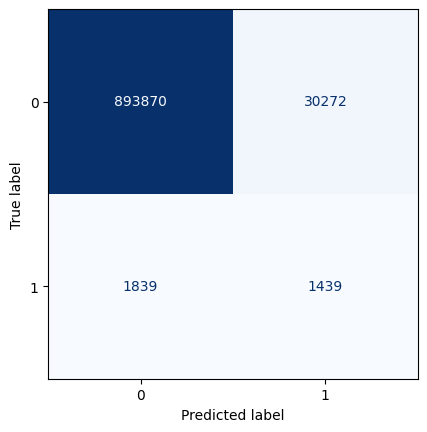

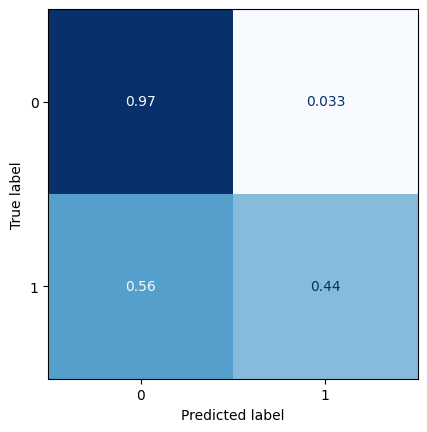

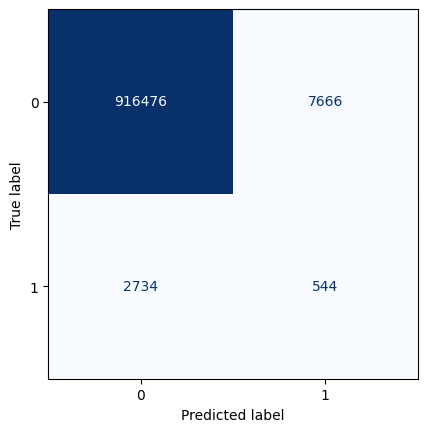

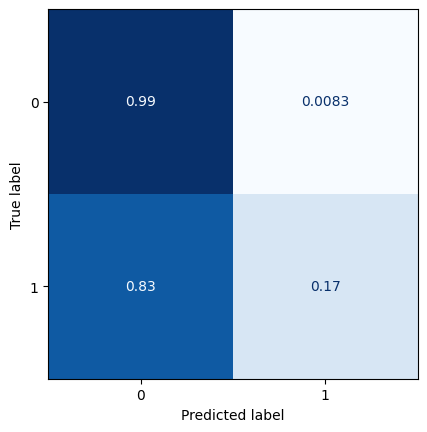

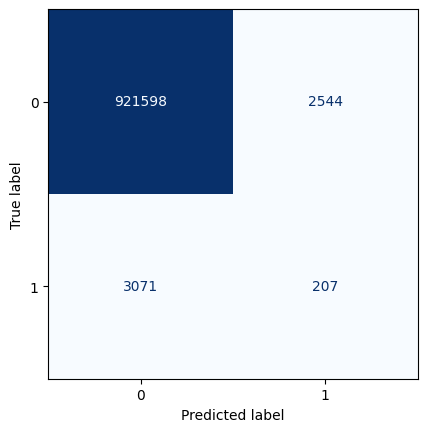

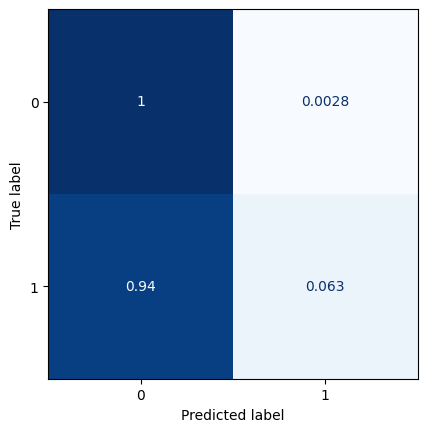

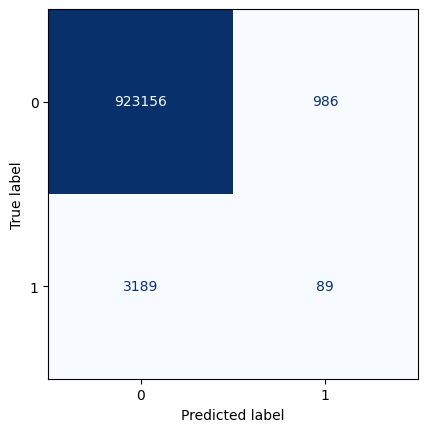

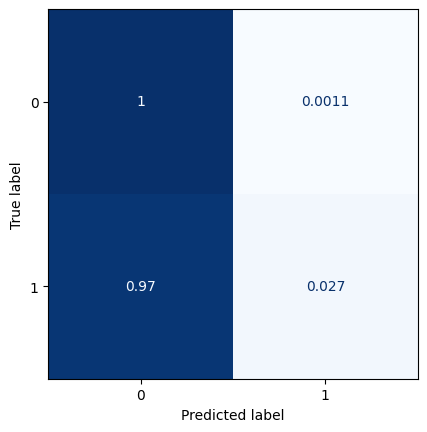

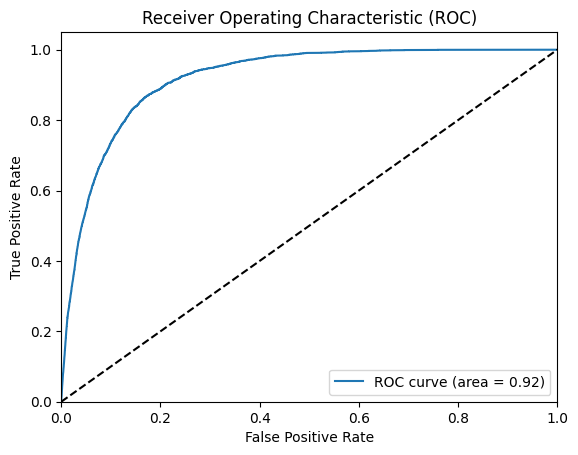

All zeros Brier score: 0.003534536671626663
Model Brier score: 0.003440155557271136
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_7 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 30, 1)         73        
                                    

2023-03-28 11:16:01.284930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.1477

2023-03-28 11:16:04.007383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.1477 - val_loss: 0.0267
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0278 - val_loss: 0.0232
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0253 - val_loss: 0.0220
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0241 - val_loss: 0.0213
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0232 - val_loss: 0.0205
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0225 - val_loss: 0.0202
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0220 - val_loss: 0.0200
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0217 - val_loss: 0.0199
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0215 - val_loss: 0.0195
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0214 - val_loss: 0.0194
E

2023-03-28 11:17:52.256299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 2ms/step


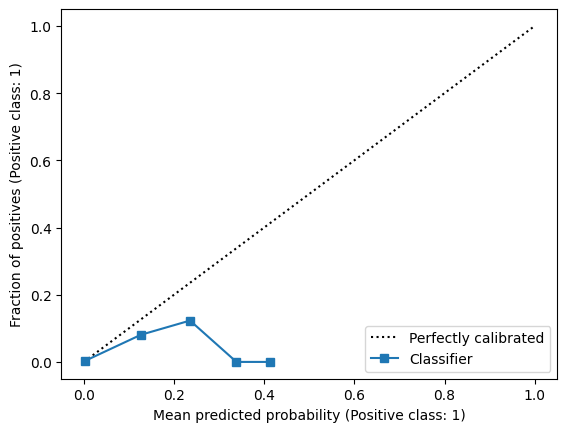

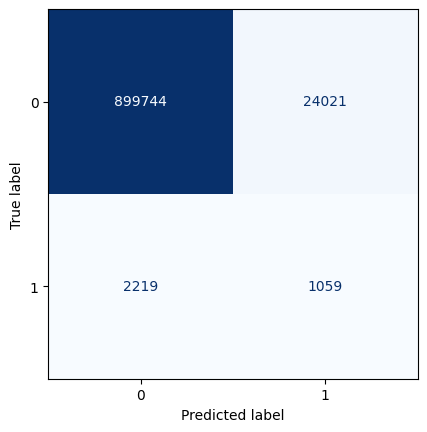

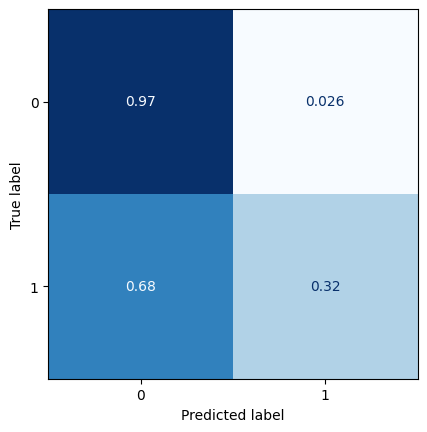

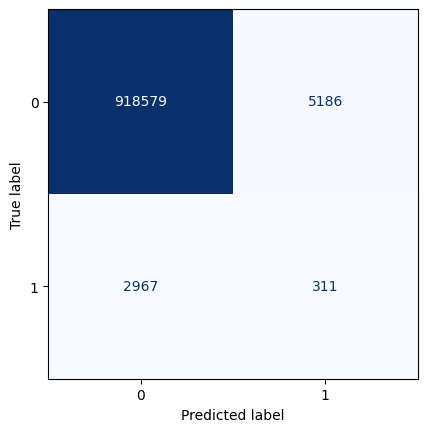

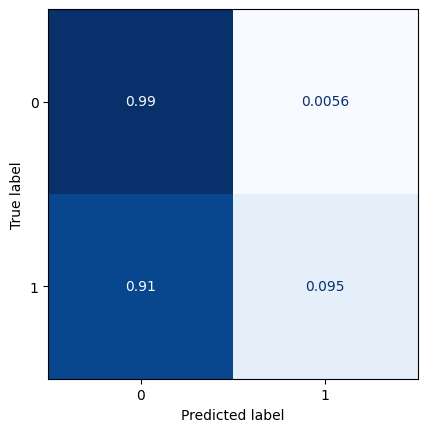

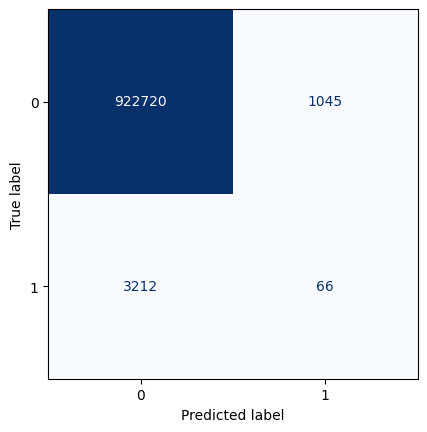

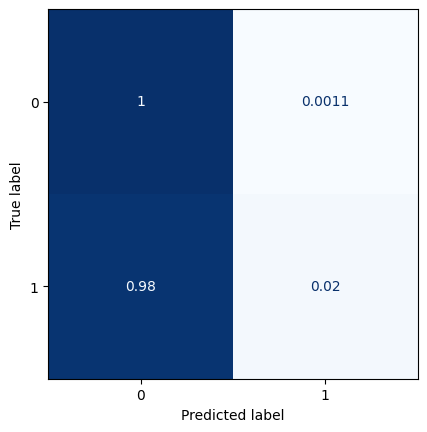

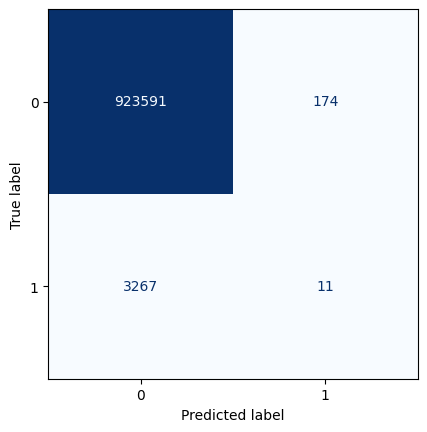

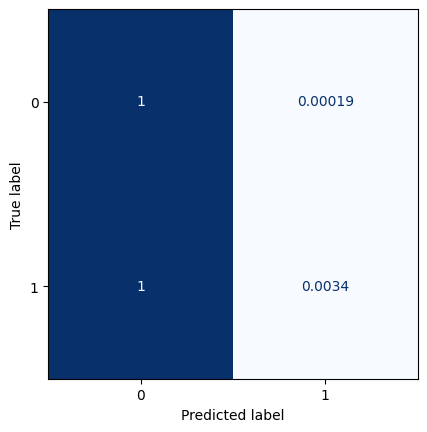

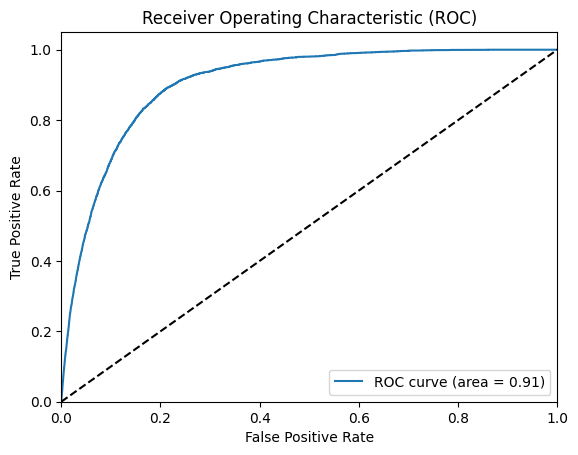

All zeros Brier score: 0.00353597405945571
Model Brier score: 0.0034597454648158136
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_8 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 30, 1)         73        
                                    

2023-03-28 11:18:12.313033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0451

2023-03-28 11:18:15.130543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0451 - val_loss: 0.0231
Epoch 2/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0242 - val_loss: 0.0213
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0228 - val_loss: 0.0205
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0222 - val_loss: 0.0199
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0218 - val_loss: 0.0199
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0216 - val_loss: 0.0194
Epoch 7/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0214 - val_loss: 0.0194
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0212 - val_loss: 0.0193
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0211 - val_loss: 0.0194
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0210 - val_loss: 0.0191
E

2023-03-28 11:19:39.004748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


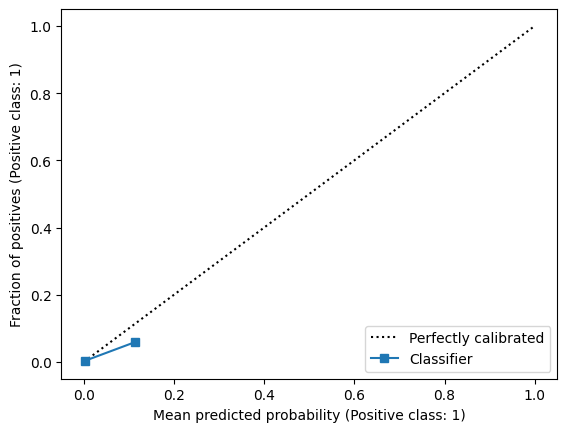

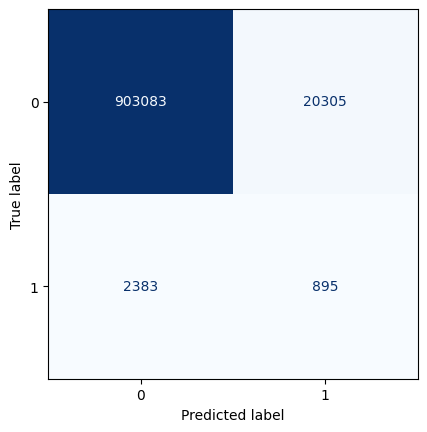

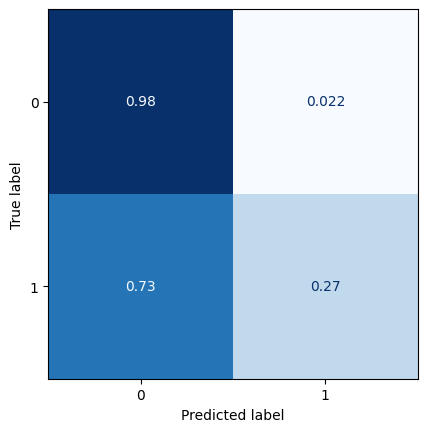

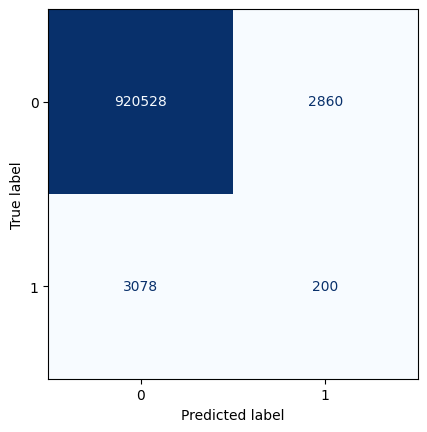

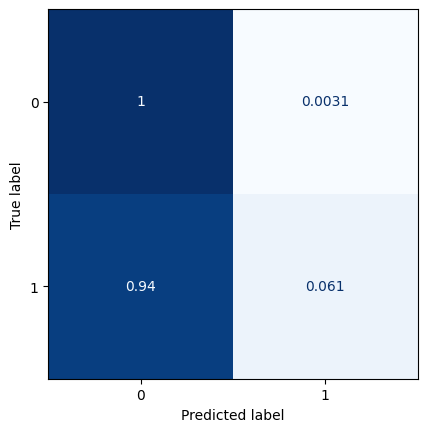

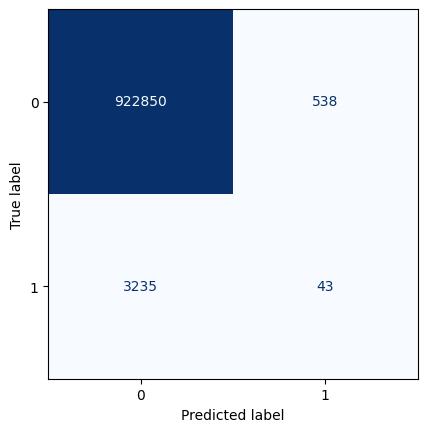

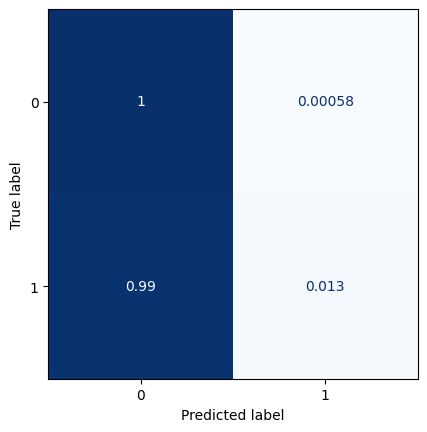

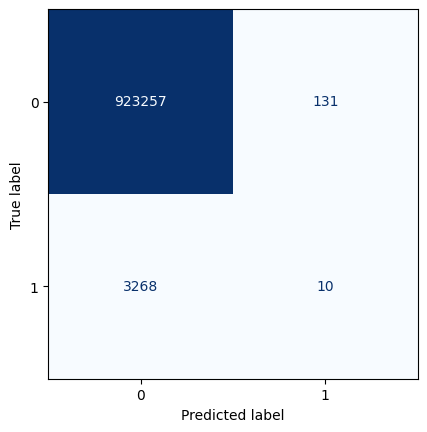

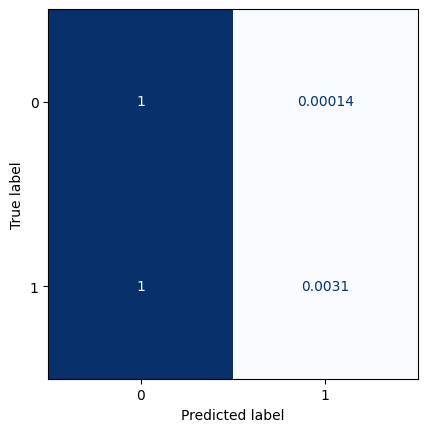

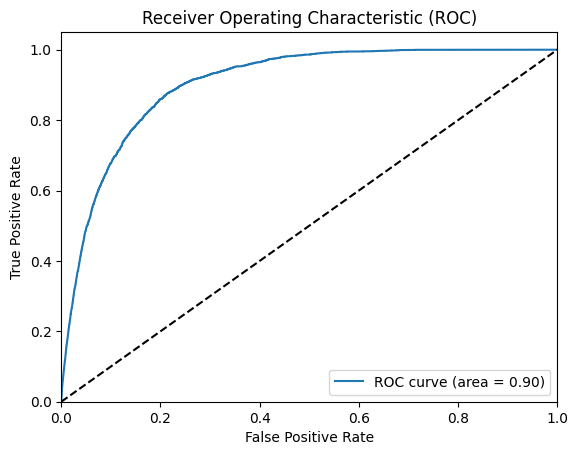

All zeros Brier score: 0.0035374126168436094
Model Brier score: 0.0034618074381382396
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 15, 8)         0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_9 (UpSampling  (None, 14, 30, 8)        0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 30, 1)         73        
                                  

2023-03-28 11:20:00.797013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0448

2023-03-28 11:20:03.640464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0448 - val_loss: 0.0227
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0238 - val_loss: 0.0211
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0226 - val_loss: 0.0205
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0221 - val_loss: 0.0203
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0218 - val_loss: 0.0202
Epoch 6/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0215 - val_loss: 0.0200
Epoch 7/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0214 - val_loss: 0.0201
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0213 - val_loss: 0.0197
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0212 - val_loss: 0.0198
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0211 - val_loss: 0.0201
E

2023-03-28 11:21:36.046377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


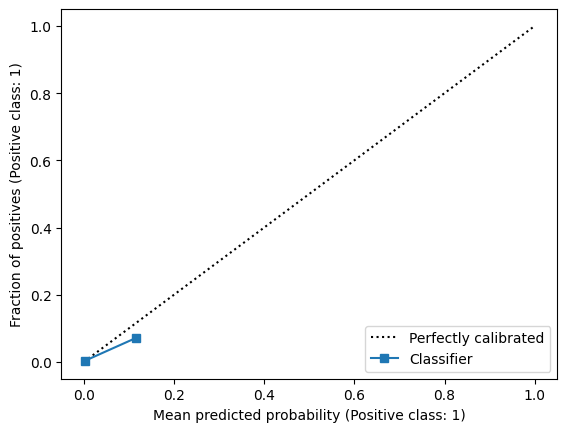

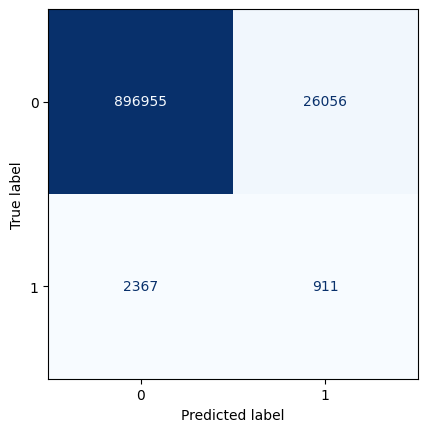

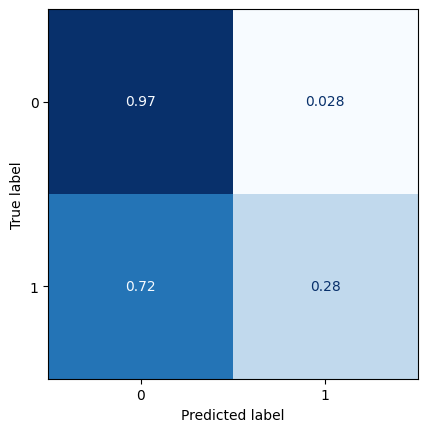

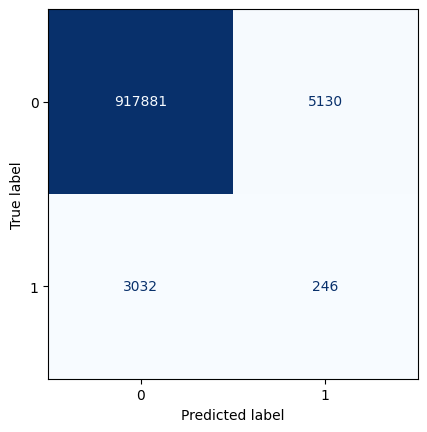

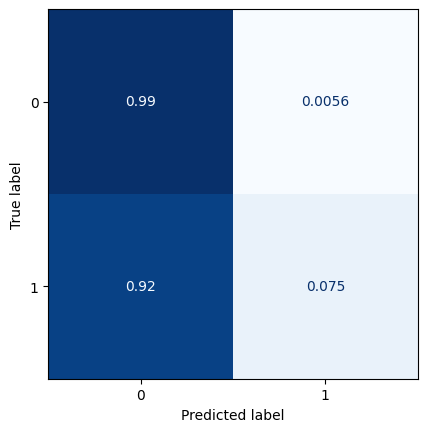

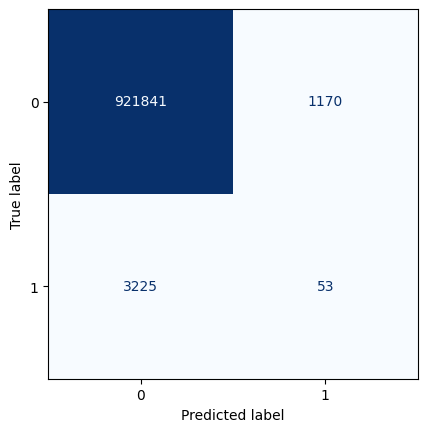

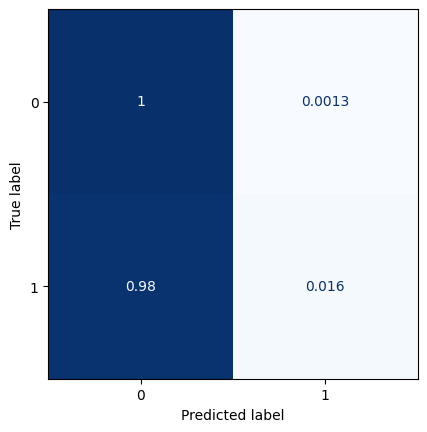

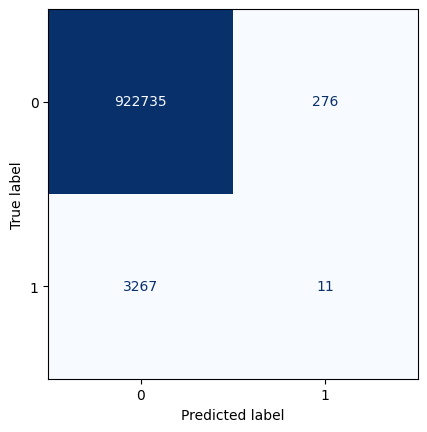

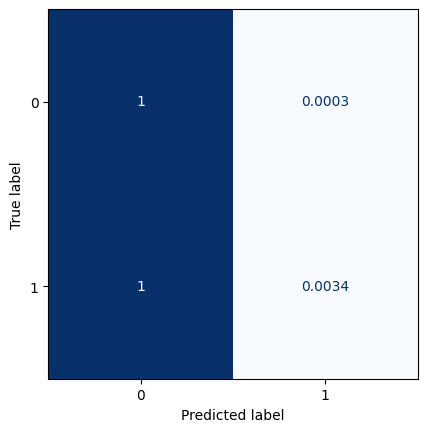

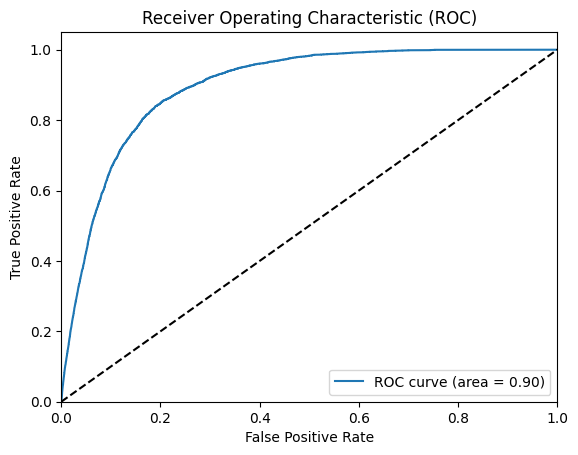

All zeros Brier score: 0.003538852345218393
Model Brier score: 0.0034784944757933795
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 30, 1)         73        
                                  

2023-03-28 11:21:57.965497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0600

2023-03-28 11:22:00.895264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 9ms/step - loss: 0.0600 - val_loss: 0.0233
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0243 - val_loss: 0.0216
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0232 - val_loss: 0.0208
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0226 - val_loss: 0.0205
Epoch 5/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0223 - val_loss: 0.0206
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0220 - val_loss: 0.0200
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0218 - val_loss: 0.0198
Epoch 8/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0216 - val_loss: 0.0202
Epoch 9/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0216 - val_loss: 0.0198
Epoch 10/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0214 - val_loss: 0.0196
E

2023-03-28 11:23:27.050857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


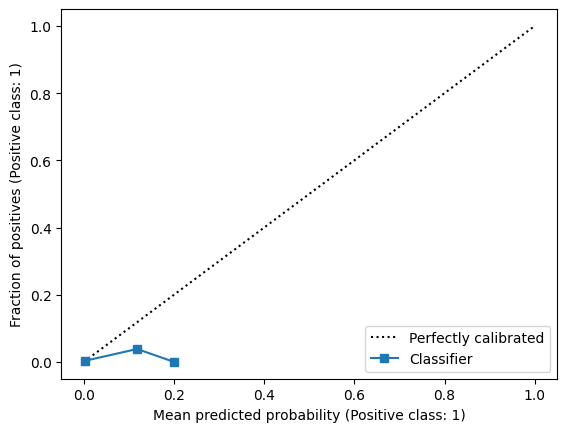

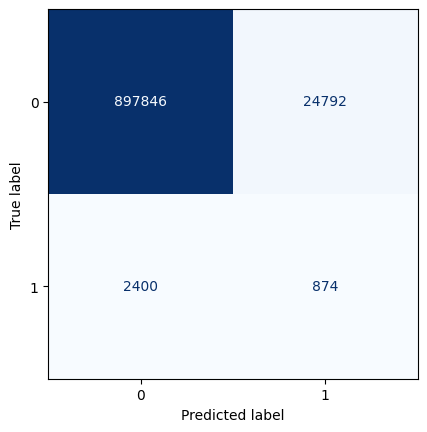

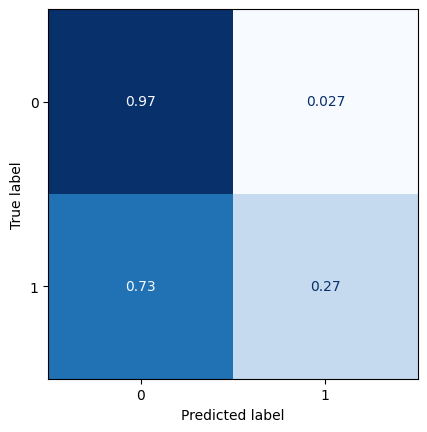

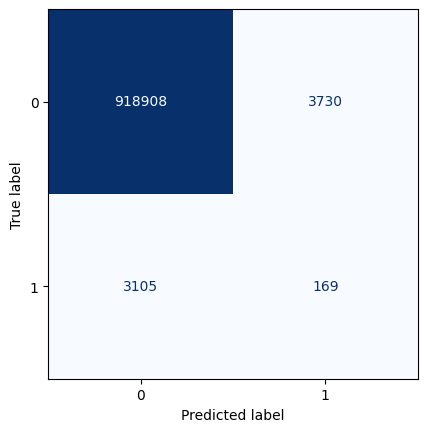

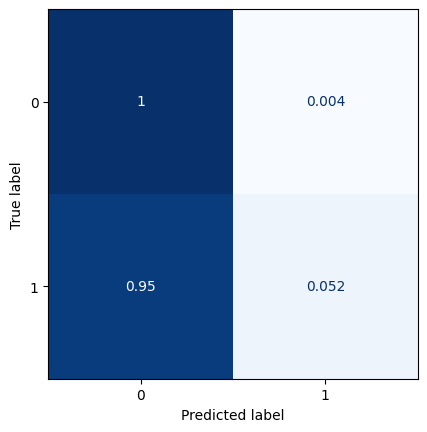

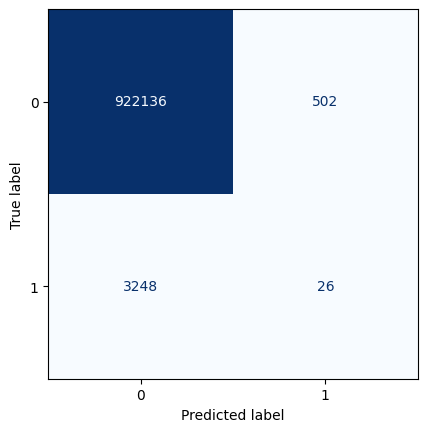

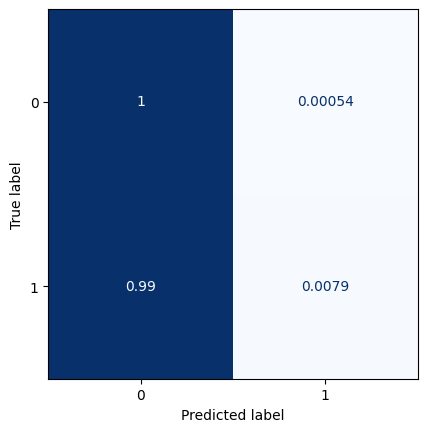

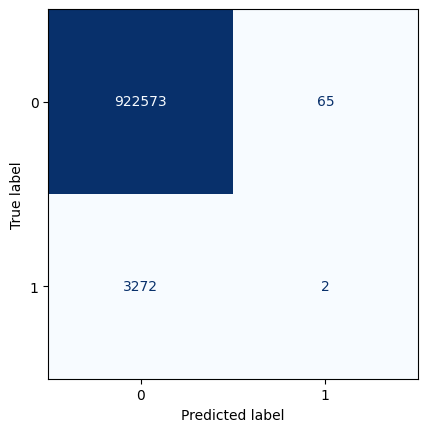

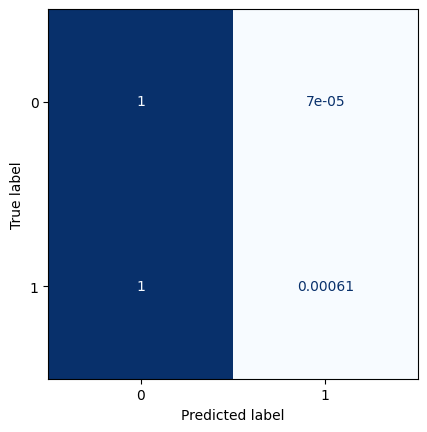

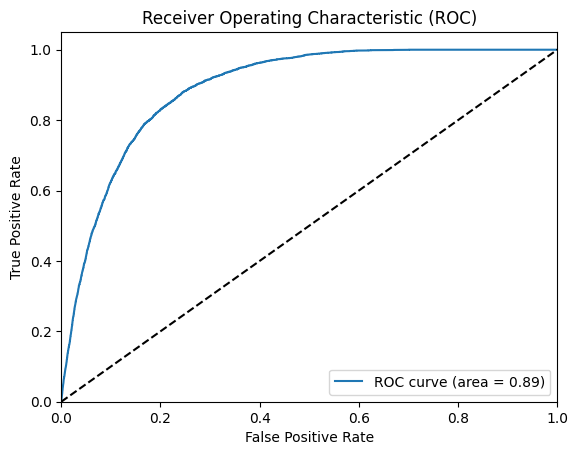

All zeros Brier score: 0.0035359731810366427
Model Brier score: 0.003477522258814916
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 30, 1)         73        
                                  

2023-03-28 11:23:49.444177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0537

2023-03-28 11:23:52.832610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 4s 10ms/step - loss: 0.0537 - val_loss: 0.0241
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0240 - val_loss: 0.0222
Epoch 3/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0230 - val_loss: 0.0215
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0223 - val_loss: 0.0205
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0220 - val_loss: 0.0203
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0217 - val_loss: 0.0203
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0216 - val_loss: 0.0205
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0215 - val_loss: 0.0200
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0214 - val_loss: 0.0199
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0213 - val_loss: 0.0199


2023-03-28 11:25:54.759172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


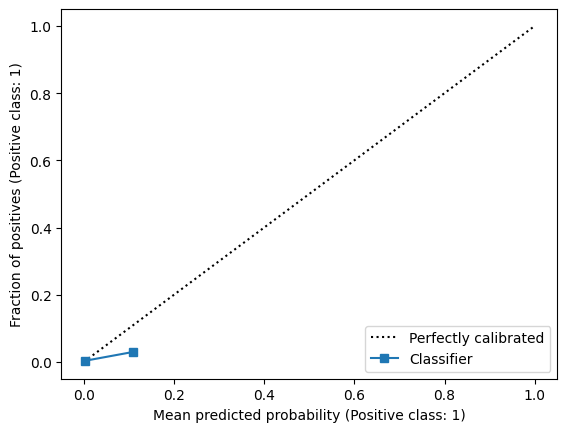

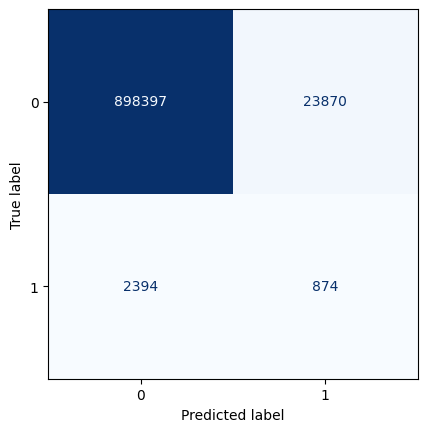

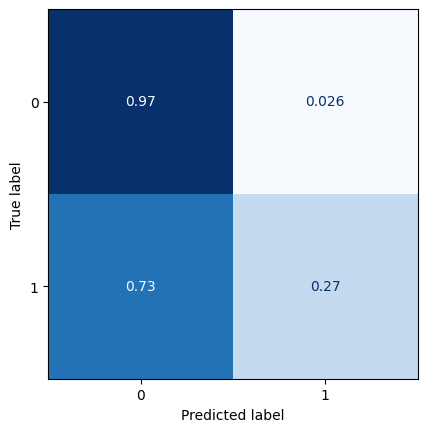

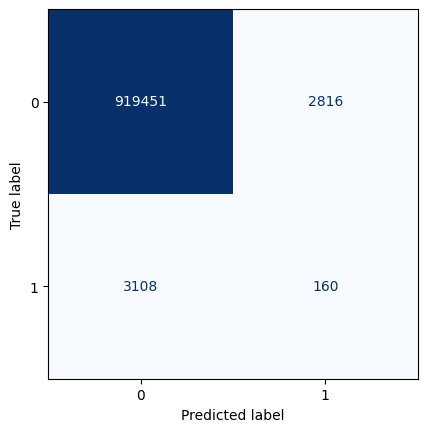

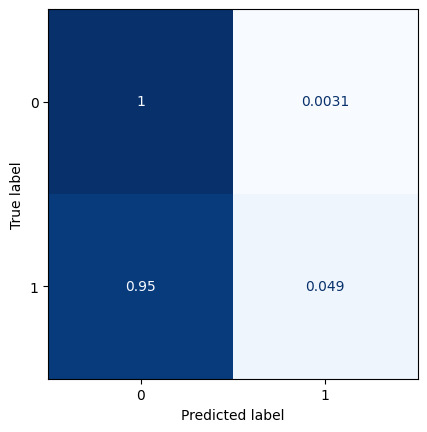

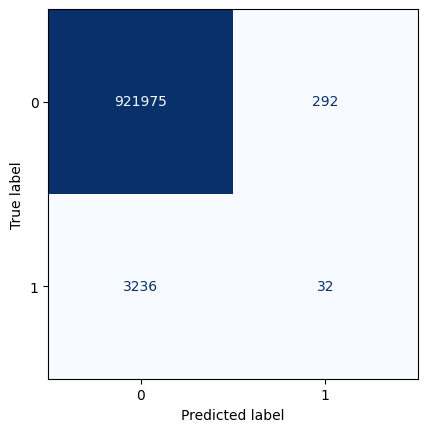

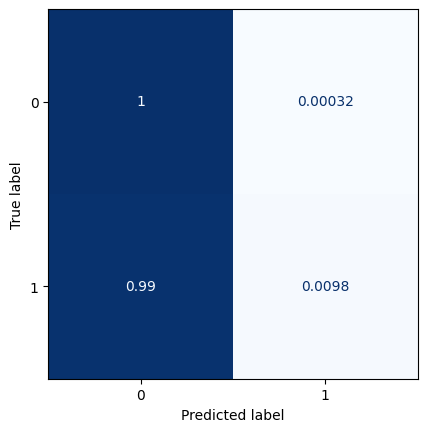

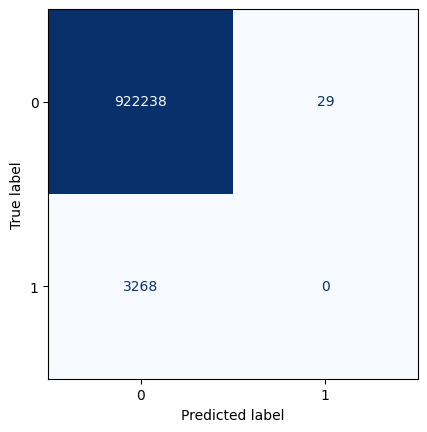

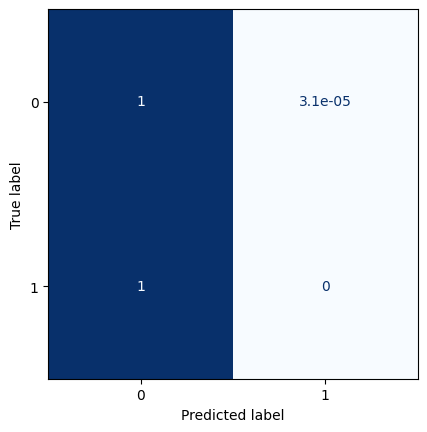

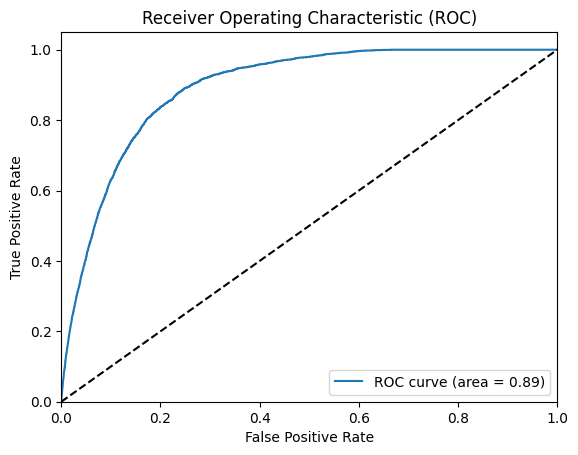

All zeros Brier score: 0.0035309307589664355
Model Brier score: 0.0034669633336080717
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_12 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 30, 1)         73        
                                 

2023-03-28 11:26:18.965733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0580

2023-03-28 11:26:21.812693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 8ms/step - loss: 0.0580 - val_loss: 0.0234
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0245 - val_loss: 0.0219
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0233 - val_loss: 0.0215
Epoch 4/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0226 - val_loss: 0.0209
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0222 - val_loss: 0.0207
Epoch 6/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0219 - val_loss: 0.0209
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0217 - val_loss: 0.0201
Epoch 8/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0216 - val_loss: 0.0203
Epoch 9/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0215 - val_loss: 0.0203
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0214 - val_loss: 0.0201
E

2023-03-28 11:27:48.416958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


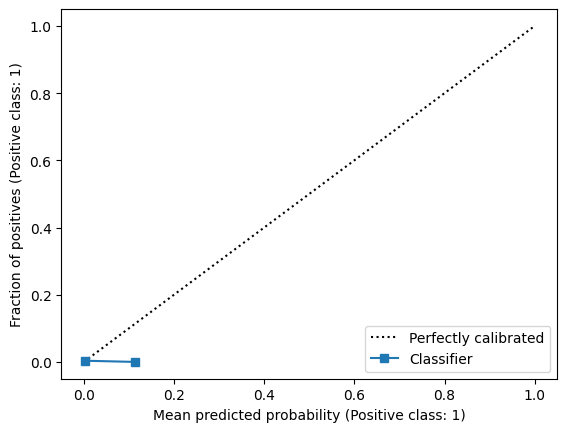

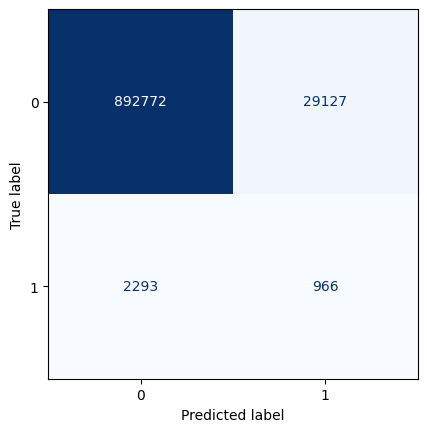

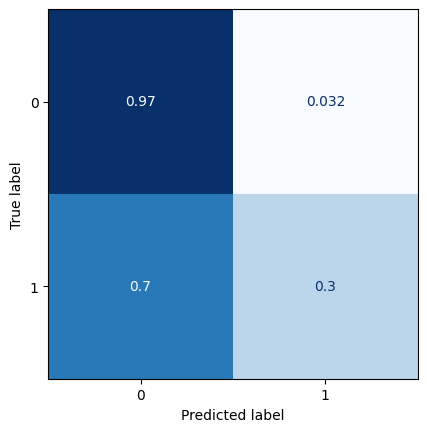

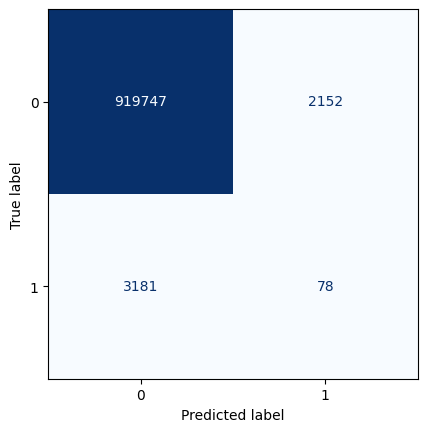

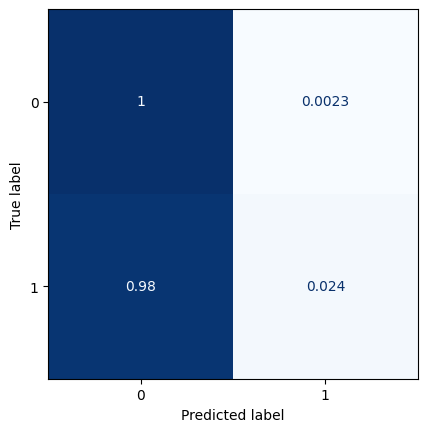

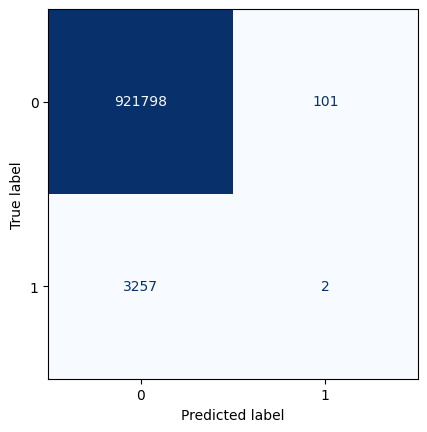

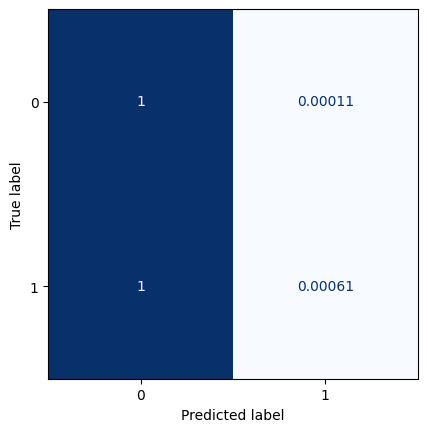

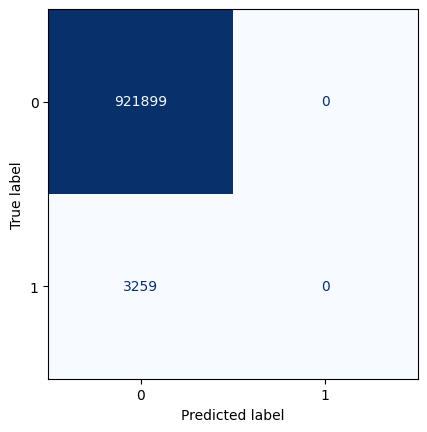

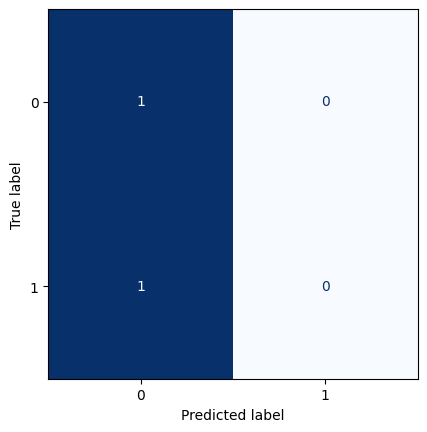

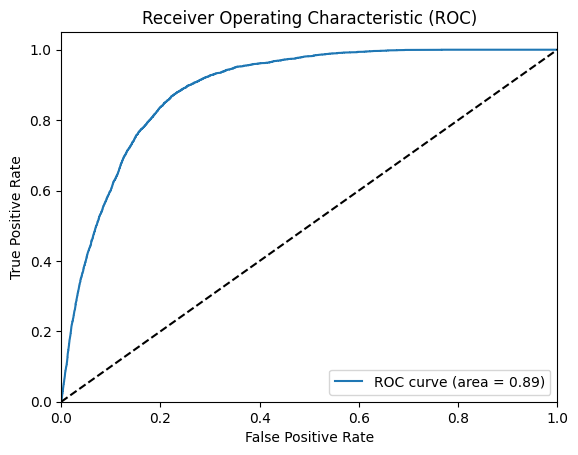

All zeros Brier score: 0.003522641537985944
Model Brier score: 0.0034647624830147837
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 13, 29, 8)         656       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 15, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 7, 15, 8)          584       
                                                                 
 up_sampling2d_13 (UpSamplin  (None, 14, 30, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 14, 30, 1)         73        
                                  

2023-03-28 11:28:12.650330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.0812

2023-03-28 11:28:15.620495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 3s 9ms/step - loss: 0.0812 - val_loss: 0.0253
Epoch 2/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0260 - val_loss: 0.0235
Epoch 3/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0242 - val_loss: 0.0222
Epoch 4/100
354/354 [==============================] - 3s 7ms/step - loss: 0.0233 - val_loss: 0.0217
Epoch 5/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0228 - val_loss: 0.0211
Epoch 6/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0224 - val_loss: 0.0208
Epoch 7/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0223 - val_loss: 0.0208
Epoch 8/100
354/354 [==============================] - 3s 9ms/step - loss: 0.0221 - val_loss: 0.0208
Epoch 9/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0219 - val_loss: 0.0207
Epoch 10/100
354/354 [==============================] - 3s 8ms/step - loss: 0.0218 - val_loss: 0.0206
E

2023-03-28 11:30:26.220758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


77/77 [==============================] - 0s 3ms/step


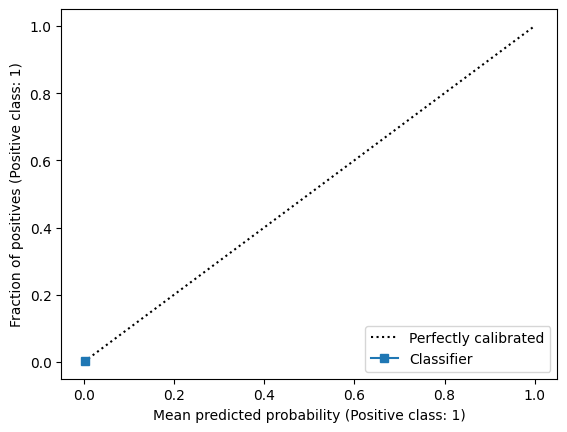

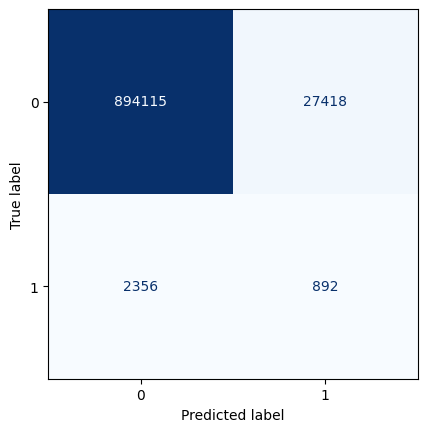

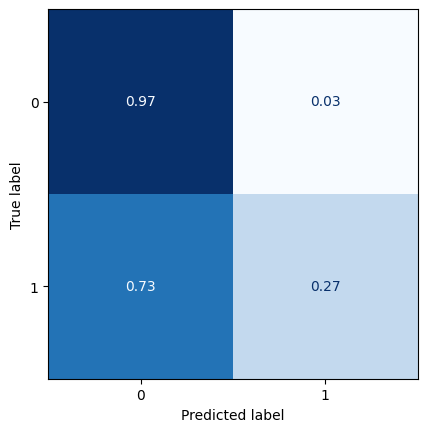

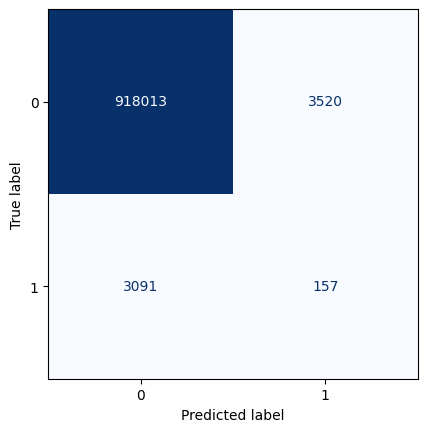

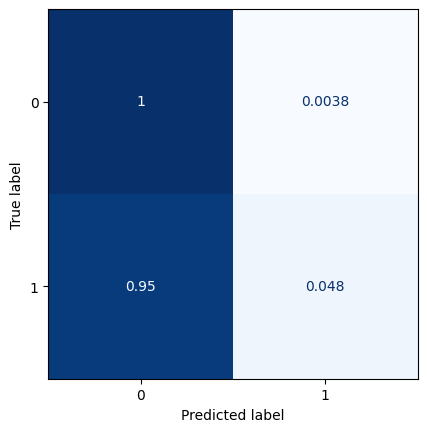

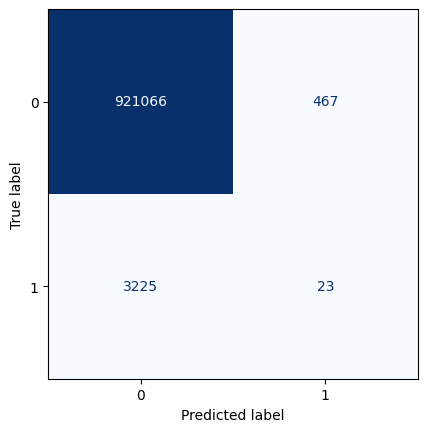

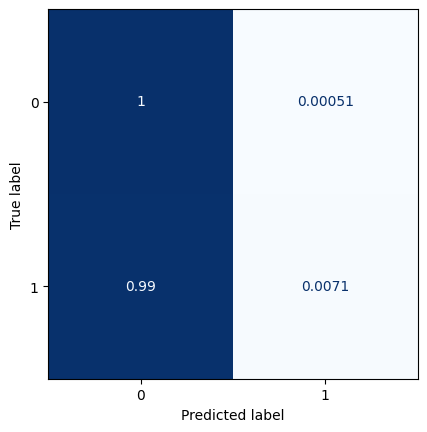

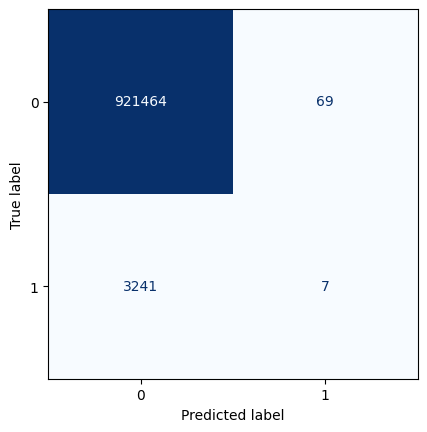

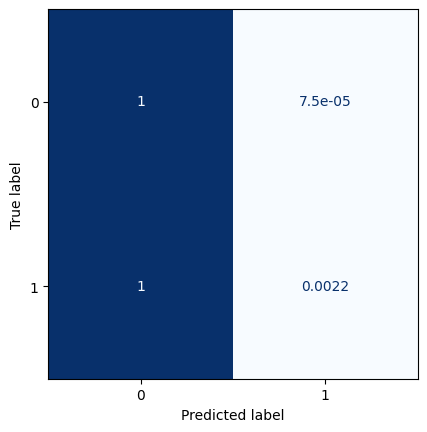

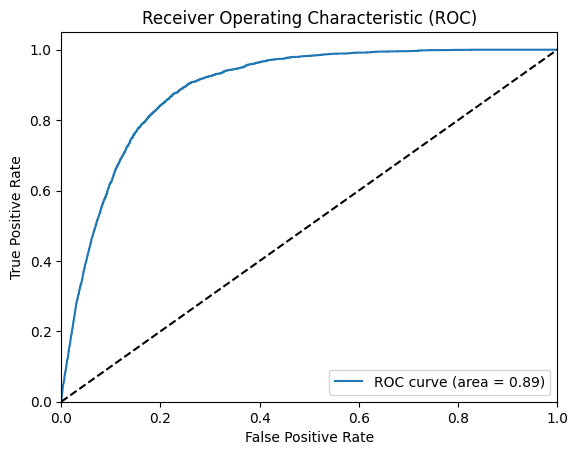

All zeros Brier score: 0.0035121828843801936
Model Brier score: 0.003456000968310353


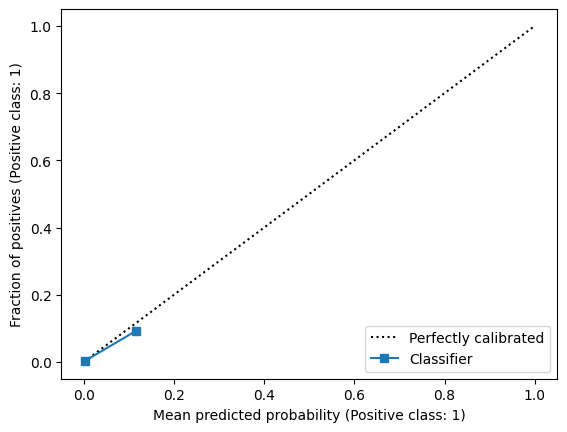

In [23]:
for lag in [1,2,3,4,5,6,7,8,9,10,11,12,13]:
    ### Model summary
    model = Sequential()
    model.add(layers.Input(shape=(13, 29, 9)))
    
    model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2,2)))
    
    model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities
    
    model.add(layers.Cropping2D(cropping=((0,1),(0,1))))
    
    model.summary()
    
    
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
            verbose=1, mode='auto', restore_best_weights=True)
    
    ### Model training
    model.fit(train_img_std[:-lag], y_train_img[lag:], validation_data=(val_img_std[:-lag],y_val_img[lag:]),
        callbacks=[monitor],epochs=100)
    
    ### Confusion matrices
    t = model.predict(test_img_std[:-lag])

    ranges = [0.025,0.05,0.075,0.1]
    
    for j in ranges:
        classes = []
        for i in t.reshape(-1,1):
            if i<=j: classes.append(0)
            else: classes.append(1)
    
        ConfusionMatrixDisplay(confusion_matrix(y_test_img[lag:].reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
        ConfusionMatrixDisplay(confusion_matrix(y_test_img[lag:].reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    
    ### ROC
    plot_roc(t.reshape(-1,1),y_test_img[lag:].reshape(-1,1))
    
    z = np.zeros((lag,13,29,1))
    tt = np.concatenate((t,z))
    test['predictions_lag'+str(lag)] = tt.reshape(-1,1)
    test.to_csv("test_with_newTarget_predictions.csv")
    
    ### calibration
    display = CalibrationDisplay.from_predictions(y_test_img[lag:].reshape(-1,1), t.reshape(-1,1), n_bins=10)
    print(f'All zeros Brier score: {brier_score_loss(y_test_img[lag:].reshape(-1,1), np.zeros(len(y_test_img[lag:].reshape(-1,1))))}')
    print(f'Model Brier score: {brier_score_loss(y_test_img[lag:].reshape(-1,1), t.reshape(-1,1))}')
    

In [29]:
test

Unnamed: 0        time  latitude  longitude        vo         r  \
34307        34307  2016-04-01       0.0       20.0  0.238973  1.386669   
34308        34308  2016-04-01       0.0       22.5 -0.172396  1.196522   
34309        34309  2016-04-01       0.0       25.0  1.188889  1.166772   
34310        34310  2016-04-01       0.0       27.5 -0.649707  1.063899   
34311        34311  2016-04-01       0.0       30.0 -0.629183  1.432846   
...            ...         ...       ...        ...       ...       ...   
963984      137600  2022-12-31     -30.0       80.0  0.677806 -1.271307   
963985      137601  2022-12-31     -30.0       82.5  0.898493 -1.325164   
963986      137602  2022-12-31     -30.0       85.0  1.629797 -1.468220   
963987      137603  2022-12-31     -30.0       87.5  0.280770 -1.453315   
963988      137604  2022-12-31     -30.0       90.0  0.144273 -1.521308   

           u_200     u_850     v_200     v_850       ttr       sst  \
34307  -0.945404  1.574206  0.511504  0.367981  2.652010 -1.588255   
34308  -0.819827  1.371793  0.717349  0.332262  3.396515 -1.588255   
34309  -0.571398  1.173488  0.662464  0.144802  4.092788 -1.588255   
34310  -0.385753  0.812011  0.713230  0.584284  4.044557 -1.588255   
34311  -0.362931  0.809212  0.888739 -0.207576  3.438931 -1.588255   
...          ...       ...       ...       ...       ...       ...   
963984  0.290892 -0.727302  0.813190 -0.684904 -0.431475  0.601392   
963985  0.224460 -0.764678  1.178495 -0.105389 -0.107881  0.599524   
963986  0.376651 -0.566606  1.728863  0.450626 -0.082227  0.597113   
963987  0.621629 -0.446284  2.368318  0.792994 -0.000815  0.594579   
963988  0.772832 -0.256407  3.168040  0.892072  0.061783  0.591581   

        new_target  Real_tom_target     shear  target  predictions_lag0  \
34307          0.0              0.0 -0.516292       0      5.599760e-06   
34308          0.0              0.0 -0.755886       0      8.091185e-07   
34309          0.0              0.0 -1.161314       0      5.273907e-07   
34310          0.0              0.0 -1.507685       0      4.937469e-07   
34311          0.0              0.0 -1.154385       0      9.038527e-07   
...            ...              ...       ...     ...               ...   
963984         0.0              0.0  0.050674       0      5.519601e-03   
963985         0.0              0.0  0.004080       0      3.107689e-03   
963986         0.0              0.0  0.220205       0      1.299448e-03   
963987         0.0              0.0  0.648118       0      6.500229e-04   
963988         0.0              0.0  1.062165       0      1.026556e-03   

        predictions_lag1  predictions_lag2  predictions_lag3  \
34307       1.116584e-05          0.000032          0.000440   
34308       3.770019e-07          0.000002          0.000008   
34309       1.280818e-07          0.000003          0.000005   
34310       6.390888e-08          0.000009          0.000003   
34311       1.089020e-07          0.000020          0.000004   
...                  ...               ...               ...   
963984      0.000000e+00          0.000000          0.000000   
963985      0.000000e+00          0.000000          0.000000   
963986      0.000000e+00          0.000000          0.000000   
963987      0.000000e+00          0.000000          0.000000   
963988      0.000000e+00          0.000000          0.000000   

        predictions_lag4  predictions_lag5  predictions_lag6  \
34307       1.698381e-04      4.817998e-06      3.752636e-05   
34308       1.457031e-06      6.148791e-08      6.037646e-07   
34309       5.989831e-07      3.379468e-08      3.775615e-07   
34310       9.002248e-07      3.109205e-08      8.725253e-08   
34311       1.546370e-06      4.021748e-08      5.431863e-08   
...                  ...               ...               ...   
963984      0.000000e+00      0.000000e+00      0.000000e+00   
963985      0.000000e+00      0.000000e+00      0.000000e+00   
963986      0.000000

# Save results and new metric

In [24]:
a1 = test.target.values.reshape(1,-1)
a1

array([[0, 0, 0, ..., 0, 0, 0]])

In [25]:
a2 = y_test_img.reshape(1,-1)
a2

array([[0., 0., 0., ..., 0., 0., 0.]])

In [26]:
a_diff = a1-a2

In [27]:
a_diff[a_diff>0]

array([], dtype=float64)

In [28]:
test['predictions'] = t.reshape(-1,1)
test['predictions_onlySea'] = t_onlySea.reshape(-1,1)

ValueError: Length of values (924781) does not match length of index (929682)

In [ ]:
test

In [ ]:
test.to_csv("test_with_newTarget_predictions.csv")

In [ ]:
import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")

from aux import compute_cyclones

cyclones_real = compute_cyclones(test[test.target==1],2.5)

cyclones_predicted = compute_cyclones(test[test.predictions>=0.025],2.5)

TC_founds = 0 
    
for TC in cyclones_real:
    found = 0 
    for point in TC:
        reduced = test[(test.predictions>=0.025) & (test.time==point[2]) & (test.latitude==point[0]) & (test.longitude==point[1])]
        if reduced.shape[0]>=1:
            found = 1
    if found == 1: TC_founds+=1
        
print(f'Number of test TCs: {len(cyclones_real)}\n')
print(f'Number of test TCs correctly predicted: {TC_founds}\n')
print(f'Number of test TCs predicted, correctly or not: {len(cyclones_predicted)}\n')
print(f'Number of test TCs predicted but not happening: {len(cyclones_predicted)-TC_founds}\n')



In [ ]:
import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")

from aux import compute_cyclones

cyclones_real = compute_cyclones(test[test.target==1],2.5)

cyclones_predicted = compute_cyclones(test[test.predictions>=0.05],2.5)

TC_founds = 0 
    
for TC in cyclones_real:
    found = 0 
    for point in TC:
        reduced = test[(test.predictions>=0.05) & (test.time==point[2]) & (test.latitude==point[0]) & (test.longitude==point[1])]
        if reduced.shape[0]>=1:
            found = 1
    if found == 1: TC_founds+=1
        
print(f'Number of test TCs: {len(cyclones_real)}\n')
print(f'Number of test TCs correctly predicted: {TC_founds}\n')
print(f'Number of test TCs predicted, correctly or not: {len(cyclones_predicted)}\n')
print(f'Number of test TCs predicted but not happening: {len(cyclones_predicted)-TC_founds}\n')



In [ ]:
import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")

from aux import compute_cyclones

cyclones_real = compute_cyclones(test.loc[(test.target==1) & (test.time<='2019-12-01')],2.5)

cyclones_predicted = compute_cyclones(test.loc[(test.predictions>=0.1) & (test.time<='2019-12-01')],2.5)

TC_founds = 0 
    
for TC in cyclones_real:
    found = 0 
    for point in TC:
        reduced = test[(test.predictions>=0.05) & (test.time==point[2]) & (test.latitude==point[0]) & (test.longitude==point[1])]
        if reduced.shape[0]>=1:
            found = 1
    if found == 1: TC_founds+=1
        
print(f'Number of test TCs: {len(cyclones_real)}\n')
print(f'Number of test TCs correctly predicted: {TC_founds}\n')
print(f'Number of test TCs predicted, correctly or not: {len(cyclones_predicted)}\n')
print(f'Number of test TCs predicted but not happening: {len(cyclones_predicted)-TC_founds}\n')



In [ ]:
import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")

from aux import compute_cyclones

cyclones_real = compute_cyclones(test[test.target_sea==1],2.5)

cyclones_predicted = compute_cyclones(test[test.predictions_onlySea>=0.025],2.5)

TC_founds = 0 
    
for TC in cyclones_real:
    found = 0 
    for point in TC:
        reduced = test[(test.predictions_onlySea>=0.025) & (test.time==point[2]) & (test.latitude==point[0]) & (test.longitude==point[1])]
        if reduced.shape[0]>=1:
            found = 1
    if found == 1: TC_founds+=1
        
print(f'Number of test TCs: {len(cyclones_real)}\n')
print(f'Number of test TCs correctly predicted: {TC_founds}\n')
print(f'Number of test TCs predicted, correctly or not: {len(cyclones_predicted)}\n')
print(f'Number of test TCs predicted but not happening: {len(cyclones_predicted)-TC_founds}\n')



In [ ]:
import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")

from aux import compute_cyclones

cyclones_real = compute_cyclones(test[test.target_sea==1],2.5)

cyclones_predicted = compute_cyclones(test[test.predictions_onlySea>=0.05],2.5)

TC_founds = 0 
    
for TC in cyclones_real:
    found = 0 
    for point in TC:
        reduced = test[(test.predictions_onlySea>=0.05) & (test.time==point[2]) & (test.latitude==point[0]) & (test.longitude==point[1])]
        if reduced.shape[0]>=1:
            found = 1
    if found == 1: TC_founds+=1
        
print(f'Number of test TCs: {len(cyclones_real)}\n')
print(f'Number of test TCs correctly predicted: {TC_founds}\n')
print(f'Number of test TCs predicted, correctly or not: {len(cyclones_predicted)}\n')
print(f'Number of test TCs predicted but not happening: {len(cyclones_predicted)-TC_founds}\n')



In [ ]:
import sys
sys.path.append("/Users/paolo/Documents/TC/Paolo/scripts/")

from aux import compute_cyclones

cyclones_real = compute_cyclones(test.loc[(test.target_sea==1) & (test.time<='2019-12-01')],2.5)

cyclones_predicted = compute_cyclones(test.loc[(test.predictions_onlySea>=0.1) & (test.time<='2019-12-01')],2.5)

TC_founds = 0 
    
for TC in cyclones_real:
    found = 0 
    for point in TC:
        reduced = test[(test.predictions_onlySea>=0.1) & (test.time==point[2]) & (test.latitude==point[0]) & (test.longitude==point[1])]
        if reduced.shape[0]>=1:
            found = 1
    if found == 1: TC_founds+=1
        
print(f'Number of test TCs: {len(cyclones_real)}\n')
print(f'Number of test TCs correctly predicted: {TC_founds}\n')
print(f'Number of test TCs predicted, correctly or not: {len(cyclones_predicted)}\n')
print(f'Number of test TCs predicted but not happening: {len(cyclones_predicted)-TC_founds}\n')



# Higher threshold for class 1

In [ ]:
train['target'] = train.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)
test['target'] = test.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)
val['target'] = val.apply(lambda x: 1 if x.Real_tom_target>=70 else 0,axis=1)

y_train = train.loc[:,['target','latitude','longitude','time']]
y_val = val.loc[:,['target','latitude','longitude','time']]
y_test = test.loc[:,['target','latitude','longitude','time']]

In [ ]:
y_train_img = extract_images(y_train, variables, verbose=True)
y_val_img = extract_images(y_val, variables, verbose=True)
y_test_img = extract_images(y_test, variables, verbose=True)


In [ ]:
model = Sequential()
model.add(layers.Input(shape=(13, 29, 9)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

#model.add(layers.Flatten())

#model.add(layers.Reshape((2,4,16)))

model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2,2)))

model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')) # sigmoidal activation to have probabilities

model.add(layers.Cropping2D(cropping=((0,1),(0,1))))

model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)


In [ ]:
model.fit(train_img_std, y_train_img, validation_data=(val_img_std,y_val_img),
        callbacks=[monitor],epochs=100)

In [ ]:
t = model.predict(test_img_std)

ranges = [0.025,0.05,0.075,0.1]

for j in ranges:
    classes = []
    for i in t.reshape(-1,1):
        if i<=j: classes.append(0)
        else: classes.append(1)

# confusion matrix with threshold on 0.1, otherwise always 0 
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes)).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
    ConfusionMatrixDisplay(confusion_matrix(y_test_img.reshape(-1,1), classes, normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)
    

In [ ]:
plot_roc(t.reshape(-1,1),y_test_img.reshape(-1,1))

display = CalibrationDisplay.from_predictions(y_test_img.reshape(-1,1), t.reshape(-1,1), n_bins=10)

print(brier_score_loss(y_test_img.reshape(-1,1), t.reshape(-1,1)))
print(brier_score_loss(y_test_img.reshape(-1,1), np.zeros(len(y_test_img.reshape(-1,1)))))